In [19]:
import torch
import torchvision
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from torch.utils.data import Dataset, DataLoader
import os 
from warnings import simplefilter

In [20]:
import models
import class_sampling
import train
import metric_utils

In [21]:
NUM_CLASSES = 10
NUM_CLASSES_REDUCED = 2
n_epochs = 20
batch_size_train = 64
batch_size_test = 1000
momentum = 0.5
learning_rate = 0.1 

ratio = (1000, 999)

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

nums = (6, 8)

FOLDERNAME = 'results/softmax_sigmoid_results_01' 

simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=UserWarning)
simplefilter(action='ignore', category=DeprecationWarning)

In [22]:
train_mnist = torchvision.datasets.MNIST('mnist', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor() ]))
                             


test_mnist = torchvision.datasets.MNIST('mnist', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor() ]))
                             
                            

reduced_train_mnist = class_sampling.Reduce(train_mnist, NUM_CLASSES_REDUCED, nums=nums)
reduced_test_mnist = class_sampling.Reduce(test_mnist, NUM_CLASSES_REDUCED, nums=nums)


reduced_train_mnist_ratio = class_sampling.BinaryRatio(train_mnist, 2, ratio, nums=nums)

In [23]:
train_loader_reduced = DataLoader(reduced_train_mnist, batch_size=batch_size_train, shuffle=False) 
train_loader_reduced_ratio = DataLoader(reduced_train_mnist_ratio, batch_size=batch_size_train, shuffle=False)
train_loader_normal = DataLoader(train_mnist, batch_size=batch_size_train, shuffle=False)

test_loader_reduced = DataLoader(reduced_test_mnist, batch_size=batch_size_test, shuffle=False) 
test_loader_normal = DataLoader(test_mnist, batch_size=batch_size_test, shuffle=False)

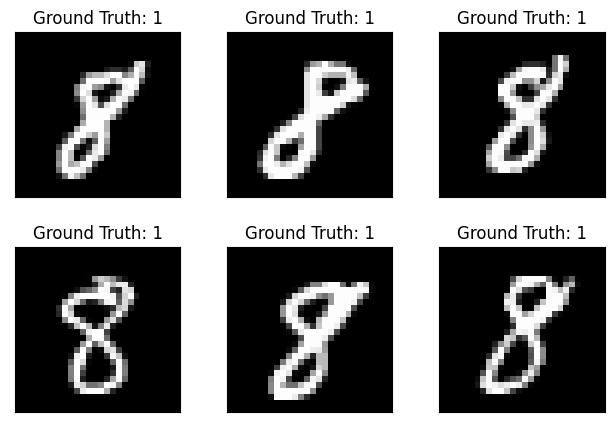

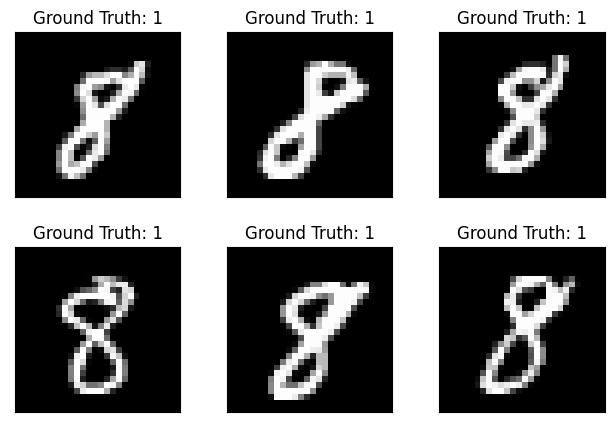

In [27]:
examples = enumerate(train_loader_reduced_ratio)
batch_idx, (example_data, example_targets) = next(examples)
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [6]:
# SOFTMAX 10 CLASSES 

accuracies = []
for i in range(10):
    model_accuracies = []
    network = models.SoftmaxLogisticRegression(NUM_CLASSES)
    optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)
    _, acc = metric_utils.accuracy_softmax(test_loader_normal, network) 
    model_accuracies.append(acc)
    for epoch in range(n_epochs):
        _, _ = train.train_softmax(epoch, train_loader_normal, network, optimizer, directory=f'{FOLDERNAME}/softmax_results/normal{i}/model{epoch}')
        _, _ = train.train_softmax(epoch, train_loader_normal, network, optimizer)
        _, acc = metric_utils.accuracy_softmax(test_loader_normal, network)
        model_accuracies.append(acc)
    accuracies.append(model_accuracies)
    np.save(f'{FOLDERNAME}/softmax_results/normal{i}/aucs', model_accuracies)


Test set: Avg. loss: 0.002277406930923462, Accuracy: 0.1754000037908554%

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.320030
Train Epoch: 0 [640/60000 (1%)]	Loss: 1.243286
Train Epoch: 0 [1280/60000 (2%)]	Loss: 0.892512
Train Epoch: 0 [1920/60000 (3%)]	Loss: 0.694162
Train Epoch: 0 [2560/60000 (4%)]	Loss: 0.535580
Train Epoch: 0 [3200/60000 (5%)]	Loss: 0.548628
Train Epoch: 0 [3840/60000 (6%)]	Loss: 0.448575
Train Epoch: 0 [4480/60000 (7%)]	Loss: 0.441510
Train Epoch: 0 [5120/60000 (9%)]	Loss: 0.777398
Train Epoch: 0 [5760/60000 (10%)]	Loss: 0.430371
Train Epoch: 0 [6400/60000 (11%)]	Loss: 0.413319
Train Epoch: 0 [7040/60000 (12%)]	Loss: 0.405716
Train Epoch: 0 [7680/60000 (13%)]	Loss: 0.474938
Train Epoch: 0 [8320/60000 (14%)]	Loss: 0.382745
Train Epoch: 0 [8960/60000 (15%)]	Loss: 0.389585
Train Epoch: 0 [9600/60000 (16%)]	Loss: 0.389453
Train Epoch: 0 [10240/60000 (17%)]	Loss: 0.478899
Train Epoch: 0 [10880/60000 (18%)]	Loss: 0.353892
Train Epoch: 0 [11520/60000 (19%)]	Loss: 0.639313
Trai

Train Epoch: 0 [46720/60000 (78%)]	Loss: 0.397393
Train Epoch: 0 [47360/60000 (79%)]	Loss: 0.285318
Train Epoch: 0 [48000/60000 (80%)]	Loss: 0.178715
Train Epoch: 0 [48640/60000 (81%)]	Loss: 0.290758
Train Epoch: 0 [49280/60000 (82%)]	Loss: 0.201518
Train Epoch: 0 [49920/60000 (83%)]	Loss: 0.275489
Train Epoch: 0 [50560/60000 (84%)]	Loss: 0.395126
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.377536
Train Epoch: 0 [51840/60000 (86%)]	Loss: 0.202557
Train Epoch: 0 [52480/60000 (87%)]	Loss: 0.138139
Train Epoch: 0 [53120/60000 (88%)]	Loss: 0.415818
Train Epoch: 0 [53760/60000 (90%)]	Loss: 0.135146
Train Epoch: 0 [54400/60000 (91%)]	Loss: 0.241394
Train Epoch: 0 [55040/60000 (92%)]	Loss: 0.273266
Train Epoch: 0 [55680/60000 (93%)]	Loss: 0.385769
Train Epoch: 0 [56320/60000 (94%)]	Loss: 0.212909
Train Epoch: 0 [56960/60000 (95%)]	Loss: 0.299130
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.436360
Train Epoch: 0 [58240/60000 (97%)]	Loss: 0.149140
Train Epoch: 0 [58880/60000 (98%)]	Loss: 0.053042


Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.350508
Train Epoch: 1 [32640/60000 (54%)]	Loss: 0.429411
Train Epoch: 1 [33280/60000 (55%)]	Loss: 0.374869
Train Epoch: 1 [33920/60000 (57%)]	Loss: 0.139232
Train Epoch: 1 [34560/60000 (58%)]	Loss: 0.283950
Train Epoch: 1 [35200/60000 (59%)]	Loss: 0.318965
Train Epoch: 1 [35840/60000 (60%)]	Loss: 0.232978
Train Epoch: 1 [36480/60000 (61%)]	Loss: 0.222035
Train Epoch: 1 [37120/60000 (62%)]	Loss: 0.416585
Train Epoch: 1 [37760/60000 (63%)]	Loss: 0.269458
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.187997
Train Epoch: 1 [39040/60000 (65%)]	Loss: 0.148277
Train Epoch: 1 [39680/60000 (66%)]	Loss: 0.276356
Train Epoch: 1 [40320/60000 (67%)]	Loss: 0.262540
Train Epoch: 1 [40960/60000 (68%)]	Loss: 0.454171
Train Epoch: 1 [41600/60000 (69%)]	Loss: 0.195424
Train Epoch: 1 [42240/60000 (70%)]	Loss: 0.211838
Train Epoch: 1 [42880/60000 (71%)]	Loss: 0.349690
Train Epoch: 1 [43520/60000 (72%)]	Loss: 0.314959
Train Epoch: 1 [44160/60000 (74%)]	Loss: 0.168198


Train Epoch: 2 [16640/60000 (28%)]	Loss: 0.378068
Train Epoch: 2 [17280/60000 (29%)]	Loss: 0.129499
Train Epoch: 2 [17920/60000 (30%)]	Loss: 0.234313
Train Epoch: 2 [18560/60000 (31%)]	Loss: 0.355696
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.297271
Train Epoch: 2 [19840/60000 (33%)]	Loss: 0.161434
Train Epoch: 2 [20480/60000 (34%)]	Loss: 0.177145
Train Epoch: 2 [21120/60000 (35%)]	Loss: 0.277646
Train Epoch: 2 [21760/60000 (36%)]	Loss: 0.069089
Train Epoch: 2 [22400/60000 (37%)]	Loss: 0.216646
Train Epoch: 2 [23040/60000 (38%)]	Loss: 0.426271
Train Epoch: 2 [23680/60000 (39%)]	Loss: 0.512568
Train Epoch: 2 [24320/60000 (41%)]	Loss: 0.173444
Train Epoch: 2 [24960/60000 (42%)]	Loss: 0.278238
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.203043
Train Epoch: 2 [26240/60000 (44%)]	Loss: 0.294430
Train Epoch: 2 [26880/60000 (45%)]	Loss: 0.460104
Train Epoch: 2 [27520/60000 (46%)]	Loss: 0.227378
Train Epoch: 2 [28160/60000 (47%)]	Loss: 0.234179
Train Epoch: 2 [28800/60000 (48%)]	Loss: 0.146129


Train Epoch: 3 [1280/60000 (2%)]	Loss: 0.317144
Train Epoch: 3 [1920/60000 (3%)]	Loss: 0.182305
Train Epoch: 3 [2560/60000 (4%)]	Loss: 0.166631
Train Epoch: 3 [3200/60000 (5%)]	Loss: 0.280806
Train Epoch: 3 [3840/60000 (6%)]	Loss: 0.084856
Train Epoch: 3 [4480/60000 (7%)]	Loss: 0.201915
Train Epoch: 3 [5120/60000 (9%)]	Loss: 0.531420
Train Epoch: 3 [5760/60000 (10%)]	Loss: 0.219707
Train Epoch: 3 [6400/60000 (11%)]	Loss: 0.262428
Train Epoch: 3 [7040/60000 (12%)]	Loss: 0.163642
Train Epoch: 3 [7680/60000 (13%)]	Loss: 0.223699
Train Epoch: 3 [8320/60000 (14%)]	Loss: 0.154456
Train Epoch: 3 [8960/60000 (15%)]	Loss: 0.199246
Train Epoch: 3 [9600/60000 (16%)]	Loss: 0.268733
Train Epoch: 3 [10240/60000 (17%)]	Loss: 0.311902
Train Epoch: 3 [10880/60000 (18%)]	Loss: 0.170683
Train Epoch: 3 [11520/60000 (19%)]	Loss: 0.485536
Train Epoch: 3 [12160/60000 (20%)]	Loss: 0.430022
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.164365
Train Epoch: 3 [13440/60000 (22%)]	Loss: 0.193986
Train Epoch: 3 [14080

Train Epoch: 4 [46080/60000 (77%)]	Loss: 0.429330
Train Epoch: 4 [46720/60000 (78%)]	Loss: 0.399343
Train Epoch: 4 [47360/60000 (79%)]	Loss: 0.227278
Train Epoch: 4 [48000/60000 (80%)]	Loss: 0.145323
Train Epoch: 4 [48640/60000 (81%)]	Loss: 0.271592
Train Epoch: 4 [49280/60000 (82%)]	Loss: 0.185797
Train Epoch: 4 [49920/60000 (83%)]	Loss: 0.233791
Train Epoch: 4 [50560/60000 (84%)]	Loss: 0.310436
Train Epoch: 4 [51200/60000 (85%)]	Loss: 0.323725
Train Epoch: 4 [51840/60000 (86%)]	Loss: 0.156218
Train Epoch: 4 [52480/60000 (87%)]	Loss: 0.127756
Train Epoch: 4 [53120/60000 (88%)]	Loss: 0.421050
Train Epoch: 4 [53760/60000 (90%)]	Loss: 0.111417
Train Epoch: 4 [54400/60000 (91%)]	Loss: 0.203764
Train Epoch: 4 [55040/60000 (92%)]	Loss: 0.195071
Train Epoch: 4 [55680/60000 (93%)]	Loss: 0.371286
Train Epoch: 4 [56320/60000 (94%)]	Loss: 0.167616
Train Epoch: 4 [56960/60000 (95%)]	Loss: 0.234211
Train Epoch: 4 [57600/60000 (96%)]	Loss: 0.398128
Train Epoch: 4 [58240/60000 (97%)]	Loss: 0.122723


Train Epoch: 5 [30720/60000 (51%)]	Loss: 0.315135
Train Epoch: 5 [31360/60000 (52%)]	Loss: 0.384406
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.335726
Train Epoch: 5 [32640/60000 (54%)]	Loss: 0.447853
Train Epoch: 5 [33280/60000 (55%)]	Loss: 0.405773
Train Epoch: 5 [33920/60000 (57%)]	Loss: 0.117871
Train Epoch: 5 [34560/60000 (58%)]	Loss: 0.243143
Train Epoch: 5 [35200/60000 (59%)]	Loss: 0.300976
Train Epoch: 5 [35840/60000 (60%)]	Loss: 0.197912
Train Epoch: 5 [36480/60000 (61%)]	Loss: 0.205687
Train Epoch: 5 [37120/60000 (62%)]	Loss: 0.404665
Train Epoch: 5 [37760/60000 (63%)]	Loss: 0.269422
Train Epoch: 5 [38400/60000 (64%)]	Loss: 0.164402
Train Epoch: 5 [39040/60000 (65%)]	Loss: 0.149976
Train Epoch: 5 [39680/60000 (66%)]	Loss: 0.270980
Train Epoch: 5 [40320/60000 (67%)]	Loss: 0.263880
Train Epoch: 5 [40960/60000 (68%)]	Loss: 0.441133
Train Epoch: 5 [41600/60000 (69%)]	Loss: 0.163589
Train Epoch: 5 [42240/60000 (70%)]	Loss: 0.197189
Train Epoch: 5 [42880/60000 (71%)]	Loss: 0.314961


Train Epoch: 6 [15360/60000 (26%)]	Loss: 0.123366
Train Epoch: 6 [16000/60000 (27%)]	Loss: 0.441996
Train Epoch: 6 [16640/60000 (28%)]	Loss: 0.361057
Train Epoch: 6 [17280/60000 (29%)]	Loss: 0.128404
Train Epoch: 6 [17920/60000 (30%)]	Loss: 0.229040
Train Epoch: 6 [18560/60000 (31%)]	Loss: 0.336425
Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.276374
Train Epoch: 6 [19840/60000 (33%)]	Loss: 0.159852
Train Epoch: 6 [20480/60000 (34%)]	Loss: 0.159481
Train Epoch: 6 [21120/60000 (35%)]	Loss: 0.258785
Train Epoch: 6 [21760/60000 (36%)]	Loss: 0.064907
Train Epoch: 6 [22400/60000 (37%)]	Loss: 0.203426
Train Epoch: 6 [23040/60000 (38%)]	Loss: 0.411328
Train Epoch: 6 [23680/60000 (39%)]	Loss: 0.480805
Train Epoch: 6 [24320/60000 (41%)]	Loss: 0.156781
Train Epoch: 6 [24960/60000 (42%)]	Loss: 0.263286
Train Epoch: 6 [25600/60000 (43%)]	Loss: 0.192411
Train Epoch: 6 [26240/60000 (44%)]	Loss: 0.281097
Train Epoch: 6 [26880/60000 (45%)]	Loss: 0.483612
Train Epoch: 6 [27520/60000 (46%)]	Loss: 0.217349


Train Epoch: 7 [7680/60000 (13%)]	Loss: 0.209301
Train Epoch: 7 [8320/60000 (14%)]	Loss: 0.147090
Train Epoch: 7 [8960/60000 (15%)]	Loss: 0.195149
Train Epoch: 7 [9600/60000 (16%)]	Loss: 0.267593
Train Epoch: 7 [10240/60000 (17%)]	Loss: 0.287142
Train Epoch: 7 [10880/60000 (18%)]	Loss: 0.154770
Train Epoch: 7 [11520/60000 (19%)]	Loss: 0.450080
Train Epoch: 7 [12160/60000 (20%)]	Loss: 0.423638
Train Epoch: 7 [12800/60000 (21%)]	Loss: 0.157497
Train Epoch: 7 [13440/60000 (22%)]	Loss: 0.184933
Train Epoch: 7 [14080/60000 (23%)]	Loss: 0.331697
Train Epoch: 7 [14720/60000 (25%)]	Loss: 0.612839
Train Epoch: 7 [15360/60000 (26%)]	Loss: 0.120512
Train Epoch: 7 [16000/60000 (27%)]	Loss: 0.442323
Train Epoch: 7 [16640/60000 (28%)]	Loss: 0.358689
Train Epoch: 7 [17280/60000 (29%)]	Loss: 0.128472
Train Epoch: 7 [17920/60000 (30%)]	Loss: 0.228705
Train Epoch: 7 [18560/60000 (31%)]	Loss: 0.331658
Train Epoch: 7 [19200/60000 (32%)]	Loss: 0.273733
Train Epoch: 7 [19840/60000 (33%)]	Loss: 0.160472
Trai

Train Epoch: 7 [55040/60000 (92%)]	Loss: 0.174817
Train Epoch: 7 [55680/60000 (93%)]	Loss: 0.369881
Train Epoch: 7 [56320/60000 (94%)]	Loss: 0.154174
Train Epoch: 7 [56960/60000 (95%)]	Loss: 0.221238
Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.385924
Train Epoch: 7 [58240/60000 (97%)]	Loss: 0.119506
Train Epoch: 7 [58880/60000 (98%)]	Loss: 0.040975
Train Epoch: 7 [59520/60000 (99%)]	Loss: 0.051766

Test set: Avg. loss: 0.0002822047933936119, Accuracy: 0.919700026512146%

Train Epoch: 8 [0/60000 (0%)]	Loss: 0.144723
Train Epoch: 8 [640/60000 (1%)]	Loss: 0.324975
Train Epoch: 8 [1280/60000 (2%)]	Loss: 0.314135
Train Epoch: 8 [1920/60000 (3%)]	Loss: 0.172019
Train Epoch: 8 [2560/60000 (4%)]	Loss: 0.161814
Train Epoch: 8 [3200/60000 (5%)]	Loss: 0.270065
Train Epoch: 8 [3840/60000 (6%)]	Loss: 0.072334
Train Epoch: 8 [4480/60000 (7%)]	Loss: 0.180294
Train Epoch: 8 [5120/60000 (9%)]	Loss: 0.497510
Train Epoch: 8 [5760/60000 (10%)]	Loss: 0.228786
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.252503

Train Epoch: 8 [39680/60000 (66%)]	Loss: 0.270190
Train Epoch: 8 [40320/60000 (67%)]	Loss: 0.263546
Train Epoch: 8 [40960/60000 (68%)]	Loss: 0.433209
Train Epoch: 8 [41600/60000 (69%)]	Loss: 0.149722
Train Epoch: 8 [42240/60000 (70%)]	Loss: 0.195385
Train Epoch: 8 [42880/60000 (71%)]	Loss: 0.310065
Train Epoch: 8 [43520/60000 (72%)]	Loss: 0.296417
Train Epoch: 8 [44160/60000 (74%)]	Loss: 0.139656
Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.348440
Train Epoch: 8 [45440/60000 (76%)]	Loss: 0.534645
Train Epoch: 8 [46080/60000 (77%)]	Loss: 0.428250
Train Epoch: 8 [46720/60000 (78%)]	Loss: 0.391405
Train Epoch: 8 [47360/60000 (79%)]	Loss: 0.220052
Train Epoch: 8 [48000/60000 (80%)]	Loss: 0.138259
Train Epoch: 8 [48640/60000 (81%)]	Loss: 0.265501
Train Epoch: 8 [49280/60000 (82%)]	Loss: 0.181963
Train Epoch: 8 [49920/60000 (83%)]	Loss: 0.225338
Train Epoch: 8 [50560/60000 (84%)]	Loss: 0.284193
Train Epoch: 8 [51200/60000 (85%)]	Loss: 0.308019
Train Epoch: 8 [51840/60000 (86%)]	Loss: 0.147769


Train Epoch: 9 [24320/60000 (41%)]	Loss: 0.151598
Train Epoch: 9 [24960/60000 (42%)]	Loss: 0.254368
Train Epoch: 9 [25600/60000 (43%)]	Loss: 0.191295
Train Epoch: 9 [26240/60000 (44%)]	Loss: 0.274558
Train Epoch: 9 [26880/60000 (45%)]	Loss: 0.497557
Train Epoch: 9 [27520/60000 (46%)]	Loss: 0.208475
Train Epoch: 9 [28160/60000 (47%)]	Loss: 0.217930
Train Epoch: 9 [28800/60000 (48%)]	Loss: 0.127968
Train Epoch: 9 [29440/60000 (49%)]	Loss: 0.124459
Train Epoch: 9 [30080/60000 (50%)]	Loss: 0.362125
Train Epoch: 9 [30720/60000 (51%)]	Loss: 0.302006
Train Epoch: 9 [31360/60000 (52%)]	Loss: 0.350544
Train Epoch: 9 [32000/60000 (53%)]	Loss: 0.327330
Train Epoch: 9 [32640/60000 (54%)]	Loss: 0.453637
Train Epoch: 9 [33280/60000 (55%)]	Loss: 0.427855
Train Epoch: 9 [33920/60000 (57%)]	Loss: 0.106223
Train Epoch: 9 [34560/60000 (58%)]	Loss: 0.225444
Train Epoch: 9 [35200/60000 (59%)]	Loss: 0.295236
Train Epoch: 9 [35840/60000 (60%)]	Loss: 0.182418
Train Epoch: 9 [36480/60000 (61%)]	Loss: 0.202754


Train Epoch: 10 [8960/60000 (15%)]	Loss: 0.194979
Train Epoch: 10 [9600/60000 (16%)]	Loss: 0.264371
Train Epoch: 10 [10240/60000 (17%)]	Loss: 0.275440
Train Epoch: 10 [10880/60000 (18%)]	Loss: 0.148803
Train Epoch: 10 [11520/60000 (19%)]	Loss: 0.432955
Train Epoch: 10 [12160/60000 (20%)]	Loss: 0.423115
Train Epoch: 10 [12800/60000 (21%)]	Loss: 0.153708
Train Epoch: 10 [13440/60000 (22%)]	Loss: 0.179862
Train Epoch: 10 [14080/60000 (23%)]	Loss: 0.321928
Train Epoch: 10 [14720/60000 (25%)]	Loss: 0.610692
Train Epoch: 10 [15360/60000 (26%)]	Loss: 0.113724
Train Epoch: 10 [16000/60000 (27%)]	Loss: 0.444311
Train Epoch: 10 [16640/60000 (28%)]	Loss: 0.353178
Train Epoch: 10 [17280/60000 (29%)]	Loss: 0.128639
Train Epoch: 10 [17920/60000 (30%)]	Loss: 0.227884
Train Epoch: 10 [18560/60000 (31%)]	Loss: 0.317082
Train Epoch: 10 [19200/60000 (32%)]	Loss: 0.268401
Train Epoch: 10 [19840/60000 (33%)]	Loss: 0.162251
Train Epoch: 10 [20480/60000 (34%)]	Loss: 0.148807
Train Epoch: 10 [21120/60000 (35%

Train Epoch: 11 [53760/60000 (90%)]	Loss: 0.102091
Train Epoch: 11 [54400/60000 (91%)]	Loss: 0.183352
Train Epoch: 11 [55040/60000 (92%)]	Loss: 0.164601
Train Epoch: 11 [55680/60000 (93%)]	Loss: 0.370635
Train Epoch: 11 [56320/60000 (94%)]	Loss: 0.146223
Train Epoch: 11 [56960/60000 (95%)]	Loss: 0.216508
Train Epoch: 11 [57600/60000 (96%)]	Loss: 0.379675
Train Epoch: 11 [58240/60000 (97%)]	Loss: 0.119004
Train Epoch: 11 [58880/60000 (98%)]	Loss: 0.039641
Train Epoch: 11 [59520/60000 (99%)]	Loss: 0.050708
Train Epoch: 11 [0/60000 (0%)]	Loss: 0.136940
Train Epoch: 11 [640/60000 (1%)]	Loss: 0.315795
Train Epoch: 11 [1280/60000 (2%)]	Loss: 0.316072
Train Epoch: 11 [1920/60000 (3%)]	Loss: 0.167481
Train Epoch: 11 [2560/60000 (4%)]	Loss: 0.162028
Train Epoch: 11 [3200/60000 (5%)]	Loss: 0.266682
Train Epoch: 11 [3840/60000 (6%)]	Loss: 0.068488
Train Epoch: 11 [4480/60000 (7%)]	Loss: 0.173846
Train Epoch: 11 [5120/60000 (9%)]	Loss: 0.484030
Train Epoch: 11 [5760/60000 (10%)]	Loss: 0.232892
Tra

Train Epoch: 12 [38400/60000 (64%)]	Loss: 0.152129
Train Epoch: 12 [39040/60000 (65%)]	Loss: 0.155092
Train Epoch: 12 [39680/60000 (66%)]	Loss: 0.270378
Train Epoch: 12 [40320/60000 (67%)]	Loss: 0.263197
Train Epoch: 12 [40960/60000 (68%)]	Loss: 0.427323
Train Epoch: 12 [41600/60000 (69%)]	Loss: 0.141346
Train Epoch: 12 [42240/60000 (70%)]	Loss: 0.195002
Train Epoch: 12 [42880/60000 (71%)]	Loss: 0.309248
Train Epoch: 12 [43520/60000 (72%)]	Loss: 0.284805
Train Epoch: 12 [44160/60000 (74%)]	Loss: 0.135820
Train Epoch: 12 [44800/60000 (75%)]	Loss: 0.342575
Train Epoch: 12 [45440/60000 (76%)]	Loss: 0.516978
Train Epoch: 12 [46080/60000 (77%)]	Loss: 0.427754
Train Epoch: 12 [46720/60000 (78%)]	Loss: 0.385939
Train Epoch: 12 [47360/60000 (79%)]	Loss: 0.219192
Train Epoch: 12 [48000/60000 (80%)]	Loss: 0.135880
Train Epoch: 12 [48640/60000 (81%)]	Loss: 0.261663
Train Epoch: 12 [49280/60000 (82%)]	Loss: 0.181550
Train Epoch: 12 [49920/60000 (83%)]	Loss: 0.223233
Train Epoch: 12 [50560/60000 (8

Train Epoch: 13 [23040/60000 (38%)]	Loss: 0.390288
Train Epoch: 13 [23680/60000 (39%)]	Loss: 0.454156
Train Epoch: 13 [24320/60000 (41%)]	Loss: 0.149638
Train Epoch: 13 [24960/60000 (42%)]	Loss: 0.247333
Train Epoch: 13 [25600/60000 (43%)]	Loss: 0.191683
Train Epoch: 13 [26240/60000 (44%)]	Loss: 0.271062
Train Epoch: 13 [26880/60000 (45%)]	Loss: 0.506556
Train Epoch: 13 [27520/60000 (46%)]	Loss: 0.201481
Train Epoch: 13 [28160/60000 (47%)]	Loss: 0.216723
Train Epoch: 13 [28800/60000 (48%)]	Loss: 0.124063
Train Epoch: 13 [29440/60000 (49%)]	Loss: 0.122387
Train Epoch: 13 [30080/60000 (50%)]	Loss: 0.362342
Train Epoch: 13 [30720/60000 (51%)]	Loss: 0.296515
Train Epoch: 13 [31360/60000 (52%)]	Loss: 0.334959
Train Epoch: 13 [32000/60000 (53%)]	Loss: 0.322319
Train Epoch: 13 [32640/60000 (54%)]	Loss: 0.453395
Train Epoch: 13 [33280/60000 (55%)]	Loss: 0.439423
Train Epoch: 13 [33920/60000 (57%)]	Loss: 0.101241
Train Epoch: 13 [34560/60000 (58%)]	Loss: 0.219326
Train Epoch: 13 [35200/60000 (5

Train Epoch: 14 [7680/60000 (13%)]	Loss: 0.200374
Train Epoch: 14 [8320/60000 (14%)]	Loss: 0.137905
Train Epoch: 14 [8960/60000 (15%)]	Loss: 0.195629
Train Epoch: 14 [9600/60000 (16%)]	Loss: 0.261200
Train Epoch: 14 [10240/60000 (17%)]	Loss: 0.268966
Train Epoch: 14 [10880/60000 (18%)]	Loss: 0.146007
Train Epoch: 14 [11520/60000 (19%)]	Loss: 0.421727
Train Epoch: 14 [12160/60000 (20%)]	Loss: 0.423530
Train Epoch: 14 [12800/60000 (21%)]	Loss: 0.150744
Train Epoch: 14 [13440/60000 (22%)]	Loss: 0.176496
Train Epoch: 14 [14080/60000 (23%)]	Loss: 0.316807
Train Epoch: 14 [14720/60000 (25%)]	Loss: 0.609260
Train Epoch: 14 [15360/60000 (26%)]	Loss: 0.109524
Train Epoch: 14 [16000/60000 (27%)]	Loss: 0.446391
Train Epoch: 14 [16640/60000 (28%)]	Loss: 0.349737
Train Epoch: 14 [17280/60000 (29%)]	Loss: 0.128658
Train Epoch: 14 [17920/60000 (30%)]	Loss: 0.226973
Train Epoch: 14 [18560/60000 (31%)]	Loss: 0.305492
Train Epoch: 14 [19200/60000 (32%)]	Loss: 0.265877
Train Epoch: 14 [19840/60000 (33%)]

Train Epoch: 14 [55040/60000 (92%)]	Loss: 0.158025
Train Epoch: 14 [55680/60000 (93%)]	Loss: 0.372165
Train Epoch: 14 [56320/60000 (94%)]	Loss: 0.140550
Train Epoch: 14 [56960/60000 (95%)]	Loss: 0.214554
Train Epoch: 14 [57600/60000 (96%)]	Loss: 0.375849
Train Epoch: 14 [58240/60000 (97%)]	Loss: 0.118328
Train Epoch: 14 [58880/60000 (98%)]	Loss: 0.038811
Train Epoch: 14 [59520/60000 (99%)]	Loss: 0.050138

Test set: Avg. loss: 0.00028034372702240946, Accuracy: 0.9197999835014343%

Train Epoch: 15 [0/60000 (0%)]	Loss: 0.131404
Train Epoch: 15 [640/60000 (1%)]	Loss: 0.308286
Train Epoch: 15 [1280/60000 (2%)]	Loss: 0.318711
Train Epoch: 15 [1920/60000 (3%)]	Loss: 0.164129
Train Epoch: 15 [2560/60000 (4%)]	Loss: 0.162706
Train Epoch: 15 [3200/60000 (5%)]	Loss: 0.264619
Train Epoch: 15 [3840/60000 (6%)]	Loss: 0.066266
Train Epoch: 15 [4480/60000 (7%)]	Loss: 0.169896
Train Epoch: 15 [5120/60000 (9%)]	Loss: 0.474820
Train Epoch: 15 [5760/60000 (10%)]	Loss: 0.235796
Train Epoch: 15 [6400/60000 

Train Epoch: 15 [39680/60000 (66%)]	Loss: 0.270850
Train Epoch: 15 [40320/60000 (67%)]	Loss: 0.263034
Train Epoch: 15 [40960/60000 (68%)]	Loss: 0.422652
Train Epoch: 15 [41600/60000 (69%)]	Loss: 0.135843
Train Epoch: 15 [42240/60000 (70%)]	Loss: 0.194681
Train Epoch: 15 [42880/60000 (71%)]	Loss: 0.309538
Train Epoch: 15 [43520/60000 (72%)]	Loss: 0.275648
Train Epoch: 15 [44160/60000 (74%)]	Loss: 0.133317
Train Epoch: 15 [44800/60000 (75%)]	Loss: 0.338086
Train Epoch: 15 [45440/60000 (76%)]	Loss: 0.503756
Train Epoch: 15 [46080/60000 (77%)]	Loss: 0.426029
Train Epoch: 15 [46720/60000 (78%)]	Loss: 0.381664
Train Epoch: 15 [47360/60000 (79%)]	Loss: 0.218994
Train Epoch: 15 [48000/60000 (80%)]	Loss: 0.134423
Train Epoch: 15 [48640/60000 (81%)]	Loss: 0.258383
Train Epoch: 15 [49280/60000 (82%)]	Loss: 0.181376
Train Epoch: 15 [49920/60000 (83%)]	Loss: 0.221996
Train Epoch: 15 [50560/60000 (84%)]	Loss: 0.262856
Train Epoch: 15 [51200/60000 (85%)]	Loss: 0.301577
Train Epoch: 15 [51840/60000 (8

Train Epoch: 16 [24960/60000 (42%)]	Loss: 0.241558
Train Epoch: 16 [25600/60000 (43%)]	Loss: 0.192286
Train Epoch: 16 [26240/60000 (44%)]	Loss: 0.269039
Train Epoch: 16 [26880/60000 (45%)]	Loss: 0.512811
Train Epoch: 16 [27520/60000 (46%)]	Loss: 0.195965
Train Epoch: 16 [28160/60000 (47%)]	Loss: 0.216044
Train Epoch: 16 [28800/60000 (48%)]	Loss: 0.121431
Train Epoch: 16 [29440/60000 (49%)]	Loss: 0.121485
Train Epoch: 16 [30080/60000 (50%)]	Loss: 0.362204
Train Epoch: 16 [30720/60000 (51%)]	Loss: 0.293114
Train Epoch: 16 [31360/60000 (52%)]	Loss: 0.323741
Train Epoch: 16 [32000/60000 (53%)]	Loss: 0.318207
Train Epoch: 16 [32640/60000 (54%)]	Loss: 0.451813
Train Epoch: 16 [33280/60000 (55%)]	Loss: 0.448211
Train Epoch: 16 [33920/60000 (57%)]	Loss: 0.098004
Train Epoch: 16 [34560/60000 (58%)]	Loss: 0.215667
Train Epoch: 16 [35200/60000 (59%)]	Loss: 0.295211
Train Epoch: 16 [35840/60000 (60%)]	Loss: 0.172084
Train Epoch: 16 [36480/60000 (61%)]	Loss: 0.200681
Train Epoch: 16 [37120/60000 (6

Train Epoch: 17 [8960/60000 (15%)]	Loss: 0.196525
Train Epoch: 17 [9600/60000 (16%)]	Loss: 0.258321
Train Epoch: 17 [10240/60000 (17%)]	Loss: 0.265054
Train Epoch: 17 [10880/60000 (18%)]	Loss: 0.144521
Train Epoch: 17 [11520/60000 (19%)]	Loss: 0.413296
Train Epoch: 17 [12160/60000 (20%)]	Loss: 0.424055
Train Epoch: 17 [12800/60000 (21%)]	Loss: 0.148243
Train Epoch: 17 [13440/60000 (22%)]	Loss: 0.174056
Train Epoch: 17 [14080/60000 (23%)]	Loss: 0.313728
Train Epoch: 17 [14720/60000 (25%)]	Loss: 0.607649
Train Epoch: 17 [15360/60000 (26%)]	Loss: 0.106622
Train Epoch: 17 [16000/60000 (27%)]	Loss: 0.448117
Train Epoch: 17 [16640/60000 (28%)]	Loss: 0.347317
Train Epoch: 17 [17280/60000 (29%)]	Loss: 0.128588
Train Epoch: 17 [17920/60000 (30%)]	Loss: 0.225929
Train Epoch: 17 [18560/60000 (31%)]	Loss: 0.296211
Train Epoch: 17 [19200/60000 (32%)]	Loss: 0.264433
Train Epoch: 17 [19840/60000 (33%)]	Loss: 0.163688
Train Epoch: 17 [20480/60000 (34%)]	Loss: 0.138157
Train Epoch: 17 [21120/60000 (35%

Train Epoch: 18 [53760/60000 (90%)]	Loss: 0.098262
Train Epoch: 18 [54400/60000 (91%)]	Loss: 0.177175
Train Epoch: 18 [55040/60000 (92%)]	Loss: 0.153267
Train Epoch: 18 [55680/60000 (93%)]	Loss: 0.374001
Train Epoch: 18 [56320/60000 (94%)]	Loss: 0.136142
Train Epoch: 18 [56960/60000 (95%)]	Loss: 0.213760
Train Epoch: 18 [57600/60000 (96%)]	Loss: 0.373274
Train Epoch: 18 [58240/60000 (97%)]	Loss: 0.117216
Train Epoch: 18 [58880/60000 (98%)]	Loss: 0.038238
Train Epoch: 18 [59520/60000 (99%)]	Loss: 0.049778
Train Epoch: 18 [0/60000 (0%)]	Loss: 0.127245
Train Epoch: 18 [640/60000 (1%)]	Loss: 0.302150
Train Epoch: 18 [1280/60000 (2%)]	Loss: 0.321351
Train Epoch: 18 [1920/60000 (3%)]	Loss: 0.161539
Train Epoch: 18 [2560/60000 (4%)]	Loss: 0.163374
Train Epoch: 18 [3200/60000 (5%)]	Loss: 0.263068
Train Epoch: 18 [3840/60000 (6%)]	Loss: 0.064887
Train Epoch: 18 [4480/60000 (7%)]	Loss: 0.166948
Train Epoch: 18 [5120/60000 (9%)]	Loss: 0.467986
Train Epoch: 18 [5760/60000 (10%)]	Loss: 0.237922
Tra

Train Epoch: 19 [38400/60000 (64%)]	Loss: 0.147127
Train Epoch: 19 [39040/60000 (65%)]	Loss: 0.156615
Train Epoch: 19 [39680/60000 (66%)]	Loss: 0.271388
Train Epoch: 19 [40320/60000 (67%)]	Loss: 0.263071
Train Epoch: 19 [40960/60000 (68%)]	Loss: 0.418814
Train Epoch: 19 [41600/60000 (69%)]	Loss: 0.131999
Train Epoch: 19 [42240/60000 (70%)]	Loss: 0.194245
Train Epoch: 19 [42880/60000 (71%)]	Loss: 0.310152
Train Epoch: 19 [43520/60000 (72%)]	Loss: 0.268431
Train Epoch: 19 [44160/60000 (74%)]	Loss: 0.131590
Train Epoch: 19 [44800/60000 (75%)]	Loss: 0.334498
Train Epoch: 19 [45440/60000 (76%)]	Loss: 0.493330
Train Epoch: 19 [46080/60000 (77%)]	Loss: 0.423564
Train Epoch: 19 [46720/60000 (78%)]	Loss: 0.378242
Train Epoch: 19 [47360/60000 (79%)]	Loss: 0.218926
Train Epoch: 19 [48000/60000 (80%)]	Loss: 0.133472
Train Epoch: 19 [48640/60000 (81%)]	Loss: 0.255559
Train Epoch: 19 [49280/60000 (82%)]	Loss: 0.181103
Train Epoch: 19 [49920/60000 (83%)]	Loss: 0.221065
Train Epoch: 19 [50560/60000 (8

Train Epoch: 0 [23040/60000 (38%)]	Loss: 0.492933
Train Epoch: 0 [23680/60000 (39%)]	Loss: 0.607720
Train Epoch: 0 [24320/60000 (41%)]	Loss: 0.281324
Train Epoch: 0 [24960/60000 (42%)]	Loss: 0.412974
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.285868
Train Epoch: 0 [26240/60000 (44%)]	Loss: 0.384838
Train Epoch: 0 [26880/60000 (45%)]	Loss: 0.517598
Train Epoch: 0 [27520/60000 (46%)]	Loss: 0.230786
Train Epoch: 0 [28160/60000 (47%)]	Loss: 0.366065
Train Epoch: 0 [28800/60000 (48%)]	Loss: 0.240066
Train Epoch: 0 [29440/60000 (49%)]	Loss: 0.261547
Train Epoch: 0 [30080/60000 (50%)]	Loss: 0.505268
Train Epoch: 0 [30720/60000 (51%)]	Loss: 0.437126
Train Epoch: 0 [31360/60000 (52%)]	Loss: 0.549859
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.402196
Train Epoch: 0 [32640/60000 (54%)]	Loss: 0.444984
Train Epoch: 0 [33280/60000 (55%)]	Loss: 0.376320
Train Epoch: 0 [33920/60000 (57%)]	Loss: 0.186834
Train Epoch: 0 [34560/60000 (58%)]	Loss: 0.355890
Train Epoch: 0 [35200/60000 (59%)]	Loss: 0.386891


Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.258721
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.171994
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.221880
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.266789
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.359261
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.205075
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.557569
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.455114
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.188862
Train Epoch: 1 [13440/60000 (22%)]	Loss: 0.206407
Train Epoch: 1 [14080/60000 (23%)]	Loss: 0.427208
Train Epoch: 1 [14720/60000 (25%)]	Loss: 0.625450
Train Epoch: 1 [15360/60000 (26%)]	Loss: 0.168634
Train Epoch: 1 [16000/60000 (27%)]	Loss: 0.457419
Train Epoch: 1 [16640/60000 (28%)]	Loss: 0.400245
Train Epoch: 1 [17280/60000 (29%)]	Loss: 0.137010
Train Epoch: 1 [17920/60000 (30%)]	Loss: 0.243980
Train Epoch: 1 [18560/60000 (31%)]	Loss: 0.375010
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.325234
Train Epoch: 1 [19840/60000 (33%)]	Loss: 0.179870
Trai

Train Epoch: 1 [55040/60000 (92%)]	Loss: 0.232506
Train Epoch: 1 [55680/60000 (93%)]	Loss: 0.377675
Train Epoch: 1 [56320/60000 (94%)]	Loss: 0.188536
Train Epoch: 1 [56960/60000 (95%)]	Loss: 0.264784
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.419531
Train Epoch: 1 [58240/60000 (97%)]	Loss: 0.136509
Train Epoch: 1 [58880/60000 (98%)]	Loss: 0.049475
Train Epoch: 1 [59520/60000 (99%)]	Loss: 0.060761

Test set: Avg. loss: 0.00029262156412005423, Accuracy: 0.914900004863739%

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.179133
Train Epoch: 2 [640/60000 (1%)]	Loss: 0.354512
Train Epoch: 2 [1280/60000 (2%)]	Loss: 0.322361
Train Epoch: 2 [1920/60000 (3%)]	Loss: 0.189844
Train Epoch: 2 [2560/60000 (4%)]	Loss: 0.172984
Train Epoch: 2 [3200/60000 (5%)]	Loss: 0.289341
Train Epoch: 2 [3840/60000 (6%)]	Loss: 0.098337
Train Epoch: 2 [4480/60000 (7%)]	Loss: 0.220658
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.551428
Train Epoch: 2 [5760/60000 (10%)]	Loss: 0.213412
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.26351

Train Epoch: 2 [39680/60000 (66%)]	Loss: 0.274030
Train Epoch: 2 [40320/60000 (67%)]	Loss: 0.263008
Train Epoch: 2 [40960/60000 (68%)]	Loss: 0.451218
Train Epoch: 2 [41600/60000 (69%)]	Loss: 0.181673
Train Epoch: 2 [42240/60000 (70%)]	Loss: 0.203058
Train Epoch: 2 [42880/60000 (71%)]	Loss: 0.327645
Train Epoch: 2 [43520/60000 (72%)]	Loss: 0.313718
Train Epoch: 2 [44160/60000 (74%)]	Loss: 0.155520
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.371299
Train Epoch: 2 [45440/60000 (76%)]	Loss: 0.582146
Train Epoch: 2 [46080/60000 (77%)]	Loss: 0.431740
Train Epoch: 2 [46720/60000 (78%)]	Loss: 0.398570
Train Epoch: 2 [47360/60000 (79%)]	Loss: 0.235244
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.151752
Train Epoch: 2 [48640/60000 (81%)]	Loss: 0.274620
Train Epoch: 2 [49280/60000 (82%)]	Loss: 0.190131
Train Epoch: 2 [49920/60000 (83%)]	Loss: 0.242033
Train Epoch: 2 [50560/60000 (84%)]	Loss: 0.325494
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.336265
Train Epoch: 2 [51840/60000 (86%)]	Loss: 0.165624


Train Epoch: 3 [24320/60000 (41%)]	Loss: 0.164876
Train Epoch: 3 [24960/60000 (42%)]	Loss: 0.269809
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.198736
Train Epoch: 3 [26240/60000 (44%)]	Loss: 0.292136
Train Epoch: 3 [26880/60000 (45%)]	Loss: 0.471115
Train Epoch: 3 [27520/60000 (46%)]	Loss: 0.225250
Train Epoch: 3 [28160/60000 (47%)]	Loss: 0.226982
Train Epoch: 3 [28800/60000 (48%)]	Loss: 0.139983
Train Epoch: 3 [29440/60000 (49%)]	Loss: 0.142722
Train Epoch: 3 [30080/60000 (50%)]	Loss: 0.366150
Train Epoch: 3 [30720/60000 (51%)]	Loss: 0.325352
Train Epoch: 3 [31360/60000 (52%)]	Loss: 0.403671
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.340629
Train Epoch: 3 [32640/60000 (54%)]	Loss: 0.440557
Train Epoch: 3 [33280/60000 (55%)]	Loss: 0.396849
Train Epoch: 3 [33920/60000 (57%)]	Loss: 0.125765
Train Epoch: 3 [34560/60000 (58%)]	Loss: 0.257567
Train Epoch: 3 [35200/60000 (59%)]	Loss: 0.300799
Train Epoch: 3 [35840/60000 (60%)]	Loss: 0.212401
Train Epoch: 3 [36480/60000 (61%)]	Loss: 0.211439


Train Epoch: 4 [8960/60000 (15%)]	Loss: 0.197023
Train Epoch: 4 [9600/60000 (16%)]	Loss: 0.268732
Train Epoch: 4 [10240/60000 (17%)]	Loss: 0.300927
Train Epoch: 4 [10880/60000 (18%)]	Loss: 0.161609
Train Epoch: 4 [11520/60000 (19%)]	Loss: 0.468890
Train Epoch: 4 [12160/60000 (20%)]	Loss: 0.427679
Train Epoch: 4 [12800/60000 (21%)]	Loss: 0.162135
Train Epoch: 4 [13440/60000 (22%)]	Loss: 0.189063
Train Epoch: 4 [14080/60000 (23%)]	Loss: 0.346370
Train Epoch: 4 [14720/60000 (25%)]	Loss: 0.613878
Train Epoch: 4 [15360/60000 (26%)]	Loss: 0.129626
Train Epoch: 4 [16000/60000 (27%)]	Loss: 0.440165
Train Epoch: 4 [16640/60000 (28%)]	Loss: 0.364181
Train Epoch: 4 [17280/60000 (29%)]	Loss: 0.127887
Train Epoch: 4 [17920/60000 (30%)]	Loss: 0.229200
Train Epoch: 4 [18560/60000 (31%)]	Loss: 0.344935
Train Epoch: 4 [19200/60000 (32%)]	Loss: 0.281486
Train Epoch: 4 [19840/60000 (33%)]	Loss: 0.160184
Train Epoch: 4 [20480/60000 (34%)]	Loss: 0.167045
Train Epoch: 4 [21120/60000 (35%)]	Loss: 0.265712
Tr

Train Epoch: 5 [53760/60000 (90%)]	Loss: 0.108778
Train Epoch: 5 [54400/60000 (91%)]	Loss: 0.201773
Train Epoch: 5 [55040/60000 (92%)]	Loss: 0.186803
Train Epoch: 5 [55680/60000 (93%)]	Loss: 0.370583
Train Epoch: 5 [56320/60000 (94%)]	Loss: 0.162019
Train Epoch: 5 [56960/60000 (95%)]	Loss: 0.228400
Train Epoch: 5 [57600/60000 (96%)]	Loss: 0.392732
Train Epoch: 5 [58240/60000 (97%)]	Loss: 0.121181
Train Epoch: 5 [58880/60000 (98%)]	Loss: 0.043169
Train Epoch: 5 [59520/60000 (99%)]	Loss: 0.053208
Train Epoch: 5 [0/60000 (0%)]	Loss: 0.150937
Train Epoch: 5 [640/60000 (1%)]	Loss: 0.336415
Train Epoch: 5 [1280/60000 (2%)]	Loss: 0.312286
Train Epoch: 5 [1920/60000 (3%)]	Loss: 0.175610
Train Epoch: 5 [2560/60000 (4%)]	Loss: 0.162874
Train Epoch: 5 [3200/60000 (5%)]	Loss: 0.274763
Train Epoch: 5 [3840/60000 (6%)]	Loss: 0.077736
Train Epoch: 5 [4480/60000 (7%)]	Loss: 0.189088
Train Epoch: 5 [5120/60000 (9%)]	Loss: 0.507764
Train Epoch: 5 [5760/60000 (10%)]	Loss: 0.222868
Train Epoch: 5 [6400/60

Train Epoch: 6 [38400/60000 (64%)]	Loss: 0.160311
Train Epoch: 6 [39040/60000 (65%)]	Loss: 0.153248
Train Epoch: 6 [39680/60000 (66%)]	Loss: 0.270578
Train Epoch: 6 [40320/60000 (67%)]	Loss: 0.263164
Train Epoch: 6 [40960/60000 (68%)]	Loss: 0.440104
Train Epoch: 6 [41600/60000 (69%)]	Loss: 0.159313
Train Epoch: 6 [42240/60000 (70%)]	Loss: 0.196089
Train Epoch: 6 [42880/60000 (71%)]	Loss: 0.310659
Train Epoch: 6 [43520/60000 (72%)]	Loss: 0.304312
Train Epoch: 6 [44160/60000 (74%)]	Loss: 0.142487
Train Epoch: 6 [44800/60000 (75%)]	Loss: 0.355591
Train Epoch: 6 [45440/60000 (76%)]	Loss: 0.546589
Train Epoch: 6 [46080/60000 (77%)]	Loss: 0.424959
Train Epoch: 6 [46720/60000 (78%)]	Loss: 0.394753
Train Epoch: 6 [47360/60000 (79%)]	Loss: 0.220959
Train Epoch: 6 [48000/60000 (80%)]	Loss: 0.141152
Train Epoch: 6 [48640/60000 (81%)]	Loss: 0.268004
Train Epoch: 6 [49280/60000 (82%)]	Loss: 0.183420
Train Epoch: 6 [49920/60000 (83%)]	Loss: 0.228569
Train Epoch: 6 [50560/60000 (84%)]	Loss: 0.293717


Train Epoch: 7 [23040/60000 (38%)]	Loss: 0.405145
Train Epoch: 7 [23680/60000 (39%)]	Loss: 0.477355
Train Epoch: 7 [24320/60000 (41%)]	Loss: 0.154156
Train Epoch: 7 [24960/60000 (42%)]	Loss: 0.258143
Train Epoch: 7 [25600/60000 (43%)]	Loss: 0.192482
Train Epoch: 7 [26240/60000 (44%)]	Loss: 0.280651
Train Epoch: 7 [26880/60000 (45%)]	Loss: 0.490909
Train Epoch: 7 [27520/60000 (46%)]	Loss: 0.215658
Train Epoch: 7 [28160/60000 (47%)]	Loss: 0.219013
Train Epoch: 7 [28800/60000 (48%)]	Loss: 0.130787
Train Epoch: 7 [29440/60000 (49%)]	Loss: 0.128627
Train Epoch: 7 [30080/60000 (50%)]	Loss: 0.362184
Train Epoch: 7 [30720/60000 (51%)]	Loss: 0.310392
Train Epoch: 7 [31360/60000 (52%)]	Loss: 0.366383
Train Epoch: 7 [32000/60000 (53%)]	Loss: 0.332572
Train Epoch: 7 [32640/60000 (54%)]	Loss: 0.450568
Train Epoch: 7 [33280/60000 (55%)]	Loss: 0.417861
Train Epoch: 7 [33920/60000 (57%)]	Loss: 0.112428
Train Epoch: 7 [34560/60000 (58%)]	Loss: 0.234739
Train Epoch: 7 [35200/60000 (59%)]	Loss: 0.293875


Train Epoch: 8 [7680/60000 (13%)]	Loss: 0.206578
Train Epoch: 8 [8320/60000 (14%)]	Loss: 0.146311
Train Epoch: 8 [8960/60000 (15%)]	Loss: 0.195254
Train Epoch: 8 [9600/60000 (16%)]	Loss: 0.266394
Train Epoch: 8 [10240/60000 (17%)]	Loss: 0.281849
Train Epoch: 8 [10880/60000 (18%)]	Loss: 0.150364
Train Epoch: 8 [11520/60000 (19%)]	Loss: 0.441811
Train Epoch: 8 [12160/60000 (20%)]	Loss: 0.423785
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.156454
Train Epoch: 8 [13440/60000 (22%)]	Loss: 0.182104
Train Epoch: 8 [14080/60000 (23%)]	Loss: 0.327825
Train Epoch: 8 [14720/60000 (25%)]	Loss: 0.610339
Train Epoch: 8 [15360/60000 (26%)]	Loss: 0.118664
Train Epoch: 8 [16000/60000 (27%)]	Loss: 0.441138
Train Epoch: 8 [16640/60000 (28%)]	Loss: 0.355000
Train Epoch: 8 [17280/60000 (29%)]	Loss: 0.128378
Train Epoch: 8 [17920/60000 (30%)]	Loss: 0.228628
Train Epoch: 8 [18560/60000 (31%)]	Loss: 0.327719
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.270954
Train Epoch: 8 [19840/60000 (33%)]	Loss: 0.161832
Trai

Train Epoch: 8 [55040/60000 (92%)]	Loss: 0.170929
Train Epoch: 8 [55680/60000 (93%)]	Loss: 0.370313
Train Epoch: 8 [56320/60000 (94%)]	Loss: 0.150723
Train Epoch: 8 [56960/60000 (95%)]	Loss: 0.219001
Train Epoch: 8 [57600/60000 (96%)]	Loss: 0.383171
Train Epoch: 8 [58240/60000 (97%)]	Loss: 0.119179
Train Epoch: 8 [58880/60000 (98%)]	Loss: 0.040956
Train Epoch: 8 [59520/60000 (99%)]	Loss: 0.051249

Test set: Avg. loss: 0.00028145229145884514, Accuracy: 0.9194999933242798%

Train Epoch: 9 [0/60000 (0%)]	Loss: 0.140332
Train Epoch: 9 [640/60000 (1%)]	Loss: 0.324885
Train Epoch: 9 [1280/60000 (2%)]	Loss: 0.313072
Train Epoch: 9 [1920/60000 (3%)]	Loss: 0.169846
Train Epoch: 9 [2560/60000 (4%)]	Loss: 0.161861
Train Epoch: 9 [3200/60000 (5%)]	Loss: 0.269299
Train Epoch: 9 [3840/60000 (6%)]	Loss: 0.071337
Train Epoch: 9 [4480/60000 (7%)]	Loss: 0.178244
Train Epoch: 9 [5120/60000 (9%)]	Loss: 0.489029
Train Epoch: 9 [5760/60000 (10%)]	Loss: 0.229073
Train Epoch: 9 [6400/60000 (11%)]	Loss: 0.2481

Train Epoch: 9 [39680/60000 (66%)]	Loss: 0.270020
Train Epoch: 9 [40320/60000 (67%)]	Loss: 0.262710
Train Epoch: 9 [40960/60000 (68%)]	Loss: 0.432895
Train Epoch: 9 [41600/60000 (69%)]	Loss: 0.147606
Train Epoch: 9 [42240/60000 (70%)]	Loss: 0.195291
Train Epoch: 9 [42880/60000 (71%)]	Loss: 0.308246
Train Epoch: 9 [43520/60000 (72%)]	Loss: 0.291484
Train Epoch: 9 [44160/60000 (74%)]	Loss: 0.137222
Train Epoch: 9 [44800/60000 (75%)]	Loss: 0.347489
Train Epoch: 9 [45440/60000 (76%)]	Loss: 0.524715
Train Epoch: 9 [46080/60000 (77%)]	Loss: 0.425191
Train Epoch: 9 [46720/60000 (78%)]	Loss: 0.388592
Train Epoch: 9 [47360/60000 (79%)]	Loss: 0.218739
Train Epoch: 9 [48000/60000 (80%)]	Loss: 0.137331
Train Epoch: 9 [48640/60000 (81%)]	Loss: 0.263632
Train Epoch: 9 [49280/60000 (82%)]	Loss: 0.181987
Train Epoch: 9 [49920/60000 (83%)]	Loss: 0.224600
Train Epoch: 9 [50560/60000 (84%)]	Loss: 0.277857
Train Epoch: 9 [51200/60000 (85%)]	Loss: 0.306371
Train Epoch: 9 [51840/60000 (86%)]	Loss: 0.147362


Train Epoch: 10 [24320/60000 (41%)]	Loss: 0.150542
Train Epoch: 10 [24960/60000 (42%)]	Loss: 0.250129
Train Epoch: 10 [25600/60000 (43%)]	Loss: 0.192104
Train Epoch: 10 [26240/60000 (44%)]	Loss: 0.274781
Train Epoch: 10 [26880/60000 (45%)]	Loss: 0.502616
Train Epoch: 10 [27520/60000 (46%)]	Loss: 0.207463
Train Epoch: 10 [28160/60000 (47%)]	Loss: 0.216788
Train Epoch: 10 [28800/60000 (48%)]	Loss: 0.125446
Train Epoch: 10 [29440/60000 (49%)]	Loss: 0.124052
Train Epoch: 10 [30080/60000 (50%)]	Loss: 0.362079
Train Epoch: 10 [30720/60000 (51%)]	Loss: 0.302235
Train Epoch: 10 [31360/60000 (52%)]	Loss: 0.345533
Train Epoch: 10 [32000/60000 (53%)]	Loss: 0.326616
Train Epoch: 10 [32640/60000 (54%)]	Loss: 0.452866
Train Epoch: 10 [33280/60000 (55%)]	Loss: 0.431971
Train Epoch: 10 [33920/60000 (57%)]	Loss: 0.105138
Train Epoch: 10 [34560/60000 (58%)]	Loss: 0.224581
Train Epoch: 10 [35200/60000 (59%)]	Loss: 0.292076
Train Epoch: 10 [35840/60000 (60%)]	Loss: 0.183188
Train Epoch: 10 [36480/60000 (6

Train Epoch: 11 [8960/60000 (15%)]	Loss: 0.195694
Train Epoch: 11 [9600/60000 (16%)]	Loss: 0.263163
Train Epoch: 11 [10240/60000 (17%)]	Loss: 0.272290
Train Epoch: 11 [10880/60000 (18%)]	Loss: 0.145851
Train Epoch: 11 [11520/60000 (19%)]	Loss: 0.427303
Train Epoch: 11 [12160/60000 (20%)]	Loss: 0.423548
Train Epoch: 11 [12800/60000 (21%)]	Loss: 0.152785
Train Epoch: 11 [13440/60000 (22%)]	Loss: 0.177924
Train Epoch: 11 [14080/60000 (23%)]	Loss: 0.319782
Train Epoch: 11 [14720/60000 (25%)]	Loss: 0.609077
Train Epoch: 11 [15360/60000 (26%)]	Loss: 0.112757
Train Epoch: 11 [16000/60000 (27%)]	Loss: 0.443414
Train Epoch: 11 [16640/60000 (28%)]	Loss: 0.350299
Train Epoch: 11 [17280/60000 (29%)]	Loss: 0.128591
Train Epoch: 11 [17920/60000 (30%)]	Loss: 0.228182
Train Epoch: 11 [18560/60000 (31%)]	Loss: 0.313905
Train Epoch: 11 [19200/60000 (32%)]	Loss: 0.266709
Train Epoch: 11 [19840/60000 (33%)]	Loss: 0.163215
Train Epoch: 11 [20480/60000 (34%)]	Loss: 0.148957
Train Epoch: 11 [21120/60000 (35%

Train Epoch: 12 [53760/60000 (90%)]	Loss: 0.100933
Train Epoch: 12 [54400/60000 (91%)]	Loss: 0.184014
Train Epoch: 12 [55040/60000 (92%)]	Loss: 0.162139
Train Epoch: 12 [55680/60000 (93%)]	Loss: 0.371465
Train Epoch: 12 [56320/60000 (94%)]	Loss: 0.143648
Train Epoch: 12 [56960/60000 (95%)]	Loss: 0.215508
Train Epoch: 12 [57600/60000 (96%)]	Loss: 0.377991
Train Epoch: 12 [58240/60000 (97%)]	Loss: 0.118647
Train Epoch: 12 [58880/60000 (98%)]	Loss: 0.039757
Train Epoch: 12 [59520/60000 (99%)]	Loss: 0.050398
Train Epoch: 12 [0/60000 (0%)]	Loss: 0.133509
Train Epoch: 12 [640/60000 (1%)]	Loss: 0.315680
Train Epoch: 12 [1280/60000 (2%)]	Loss: 0.315644
Train Epoch: 12 [1920/60000 (3%)]	Loss: 0.165861
Train Epoch: 12 [2560/60000 (4%)]	Loss: 0.162369
Train Epoch: 12 [3200/60000 (5%)]	Loss: 0.266462
Train Epoch: 12 [3840/60000 (6%)]	Loss: 0.068029
Train Epoch: 12 [4480/60000 (7%)]	Loss: 0.172739
Train Epoch: 12 [5120/60000 (9%)]	Loss: 0.477544
Train Epoch: 12 [5760/60000 (10%)]	Loss: 0.233147
Tra

Train Epoch: 13 [38400/60000 (64%)]	Loss: 0.150091
Train Epoch: 13 [39040/60000 (65%)]	Loss: 0.156783
Train Epoch: 13 [39680/60000 (66%)]	Loss: 0.270297
Train Epoch: 13 [40320/60000 (67%)]	Loss: 0.262406
Train Epoch: 13 [40960/60000 (68%)]	Loss: 0.427384
Train Epoch: 13 [41600/60000 (69%)]	Loss: 0.140260
Train Epoch: 13 [42240/60000 (70%)]	Loss: 0.195126
Train Epoch: 13 [42880/60000 (71%)]	Loss: 0.308337
Train Epoch: 13 [43520/60000 (72%)]	Loss: 0.280887
Train Epoch: 13 [44160/60000 (74%)]	Loss: 0.134081
Train Epoch: 13 [44800/60000 (75%)]	Loss: 0.341851
Train Epoch: 13 [45440/60000 (76%)]	Loss: 0.509161
Train Epoch: 13 [46080/60000 (77%)]	Loss: 0.424500
Train Epoch: 13 [46720/60000 (78%)]	Loss: 0.383595
Train Epoch: 13 [47360/60000 (79%)]	Loss: 0.218397
Train Epoch: 13 [48000/60000 (80%)]	Loss: 0.135246
Train Epoch: 13 [48640/60000 (81%)]	Loss: 0.259964
Train Epoch: 13 [49280/60000 (82%)]	Loss: 0.181631
Train Epoch: 13 [49920/60000 (83%)]	Loss: 0.222774
Train Epoch: 13 [50560/60000 (8

Train Epoch: 14 [23040/60000 (38%)]	Loss: 0.386079
Train Epoch: 14 [23680/60000 (39%)]	Loss: 0.452908
Train Epoch: 14 [24320/60000 (41%)]	Loss: 0.149217
Train Epoch: 14 [24960/60000 (42%)]	Loss: 0.243741
Train Epoch: 14 [25600/60000 (43%)]	Loss: 0.192609
Train Epoch: 14 [26240/60000 (44%)]	Loss: 0.271525
Train Epoch: 14 [26880/60000 (45%)]	Loss: 0.510327
Train Epoch: 14 [27520/60000 (46%)]	Loss: 0.200969
Train Epoch: 14 [28160/60000 (47%)]	Loss: 0.215875
Train Epoch: 14 [28800/60000 (48%)]	Loss: 0.122078
Train Epoch: 14 [29440/60000 (49%)]	Loss: 0.122298
Train Epoch: 14 [30080/60000 (50%)]	Loss: 0.362098
Train Epoch: 14 [30720/60000 (51%)]	Loss: 0.297272
Train Epoch: 14 [31360/60000 (52%)]	Loss: 0.331485
Train Epoch: 14 [32000/60000 (53%)]	Loss: 0.321766
Train Epoch: 14 [32640/60000 (54%)]	Loss: 0.452398
Train Epoch: 14 [33280/60000 (55%)]	Loss: 0.442326
Train Epoch: 14 [33920/60000 (57%)]	Loss: 0.100634
Train Epoch: 14 [34560/60000 (58%)]	Loss: 0.219062
Train Epoch: 14 [35200/60000 (5

Train Epoch: 15 [7680/60000 (13%)]	Loss: 0.199643
Train Epoch: 15 [8320/60000 (14%)]	Loss: 0.137668
Train Epoch: 15 [8960/60000 (15%)]	Loss: 0.196589
Train Epoch: 15 [9600/60000 (16%)]	Loss: 0.260121
Train Epoch: 15 [10240/60000 (17%)]	Loss: 0.266870
Train Epoch: 15 [10880/60000 (18%)]	Loss: 0.143698
Train Epoch: 15 [11520/60000 (19%)]	Loss: 0.417349
Train Epoch: 15 [12160/60000 (20%)]	Loss: 0.423913
Train Epoch: 15 [12800/60000 (21%)]	Loss: 0.149875
Train Epoch: 15 [13440/60000 (22%)]	Loss: 0.175042
Train Epoch: 15 [14080/60000 (23%)]	Loss: 0.315404
Train Epoch: 15 [14720/60000 (25%)]	Loss: 0.607940
Train Epoch: 15 [15360/60000 (26%)]	Loss: 0.108923
Train Epoch: 15 [16000/60000 (27%)]	Loss: 0.445541
Train Epoch: 15 [16640/60000 (28%)]	Loss: 0.347245
Train Epoch: 15 [17280/60000 (29%)]	Loss: 0.128601
Train Epoch: 15 [17920/60000 (30%)]	Loss: 0.227388
Train Epoch: 15 [18560/60000 (31%)]	Loss: 0.302960
Train Epoch: 15 [19200/60000 (32%)]	Loss: 0.264617
Train Epoch: 15 [19840/60000 (33%)]

Train Epoch: 15 [55040/60000 (92%)]	Loss: 0.156231
Train Epoch: 15 [55680/60000 (93%)]	Loss: 0.373167
Train Epoch: 15 [56320/60000 (94%)]	Loss: 0.138482
Train Epoch: 15 [56960/60000 (95%)]	Loss: 0.214121
Train Epoch: 15 [57600/60000 (96%)]	Loss: 0.374731
Train Epoch: 15 [58240/60000 (97%)]	Loss: 0.117826
Train Epoch: 15 [58880/60000 (98%)]	Loss: 0.038987
Train Epoch: 15 [59520/60000 (99%)]	Loss: 0.049920

Test set: Avg. loss: 0.0002801668018102646, Accuracy: 0.9197999835014343%

Train Epoch: 16 [0/60000 (0%)]	Loss: 0.128605
Train Epoch: 16 [640/60000 (1%)]	Loss: 0.308204
Train Epoch: 16 [1280/60000 (2%)]	Loss: 0.318555
Train Epoch: 16 [1920/60000 (3%)]	Loss: 0.162863
Train Epoch: 16 [2560/60000 (4%)]	Loss: 0.163070
Train Epoch: 16 [3200/60000 (5%)]	Loss: 0.264592
Train Epoch: 16 [3840/60000 (6%)]	Loss: 0.066065
Train Epoch: 16 [4480/60000 (7%)]	Loss: 0.169118
Train Epoch: 16 [5120/60000 (9%)]	Loss: 0.469509
Train Epoch: 16 [5760/60000 (10%)]	Loss: 0.236042
Train Epoch: 16 [6400/60000 (

Train Epoch: 16 [39680/60000 (66%)]	Loss: 0.270821
Train Epoch: 16 [40320/60000 (67%)]	Loss: 0.262317
Train Epoch: 16 [40960/60000 (68%)]	Loss: 0.422942
Train Epoch: 16 [41600/60000 (69%)]	Loss: 0.135296
Train Epoch: 16 [42240/60000 (70%)]	Loss: 0.194862
Train Epoch: 16 [42880/60000 (71%)]	Loss: 0.309080
Train Epoch: 16 [43520/60000 (72%)]	Loss: 0.272568
Train Epoch: 16 [44160/60000 (74%)]	Loss: 0.132012
Train Epoch: 16 [44800/60000 (75%)]	Loss: 0.337534
Train Epoch: 16 [45440/60000 (76%)]	Loss: 0.497346
Train Epoch: 16 [46080/60000 (77%)]	Loss: 0.422716
Train Epoch: 16 [46720/60000 (78%)]	Loss: 0.379661
Train Epoch: 16 [47360/60000 (79%)]	Loss: 0.218413
Train Epoch: 16 [48000/60000 (80%)]	Loss: 0.133951
Train Epoch: 16 [48640/60000 (81%)]	Loss: 0.256847
Train Epoch: 16 [49280/60000 (82%)]	Loss: 0.181357
Train Epoch: 16 [49920/60000 (83%)]	Loss: 0.221589
Train Epoch: 16 [50560/60000 (84%)]	Loss: 0.258400
Train Epoch: 16 [51200/60000 (85%)]	Loss: 0.301185
Train Epoch: 16 [51840/60000 (8

Train Epoch: 17 [24320/60000 (41%)]	Loss: 0.148850
Train Epoch: 17 [24960/60000 (42%)]	Loss: 0.238477
Train Epoch: 17 [25600/60000 (43%)]	Loss: 0.193237
Train Epoch: 17 [26240/60000 (44%)]	Loss: 0.269567
Train Epoch: 17 [26880/60000 (45%)]	Loss: 0.515734
Train Epoch: 17 [27520/60000 (46%)]	Loss: 0.195801
Train Epoch: 17 [28160/60000 (47%)]	Loss: 0.215345
Train Epoch: 17 [28800/60000 (48%)]	Loss: 0.119745
Train Epoch: 17 [29440/60000 (49%)]	Loss: 0.121448
Train Epoch: 17 [30080/60000 (50%)]	Loss: 0.361742
Train Epoch: 17 [30720/60000 (51%)]	Loss: 0.294139
Train Epoch: 17 [31360/60000 (52%)]	Loss: 0.321172
Train Epoch: 17 [32000/60000 (53%)]	Loss: 0.317763
Train Epoch: 17 [32640/60000 (54%)]	Loss: 0.450853
Train Epoch: 17 [33280/60000 (55%)]	Loss: 0.450320
Train Epoch: 17 [33920/60000 (57%)]	Loss: 0.097663
Train Epoch: 17 [34560/60000 (58%)]	Loss: 0.215581
Train Epoch: 17 [35200/60000 (59%)]	Loss: 0.293607
Train Epoch: 17 [35840/60000 (60%)]	Loss: 0.173103
Train Epoch: 17 [36480/60000 (6

Train Epoch: 18 [8960/60000 (15%)]	Loss: 0.197588
Train Epoch: 18 [9600/60000 (16%)]	Loss: 0.257373
Train Epoch: 18 [10240/60000 (17%)]	Loss: 0.263547
Train Epoch: 18 [10880/60000 (18%)]	Loss: 0.142558
Train Epoch: 18 [11520/60000 (19%)]	Loss: 0.409704
Train Epoch: 18 [12160/60000 (20%)]	Loss: 0.424356
Train Epoch: 18 [12800/60000 (21%)]	Loss: 0.147442
Train Epoch: 18 [13440/60000 (22%)]	Loss: 0.172904
Train Epoch: 18 [14080/60000 (23%)]	Loss: 0.312739
Train Epoch: 18 [14720/60000 (25%)]	Loss: 0.606476
Train Epoch: 18 [15360/60000 (26%)]	Loss: 0.106208
Train Epoch: 18 [16000/60000 (27%)]	Loss: 0.447271
Train Epoch: 18 [16640/60000 (28%)]	Loss: 0.345079
Train Epoch: 18 [17280/60000 (29%)]	Loss: 0.128517
Train Epoch: 18 [17920/60000 (30%)]	Loss: 0.226400
Train Epoch: 18 [18560/60000 (31%)]	Loss: 0.294166
Train Epoch: 18 [19200/60000 (32%)]	Loss: 0.263390
Train Epoch: 18 [19840/60000 (33%)]	Loss: 0.164212
Train Epoch: 18 [20480/60000 (34%)]	Loss: 0.138633
Train Epoch: 18 [21120/60000 (35%

Train Epoch: 19 [53760/60000 (90%)]	Loss: 0.097496
Train Epoch: 19 [54400/60000 (91%)]	Loss: 0.178089
Train Epoch: 19 [55040/60000 (92%)]	Loss: 0.151856
Train Epoch: 19 [55680/60000 (93%)]	Loss: 0.375065
Train Epoch: 19 [56320/60000 (94%)]	Loss: 0.134435
Train Epoch: 19 [56960/60000 (95%)]	Loss: 0.213616
Train Epoch: 19 [57600/60000 (96%)]	Loss: 0.372484
Train Epoch: 19 [58240/60000 (97%)]	Loss: 0.116620
Train Epoch: 19 [58880/60000 (98%)]	Loss: 0.038444
Train Epoch: 19 [59520/60000 (99%)]	Loss: 0.049612
Train Epoch: 19 [0/60000 (0%)]	Loss: 0.124915
Train Epoch: 19 [640/60000 (1%)]	Loss: 0.302102
Train Epoch: 19 [1280/60000 (2%)]	Loss: 0.321293
Train Epoch: 19 [1920/60000 (3%)]	Loss: 0.160511
Train Epoch: 19 [2560/60000 (4%)]	Loss: 0.163695
Train Epoch: 19 [3200/60000 (5%)]	Loss: 0.263113
Train Epoch: 19 [3840/60000 (6%)]	Loss: 0.064829
Train Epoch: 19 [4480/60000 (7%)]	Loss: 0.166293
Train Epoch: 19 [5120/60000 (9%)]	Loss: 0.463461
Train Epoch: 19 [5760/60000 (10%)]	Loss: 0.238150
Tra

Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.260977
Train Epoch: 0 [39040/60000 (65%)]	Loss: 0.186400
Train Epoch: 0 [39680/60000 (66%)]	Loss: 0.328170
Train Epoch: 0 [40320/60000 (67%)]	Loss: 0.275841
Train Epoch: 0 [40960/60000 (68%)]	Loss: 0.470000
Train Epoch: 0 [41600/60000 (69%)]	Loss: 0.281594
Train Epoch: 0 [42240/60000 (70%)]	Loss: 0.281544
Train Epoch: 0 [42880/60000 (71%)]	Loss: 0.482122
Train Epoch: 0 [43520/60000 (72%)]	Loss: 0.319485
Train Epoch: 0 [44160/60000 (74%)]	Loss: 0.244830
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.441741
Train Epoch: 0 [45440/60000 (76%)]	Loss: 0.662915
Train Epoch: 0 [46080/60000 (77%)]	Loss: 0.499103
Train Epoch: 0 [46720/60000 (78%)]	Loss: 0.406245
Train Epoch: 0 [47360/60000 (79%)]	Loss: 0.338631
Train Epoch: 0 [48000/60000 (80%)]	Loss: 0.206285
Train Epoch: 0 [48640/60000 (81%)]	Loss: 0.313864
Train Epoch: 0 [49280/60000 (82%)]	Loss: 0.216102
Train Epoch: 0 [49920/60000 (83%)]	Loss: 0.309778
Train Epoch: 0 [50560/60000 (84%)]	Loss: 0.454527


Train Epoch: 1 [23040/60000 (38%)]	Loss: 0.434841
Train Epoch: 1 [23680/60000 (39%)]	Loss: 0.537581
Train Epoch: 1 [24320/60000 (41%)]	Loss: 0.197550
Train Epoch: 1 [24960/60000 (42%)]	Loss: 0.302792
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.220241
Train Epoch: 1 [26240/60000 (44%)]	Loss: 0.312057
Train Epoch: 1 [26880/60000 (45%)]	Loss: 0.452221
Train Epoch: 1 [27520/60000 (46%)]	Loss: 0.229475
Train Epoch: 1 [28160/60000 (47%)]	Loss: 0.255038
Train Epoch: 1 [28800/60000 (48%)]	Loss: 0.156650
Train Epoch: 1 [29440/60000 (49%)]	Loss: 0.174552
Train Epoch: 1 [30080/60000 (50%)]	Loss: 0.389112
Train Epoch: 1 [30720/60000 (51%)]	Loss: 0.348463
Train Epoch: 1 [31360/60000 (52%)]	Loss: 0.466301
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.354288
Train Epoch: 1 [32640/60000 (54%)]	Loss: 0.424936
Train Epoch: 1 [33280/60000 (55%)]	Loss: 0.368829
Train Epoch: 1 [33920/60000 (57%)]	Loss: 0.144505
Train Epoch: 1 [34560/60000 (58%)]	Loss: 0.297671
Train Epoch: 1 [35200/60000 (59%)]	Loss: 0.326301


Train Epoch: 2 [7680/60000 (13%)]	Loss: 0.235901
Train Epoch: 2 [8320/60000 (14%)]	Loss: 0.158446
Train Epoch: 2 [8960/60000 (15%)]	Loss: 0.208879
Train Epoch: 2 [9600/60000 (16%)]	Loss: 0.266432
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.335244
Train Epoch: 2 [10880/60000 (18%)]	Loss: 0.182404
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.520445
Train Epoch: 2 [12160/60000 (20%)]	Loss: 0.444311
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.173896
Train Epoch: 2 [13440/60000 (22%)]	Loss: 0.199010
Train Epoch: 2 [14080/60000 (23%)]	Loss: 0.386441
Train Epoch: 2 [14720/60000 (25%)]	Loss: 0.621474
Train Epoch: 2 [15360/60000 (26%)]	Loss: 0.145755
Train Epoch: 2 [16000/60000 (27%)]	Loss: 0.445783
Train Epoch: 2 [16640/60000 (28%)]	Loss: 0.381441
Train Epoch: 2 [17280/60000 (29%)]	Loss: 0.130175
Train Epoch: 2 [17920/60000 (30%)]	Loss: 0.237940
Train Epoch: 2 [18560/60000 (31%)]	Loss: 0.358807
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.303745
Train Epoch: 2 [19840/60000 (33%)]	Loss: 0.163746
Trai

Train Epoch: 2 [55040/60000 (92%)]	Loss: 0.212321
Train Epoch: 2 [55680/60000 (93%)]	Loss: 0.370936
Train Epoch: 2 [56320/60000 (94%)]	Loss: 0.178061
Train Epoch: 2 [56960/60000 (95%)]	Loss: 0.245492
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.409139
Train Epoch: 2 [58240/60000 (97%)]	Loss: 0.130104
Train Epoch: 2 [58880/60000 (98%)]	Loss: 0.046901
Train Epoch: 2 [59520/60000 (99%)]	Loss: 0.057547

Test set: Avg. loss: 0.0002888276442885399, Accuracy: 0.9164000153541565%

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.164127
Train Epoch: 3 [640/60000 (1%)]	Loss: 0.343465
Train Epoch: 3 [1280/60000 (2%)]	Loss: 0.314619
Train Epoch: 3 [1920/60000 (3%)]	Loss: 0.182546
Train Epoch: 3 [2560/60000 (4%)]	Loss: 0.169475
Train Epoch: 3 [3200/60000 (5%)]	Loss: 0.283623
Train Epoch: 3 [3840/60000 (6%)]	Loss: 0.087717
Train Epoch: 3 [4480/60000 (7%)]	Loss: 0.209983
Train Epoch: 3 [5120/60000 (9%)]	Loss: 0.534822
Train Epoch: 3 [5760/60000 (10%)]	Loss: 0.216050
Train Epoch: 3 [6400/60000 (11%)]	Loss: 0.26499

Train Epoch: 3 [39680/60000 (66%)]	Loss: 0.272569
Train Epoch: 3 [40320/60000 (67%)]	Loss: 0.266500
Train Epoch: 3 [40960/60000 (68%)]	Loss: 0.447436
Train Epoch: 3 [41600/60000 (69%)]	Loss: 0.172224
Train Epoch: 3 [42240/60000 (70%)]	Loss: 0.200083
Train Epoch: 3 [42880/60000 (71%)]	Loss: 0.321070
Train Epoch: 3 [43520/60000 (72%)]	Loss: 0.311654
Train Epoch: 3 [44160/60000 (74%)]	Loss: 0.150018
Train Epoch: 3 [44800/60000 (75%)]	Loss: 0.365893
Train Epoch: 3 [45440/60000 (76%)]	Loss: 0.570623
Train Epoch: 3 [46080/60000 (77%)]	Loss: 0.426399
Train Epoch: 3 [46720/60000 (78%)]	Loss: 0.396464
Train Epoch: 3 [47360/60000 (79%)]	Loss: 0.232094
Train Epoch: 3 [48000/60000 (80%)]	Loss: 0.147261
Train Epoch: 3 [48640/60000 (81%)]	Loss: 0.272650
Train Epoch: 3 [49280/60000 (82%)]	Loss: 0.188036
Train Epoch: 3 [49920/60000 (83%)]	Loss: 0.235661
Train Epoch: 3 [50560/60000 (84%)]	Loss: 0.312981
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.324251
Train Epoch: 3 [51840/60000 (86%)]	Loss: 0.157821


Train Epoch: 4 [29440/60000 (49%)]	Loss: 0.136904
Train Epoch: 4 [30080/60000 (50%)]	Loss: 0.362316
Train Epoch: 4 [30720/60000 (51%)]	Loss: 0.316664
Train Epoch: 4 [31360/60000 (52%)]	Loss: 0.390794
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.336846
Train Epoch: 4 [32640/60000 (54%)]	Loss: 0.443880
Train Epoch: 4 [33280/60000 (55%)]	Loss: 0.401673
Train Epoch: 4 [33920/60000 (57%)]	Loss: 0.119217
Train Epoch: 4 [34560/60000 (58%)]	Loss: 0.248170
Train Epoch: 4 [35200/60000 (59%)]	Loss: 0.300480
Train Epoch: 4 [35840/60000 (60%)]	Loss: 0.201424
Train Epoch: 4 [36480/60000 (61%)]	Loss: 0.207804
Train Epoch: 4 [37120/60000 (62%)]	Loss: 0.401831
Train Epoch: 4 [37760/60000 (63%)]	Loss: 0.269139
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.167127
Train Epoch: 4 [39040/60000 (65%)]	Loss: 0.150877
Train Epoch: 4 [39680/60000 (66%)]	Loss: 0.271713
Train Epoch: 4 [40320/60000 (67%)]	Loss: 0.266333
Train Epoch: 4 [40960/60000 (68%)]	Loss: 0.444392
Train Epoch: 4 [41600/60000 (69%)]	Loss: 0.165884


Train Epoch: 5 [20480/60000 (34%)]	Loss: 0.163427
Train Epoch: 5 [21120/60000 (35%)]	Loss: 0.259137
Train Epoch: 5 [21760/60000 (36%)]	Loss: 0.066002
Train Epoch: 5 [22400/60000 (37%)]	Loss: 0.207568
Train Epoch: 5 [23040/60000 (38%)]	Loss: 0.411347
Train Epoch: 5 [23680/60000 (39%)]	Loss: 0.481906
Train Epoch: 5 [24320/60000 (41%)]	Loss: 0.158401
Train Epoch: 5 [24960/60000 (42%)]	Loss: 0.265216
Train Epoch: 5 [25600/60000 (43%)]	Loss: 0.193261
Train Epoch: 5 [26240/60000 (44%)]	Loss: 0.284385
Train Epoch: 5 [26880/60000 (45%)]	Loss: 0.480630
Train Epoch: 5 [27520/60000 (46%)]	Loss: 0.220108
Train Epoch: 5 [28160/60000 (47%)]	Loss: 0.220221
Train Epoch: 5 [28800/60000 (48%)]	Loss: 0.132913
Train Epoch: 5 [29440/60000 (49%)]	Loss: 0.132948
Train Epoch: 5 [30080/60000 (50%)]	Loss: 0.361239
Train Epoch: 5 [30720/60000 (51%)]	Loss: 0.312501
Train Epoch: 5 [31360/60000 (52%)]	Loss: 0.380077
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.334788
Train Epoch: 5 [32640/60000 (54%)]	Loss: 0.446808


Train Epoch: 6 [8320/60000 (14%)]	Loss: 0.146531
Train Epoch: 6 [8960/60000 (15%)]	Loss: 0.197202
Train Epoch: 6 [9600/60000 (16%)]	Loss: 0.267322
Train Epoch: 6 [10240/60000 (17%)]	Loss: 0.291128
Train Epoch: 6 [10880/60000 (18%)]	Loss: 0.153479
Train Epoch: 6 [11520/60000 (19%)]	Loss: 0.453943
Train Epoch: 6 [12160/60000 (20%)]	Loss: 0.425343
Train Epoch: 6 [12800/60000 (21%)]	Loss: 0.159280
Train Epoch: 6 [13440/60000 (22%)]	Loss: 0.184850
Train Epoch: 6 [14080/60000 (23%)]	Loss: 0.332438
Train Epoch: 6 [14720/60000 (25%)]	Loss: 0.611619
Train Epoch: 6 [15360/60000 (26%)]	Loss: 0.120612
Train Epoch: 6 [16000/60000 (27%)]	Loss: 0.440561
Train Epoch: 6 [16640/60000 (28%)]	Loss: 0.358692
Train Epoch: 6 [17280/60000 (29%)]	Loss: 0.128539
Train Epoch: 6 [17920/60000 (30%)]	Loss: 0.229984
Train Epoch: 6 [18560/60000 (31%)]	Loss: 0.333103
Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.274570
Train Epoch: 6 [19840/60000 (33%)]	Loss: 0.160797
Train Epoch: 6 [20480/60000 (34%)]	Loss: 0.160266
Tra

Train Epoch: 7 [53760/60000 (90%)]	Loss: 0.105923
Train Epoch: 7 [54400/60000 (91%)]	Loss: 0.192827
Train Epoch: 7 [55040/60000 (92%)]	Loss: 0.176909
Train Epoch: 7 [55680/60000 (93%)]	Loss: 0.367791
Train Epoch: 7 [56320/60000 (94%)]	Loss: 0.155241
Train Epoch: 7 [56960/60000 (95%)]	Loss: 0.220379
Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.387020
Train Epoch: 7 [58240/60000 (97%)]	Loss: 0.121051
Train Epoch: 7 [58880/60000 (98%)]	Loss: 0.041871
Train Epoch: 7 [59520/60000 (99%)]	Loss: 0.052377
Train Epoch: 7 [0/60000 (0%)]	Loss: 0.143471
Train Epoch: 7 [640/60000 (1%)]	Loss: 0.327416
Train Epoch: 7 [1280/60000 (2%)]	Loss: 0.311287
Train Epoch: 7 [1920/60000 (3%)]	Loss: 0.171584
Train Epoch: 7 [2560/60000 (4%)]	Loss: 0.162608
Train Epoch: 7 [3200/60000 (5%)]	Loss: 0.271258
Train Epoch: 7 [3840/60000 (6%)]	Loss: 0.073138
Train Epoch: 7 [4480/60000 (7%)]	Loss: 0.184200
Train Epoch: 7 [5120/60000 (9%)]	Loss: 0.497737
Train Epoch: 7 [5760/60000 (10%)]	Loss: 0.226681
Train Epoch: 7 [6400/60

Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.157682
Train Epoch: 8 [39040/60000 (65%)]	Loss: 0.154249
Train Epoch: 8 [39680/60000 (66%)]	Loss: 0.270567
Train Epoch: 8 [40320/60000 (67%)]	Loss: 0.265348
Train Epoch: 8 [40960/60000 (68%)]	Loss: 0.436261
Train Epoch: 8 [41600/60000 (69%)]	Loss: 0.151195
Train Epoch: 8 [42240/60000 (70%)]	Loss: 0.195633
Train Epoch: 8 [42880/60000 (71%)]	Loss: 0.309970
Train Epoch: 8 [43520/60000 (72%)]	Loss: 0.295802
Train Epoch: 8 [44160/60000 (74%)]	Loss: 0.139182
Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.351522
Train Epoch: 8 [45440/60000 (76%)]	Loss: 0.534192
Train Epoch: 8 [46080/60000 (77%)]	Loss: 0.424275
Train Epoch: 8 [46720/60000 (78%)]	Loss: 0.389783
Train Epoch: 8 [47360/60000 (79%)]	Loss: 0.222080
Train Epoch: 8 [48000/60000 (80%)]	Loss: 0.138869
Train Epoch: 8 [48640/60000 (81%)]	Loss: 0.266120
Train Epoch: 8 [49280/60000 (82%)]	Loss: 0.182656
Train Epoch: 8 [49920/60000 (83%)]	Loss: 0.225758
Train Epoch: 8 [50560/60000 (84%)]	Loss: 0.284438


Train Epoch: 9 [30080/60000 (50%)]	Loss: 0.360582
Train Epoch: 9 [30720/60000 (51%)]	Loss: 0.302636
Train Epoch: 9 [31360/60000 (52%)]	Loss: 0.354363
Train Epoch: 9 [32000/60000 (53%)]	Loss: 0.328689
Train Epoch: 9 [32640/60000 (54%)]	Loss: 0.451477
Train Epoch: 9 [33280/60000 (55%)]	Loss: 0.424640
Train Epoch: 9 [33920/60000 (57%)]	Loss: 0.106824
Train Epoch: 9 [34560/60000 (58%)]	Loss: 0.227735
Train Epoch: 9 [35200/60000 (59%)]	Loss: 0.294048
Train Epoch: 9 [35840/60000 (60%)]	Loss: 0.184636
Train Epoch: 9 [36480/60000 (61%)]	Loss: 0.203983
Train Epoch: 9 [37120/60000 (62%)]	Loss: 0.394426
Train Epoch: 9 [37760/60000 (63%)]	Loss: 0.279012
Train Epoch: 9 [38400/60000 (64%)]	Loss: 0.155994
Train Epoch: 9 [39040/60000 (65%)]	Loss: 0.154900
Train Epoch: 9 [39680/60000 (66%)]	Loss: 0.270512
Train Epoch: 9 [40320/60000 (67%)]	Loss: 0.265090
Train Epoch: 9 [40960/60000 (68%)]	Loss: 0.434380
Train Epoch: 9 [41600/60000 (69%)]	Loss: 0.148259
Train Epoch: 9 [42240/60000 (70%)]	Loss: 0.195414


Train Epoch: 10 [15360/60000 (26%)]	Loss: 0.113532
Train Epoch: 10 [16000/60000 (27%)]	Loss: 0.442712
Train Epoch: 10 [16640/60000 (28%)]	Loss: 0.352875
Train Epoch: 10 [17280/60000 (29%)]	Loss: 0.128866
Train Epoch: 10 [17920/60000 (30%)]	Loss: 0.229008
Train Epoch: 10 [18560/60000 (31%)]	Loss: 0.318039
Train Epoch: 10 [19200/60000 (32%)]	Loss: 0.268325
Train Epoch: 10 [19840/60000 (33%)]	Loss: 0.162813
Train Epoch: 10 [20480/60000 (34%)]	Loss: 0.151990
Train Epoch: 10 [21120/60000 (35%)]	Loss: 0.243914
Train Epoch: 10 [21760/60000 (36%)]	Loss: 0.063117
Train Epoch: 10 [22400/60000 (37%)]	Loss: 0.199122
Train Epoch: 10 [23040/60000 (38%)]	Loss: 0.396729
Train Epoch: 10 [23680/60000 (39%)]	Loss: 0.461497
Train Epoch: 10 [24320/60000 (41%)]	Loss: 0.151429
Train Epoch: 10 [24960/60000 (42%)]	Loss: 0.253425
Train Epoch: 10 [25600/60000 (43%)]	Loss: 0.191529
Train Epoch: 10 [26240/60000 (44%)]	Loss: 0.274876
Train Epoch: 10 [26880/60000 (45%)]	Loss: 0.498436
Train Epoch: 10 [27520/60000 (4


Test set: Avg. loss: 0.0002809642717242241, Accuracy: 0.9194999933242798%

Train Epoch: 11 [0/60000 (0%)]	Loss: 0.135821
Train Epoch: 11 [640/60000 (1%)]	Loss: 0.317947
Train Epoch: 11 [1280/60000 (2%)]	Loss: 0.313697
Train Epoch: 11 [1920/60000 (3%)]	Loss: 0.167115
Train Epoch: 11 [2560/60000 (4%)]	Loss: 0.162400
Train Epoch: 11 [3200/60000 (5%)]	Loss: 0.267548
Train Epoch: 11 [3840/60000 (6%)]	Loss: 0.069005
Train Epoch: 11 [4480/60000 (7%)]	Loss: 0.176844
Train Epoch: 11 [5120/60000 (9%)]	Loss: 0.483809
Train Epoch: 11 [5760/60000 (10%)]	Loss: 0.231390
Train Epoch: 11 [6400/60000 (11%)]	Loss: 0.245885
Train Epoch: 11 [7040/60000 (12%)]	Loss: 0.149134
Train Epoch: 11 [7680/60000 (13%)]	Loss: 0.202543
Train Epoch: 11 [8320/60000 (14%)]	Loss: 0.139933
Train Epoch: 11 [8960/60000 (15%)]	Loss: 0.196875
Train Epoch: 11 [9600/60000 (16%)]	Loss: 0.263165
Train Epoch: 11 [10240/60000 (17%)]	Loss: 0.275668
Train Epoch: 11 [10880/60000 (18%)]	Loss: 0.146289
Train Epoch: 11 [11520/60000 (19%)]

Train Epoch: 11 [47360/60000 (79%)]	Loss: 0.220779
Train Epoch: 11 [48000/60000 (80%)]	Loss: 0.136194
Train Epoch: 11 [48640/60000 (81%)]	Loss: 0.262279
Train Epoch: 11 [49280/60000 (82%)]	Loss: 0.182016
Train Epoch: 11 [49920/60000 (83%)]	Loss: 0.223521
Train Epoch: 11 [50560/60000 (84%)]	Loss: 0.271902
Train Epoch: 11 [51200/60000 (85%)]	Loss: 0.303243
Train Epoch: 11 [51840/60000 (86%)]	Loss: 0.145120
Train Epoch: 11 [52480/60000 (87%)]	Loss: 0.119497
Train Epoch: 11 [53120/60000 (88%)]	Loss: 0.416121
Train Epoch: 11 [53760/60000 (90%)]	Loss: 0.101543
Train Epoch: 11 [54400/60000 (91%)]	Loss: 0.183444
Train Epoch: 11 [55040/60000 (92%)]	Loss: 0.163717
Train Epoch: 11 [55680/60000 (93%)]	Loss: 0.369349
Train Epoch: 11 [56320/60000 (94%)]	Loss: 0.144843
Train Epoch: 11 [56960/60000 (95%)]	Loss: 0.214477
Train Epoch: 11 [57600/60000 (96%)]	Loss: 0.378737
Train Epoch: 11 [58240/60000 (97%)]	Loss: 0.120173
Train Epoch: 11 [58880/60000 (98%)]	Loss: 0.040013
Train Epoch: 11 [59520/60000 (9

Train Epoch: 12 [30720/60000 (51%)]	Loss: 0.296869
Train Epoch: 12 [31360/60000 (52%)]	Loss: 0.337954
Train Epoch: 12 [32000/60000 (53%)]	Loss: 0.323629
Train Epoch: 12 [32640/60000 (54%)]	Loss: 0.451983
Train Epoch: 12 [33280/60000 (55%)]	Loss: 0.436583
Train Epoch: 12 [33920/60000 (57%)]	Loss: 0.101611
Train Epoch: 12 [34560/60000 (58%)]	Loss: 0.220793
Train Epoch: 12 [35200/60000 (59%)]	Loss: 0.293303
Train Epoch: 12 [35840/60000 (60%)]	Loss: 0.177967
Train Epoch: 12 [36480/60000 (61%)]	Loss: 0.202667
Train Epoch: 12 [37120/60000 (62%)]	Loss: 0.391413
Train Epoch: 12 [37760/60000 (63%)]	Loss: 0.285039
Train Epoch: 12 [38400/60000 (64%)]	Loss: 0.151750
Train Epoch: 12 [39040/60000 (65%)]	Loss: 0.156385
Train Epoch: 12 [39680/60000 (66%)]	Loss: 0.270704
Train Epoch: 12 [40320/60000 (67%)]	Loss: 0.264407
Train Epoch: 12 [40960/60000 (68%)]	Loss: 0.428750
Train Epoch: 12 [41600/60000 (69%)]	Loss: 0.140539
Train Epoch: 12 [42240/60000 (70%)]	Loss: 0.194951
Train Epoch: 12 [42880/60000 (7

Train Epoch: 13 [15360/60000 (26%)]	Loss: 0.109260
Train Epoch: 13 [16000/60000 (27%)]	Loss: 0.445063
Train Epoch: 13 [16640/60000 (28%)]	Loss: 0.349367
Train Epoch: 13 [17280/60000 (29%)]	Loss: 0.128968
Train Epoch: 13 [17920/60000 (30%)]	Loss: 0.227974
Train Epoch: 13 [18560/60000 (31%)]	Loss: 0.306055
Train Epoch: 13 [19200/60000 (32%)]	Loss: 0.265441
Train Epoch: 13 [19840/60000 (33%)]	Loss: 0.163877
Train Epoch: 13 [20480/60000 (34%)]	Loss: 0.145838
Train Epoch: 13 [21120/60000 (35%)]	Loss: 0.235751
Train Epoch: 13 [21760/60000 (36%)]	Loss: 0.061314
Train Epoch: 13 [22400/60000 (37%)]	Loss: 0.194939
Train Epoch: 13 [23040/60000 (38%)]	Loss: 0.387895
Train Epoch: 13 [23680/60000 (39%)]	Loss: 0.451401
Train Epoch: 13 [24320/60000 (41%)]	Loss: 0.149654
Train Epoch: 13 [24960/60000 (42%)]	Loss: 0.246526
Train Epoch: 13 [25600/60000 (43%)]	Loss: 0.192016
Train Epoch: 13 [26240/60000 (44%)]	Loss: 0.271234
Train Epoch: 13 [26880/60000 (45%)]	Loss: 0.506875
Train Epoch: 13 [27520/60000 (4

Train Epoch: 14 [1280/60000 (2%)]	Loss: 0.316747
Train Epoch: 14 [1920/60000 (3%)]	Loss: 0.163840
Train Epoch: 14 [2560/60000 (4%)]	Loss: 0.162882
Train Epoch: 14 [3200/60000 (5%)]	Loss: 0.265370
Train Epoch: 14 [3840/60000 (6%)]	Loss: 0.066650
Train Epoch: 14 [4480/60000 (7%)]	Loss: 0.172428
Train Epoch: 14 [5120/60000 (9%)]	Loss: 0.474467
Train Epoch: 14 [5760/60000 (10%)]	Loss: 0.234688
Train Epoch: 14 [6400/60000 (11%)]	Loss: 0.238907
Train Epoch: 14 [7040/60000 (12%)]	Loss: 0.145921
Train Epoch: 14 [7680/60000 (13%)]	Loss: 0.199915
Train Epoch: 14 [8320/60000 (14%)]	Loss: 0.136308
Train Epoch: 14 [8960/60000 (15%)]	Loss: 0.197511
Train Epoch: 14 [9600/60000 (16%)]	Loss: 0.260058
Train Epoch: 14 [10240/60000 (17%)]	Loss: 0.269493
Train Epoch: 14 [10880/60000 (18%)]	Loss: 0.144057
Train Epoch: 14 [11520/60000 (19%)]	Loss: 0.420435
Train Epoch: 14 [12160/60000 (20%)]	Loss: 0.424087
Train Epoch: 14 [12800/60000 (21%)]	Loss: 0.150998
Train Epoch: 14 [13440/60000 (22%)]	Loss: 0.175414
T

Train Epoch: 15 [44160/60000 (74%)]	Loss: 0.132762
Train Epoch: 15 [44800/60000 (75%)]	Loss: 0.340137
Train Epoch: 15 [45440/60000 (76%)]	Loss: 0.502633
Train Epoch: 15 [46080/60000 (77%)]	Loss: 0.423133
Train Epoch: 15 [46720/60000 (78%)]	Loss: 0.380452
Train Epoch: 15 [47360/60000 (79%)]	Loss: 0.220374
Train Epoch: 15 [48000/60000 (80%)]	Loss: 0.134579
Train Epoch: 15 [48640/60000 (81%)]	Loss: 0.259000
Train Epoch: 15 [49280/60000 (82%)]	Loss: 0.181785
Train Epoch: 15 [49920/60000 (83%)]	Loss: 0.222276
Train Epoch: 15 [50560/60000 (84%)]	Loss: 0.262557
Train Epoch: 15 [51200/60000 (85%)]	Loss: 0.301193
Train Epoch: 15 [51840/60000 (86%)]	Loss: 0.143057
Train Epoch: 15 [52480/60000 (87%)]	Loss: 0.115358
Train Epoch: 15 [53120/60000 (88%)]	Loss: 0.412153
Train Epoch: 15 [53760/60000 (90%)]	Loss: 0.099421
Train Epoch: 15 [54400/60000 (91%)]	Loss: 0.179670
Train Epoch: 15 [55040/60000 (92%)]	Loss: 0.157484
Train Epoch: 15 [55680/60000 (93%)]	Loss: 0.371242
Train Epoch: 15 [56320/60000 (9

Train Epoch: 16 [30720/60000 (51%)]	Loss: 0.293322
Train Epoch: 16 [31360/60000 (52%)]	Loss: 0.326204
Train Epoch: 16 [32000/60000 (53%)]	Loss: 0.319408
Train Epoch: 16 [32640/60000 (54%)]	Loss: 0.450890
Train Epoch: 16 [33280/60000 (55%)]	Loss: 0.445656
Train Epoch: 16 [33920/60000 (57%)]	Loss: 0.098245
Train Epoch: 16 [34560/60000 (58%)]	Loss: 0.216683
Train Epoch: 16 [35200/60000 (59%)]	Loss: 0.294023
Train Epoch: 16 [35840/60000 (60%)]	Loss: 0.173580
Train Epoch: 16 [36480/60000 (61%)]	Loss: 0.201546
Train Epoch: 16 [37120/60000 (62%)]	Loss: 0.389410
Train Epoch: 16 [37760/60000 (63%)]	Loss: 0.289512
Train Epoch: 16 [38400/60000 (64%)]	Loss: 0.148913
Train Epoch: 16 [39040/60000 (65%)]	Loss: 0.157152
Train Epoch: 16 [39680/60000 (66%)]	Loss: 0.271156
Train Epoch: 16 [40320/60000 (67%)]	Loss: 0.264043
Train Epoch: 16 [40960/60000 (68%)]	Loss: 0.424195
Train Epoch: 16 [41600/60000 (69%)]	Loss: 0.135392
Train Epoch: 16 [42240/60000 (70%)]	Loss: 0.194508
Train Epoch: 16 [42880/60000 (7

Train Epoch: 17 [15360/60000 (26%)]	Loss: 0.106343
Train Epoch: 17 [16000/60000 (27%)]	Loss: 0.447040
Train Epoch: 17 [16640/60000 (28%)]	Loss: 0.346941
Train Epoch: 17 [17280/60000 (29%)]	Loss: 0.128938
Train Epoch: 17 [17920/60000 (30%)]	Loss: 0.226814
Train Epoch: 17 [18560/60000 (31%)]	Loss: 0.296495
Train Epoch: 17 [19200/60000 (32%)]	Loss: 0.263847
Train Epoch: 17 [19840/60000 (33%)]	Loss: 0.164348
Train Epoch: 17 [20480/60000 (34%)]	Loss: 0.140783
Train Epoch: 17 [21120/60000 (35%)]	Loss: 0.229699
Train Epoch: 17 [21760/60000 (36%)]	Loss: 0.059812
Train Epoch: 17 [22400/60000 (37%)]	Loss: 0.191662
Train Epoch: 17 [23040/60000 (38%)]	Loss: 0.380782
Train Epoch: 17 [23680/60000 (39%)]	Loss: 0.443507
Train Epoch: 17 [24320/60000 (41%)]	Loss: 0.149040
Train Epoch: 17 [24960/60000 (42%)]	Loss: 0.240865
Train Epoch: 17 [25600/60000 (43%)]	Loss: 0.192666
Train Epoch: 17 [26240/60000 (44%)]	Loss: 0.269086
Train Epoch: 17 [26880/60000 (45%)]	Loss: 0.512814
Train Epoch: 17 [27520/60000 (4


Test set: Avg. loss: 0.0002803008906543255, Accuracy: 0.920199990272522%

Train Epoch: 18 [0/60000 (0%)]	Loss: 0.126384
Train Epoch: 18 [640/60000 (1%)]	Loss: 0.303700
Train Epoch: 18 [1280/60000 (2%)]	Loss: 0.319726
Train Epoch: 18 [1920/60000 (3%)]	Loss: 0.161324
Train Epoch: 18 [2560/60000 (4%)]	Loss: 0.163443
Train Epoch: 18 [3200/60000 (5%)]	Loss: 0.263779
Train Epoch: 18 [3840/60000 (6%)]	Loss: 0.065198
Train Epoch: 18 [4480/60000 (7%)]	Loss: 0.169183
Train Epoch: 18 [5120/60000 (9%)]	Loss: 0.467607
Train Epoch: 18 [5760/60000 (10%)]	Loss: 0.237094
Train Epoch: 18 [6400/60000 (11%)]	Loss: 0.232714
Train Epoch: 18 [7040/60000 (12%)]	Loss: 0.143556
Train Epoch: 18 [7680/60000 (13%)]	Loss: 0.198200
Train Epoch: 18 [8320/60000 (14%)]	Loss: 0.133572
Train Epoch: 18 [8960/60000 (15%)]	Loss: 0.198346
Train Epoch: 18 [9600/60000 (16%)]	Loss: 0.257276
Train Epoch: 18 [10240/60000 (17%)]	Loss: 0.265676
Train Epoch: 18 [10880/60000 (18%)]	Loss: 0.142910
Train Epoch: 18 [11520/60000 (19%)]	

Train Epoch: 18 [46720/60000 (78%)]	Loss: 0.377133
Train Epoch: 18 [47360/60000 (79%)]	Loss: 0.220178
Train Epoch: 18 [48000/60000 (80%)]	Loss: 0.133533
Train Epoch: 18 [48640/60000 (81%)]	Loss: 0.256168
Train Epoch: 18 [49280/60000 (82%)]	Loss: 0.181496
Train Epoch: 18 [49920/60000 (83%)]	Loss: 0.221354
Train Epoch: 18 [50560/60000 (84%)]	Loss: 0.255155
Train Epoch: 18 [51200/60000 (85%)]	Loss: 0.300097
Train Epoch: 18 [51840/60000 (86%)]	Loss: 0.141521
Train Epoch: 18 [52480/60000 (87%)]	Loss: 0.111683
Train Epoch: 18 [53120/60000 (88%)]	Loss: 0.408182
Train Epoch: 18 [53760/60000 (90%)]	Loss: 0.097830
Train Epoch: 18 [54400/60000 (91%)]	Loss: 0.177268
Train Epoch: 18 [55040/60000 (92%)]	Loss: 0.152909
Train Epoch: 18 [55680/60000 (93%)]	Loss: 0.373305
Train Epoch: 18 [56320/60000 (94%)]	Loss: 0.135200
Train Epoch: 18 [56960/60000 (95%)]	Loss: 0.212485
Train Epoch: 18 [57600/60000 (96%)]	Loss: 0.372677
Train Epoch: 18 [58240/60000 (97%)]	Loss: 0.118144
Train Epoch: 18 [58880/60000 (9

Train Epoch: 19 [30720/60000 (51%)]	Loss: 0.291099
Train Epoch: 19 [31360/60000 (52%)]	Loss: 0.317274
Train Epoch: 19 [32000/60000 (53%)]	Loss: 0.315847
Train Epoch: 19 [32640/60000 (54%)]	Loss: 0.449146
Train Epoch: 19 [33280/60000 (55%)]	Loss: 0.452829
Train Epoch: 19 [33920/60000 (57%)]	Loss: 0.095963
Train Epoch: 19 [34560/60000 (58%)]	Loss: 0.213904
Train Epoch: 19 [35200/60000 (59%)]	Loss: 0.295333
Train Epoch: 19 [35840/60000 (60%)]	Loss: 0.170469
Train Epoch: 19 [36480/60000 (61%)]	Loss: 0.200515
Train Epoch: 19 [37120/60000 (62%)]	Loss: 0.387818
Train Epoch: 19 [37760/60000 (63%)]	Loss: 0.292847
Train Epoch: 19 [38400/60000 (64%)]	Loss: 0.146709
Train Epoch: 19 [39040/60000 (65%)]	Loss: 0.157583
Train Epoch: 19 [39680/60000 (66%)]	Loss: 0.271674
Train Epoch: 19 [40320/60000 (67%)]	Loss: 0.263953
Train Epoch: 19 [40960/60000 (68%)]	Loss: 0.420401
Train Epoch: 19 [41600/60000 (69%)]	Loss: 0.131755
Train Epoch: 19 [42240/60000 (70%)]	Loss: 0.193975
Train Epoch: 19 [42880/60000 (7

Train Epoch: 0 [16000/60000 (27%)]	Loss: 0.482728
Train Epoch: 0 [16640/60000 (28%)]	Loss: 0.427979
Train Epoch: 0 [17280/60000 (29%)]	Loss: 0.152255
Train Epoch: 0 [17920/60000 (30%)]	Loss: 0.259806
Train Epoch: 0 [18560/60000 (31%)]	Loss: 0.386236
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.350957
Train Epoch: 0 [19840/60000 (33%)]	Loss: 0.195983
Train Epoch: 0 [20480/60000 (34%)]	Loss: 0.213897
Train Epoch: 0 [21120/60000 (35%)]	Loss: 0.294583
Train Epoch: 0 [21760/60000 (36%)]	Loss: 0.083438
Train Epoch: 0 [22400/60000 (37%)]	Loss: 0.256756
Train Epoch: 0 [23040/60000 (38%)]	Loss: 0.446247
Train Epoch: 0 [23680/60000 (39%)]	Loss: 0.558885
Train Epoch: 0 [24320/60000 (41%)]	Loss: 0.213729
Train Epoch: 0 [24960/60000 (42%)]	Loss: 0.324102
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.232748
Train Epoch: 0 [26240/60000 (44%)]	Loss: 0.323171
Train Epoch: 0 [26880/60000 (45%)]	Loss: 0.457281
Train Epoch: 0 [27520/60000 (46%)]	Loss: 0.223736
Train Epoch: 0 [28160/60000 (47%)]	Loss: 0.280672


Train Epoch: 1 [1280/60000 (2%)]	Loss: 0.326405
Train Epoch: 1 [1920/60000 (3%)]	Loss: 0.194145
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.182145
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.298196
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.105291
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.233868
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.566083
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.215947
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.270010
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.177855
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.246080
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.164728
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.211885
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.267039
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.347296
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.193884
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.537054
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.447189
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.179177
Train Epoch: 1 [13440/60000 (22%)]	Loss: 0.200480
Train Epoch: 1 [14080

Train Epoch: 2 [46080/60000 (77%)]	Loss: 0.434507
Train Epoch: 2 [46720/60000 (78%)]	Loss: 0.397204
Train Epoch: 2 [47360/60000 (79%)]	Loss: 0.247776
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.156092
Train Epoch: 2 [48640/60000 (81%)]	Loss: 0.277328
Train Epoch: 2 [49280/60000 (82%)]	Loss: 0.192276
Train Epoch: 2 [49920/60000 (83%)]	Loss: 0.243795
Train Epoch: 2 [50560/60000 (84%)]	Loss: 0.334830
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.340734
Train Epoch: 2 [51840/60000 (86%)]	Loss: 0.169648
Train Epoch: 2 [52480/60000 (87%)]	Loss: 0.131266
Train Epoch: 2 [53120/60000 (88%)]	Loss: 0.419363
Train Epoch: 2 [53760/60000 (90%)]	Loss: 0.119355
Train Epoch: 2 [54400/60000 (91%)]	Loss: 0.221839
Train Epoch: 2 [55040/60000 (92%)]	Loss: 0.220036
Train Epoch: 2 [55680/60000 (93%)]	Loss: 0.372841
Train Epoch: 2 [56320/60000 (94%)]	Loss: 0.180934
Train Epoch: 2 [56960/60000 (95%)]	Loss: 0.255112
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.413271
Train Epoch: 2 [58240/60000 (97%)]	Loss: 0.134613


Train Epoch: 3 [30720/60000 (51%)]	Loss: 0.325275
Train Epoch: 3 [31360/60000 (52%)]	Loss: 0.413541
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.340684
Train Epoch: 3 [32640/60000 (54%)]	Loss: 0.435342
Train Epoch: 3 [33280/60000 (55%)]	Loss: 0.391198
Train Epoch: 3 [33920/60000 (57%)]	Loss: 0.126833
Train Epoch: 3 [34560/60000 (58%)]	Loss: 0.262514
Train Epoch: 3 [35200/60000 (59%)]	Loss: 0.304052
Train Epoch: 3 [35840/60000 (60%)]	Loss: 0.212926
Train Epoch: 3 [36480/60000 (61%)]	Loss: 0.212251
Train Epoch: 3 [37120/60000 (62%)]	Loss: 0.410688
Train Epoch: 3 [37760/60000 (63%)]	Loss: 0.267004
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.173840
Train Epoch: 3 [39040/60000 (65%)]	Loss: 0.151638
Train Epoch: 3 [39680/60000 (66%)]	Loss: 0.273228
Train Epoch: 3 [40320/60000 (67%)]	Loss: 0.262914
Train Epoch: 3 [40960/60000 (68%)]	Loss: 0.447916
Train Epoch: 3 [41600/60000 (69%)]	Loss: 0.173733
Train Epoch: 3 [42240/60000 (70%)]	Loss: 0.203040
Train Epoch: 3 [42880/60000 (71%)]	Loss: 0.322896


Train Epoch: 4 [15360/60000 (26%)]	Loss: 0.131070
Train Epoch: 4 [16000/60000 (27%)]	Loss: 0.443450
Train Epoch: 4 [16640/60000 (28%)]	Loss: 0.370192
Train Epoch: 4 [17280/60000 (29%)]	Loss: 0.128760
Train Epoch: 4 [17920/60000 (30%)]	Loss: 0.232332
Train Epoch: 4 [18560/60000 (31%)]	Loss: 0.345064
Train Epoch: 4 [19200/60000 (32%)]	Loss: 0.284852
Train Epoch: 4 [19840/60000 (33%)]	Loss: 0.158048
Train Epoch: 4 [20480/60000 (34%)]	Loss: 0.168339
Train Epoch: 4 [21120/60000 (35%)]	Loss: 0.267116
Train Epoch: 4 [21760/60000 (36%)]	Loss: 0.067077
Train Epoch: 4 [22400/60000 (37%)]	Loss: 0.212570
Train Epoch: 4 [23040/60000 (38%)]	Loss: 0.417340
Train Epoch: 4 [23680/60000 (39%)]	Loss: 0.497410
Train Epoch: 4 [24320/60000 (41%)]	Loss: 0.162057
Train Epoch: 4 [24960/60000 (42%)]	Loss: 0.267539
Train Epoch: 4 [25600/60000 (43%)]	Loss: 0.195645
Train Epoch: 4 [26240/60000 (44%)]	Loss: 0.288264
Train Epoch: 4 [26880/60000 (45%)]	Loss: 0.470488
Train Epoch: 4 [27520/60000 (46%)]	Loss: 0.222788


Train Epoch: 5 [7680/60000 (13%)]	Loss: 0.215188
Train Epoch: 5 [8320/60000 (14%)]	Loss: 0.151734
Train Epoch: 5 [8960/60000 (15%)]	Loss: 0.196708
Train Epoch: 5 [9600/60000 (16%)]	Loss: 0.269172
Train Epoch: 5 [10240/60000 (17%)]	Loss: 0.300209
Train Epoch: 5 [10880/60000 (18%)]	Loss: 0.159361
Train Epoch: 5 [11520/60000 (19%)]	Loss: 0.465193
Train Epoch: 5 [12160/60000 (20%)]	Loss: 0.425646
Train Epoch: 5 [12800/60000 (21%)]	Loss: 0.161669
Train Epoch: 5 [13440/60000 (22%)]	Loss: 0.186922
Train Epoch: 5 [14080/60000 (23%)]	Loss: 0.338478
Train Epoch: 5 [14720/60000 (25%)]	Loss: 0.615525
Train Epoch: 5 [15360/60000 (26%)]	Loss: 0.126434
Train Epoch: 5 [16000/60000 (27%)]	Loss: 0.442810
Train Epoch: 5 [16640/60000 (28%)]	Loss: 0.366051
Train Epoch: 5 [17280/60000 (29%)]	Loss: 0.128763
Train Epoch: 5 [17920/60000 (30%)]	Loss: 0.231599
Train Epoch: 5 [18560/60000 (31%)]	Loss: 0.339877
Train Epoch: 5 [19200/60000 (32%)]	Loss: 0.279866
Train Epoch: 5 [19840/60000 (33%)]	Loss: 0.158394
Trai

Train Epoch: 5 [54400/60000 (91%)]	Loss: 0.199040
Train Epoch: 5 [55040/60000 (92%)]	Loss: 0.183234
Train Epoch: 5 [55680/60000 (93%)]	Loss: 0.368503
Train Epoch: 5 [56320/60000 (94%)]	Loss: 0.159140
Train Epoch: 5 [56960/60000 (95%)]	Loss: 0.227312
Train Epoch: 5 [57600/60000 (96%)]	Loss: 0.391499
Train Epoch: 5 [58240/60000 (97%)]	Loss: 0.122390
Train Epoch: 5 [58880/60000 (98%)]	Loss: 0.042748
Train Epoch: 5 [59520/60000 (99%)]	Loss: 0.052948

Test set: Avg. loss: 0.0002836873412132263, Accuracy: 0.9189000129699707%

Train Epoch: 6 [0/60000 (0%)]	Loss: 0.149979
Train Epoch: 6 [640/60000 (1%)]	Loss: 0.331875
Train Epoch: 6 [1280/60000 (2%)]	Loss: 0.311445
Train Epoch: 6 [1920/60000 (3%)]	Loss: 0.174424
Train Epoch: 6 [2560/60000 (4%)]	Loss: 0.165283
Train Epoch: 6 [3200/60000 (5%)]	Loss: 0.275916
Train Epoch: 6 [3840/60000 (6%)]	Loss: 0.076320
Train Epoch: 6 [4480/60000 (7%)]	Loss: 0.189612
Train Epoch: 6 [5120/60000 (9%)]	Loss: 0.504785
Train Epoch: 6 [5760/60000 (10%)]	Loss: 0.2255

Train Epoch: 6 [45440/60000 (76%)]	Loss: 0.547695
Train Epoch: 6 [46080/60000 (77%)]	Loss: 0.424260
Train Epoch: 6 [46720/60000 (78%)]	Loss: 0.392696
Train Epoch: 6 [47360/60000 (79%)]	Loss: 0.224714
Train Epoch: 6 [48000/60000 (80%)]	Loss: 0.140899
Train Epoch: 6 [48640/60000 (81%)]	Loss: 0.267642
Train Epoch: 6 [49280/60000 (82%)]	Loss: 0.183205
Train Epoch: 6 [49920/60000 (83%)]	Loss: 0.226244
Train Epoch: 6 [50560/60000 (84%)]	Loss: 0.291317
Train Epoch: 6 [51200/60000 (85%)]	Loss: 0.311770
Train Epoch: 6 [51840/60000 (86%)]	Loss: 0.150727
Train Epoch: 6 [52480/60000 (87%)]	Loss: 0.125766
Train Epoch: 6 [53120/60000 (88%)]	Loss: 0.421528
Train Epoch: 6 [53760/60000 (90%)]	Loss: 0.107200
Train Epoch: 6 [54400/60000 (91%)]	Loss: 0.195229
Train Epoch: 6 [55040/60000 (92%)]	Loss: 0.178146
Train Epoch: 6 [55680/60000 (93%)]	Loss: 0.368435
Train Epoch: 6 [56320/60000 (94%)]	Loss: 0.155664
Train Epoch: 6 [56960/60000 (95%)]	Loss: 0.224134
Train Epoch: 6 [57600/60000 (96%)]	Loss: 0.388372


Train Epoch: 7 [32000/60000 (53%)]	Loss: 0.330979
Train Epoch: 7 [32640/60000 (54%)]	Loss: 0.449396
Train Epoch: 7 [33280/60000 (55%)]	Loss: 0.418797
Train Epoch: 7 [33920/60000 (57%)]	Loss: 0.110366
Train Epoch: 7 [34560/60000 (58%)]	Loss: 0.232234
Train Epoch: 7 [35200/60000 (59%)]	Loss: 0.294144
Train Epoch: 7 [35840/60000 (60%)]	Loss: 0.188443
Train Epoch: 7 [36480/60000 (61%)]	Loss: 0.204144
Train Epoch: 7 [37120/60000 (62%)]	Loss: 0.399328
Train Epoch: 7 [37760/60000 (63%)]	Loss: 0.275889
Train Epoch: 7 [38400/60000 (64%)]	Loss: 0.158064
Train Epoch: 7 [39040/60000 (65%)]	Loss: 0.155458
Train Epoch: 7 [39680/60000 (66%)]	Loss: 0.270549
Train Epoch: 7 [40320/60000 (67%)]	Loss: 0.262647
Train Epoch: 7 [40960/60000 (68%)]	Loss: 0.435985
Train Epoch: 7 [41600/60000 (69%)]	Loss: 0.151060
Train Epoch: 7 [42240/60000 (70%)]	Loss: 0.196670
Train Epoch: 7 [42880/60000 (71%)]	Loss: 0.309265
Train Epoch: 7 [43520/60000 (72%)]	Loss: 0.299786
Train Epoch: 7 [44160/60000 (74%)]	Loss: 0.141497


Train Epoch: 8 [16640/60000 (28%)]	Loss: 0.357749
Train Epoch: 8 [17280/60000 (29%)]	Loss: 0.129031
Train Epoch: 8 [17920/60000 (30%)]	Loss: 0.230503
Train Epoch: 8 [18560/60000 (31%)]	Loss: 0.323716
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.270700
Train Epoch: 8 [19840/60000 (33%)]	Loss: 0.160752
Train Epoch: 8 [20480/60000 (34%)]	Loss: 0.153944
Train Epoch: 8 [21120/60000 (35%)]	Loss: 0.249071
Train Epoch: 8 [21760/60000 (36%)]	Loss: 0.063716
Train Epoch: 8 [22400/60000 (37%)]	Loss: 0.201322
Train Epoch: 8 [23040/60000 (38%)]	Loss: 0.401269
Train Epoch: 8 [23680/60000 (39%)]	Loss: 0.470644
Train Epoch: 8 [24320/60000 (41%)]	Loss: 0.151810
Train Epoch: 8 [24960/60000 (42%)]	Loss: 0.254586
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.191092
Train Epoch: 8 [26240/60000 (44%)]	Loss: 0.276188
Train Epoch: 8 [26880/60000 (45%)]	Loss: 0.493207
Train Epoch: 8 [27520/60000 (46%)]	Loss: 0.210850
Train Epoch: 8 [28160/60000 (47%)]	Loss: 0.217671
Train Epoch: 8 [28800/60000 (48%)]	Loss: 0.127189


Train Epoch: 9 [1280/60000 (2%)]	Loss: 0.312817
Train Epoch: 9 [1920/60000 (3%)]	Loss: 0.169173
Train Epoch: 9 [2560/60000 (4%)]	Loss: 0.163920
Train Epoch: 9 [3200/60000 (5%)]	Loss: 0.270356
Train Epoch: 9 [3840/60000 (6%)]	Loss: 0.070663
Train Epoch: 9 [4480/60000 (7%)]	Loss: 0.179490
Train Epoch: 9 [5120/60000 (9%)]	Loss: 0.487706
Train Epoch: 9 [5760/60000 (10%)]	Loss: 0.230726
Train Epoch: 9 [6400/60000 (11%)]	Loss: 0.250576
Train Epoch: 9 [7040/60000 (12%)]	Loss: 0.150466
Train Epoch: 9 [7680/60000 (13%)]	Loss: 0.204778
Train Epoch: 9 [8320/60000 (14%)]	Loss: 0.143720
Train Epoch: 9 [8960/60000 (15%)]	Loss: 0.195579
Train Epoch: 9 [9600/60000 (16%)]	Loss: 0.265370
Train Epoch: 9 [10240/60000 (17%)]	Loss: 0.279545
Train Epoch: 9 [10880/60000 (18%)]	Loss: 0.148039
Train Epoch: 9 [11520/60000 (19%)]	Loss: 0.435959
Train Epoch: 9 [12160/60000 (20%)]	Loss: 0.422364
Train Epoch: 9 [12800/60000 (21%)]	Loss: 0.155462
Train Epoch: 9 [13440/60000 (22%)]	Loss: 0.179645
Train Epoch: 9 [14080

Train Epoch: 10 [46080/60000 (77%)]	Loss: 0.424903
Train Epoch: 10 [46720/60000 (78%)]	Loss: 0.386908
Train Epoch: 10 [47360/60000 (79%)]	Loss: 0.222161
Train Epoch: 10 [48000/60000 (80%)]	Loss: 0.137315
Train Epoch: 10 [48640/60000 (81%)]	Loss: 0.263154
Train Epoch: 10 [49280/60000 (82%)]	Loss: 0.182051
Train Epoch: 10 [49920/60000 (83%)]	Loss: 0.223168
Train Epoch: 10 [50560/60000 (84%)]	Loss: 0.276445
Train Epoch: 10 [51200/60000 (85%)]	Loss: 0.305147
Train Epoch: 10 [51840/60000 (86%)]	Loss: 0.146653
Train Epoch: 10 [52480/60000 (87%)]	Loss: 0.120985
Train Epoch: 10 [53120/60000 (88%)]	Loss: 0.418739
Train Epoch: 10 [53760/60000 (90%)]	Loss: 0.103228
Train Epoch: 10 [54400/60000 (91%)]	Loss: 0.186473
Train Epoch: 10 [55040/60000 (92%)]	Loss: 0.166387
Train Epoch: 10 [55680/60000 (93%)]	Loss: 0.369292
Train Epoch: 10 [56320/60000 (94%)]	Loss: 0.146968
Train Epoch: 10 [56960/60000 (95%)]	Loss: 0.218075
Train Epoch: 10 [57600/60000 (96%)]	Loss: 0.381098
Train Epoch: 10 [58240/60000 (9

Train Epoch: 11 [30720/60000 (51%)]	Loss: 0.298819
Train Epoch: 11 [31360/60000 (52%)]	Loss: 0.343885
Train Epoch: 11 [32000/60000 (53%)]	Loss: 0.325421
Train Epoch: 11 [32640/60000 (54%)]	Loss: 0.451454
Train Epoch: 11 [33280/60000 (55%)]	Loss: 0.432407
Train Epoch: 11 [33920/60000 (57%)]	Loss: 0.103911
Train Epoch: 11 [34560/60000 (58%)]	Loss: 0.223140
Train Epoch: 11 [35200/60000 (59%)]	Loss: 0.292563
Train Epoch: 11 [35840/60000 (60%)]	Loss: 0.180075
Train Epoch: 11 [36480/60000 (61%)]	Loss: 0.202459
Train Epoch: 11 [37120/60000 (62%)]	Loss: 0.394820
Train Epoch: 11 [37760/60000 (63%)]	Loss: 0.282674
Train Epoch: 11 [38400/60000 (64%)]	Loss: 0.152955
Train Epoch: 11 [39040/60000 (65%)]	Loss: 0.157111
Train Epoch: 11 [39680/60000 (66%)]	Loss: 0.270537
Train Epoch: 11 [40320/60000 (67%)]	Loss: 0.262161
Train Epoch: 11 [40960/60000 (68%)]	Loss: 0.429684
Train Epoch: 11 [41600/60000 (69%)]	Loss: 0.141905
Train Epoch: 11 [42240/60000 (70%)]	Loss: 0.195874
Train Epoch: 11 [42880/60000 (7

Train Epoch: 12 [15360/60000 (26%)]	Loss: 0.111272
Train Epoch: 12 [16000/60000 (27%)]	Loss: 0.445730
Train Epoch: 12 [16640/60000 (28%)]	Loss: 0.353188
Train Epoch: 12 [17280/60000 (29%)]	Loss: 0.129120
Train Epoch: 12 [17920/60000 (30%)]	Loss: 0.229514
Train Epoch: 12 [18560/60000 (31%)]	Loss: 0.310658
Train Epoch: 12 [19200/60000 (32%)]	Loss: 0.266784
Train Epoch: 12 [19840/60000 (33%)]	Loss: 0.162309
Train Epoch: 12 [20480/60000 (34%)]	Loss: 0.147109
Train Epoch: 12 [21120/60000 (35%)]	Loss: 0.239671
Train Epoch: 12 [21760/60000 (36%)]	Loss: 0.061859
Train Epoch: 12 [22400/60000 (37%)]	Loss: 0.196575
Train Epoch: 12 [23040/60000 (38%)]	Loss: 0.391619
Train Epoch: 12 [23680/60000 (39%)]	Loss: 0.458735
Train Epoch: 12 [24320/60000 (41%)]	Loss: 0.149355
Train Epoch: 12 [24960/60000 (42%)]	Loss: 0.247460
Train Epoch: 12 [25600/60000 (43%)]	Loss: 0.191384
Train Epoch: 12 [26240/60000 (44%)]	Loss: 0.271822
Train Epoch: 12 [26880/60000 (45%)]	Loss: 0.503357
Train Epoch: 12 [27520/60000 (4


Test set: Avg. loss: 0.0002805572763085365, Accuracy: 0.9196000099182129%

Train Epoch: 13 [0/60000 (0%)]	Loss: 0.133909
Train Epoch: 13 [640/60000 (1%)]	Loss: 0.312828
Train Epoch: 13 [1280/60000 (2%)]	Loss: 0.315549
Train Epoch: 13 [1920/60000 (3%)]	Loss: 0.165409
Train Epoch: 13 [2560/60000 (4%)]	Loss: 0.164031
Train Epoch: 13 [3200/60000 (5%)]	Loss: 0.267383
Train Epoch: 13 [3840/60000 (6%)]	Loss: 0.067622
Train Epoch: 13 [4480/60000 (7%)]	Loss: 0.174059
Train Epoch: 13 [5120/60000 (9%)]	Loss: 0.476976
Train Epoch: 13 [5760/60000 (10%)]	Loss: 0.234229
Train Epoch: 13 [6400/60000 (11%)]	Loss: 0.243187
Train Epoch: 13 [7040/60000 (12%)]	Loss: 0.146742
Train Epoch: 13 [7680/60000 (13%)]	Loss: 0.201297
Train Epoch: 13 [8320/60000 (14%)]	Loss: 0.139298
Train Epoch: 13 [8960/60000 (15%)]	Loss: 0.196249
Train Epoch: 13 [9600/60000 (16%)]	Loss: 0.262090
Train Epoch: 13 [10240/60000 (17%)]	Loss: 0.271868
Train Epoch: 13 [10880/60000 (18%)]	Loss: 0.144795
Train Epoch: 13 [11520/60000 (19%)]

Train Epoch: 13 [46720/60000 (78%)]	Loss: 0.382313
Train Epoch: 13 [47360/60000 (79%)]	Loss: 0.221358
Train Epoch: 13 [48000/60000 (80%)]	Loss: 0.135279
Train Epoch: 13 [48640/60000 (81%)]	Loss: 0.259406
Train Epoch: 13 [49280/60000 (82%)]	Loss: 0.181727
Train Epoch: 13 [49920/60000 (83%)]	Loss: 0.221727
Train Epoch: 13 [50560/60000 (84%)]	Loss: 0.265957
Train Epoch: 13 [51200/60000 (85%)]	Loss: 0.302192
Train Epoch: 13 [51840/60000 (86%)]	Loss: 0.144126
Train Epoch: 13 [52480/60000 (87%)]	Loss: 0.116594
Train Epoch: 13 [53120/60000 (88%)]	Loss: 0.414738
Train Epoch: 13 [53760/60000 (90%)]	Loss: 0.100717
Train Epoch: 13 [54400/60000 (91%)]	Loss: 0.181676
Train Epoch: 13 [55040/60000 (92%)]	Loss: 0.159176
Train Epoch: 13 [55680/60000 (93%)]	Loss: 0.370949
Train Epoch: 13 [56320/60000 (94%)]	Loss: 0.141060
Train Epoch: 13 [56960/60000 (95%)]	Loss: 0.215644
Train Epoch: 13 [57600/60000 (96%)]	Loss: 0.376800
Train Epoch: 13 [58240/60000 (97%)]	Loss: 0.119655
Train Epoch: 13 [58880/60000 (9

Train Epoch: 14 [32000/60000 (53%)]	Loss: 0.320795
Train Epoch: 14 [32640/60000 (54%)]	Loss: 0.451016
Train Epoch: 14 [33280/60000 (55%)]	Loss: 0.442531
Train Epoch: 14 [33920/60000 (57%)]	Loss: 0.099831
Train Epoch: 14 [34560/60000 (58%)]	Loss: 0.218112
Train Epoch: 14 [35200/60000 (59%)]	Loss: 0.292981
Train Epoch: 14 [35840/60000 (60%)]	Loss: 0.174849
Train Epoch: 14 [36480/60000 (61%)]	Loss: 0.201291
Train Epoch: 14 [37120/60000 (62%)]	Loss: 0.392042
Train Epoch: 14 [37760/60000 (63%)]	Loss: 0.287784
Train Epoch: 14 [38400/60000 (64%)]	Loss: 0.149806
Train Epoch: 14 [39040/60000 (65%)]	Loss: 0.157885
Train Epoch: 14 [39680/60000 (66%)]	Loss: 0.270976
Train Epoch: 14 [40320/60000 (67%)]	Loss: 0.261911
Train Epoch: 14 [40960/60000 (68%)]	Loss: 0.424715
Train Epoch: 14 [41600/60000 (69%)]	Loss: 0.135977
Train Epoch: 14 [42240/60000 (70%)]	Loss: 0.195402
Train Epoch: 14 [42880/60000 (71%)]	Loss: 0.308551
Train Epoch: 14 [43520/60000 (72%)]	Loss: 0.277945
Train Epoch: 14 [44160/60000 (7

Train Epoch: 15 [16640/60000 (28%)]	Loss: 0.350091
Train Epoch: 15 [17280/60000 (29%)]	Loss: 0.129089
Train Epoch: 15 [17920/60000 (30%)]	Loss: 0.228331
Train Epoch: 15 [18560/60000 (31%)]	Loss: 0.300249
Train Epoch: 15 [19200/60000 (32%)]	Loss: 0.264723
Train Epoch: 15 [19840/60000 (33%)]	Loss: 0.163098
Train Epoch: 15 [20480/60000 (34%)]	Loss: 0.141674
Train Epoch: 15 [21120/60000 (35%)]	Loss: 0.232731
Train Epoch: 15 [21760/60000 (36%)]	Loss: 0.060273
Train Epoch: 15 [22400/60000 (37%)]	Loss: 0.193050
Train Epoch: 15 [23040/60000 (38%)]	Loss: 0.383851
Train Epoch: 15 [23680/60000 (39%)]	Loss: 0.449772
Train Epoch: 15 [24320/60000 (41%)]	Loss: 0.148461
Train Epoch: 15 [24960/60000 (42%)]	Loss: 0.241642
Train Epoch: 15 [25600/60000 (43%)]	Loss: 0.192010
Train Epoch: 15 [26240/60000 (44%)]	Loss: 0.269361
Train Epoch: 15 [26880/60000 (45%)]	Loss: 0.510307
Train Epoch: 15 [27520/60000 (46%)]	Loss: 0.197524
Train Epoch: 15 [28160/60000 (47%)]	Loss: 0.215529
Train Epoch: 15 [28800/60000 (4

Train Epoch: 16 [1280/60000 (2%)]	Loss: 0.318480
Train Epoch: 16 [1920/60000 (3%)]	Loss: 0.162547
Train Epoch: 16 [2560/60000 (4%)]	Loss: 0.164424
Train Epoch: 16 [3200/60000 (5%)]	Loss: 0.265390
Train Epoch: 16 [3840/60000 (6%)]	Loss: 0.065787
Train Epoch: 16 [4480/60000 (7%)]	Loss: 0.170368
Train Epoch: 16 [5120/60000 (9%)]	Loss: 0.469357
Train Epoch: 16 [5760/60000 (10%)]	Loss: 0.236751
Train Epoch: 16 [6400/60000 (11%)]	Loss: 0.236556
Train Epoch: 16 [7040/60000 (12%)]	Loss: 0.144084
Train Epoch: 16 [7680/60000 (13%)]	Loss: 0.199188
Train Epoch: 16 [8320/60000 (14%)]	Loss: 0.135970
Train Epoch: 16 [8960/60000 (15%)]	Loss: 0.197187
Train Epoch: 16 [9600/60000 (16%)]	Loss: 0.259112
Train Epoch: 16 [10240/60000 (17%)]	Loss: 0.267299
Train Epoch: 16 [10880/60000 (18%)]	Loss: 0.143188
Train Epoch: 16 [11520/60000 (19%)]	Loss: 0.414650
Train Epoch: 16 [12160/60000 (20%)]	Loss: 0.423008
Train Epoch: 16 [12800/60000 (21%)]	Loss: 0.149413
Train Epoch: 16 [13440/60000 (22%)]	Loss: 0.173930
T

Train Epoch: 17 [46080/60000 (77%)]	Loss: 0.422656
Train Epoch: 17 [46720/60000 (78%)]	Loss: 0.378685
Train Epoch: 17 [47360/60000 (79%)]	Loss: 0.220982
Train Epoch: 17 [48000/60000 (80%)]	Loss: 0.133984
Train Epoch: 17 [48640/60000 (81%)]	Loss: 0.256242
Train Epoch: 17 [49280/60000 (82%)]	Loss: 0.181436
Train Epoch: 17 [49920/60000 (83%)]	Loss: 0.220766
Train Epoch: 17 [50560/60000 (84%)]	Loss: 0.257863
Train Epoch: 17 [51200/60000 (85%)]	Loss: 0.300699
Train Epoch: 17 [51840/60000 (86%)]	Loss: 0.142306
Train Epoch: 17 [52480/60000 (87%)]	Loss: 0.112696
Train Epoch: 17 [53120/60000 (88%)]	Loss: 0.410585
Train Epoch: 17 [53760/60000 (90%)]	Loss: 0.098910
Train Epoch: 17 [54400/60000 (91%)]	Loss: 0.178749
Train Epoch: 17 [55040/60000 (92%)]	Loss: 0.154082
Train Epoch: 17 [55680/60000 (93%)]	Loss: 0.372912
Train Epoch: 17 [56320/60000 (94%)]	Loss: 0.136564
Train Epoch: 17 [56960/60000 (95%)]	Loss: 0.214651
Train Epoch: 17 [57600/60000 (96%)]	Loss: 0.373972
Train Epoch: 17 [58240/60000 (9

Train Epoch: 18 [35840/60000 (60%)]	Loss: 0.171263
Train Epoch: 18 [36480/60000 (61%)]	Loss: 0.200282
Train Epoch: 18 [37120/60000 (62%)]	Loss: 0.390008
Train Epoch: 18 [37760/60000 (63%)]	Loss: 0.291590
Train Epoch: 18 [38400/60000 (64%)]	Loss: 0.147506
Train Epoch: 18 [39040/60000 (65%)]	Loss: 0.158264
Train Epoch: 18 [39680/60000 (66%)]	Loss: 0.271528
Train Epoch: 18 [40320/60000 (67%)]	Loss: 0.261904
Train Epoch: 18 [40960/60000 (68%)]	Loss: 0.420650
Train Epoch: 18 [41600/60000 (69%)]	Loss: 0.131894
Train Epoch: 18 [42240/60000 (70%)]	Loss: 0.194884
Train Epoch: 18 [42880/60000 (71%)]	Loss: 0.309323
Train Epoch: 18 [43520/60000 (72%)]	Loss: 0.270315
Train Epoch: 18 [44160/60000 (74%)]	Loss: 0.132199
Train Epoch: 18 [44800/60000 (75%)]	Loss: 0.335644
Train Epoch: 18 [45440/60000 (76%)]	Loss: 0.496143
Train Epoch: 18 [46080/60000 (77%)]	Loss: 0.422043
Train Epoch: 18 [46720/60000 (78%)]	Loss: 0.377780
Train Epoch: 18 [47360/60000 (79%)]	Loss: 0.220900
Train Epoch: 18 [48000/60000 (8

Train Epoch: 19 [23040/60000 (38%)]	Loss: 0.377544
Train Epoch: 19 [23680/60000 (39%)]	Loss: 0.442472
Train Epoch: 19 [24320/60000 (41%)]	Loss: 0.148275
Train Epoch: 19 [24960/60000 (42%)]	Loss: 0.236775
Train Epoch: 19 [25600/60000 (43%)]	Loss: 0.192662
Train Epoch: 19 [26240/60000 (44%)]	Loss: 0.267866
Train Epoch: 19 [26880/60000 (45%)]	Loss: 0.515276
Train Epoch: 19 [27520/60000 (46%)]	Loss: 0.192825
Train Epoch: 19 [28160/60000 (47%)]	Loss: 0.215052
Train Epoch: 19 [28800/60000 (48%)]	Loss: 0.118419
Train Epoch: 19 [29440/60000 (49%)]	Loss: 0.121191
Train Epoch: 19 [30080/60000 (50%)]	Loss: 0.360762
Train Epoch: 19 [30720/60000 (51%)]	Loss: 0.291191
Train Epoch: 19 [31360/60000 (52%)]	Loss: 0.318077
Train Epoch: 19 [32000/60000 (53%)]	Loss: 0.315945
Train Epoch: 19 [32640/60000 (54%)]	Loss: 0.449076
Train Epoch: 19 [33280/60000 (55%)]	Loss: 0.452376
Train Epoch: 19 [33920/60000 (57%)]	Loss: 0.096482
Train Epoch: 19 [34560/60000 (58%)]	Loss: 0.214164
Train Epoch: 19 [35200/60000 (5

Train Epoch: 0 [7680/60000 (13%)]	Loss: 0.467416
Train Epoch: 0 [8320/60000 (14%)]	Loss: 0.383237
Train Epoch: 0 [8960/60000 (15%)]	Loss: 0.390881
Train Epoch: 0 [9600/60000 (16%)]	Loss: 0.391043
Train Epoch: 0 [10240/60000 (17%)]	Loss: 0.475005
Train Epoch: 0 [10880/60000 (18%)]	Loss: 0.352265
Train Epoch: 0 [11520/60000 (19%)]	Loss: 0.645677
Train Epoch: 0 [12160/60000 (20%)]	Loss: 0.497484
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.344051
Train Epoch: 0 [13440/60000 (22%)]	Loss: 0.290098
Train Epoch: 0 [14080/60000 (23%)]	Loss: 0.541246
Train Epoch: 0 [14720/60000 (25%)]	Loss: 0.719893
Train Epoch: 0 [15360/60000 (26%)]	Loss: 0.330258
Train Epoch: 0 [16000/60000 (27%)]	Loss: 0.579963
Train Epoch: 0 [16640/60000 (28%)]	Loss: 0.506060
Train Epoch: 0 [17280/60000 (29%)]	Loss: 0.240739
Train Epoch: 0 [17920/60000 (30%)]	Loss: 0.307827
Train Epoch: 0 [18560/60000 (31%)]	Loss: 0.450938
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.429787
Train Epoch: 0 [19840/60000 (33%)]	Loss: 0.299437
Trai

Train Epoch: 0 [55040/60000 (92%)]	Loss: 0.268351
Train Epoch: 0 [55680/60000 (93%)]	Loss: 0.384425
Train Epoch: 0 [56320/60000 (94%)]	Loss: 0.215390
Train Epoch: 0 [56960/60000 (95%)]	Loss: 0.299641
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.435795
Train Epoch: 0 [58240/60000 (97%)]	Loss: 0.152385
Train Epoch: 0 [58880/60000 (98%)]	Loss: 0.054671
Train Epoch: 0 [59520/60000 (99%)]	Loss: 0.068922

Test set: Avg. loss: 0.000303672593832016, Accuracy: 0.9120000004768372%

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.213728
Train Epoch: 1 [640/60000 (1%)]	Loss: 0.365895
Train Epoch: 1 [1280/60000 (2%)]	Loss: 0.337367
Train Epoch: 1 [1920/60000 (3%)]	Loss: 0.205265
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.186405
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.298960
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.117518
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.246509
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.584822
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.216343
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.270682

Train Epoch: 1 [39680/60000 (66%)]	Loss: 0.277692
Train Epoch: 1 [40320/60000 (67%)]	Loss: 0.263163
Train Epoch: 1 [40960/60000 (68%)]	Loss: 0.455230
Train Epoch: 1 [41600/60000 (69%)]	Loss: 0.193643
Train Epoch: 1 [42240/60000 (70%)]	Loss: 0.210947
Train Epoch: 1 [42880/60000 (71%)]	Loss: 0.347924
Train Epoch: 1 [43520/60000 (72%)]	Loss: 0.309949
Train Epoch: 1 [44160/60000 (74%)]	Loss: 0.168517
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.379565
Train Epoch: 1 [45440/60000 (76%)]	Loss: 0.603758
Train Epoch: 1 [46080/60000 (77%)]	Loss: 0.439190
Train Epoch: 1 [46720/60000 (78%)]	Loss: 0.398925
Train Epoch: 1 [47360/60000 (79%)]	Loss: 0.254118
Train Epoch: 1 [48000/60000 (80%)]	Loss: 0.160786
Train Epoch: 1 [48640/60000 (81%)]	Loss: 0.279614
Train Epoch: 1 [49280/60000 (82%)]	Loss: 0.195448
Train Epoch: 1 [49920/60000 (83%)]	Loss: 0.253454
Train Epoch: 1 [50560/60000 (84%)]	Loss: 0.343902
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.347994
Train Epoch: 1 [51840/60000 (86%)]	Loss: 0.174438


Train Epoch: 2 [24320/60000 (41%)]	Loss: 0.174835
Train Epoch: 2 [24960/60000 (42%)]	Loss: 0.278709
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.202362
Train Epoch: 2 [26240/60000 (44%)]	Loss: 0.296002
Train Epoch: 2 [26880/60000 (45%)]	Loss: 0.461660
Train Epoch: 2 [27520/60000 (46%)]	Loss: 0.230118
Train Epoch: 2 [28160/60000 (47%)]	Loss: 0.232628
Train Epoch: 2 [28800/60000 (48%)]	Loss: 0.142683
Train Epoch: 2 [29440/60000 (49%)]	Loss: 0.150668
Train Epoch: 2 [30080/60000 (50%)]	Loss: 0.371533
Train Epoch: 2 [30720/60000 (51%)]	Loss: 0.333356
Train Epoch: 2 [31360/60000 (52%)]	Loss: 0.422348
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.342082
Train Epoch: 2 [32640/60000 (54%)]	Loss: 0.435296
Train Epoch: 2 [33280/60000 (55%)]	Loss: 0.386223
Train Epoch: 2 [33920/60000 (57%)]	Loss: 0.131150
Train Epoch: 2 [34560/60000 (58%)]	Loss: 0.268486
Train Epoch: 2 [35200/60000 (59%)]	Loss: 0.307572
Train Epoch: 2 [35840/60000 (60%)]	Loss: 0.218463
Train Epoch: 2 [36480/60000 (61%)]	Loss: 0.217019


Train Epoch: 3 [8960/60000 (15%)]	Loss: 0.200704
Train Epoch: 3 [9600/60000 (16%)]	Loss: 0.270452
Train Epoch: 3 [10240/60000 (17%)]	Loss: 0.309499
Train Epoch: 3 [10880/60000 (18%)]	Loss: 0.169029
Train Epoch: 3 [11520/60000 (19%)]	Loss: 0.487500
Train Epoch: 3 [12160/60000 (20%)]	Loss: 0.431771
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.165870
Train Epoch: 3 [13440/60000 (22%)]	Loss: 0.193843
Train Epoch: 3 [14080/60000 (23%)]	Loss: 0.354066
Train Epoch: 3 [14720/60000 (25%)]	Loss: 0.618292
Train Epoch: 3 [15360/60000 (26%)]	Loss: 0.134416
Train Epoch: 3 [16000/60000 (27%)]	Loss: 0.438364
Train Epoch: 3 [16640/60000 (28%)]	Loss: 0.372464
Train Epoch: 3 [17280/60000 (29%)]	Loss: 0.127952
Train Epoch: 3 [17920/60000 (30%)]	Loss: 0.232195
Train Epoch: 3 [18560/60000 (31%)]	Loss: 0.349225
Train Epoch: 3 [19200/60000 (32%)]	Loss: 0.289156
Train Epoch: 3 [19840/60000 (33%)]	Loss: 0.158558
Train Epoch: 3 [20480/60000 (34%)]	Loss: 0.170703
Train Epoch: 3 [21120/60000 (35%)]	Loss: 0.269010
Tr

Train Epoch: 4 [53760/60000 (90%)]	Loss: 0.110763
Train Epoch: 4 [54400/60000 (91%)]	Loss: 0.204820
Train Epoch: 4 [55040/60000 (92%)]	Loss: 0.193699
Train Epoch: 4 [55680/60000 (93%)]	Loss: 0.370511
Train Epoch: 4 [56320/60000 (94%)]	Loss: 0.167731
Train Epoch: 4 [56960/60000 (95%)]	Loss: 0.233813
Train Epoch: 4 [57600/60000 (96%)]	Loss: 0.397414
Train Epoch: 4 [58240/60000 (97%)]	Loss: 0.125477
Train Epoch: 4 [58880/60000 (98%)]	Loss: 0.044553
Train Epoch: 4 [59520/60000 (99%)]	Loss: 0.054599
Train Epoch: 4 [0/60000 (0%)]	Loss: 0.157210
Train Epoch: 4 [640/60000 (1%)]	Loss: 0.337898
Train Epoch: 4 [1280/60000 (2%)]	Loss: 0.314659
Train Epoch: 4 [1920/60000 (3%)]	Loss: 0.177676
Train Epoch: 4 [2560/60000 (4%)]	Loss: 0.163669
Train Epoch: 4 [3200/60000 (5%)]	Loss: 0.276045
Train Epoch: 4 [3840/60000 (6%)]	Loss: 0.080215
Train Epoch: 4 [4480/60000 (7%)]	Loss: 0.197879
Train Epoch: 4 [5120/60000 (9%)]	Loss: 0.515991
Train Epoch: 4 [5760/60000 (10%)]	Loss: 0.221890
Train Epoch: 4 [6400/60

Train Epoch: 5 [38400/60000 (64%)]	Loss: 0.166324
Train Epoch: 5 [39040/60000 (65%)]	Loss: 0.152131
Train Epoch: 5 [39680/60000 (66%)]	Loss: 0.271338
Train Epoch: 5 [40320/60000 (67%)]	Loss: 0.264531
Train Epoch: 5 [40960/60000 (68%)]	Loss: 0.441752
Train Epoch: 5 [41600/60000 (69%)]	Loss: 0.162426
Train Epoch: 5 [42240/60000 (70%)]	Loss: 0.197466
Train Epoch: 5 [42880/60000 (71%)]	Loss: 0.313662
Train Epoch: 5 [43520/60000 (72%)]	Loss: 0.307045
Train Epoch: 5 [44160/60000 (74%)]	Loss: 0.146278
Train Epoch: 5 [44800/60000 (75%)]	Loss: 0.356680
Train Epoch: 5 [45440/60000 (76%)]	Loss: 0.559319
Train Epoch: 5 [46080/60000 (77%)]	Loss: 0.423324
Train Epoch: 5 [46720/60000 (78%)]	Loss: 0.397556
Train Epoch: 5 [47360/60000 (79%)]	Loss: 0.225806
Train Epoch: 5 [48000/60000 (80%)]	Loss: 0.143022
Train Epoch: 5 [48640/60000 (81%)]	Loss: 0.269318
Train Epoch: 5 [49280/60000 (82%)]	Loss: 0.184631
Train Epoch: 5 [49920/60000 (83%)]	Loss: 0.231050
Train Epoch: 5 [50560/60000 (84%)]	Loss: 0.299247


Train Epoch: 6 [23040/60000 (38%)]	Loss: 0.411151
Train Epoch: 6 [23680/60000 (39%)]	Loss: 0.484236
Train Epoch: 6 [24320/60000 (41%)]	Loss: 0.158237
Train Epoch: 6 [24960/60000 (42%)]	Loss: 0.263259
Train Epoch: 6 [25600/60000 (43%)]	Loss: 0.191775
Train Epoch: 6 [26240/60000 (44%)]	Loss: 0.282036
Train Epoch: 6 [26880/60000 (45%)]	Loss: 0.485226
Train Epoch: 6 [27520/60000 (46%)]	Loss: 0.219815
Train Epoch: 6 [28160/60000 (47%)]	Loss: 0.219930
Train Epoch: 6 [28800/60000 (48%)]	Loss: 0.132503
Train Epoch: 6 [29440/60000 (49%)]	Loss: 0.130992
Train Epoch: 6 [30080/60000 (50%)]	Loss: 0.363035
Train Epoch: 6 [30720/60000 (51%)]	Loss: 0.313486
Train Epoch: 6 [31360/60000 (52%)]	Loss: 0.375097
Train Epoch: 6 [32000/60000 (53%)]	Loss: 0.333442
Train Epoch: 6 [32640/60000 (54%)]	Loss: 0.449125
Train Epoch: 6 [33280/60000 (55%)]	Loss: 0.411435
Train Epoch: 6 [33920/60000 (57%)]	Loss: 0.114835
Train Epoch: 6 [34560/60000 (58%)]	Loss: 0.238591
Train Epoch: 6 [35200/60000 (59%)]	Loss: 0.296496


Train Epoch: 7 [7680/60000 (13%)]	Loss: 0.207996
Train Epoch: 7 [8320/60000 (14%)]	Loss: 0.146694
Train Epoch: 7 [8960/60000 (15%)]	Loss: 0.196443
Train Epoch: 7 [9600/60000 (16%)]	Loss: 0.268855
Train Epoch: 7 [10240/60000 (17%)]	Loss: 0.284983
Train Epoch: 7 [10880/60000 (18%)]	Loss: 0.153258
Train Epoch: 7 [11520/60000 (19%)]	Loss: 0.450920
Train Epoch: 7 [12160/60000 (20%)]	Loss: 0.423819
Train Epoch: 7 [12800/60000 (21%)]	Loss: 0.158361
Train Epoch: 7 [13440/60000 (22%)]	Loss: 0.184955
Train Epoch: 7 [14080/60000 (23%)]	Loss: 0.329250
Train Epoch: 7 [14720/60000 (25%)]	Loss: 0.612188
Train Epoch: 7 [15360/60000 (26%)]	Loss: 0.120560
Train Epoch: 7 [16000/60000 (27%)]	Loss: 0.438919
Train Epoch: 7 [16640/60000 (28%)]	Loss: 0.360564
Train Epoch: 7 [17280/60000 (29%)]	Loss: 0.128129
Train Epoch: 7 [17920/60000 (30%)]	Loss: 0.230317
Train Epoch: 7 [18560/60000 (31%)]	Loss: 0.331193
Train Epoch: 7 [19200/60000 (32%)]	Loss: 0.274220
Train Epoch: 7 [19840/60000 (33%)]	Loss: 0.160414
Trai

Train Epoch: 7 [55040/60000 (92%)]	Loss: 0.174356
Train Epoch: 7 [55680/60000 (93%)]	Loss: 0.369590
Train Epoch: 7 [56320/60000 (94%)]	Loss: 0.153675
Train Epoch: 7 [56960/60000 (95%)]	Loss: 0.221053
Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.385283
Train Epoch: 7 [58240/60000 (97%)]	Loss: 0.121818
Train Epoch: 7 [58880/60000 (98%)]	Loss: 0.041736
Train Epoch: 7 [59520/60000 (99%)]	Loss: 0.051903

Test set: Avg. loss: 0.0002820640243589878, Accuracy: 0.9199000000953674%

Train Epoch: 8 [0/60000 (0%)]	Loss: 0.144063
Train Epoch: 8 [640/60000 (1%)]	Loss: 0.326147
Train Epoch: 8 [1280/60000 (2%)]	Loss: 0.313887
Train Epoch: 8 [1920/60000 (3%)]	Loss: 0.171037
Train Epoch: 8 [2560/60000 (4%)]	Loss: 0.161174
Train Epoch: 8 [3200/60000 (5%)]	Loss: 0.269026
Train Epoch: 8 [3840/60000 (6%)]	Loss: 0.072293
Train Epoch: 8 [4480/60000 (7%)]	Loss: 0.183443
Train Epoch: 8 [5120/60000 (9%)]	Loss: 0.493953
Train Epoch: 8 [5760/60000 (10%)]	Loss: 0.228610
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.25231

Train Epoch: 8 [46720/60000 (78%)]	Loss: 0.390980
Train Epoch: 8 [47360/60000 (79%)]	Loss: 0.221401
Train Epoch: 8 [48000/60000 (80%)]	Loss: 0.138039
Train Epoch: 8 [48640/60000 (81%)]	Loss: 0.264645
Train Epoch: 8 [49280/60000 (82%)]	Loss: 0.182238
Train Epoch: 8 [49920/60000 (83%)]	Loss: 0.225677
Train Epoch: 8 [50560/60000 (84%)]	Loss: 0.281448
Train Epoch: 8 [51200/60000 (85%)]	Loss: 0.307105
Train Epoch: 8 [51840/60000 (86%)]	Loss: 0.147163
Train Epoch: 8 [52480/60000 (87%)]	Loss: 0.122242
Train Epoch: 8 [53120/60000 (88%)]	Loss: 0.419343
Train Epoch: 8 [53760/60000 (90%)]	Loss: 0.103808
Train Epoch: 8 [54400/60000 (91%)]	Loss: 0.188397
Train Epoch: 8 [55040/60000 (92%)]	Loss: 0.171001
Train Epoch: 8 [55680/60000 (93%)]	Loss: 0.369765
Train Epoch: 8 [56320/60000 (94%)]	Loss: 0.150968
Train Epoch: 8 [56960/60000 (95%)]	Loss: 0.219302
Train Epoch: 8 [57600/60000 (96%)]	Loss: 0.383144
Train Epoch: 8 [58240/60000 (97%)]	Loss: 0.121530
Train Epoch: 8 [58880/60000 (98%)]	Loss: 0.041241


Train Epoch: 9 [32000/60000 (53%)]	Loss: 0.327539
Train Epoch: 9 [32640/60000 (54%)]	Loss: 0.452791
Train Epoch: 9 [33280/60000 (55%)]	Loss: 0.427354
Train Epoch: 9 [33920/60000 (57%)]	Loss: 0.106438
Train Epoch: 9 [34560/60000 (58%)]	Loss: 0.226333
Train Epoch: 9 [35200/60000 (59%)]	Loss: 0.293193
Train Epoch: 9 [35840/60000 (60%)]	Loss: 0.183717
Train Epoch: 9 [36480/60000 (61%)]	Loss: 0.205186
Train Epoch: 9 [37120/60000 (62%)]	Loss: 0.394420
Train Epoch: 9 [37760/60000 (63%)]	Loss: 0.279809
Train Epoch: 9 [38400/60000 (64%)]	Loss: 0.156320
Train Epoch: 9 [39040/60000 (65%)]	Loss: 0.155479
Train Epoch: 9 [39680/60000 (66%)]	Loss: 0.270136
Train Epoch: 9 [40320/60000 (67%)]	Loss: 0.263870
Train Epoch: 9 [40960/60000 (68%)]	Loss: 0.431878
Train Epoch: 9 [41600/60000 (69%)]	Loss: 0.146252
Train Epoch: 9 [42240/60000 (70%)]	Loss: 0.195639
Train Epoch: 9 [42880/60000 (71%)]	Loss: 0.308982
Train Epoch: 9 [43520/60000 (72%)]	Loss: 0.290713
Train Epoch: 9 [44160/60000 (74%)]	Loss: 0.138112


Train Epoch: 10 [16640/60000 (28%)]	Loss: 0.354939
Train Epoch: 10 [17280/60000 (29%)]	Loss: 0.128356
Train Epoch: 10 [17920/60000 (30%)]	Loss: 0.229599
Train Epoch: 10 [18560/60000 (31%)]	Loss: 0.316703
Train Epoch: 10 [19200/60000 (32%)]	Loss: 0.268606
Train Epoch: 10 [19840/60000 (33%)]	Loss: 0.162524
Train Epoch: 10 [20480/60000 (34%)]	Loss: 0.149981
Train Epoch: 10 [21120/60000 (35%)]	Loss: 0.242133
Train Epoch: 10 [21760/60000 (36%)]	Loss: 0.062616
Train Epoch: 10 [22400/60000 (37%)]	Loss: 0.196308
Train Epoch: 10 [23040/60000 (38%)]	Loss: 0.396594
Train Epoch: 10 [23680/60000 (39%)]	Loss: 0.464581
Train Epoch: 10 [24320/60000 (41%)]	Loss: 0.152127
Train Epoch: 10 [24960/60000 (42%)]	Loss: 0.252009
Train Epoch: 10 [25600/60000 (43%)]	Loss: 0.190768
Train Epoch: 10 [26240/60000 (44%)]	Loss: 0.273865
Train Epoch: 10 [26880/60000 (45%)]	Loss: 0.501929
Train Epoch: 10 [27520/60000 (46%)]	Loss: 0.208306
Train Epoch: 10 [28160/60000 (47%)]	Loss: 0.216693
Train Epoch: 10 [28800/60000 (4

Train Epoch: 11 [1280/60000 (2%)]	Loss: 0.315925
Train Epoch: 11 [1920/60000 (3%)]	Loss: 0.166703
Train Epoch: 11 [2560/60000 (4%)]	Loss: 0.161356
Train Epoch: 11 [3200/60000 (5%)]	Loss: 0.265771
Train Epoch: 11 [3840/60000 (6%)]	Loss: 0.068495
Train Epoch: 11 [4480/60000 (7%)]	Loss: 0.176621
Train Epoch: 11 [5120/60000 (9%)]	Loss: 0.481247
Train Epoch: 11 [5760/60000 (10%)]	Loss: 0.232776
Train Epoch: 11 [6400/60000 (11%)]	Loss: 0.244805
Train Epoch: 11 [7040/60000 (12%)]	Loss: 0.148919
Train Epoch: 11 [7680/60000 (13%)]	Loss: 0.201685
Train Epoch: 11 [8320/60000 (14%)]	Loss: 0.140500
Train Epoch: 11 [8960/60000 (15%)]	Loss: 0.196407
Train Epoch: 11 [9600/60000 (16%)]	Loss: 0.264339
Train Epoch: 11 [10240/60000 (17%)]	Loss: 0.271266
Train Epoch: 11 [10880/60000 (18%)]	Loss: 0.146358
Train Epoch: 11 [11520/60000 (19%)]	Loss: 0.429721
Train Epoch: 11 [12160/60000 (20%)]	Loss: 0.422581
Train Epoch: 11 [12800/60000 (21%)]	Loss: 0.153283
Train Epoch: 11 [13440/60000 (22%)]	Loss: 0.178898
T

Train Epoch: 12 [46080/60000 (77%)]	Loss: 0.423519
Train Epoch: 12 [46720/60000 (78%)]	Loss: 0.385474
Train Epoch: 12 [47360/60000 (79%)]	Loss: 0.220318
Train Epoch: 12 [48000/60000 (80%)]	Loss: 0.135550
Train Epoch: 12 [48640/60000 (81%)]	Loss: 0.260841
Train Epoch: 12 [49280/60000 (82%)]	Loss: 0.181726
Train Epoch: 12 [49920/60000 (83%)]	Loss: 0.223556
Train Epoch: 12 [50560/60000 (84%)]	Loss: 0.269696
Train Epoch: 12 [51200/60000 (85%)]	Loss: 0.302997
Train Epoch: 12 [51840/60000 (86%)]	Loss: 0.144375
Train Epoch: 12 [52480/60000 (87%)]	Loss: 0.117815
Train Epoch: 12 [53120/60000 (88%)]	Loss: 0.415786
Train Epoch: 12 [53760/60000 (90%)]	Loss: 0.100990
Train Epoch: 12 [54400/60000 (91%)]	Loss: 0.182520
Train Epoch: 12 [55040/60000 (92%)]	Loss: 0.162468
Train Epoch: 12 [55680/60000 (93%)]	Loss: 0.371014
Train Epoch: 12 [56320/60000 (94%)]	Loss: 0.143669
Train Epoch: 12 [56960/60000 (95%)]	Loss: 0.215831
Train Epoch: 12 [57600/60000 (96%)]	Loss: 0.377818
Train Epoch: 12 [58240/60000 (9

Train Epoch: 13 [30720/60000 (51%)]	Loss: 0.297703
Train Epoch: 13 [31360/60000 (52%)]	Loss: 0.335507
Train Epoch: 13 [32000/60000 (53%)]	Loss: 0.322631
Train Epoch: 13 [32640/60000 (54%)]	Loss: 0.452819
Train Epoch: 13 [33280/60000 (55%)]	Loss: 0.438791
Train Epoch: 13 [33920/60000 (57%)]	Loss: 0.101389
Train Epoch: 13 [34560/60000 (58%)]	Loss: 0.220015
Train Epoch: 13 [35200/60000 (59%)]	Loss: 0.292795
Train Epoch: 13 [35840/60000 (60%)]	Loss: 0.177436
Train Epoch: 13 [36480/60000 (61%)]	Loss: 0.203631
Train Epoch: 13 [37120/60000 (62%)]	Loss: 0.391467
Train Epoch: 13 [37760/60000 (63%)]	Loss: 0.285609
Train Epoch: 13 [38400/60000 (64%)]	Loss: 0.152297
Train Epoch: 13 [39040/60000 (65%)]	Loss: 0.156660
Train Epoch: 13 [39680/60000 (66%)]	Loss: 0.270388
Train Epoch: 13 [40320/60000 (67%)]	Loss: 0.263458
Train Epoch: 13 [40960/60000 (68%)]	Loss: 0.426393
Train Epoch: 13 [41600/60000 (69%)]	Loss: 0.139075
Train Epoch: 13 [42240/60000 (70%)]	Loss: 0.195294
Train Epoch: 13 [42880/60000 (7

Train Epoch: 14 [15360/60000 (26%)]	Loss: 0.109629
Train Epoch: 14 [16000/60000 (27%)]	Loss: 0.444224
Train Epoch: 14 [16640/60000 (28%)]	Loss: 0.351331
Train Epoch: 14 [17280/60000 (29%)]	Loss: 0.128374
Train Epoch: 14 [17920/60000 (30%)]	Loss: 0.228622
Train Epoch: 14 [18560/60000 (31%)]	Loss: 0.305208
Train Epoch: 14 [19200/60000 (32%)]	Loss: 0.265925
Train Epoch: 14 [19840/60000 (33%)]	Loss: 0.163642
Train Epoch: 14 [20480/60000 (34%)]	Loss: 0.144183
Train Epoch: 14 [21120/60000 (35%)]	Loss: 0.234314
Train Epoch: 14 [21760/60000 (36%)]	Loss: 0.060894
Train Epoch: 14 [22400/60000 (37%)]	Loss: 0.192515
Train Epoch: 14 [23040/60000 (38%)]	Loss: 0.387868
Train Epoch: 14 [23680/60000 (39%)]	Loss: 0.454411
Train Epoch: 14 [24320/60000 (41%)]	Loss: 0.150532
Train Epoch: 14 [24960/60000 (42%)]	Loss: 0.245333
Train Epoch: 14 [25600/60000 (43%)]	Loss: 0.191294
Train Epoch: 14 [26240/60000 (44%)]	Loss: 0.270695
Train Epoch: 14 [26880/60000 (45%)]	Loss: 0.509828
Train Epoch: 14 [27520/60000 (4


Test set: Avg. loss: 0.0002802571669220924, Accuracy: 0.9196000099182129%

Train Epoch: 15 [0/60000 (0%)]	Loss: 0.130705
Train Epoch: 15 [640/60000 (1%)]	Loss: 0.308984
Train Epoch: 15 [1280/60000 (2%)]	Loss: 0.318597
Train Epoch: 15 [1920/60000 (3%)]	Loss: 0.163493
Train Epoch: 15 [2560/60000 (4%)]	Loss: 0.162019
Train Epoch: 15 [3200/60000 (5%)]	Loss: 0.263843
Train Epoch: 15 [3840/60000 (6%)]	Loss: 0.066298
Train Epoch: 15 [4480/60000 (7%)]	Loss: 0.172371
Train Epoch: 15 [5120/60000 (9%)]	Loss: 0.472614
Train Epoch: 15 [5760/60000 (10%)]	Loss: 0.235687
Train Epoch: 15 [6400/60000 (11%)]	Loss: 0.237999
Train Epoch: 15 [7040/60000 (12%)]	Loss: 0.145774
Train Epoch: 15 [7680/60000 (13%)]	Loss: 0.199283
Train Epoch: 15 [8320/60000 (14%)]	Loss: 0.136981
Train Epoch: 15 [8960/60000 (15%)]	Loss: 0.197167
Train Epoch: 15 [9600/60000 (16%)]	Loss: 0.261051
Train Epoch: 15 [10240/60000 (17%)]	Loss: 0.265820
Train Epoch: 15 [10880/60000 (18%)]	Loss: 0.144114
Train Epoch: 15 [11520/60000 (19%)]

Train Epoch: 15 [47360/60000 (79%)]	Loss: 0.219961
Train Epoch: 15 [48000/60000 (80%)]	Loss: 0.134067
Train Epoch: 15 [48640/60000 (81%)]	Loss: 0.257618
Train Epoch: 15 [49280/60000 (82%)]	Loss: 0.181486
Train Epoch: 15 [49920/60000 (83%)]	Loss: 0.222315
Train Epoch: 15 [50560/60000 (84%)]	Loss: 0.260836
Train Epoch: 15 [51200/60000 (85%)]	Loss: 0.301031
Train Epoch: 15 [51840/60000 (86%)]	Loss: 0.142478
Train Epoch: 15 [52480/60000 (87%)]	Loss: 0.113821
Train Epoch: 15 [53120/60000 (88%)]	Loss: 0.411664
Train Epoch: 15 [53760/60000 (90%)]	Loss: 0.099053
Train Epoch: 15 [54400/60000 (91%)]	Loss: 0.179108
Train Epoch: 15 [55040/60000 (92%)]	Loss: 0.156699
Train Epoch: 15 [55680/60000 (93%)]	Loss: 0.372782
Train Epoch: 15 [56320/60000 (94%)]	Loss: 0.138373
Train Epoch: 15 [56960/60000 (95%)]	Loss: 0.214433
Train Epoch: 15 [57600/60000 (96%)]	Loss: 0.374473
Train Epoch: 15 [58240/60000 (97%)]	Loss: 0.119820
Train Epoch: 15 [58880/60000 (98%)]	Loss: 0.039199
Train Epoch: 15 [59520/60000 (9

Train Epoch: 16 [32000/60000 (53%)]	Loss: 0.318546
Train Epoch: 16 [32640/60000 (54%)]	Loss: 0.451453
Train Epoch: 16 [33280/60000 (55%)]	Loss: 0.447519
Train Epoch: 16 [33920/60000 (57%)]	Loss: 0.098121
Train Epoch: 16 [34560/60000 (58%)]	Loss: 0.216183
Train Epoch: 16 [35200/60000 (59%)]	Loss: 0.293658
Train Epoch: 16 [35840/60000 (60%)]	Loss: 0.173255
Train Epoch: 16 [36480/60000 (61%)]	Loss: 0.202334
Train Epoch: 16 [37120/60000 (62%)]	Loss: 0.389428
Train Epoch: 16 [37760/60000 (63%)]	Loss: 0.289924
Train Epoch: 16 [38400/60000 (64%)]	Loss: 0.149516
Train Epoch: 16 [39040/60000 (65%)]	Loss: 0.157269
Train Epoch: 16 [39680/60000 (66%)]	Loss: 0.270913
Train Epoch: 16 [40320/60000 (67%)]	Loss: 0.263275
Train Epoch: 16 [40960/60000 (68%)]	Loss: 0.422005
Train Epoch: 16 [41600/60000 (69%)]	Loss: 0.134253
Train Epoch: 16 [42240/60000 (70%)]	Loss: 0.194899
Train Epoch: 16 [42880/60000 (71%)]	Loss: 0.309576
Train Epoch: 16 [43520/60000 (72%)]	Loss: 0.271833
Train Epoch: 16 [44160/60000 (7

Train Epoch: 17 [16640/60000 (28%)]	Loss: 0.348757
Train Epoch: 17 [17280/60000 (29%)]	Loss: 0.128289
Train Epoch: 17 [17920/60000 (30%)]	Loss: 0.227464
Train Epoch: 17 [18560/60000 (31%)]	Loss: 0.295997
Train Epoch: 17 [19200/60000 (32%)]	Loss: 0.264394
Train Epoch: 17 [19840/60000 (33%)]	Loss: 0.164166
Train Epoch: 17 [20480/60000 (34%)]	Loss: 0.139373
Train Epoch: 17 [21120/60000 (35%)]	Loss: 0.228563
Train Epoch: 17 [21760/60000 (36%)]	Loss: 0.059461
Train Epoch: 17 [22400/60000 (37%)]	Loss: 0.189539
Train Epoch: 17 [23040/60000 (38%)]	Loss: 0.380842
Train Epoch: 17 [23680/60000 (39%)]	Loss: 0.446316
Train Epoch: 17 [24320/60000 (41%)]	Loss: 0.149980
Train Epoch: 17 [24960/60000 (42%)]	Loss: 0.239840
Train Epoch: 17 [25600/60000 (43%)]	Loss: 0.191938
Train Epoch: 17 [26240/60000 (44%)]	Loss: 0.268796
Train Epoch: 17 [26880/60000 (45%)]	Loss: 0.515361
Train Epoch: 17 [27520/60000 (46%)]	Loss: 0.196169
Train Epoch: 17 [28160/60000 (47%)]	Loss: 0.215437
Train Epoch: 17 [28800/60000 (4

Train Epoch: 18 [1280/60000 (2%)]	Loss: 0.321238
Train Epoch: 18 [1920/60000 (3%)]	Loss: 0.161014
Train Epoch: 18 [2560/60000 (4%)]	Loss: 0.162693
Train Epoch: 18 [3200/60000 (5%)]	Loss: 0.262422
Train Epoch: 18 [3840/60000 (6%)]	Loss: 0.064936
Train Epoch: 18 [4480/60000 (7%)]	Loss: 0.169180
Train Epoch: 18 [5120/60000 (9%)]	Loss: 0.466221
Train Epoch: 18 [5760/60000 (10%)]	Loss: 0.237802
Train Epoch: 18 [6400/60000 (11%)]	Loss: 0.231929
Train Epoch: 18 [7040/60000 (12%)]	Loss: 0.143458
Train Epoch: 18 [7680/60000 (13%)]	Loss: 0.197709
Train Epoch: 18 [8320/60000 (14%)]	Loss: 0.134274
Train Epoch: 18 [8960/60000 (15%)]	Loss: 0.198090
Train Epoch: 18 [9600/60000 (16%)]	Loss: 0.258118
Train Epoch: 18 [10240/60000 (17%)]	Loss: 0.262494
Train Epoch: 18 [10880/60000 (18%)]	Loss: 0.142924
Train Epoch: 18 [11520/60000 (19%)]	Loss: 0.411408
Train Epoch: 18 [12160/60000 (20%)]	Loss: 0.423144
Train Epoch: 18 [12800/60000 (21%)]	Loss: 0.147850
Train Epoch: 18 [13440/60000 (22%)]	Loss: 0.173661
T

Train Epoch: 19 [46080/60000 (77%)]	Loss: 0.420071
Train Epoch: 19 [46720/60000 (78%)]	Loss: 0.377763
Train Epoch: 19 [47360/60000 (79%)]	Loss: 0.219776
Train Epoch: 19 [48000/60000 (80%)]	Loss: 0.133124
Train Epoch: 19 [48640/60000 (81%)]	Loss: 0.254844
Train Epoch: 19 [49280/60000 (82%)]	Loss: 0.181163
Train Epoch: 19 [49920/60000 (83%)]	Loss: 0.221377
Train Epoch: 19 [50560/60000 (84%)]	Loss: 0.253776
Train Epoch: 19 [51200/60000 (85%)]	Loss: 0.299968
Train Epoch: 19 [51840/60000 (86%)]	Loss: 0.141057
Train Epoch: 19 [52480/60000 (87%)]	Loss: 0.110253
Train Epoch: 19 [53120/60000 (88%)]	Loss: 0.407629
Train Epoch: 19 [53760/60000 (90%)]	Loss: 0.097577
Train Epoch: 19 [54400/60000 (91%)]	Loss: 0.176899
Train Epoch: 19 [55040/60000 (92%)]	Loss: 0.152407
Train Epoch: 19 [55680/60000 (93%)]	Loss: 0.374730
Train Epoch: 19 [56320/60000 (94%)]	Loss: 0.134250
Train Epoch: 19 [56960/60000 (95%)]	Loss: 0.213909
Train Epoch: 19 [57600/60000 (96%)]	Loss: 0.372189
Train Epoch: 19 [58240/60000 (9

Train Epoch: 0 [30720/60000 (51%)]	Loss: 0.434663
Train Epoch: 0 [31360/60000 (52%)]	Loss: 0.551467
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.397564
Train Epoch: 0 [32640/60000 (54%)]	Loss: 0.453156
Train Epoch: 0 [33280/60000 (55%)]	Loss: 0.373638
Train Epoch: 0 [33920/60000 (57%)]	Loss: 0.184888
Train Epoch: 0 [34560/60000 (58%)]	Loss: 0.357040
Train Epoch: 0 [35200/60000 (59%)]	Loss: 0.390247
Train Epoch: 0 [35840/60000 (60%)]	Loss: 0.306980
Train Epoch: 0 [36480/60000 (61%)]	Loss: 0.294044
Train Epoch: 0 [37120/60000 (62%)]	Loss: 0.432330
Train Epoch: 0 [37760/60000 (63%)]	Loss: 0.343099
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.258893
Train Epoch: 0 [39040/60000 (65%)]	Loss: 0.187572
Train Epoch: 0 [39680/60000 (66%)]	Loss: 0.330817
Train Epoch: 0 [40320/60000 (67%)]	Loss: 0.273402
Train Epoch: 0 [40960/60000 (68%)]	Loss: 0.474193
Train Epoch: 0 [41600/60000 (69%)]	Loss: 0.276727
Train Epoch: 0 [42240/60000 (70%)]	Loss: 0.284656
Train Epoch: 0 [42880/60000 (71%)]	Loss: 0.479799


Train Epoch: 1 [15360/60000 (26%)]	Loss: 0.168624
Train Epoch: 1 [16000/60000 (27%)]	Loss: 0.455344
Train Epoch: 1 [16640/60000 (28%)]	Loss: 0.405072
Train Epoch: 1 [17280/60000 (29%)]	Loss: 0.136936
Train Epoch: 1 [17920/60000 (30%)]	Loss: 0.244084
Train Epoch: 1 [18560/60000 (31%)]	Loss: 0.372602
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.326951
Train Epoch: 1 [19840/60000 (33%)]	Loss: 0.175318
Train Epoch: 1 [20480/60000 (34%)]	Loss: 0.197532
Train Epoch: 1 [21120/60000 (35%)]	Loss: 0.291334
Train Epoch: 1 [21760/60000 (36%)]	Loss: 0.075756
Train Epoch: 1 [22400/60000 (37%)]	Loss: 0.233743
Train Epoch: 1 [23040/60000 (38%)]	Loss: 0.433633
Train Epoch: 1 [23680/60000 (39%)]	Loss: 0.544043
Train Epoch: 1 [24320/60000 (41%)]	Loss: 0.199564
Train Epoch: 1 [24960/60000 (42%)]	Loss: 0.299660
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.217200
Train Epoch: 1 [26240/60000 (44%)]	Loss: 0.305755
Train Epoch: 1 [26880/60000 (45%)]	Loss: 0.447162
Train Epoch: 1 [27520/60000 (46%)]	Loss: 0.226885


Train Epoch: 2 [7680/60000 (13%)]	Loss: 0.237377
Train Epoch: 2 [8320/60000 (14%)]	Loss: 0.159604
Train Epoch: 2 [8960/60000 (15%)]	Loss: 0.205894
Train Epoch: 2 [9600/60000 (16%)]	Loss: 0.270613
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.332983
Train Epoch: 2 [10880/60000 (18%)]	Loss: 0.184950
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.516337
Train Epoch: 2 [12160/60000 (20%)]	Loss: 0.440782
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.172636
Train Epoch: 2 [13440/60000 (22%)]	Loss: 0.198824
Train Epoch: 2 [14080/60000 (23%)]	Loss: 0.383552
Train Epoch: 2 [14720/60000 (25%)]	Loss: 0.629979
Train Epoch: 2 [15360/60000 (26%)]	Loss: 0.148473
Train Epoch: 2 [16000/60000 (27%)]	Loss: 0.444111
Train Epoch: 2 [16640/60000 (28%)]	Loss: 0.385426
Train Epoch: 2 [17280/60000 (29%)]	Loss: 0.129691
Train Epoch: 2 [17920/60000 (30%)]	Loss: 0.234155
Train Epoch: 2 [18560/60000 (31%)]	Loss: 0.358933
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.304356
Train Epoch: 2 [19840/60000 (33%)]	Loss: 0.162185
Trai

Train Epoch: 2 [55040/60000 (92%)]	Loss: 0.210518
Train Epoch: 2 [55680/60000 (93%)]	Loss: 0.372365
Train Epoch: 2 [56320/60000 (94%)]	Loss: 0.177647
Train Epoch: 2 [56960/60000 (95%)]	Loss: 0.245531
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.408023
Train Epoch: 2 [58240/60000 (97%)]	Loss: 0.128335
Train Epoch: 2 [58880/60000 (98%)]	Loss: 0.046082
Train Epoch: 2 [59520/60000 (99%)]	Loss: 0.057824

Test set: Avg. loss: 0.00028881251588463785, Accuracy: 0.9160000085830688%

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.166351
Train Epoch: 3 [640/60000 (1%)]	Loss: 0.344823
Train Epoch: 3 [1280/60000 (2%)]	Loss: 0.318865
Train Epoch: 3 [1920/60000 (3%)]	Loss: 0.181718
Train Epoch: 3 [2560/60000 (4%)]	Loss: 0.167623
Train Epoch: 3 [3200/60000 (5%)]	Loss: 0.281453
Train Epoch: 3 [3840/60000 (6%)]	Loss: 0.087314
Train Epoch: 3 [4480/60000 (7%)]	Loss: 0.207623
Train Epoch: 3 [5120/60000 (9%)]	Loss: 0.536775
Train Epoch: 3 [5760/60000 (10%)]	Loss: 0.218009
Train Epoch: 3 [6400/60000 (11%)]	Loss: 0.2623

Train Epoch: 3 [39680/60000 (66%)]	Loss: 0.273202
Train Epoch: 3 [40320/60000 (67%)]	Loss: 0.265090
Train Epoch: 3 [40960/60000 (68%)]	Loss: 0.448199
Train Epoch: 3 [41600/60000 (69%)]	Loss: 0.169748
Train Epoch: 3 [42240/60000 (70%)]	Loss: 0.201385
Train Epoch: 3 [42880/60000 (71%)]	Loss: 0.320692
Train Epoch: 3 [43520/60000 (72%)]	Loss: 0.314908
Train Epoch: 3 [44160/60000 (74%)]	Loss: 0.151943
Train Epoch: 3 [44800/60000 (75%)]	Loss: 0.365619
Train Epoch: 3 [45440/60000 (76%)]	Loss: 0.572564
Train Epoch: 3 [46080/60000 (77%)]	Loss: 0.427789
Train Epoch: 3 [46720/60000 (78%)]	Loss: 0.397240
Train Epoch: 3 [47360/60000 (79%)]	Loss: 0.231179
Train Epoch: 3 [48000/60000 (80%)]	Loss: 0.146211
Train Epoch: 3 [48640/60000 (81%)]	Loss: 0.271914
Train Epoch: 3 [49280/60000 (82%)]	Loss: 0.188010
Train Epoch: 3 [49920/60000 (83%)]	Loss: 0.234588
Train Epoch: 3 [50560/60000 (84%)]	Loss: 0.312660
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.324364
Train Epoch: 3 [51840/60000 (86%)]	Loss: 0.158659


Train Epoch: 4 [24320/60000 (41%)]	Loss: 0.163021
Train Epoch: 4 [24960/60000 (42%)]	Loss: 0.266199
Train Epoch: 4 [25600/60000 (43%)]	Loss: 0.193449
Train Epoch: 4 [26240/60000 (44%)]	Loss: 0.284972
Train Epoch: 4 [26880/60000 (45%)]	Loss: 0.473546
Train Epoch: 4 [27520/60000 (46%)]	Loss: 0.221518
Train Epoch: 4 [28160/60000 (47%)]	Loss: 0.222675
Train Epoch: 4 [28800/60000 (48%)]	Loss: 0.138372
Train Epoch: 4 [29440/60000 (49%)]	Loss: 0.137124
Train Epoch: 4 [30080/60000 (50%)]	Loss: 0.364007
Train Epoch: 4 [30720/60000 (51%)]	Loss: 0.318277
Train Epoch: 4 [31360/60000 (52%)]	Loss: 0.390011
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.336030
Train Epoch: 4 [32640/60000 (54%)]	Loss: 0.445912
Train Epoch: 4 [33280/60000 (55%)]	Loss: 0.401558
Train Epoch: 4 [33920/60000 (57%)]	Loss: 0.120717
Train Epoch: 4 [34560/60000 (58%)]	Loss: 0.250238
Train Epoch: 4 [35200/60000 (59%)]	Loss: 0.298679
Train Epoch: 4 [35840/60000 (60%)]	Loss: 0.201252
Train Epoch: 4 [36480/60000 (61%)]	Loss: 0.206731


Train Epoch: 5 [8960/60000 (15%)]	Loss: 0.195848
Train Epoch: 5 [9600/60000 (16%)]	Loss: 0.270895
Train Epoch: 5 [10240/60000 (17%)]	Loss: 0.294945
Train Epoch: 5 [10880/60000 (18%)]	Loss: 0.157742
Train Epoch: 5 [11520/60000 (19%)]	Loss: 0.458754
Train Epoch: 5 [12160/60000 (20%)]	Loss: 0.425360
Train Epoch: 5 [12800/60000 (21%)]	Loss: 0.160050
Train Epoch: 5 [13440/60000 (22%)]	Loss: 0.186838
Train Epoch: 5 [14080/60000 (23%)]	Loss: 0.336969
Train Epoch: 5 [14720/60000 (25%)]	Loss: 0.616540
Train Epoch: 5 [15360/60000 (26%)]	Loss: 0.125796
Train Epoch: 5 [16000/60000 (27%)]	Loss: 0.439633
Train Epoch: 5 [16640/60000 (28%)]	Loss: 0.363366
Train Epoch: 5 [17280/60000 (29%)]	Loss: 0.128183
Train Epoch: 5 [17920/60000 (30%)]	Loss: 0.228664
Train Epoch: 5 [18560/60000 (31%)]	Loss: 0.338161
Train Epoch: 5 [19200/60000 (32%)]	Loss: 0.278484
Train Epoch: 5 [19840/60000 (33%)]	Loss: 0.158954
Train Epoch: 5 [20480/60000 (34%)]	Loss: 0.161966
Train Epoch: 5 [21120/60000 (35%)]	Loss: 0.260754
Tr

Train Epoch: 6 [53760/60000 (90%)]	Loss: 0.107837
Train Epoch: 6 [54400/60000 (91%)]	Loss: 0.196181
Train Epoch: 6 [55040/60000 (92%)]	Loss: 0.180236
Train Epoch: 6 [55680/60000 (93%)]	Loss: 0.368716
Train Epoch: 6 [56320/60000 (94%)]	Loss: 0.158473
Train Epoch: 6 [56960/60000 (95%)]	Loss: 0.223361
Train Epoch: 6 [57600/60000 (96%)]	Loss: 0.389413
Train Epoch: 6 [58240/60000 (97%)]	Loss: 0.120166
Train Epoch: 6 [58880/60000 (98%)]	Loss: 0.041994
Train Epoch: 6 [59520/60000 (99%)]	Loss: 0.053013
Train Epoch: 6 [0/60000 (0%)]	Loss: 0.147693
Train Epoch: 6 [640/60000 (1%)]	Loss: 0.331509
Train Epoch: 6 [1280/60000 (2%)]	Loss: 0.313857
Train Epoch: 6 [1920/60000 (3%)]	Loss: 0.172797
Train Epoch: 6 [2560/60000 (4%)]	Loss: 0.161763
Train Epoch: 6 [3200/60000 (5%)]	Loss: 0.271105
Train Epoch: 6 [3840/60000 (6%)]	Loss: 0.074720
Train Epoch: 6 [4480/60000 (7%)]	Loss: 0.185326
Train Epoch: 6 [5120/60000 (9%)]	Loss: 0.503933
Train Epoch: 6 [5760/60000 (10%)]	Loss: 0.226553
Train Epoch: 6 [6400/60

Train Epoch: 7 [38400/60000 (64%)]	Loss: 0.158613
Train Epoch: 7 [39040/60000 (65%)]	Loss: 0.153007
Train Epoch: 7 [39680/60000 (66%)]	Loss: 0.270871
Train Epoch: 7 [40320/60000 (67%)]	Loss: 0.264744
Train Epoch: 7 [40960/60000 (68%)]	Loss: 0.438469
Train Epoch: 7 [41600/60000 (69%)]	Loss: 0.152600
Train Epoch: 7 [42240/60000 (70%)]	Loss: 0.196811
Train Epoch: 7 [42880/60000 (71%)]	Loss: 0.310373
Train Epoch: 7 [43520/60000 (72%)]	Loss: 0.302201
Train Epoch: 7 [44160/60000 (74%)]	Loss: 0.142332
Train Epoch: 7 [44800/60000 (75%)]	Loss: 0.353212
Train Epoch: 7 [45440/60000 (76%)]	Loss: 0.541996
Train Epoch: 7 [46080/60000 (77%)]	Loss: 0.425630
Train Epoch: 7 [46720/60000 (78%)]	Loss: 0.391813
Train Epoch: 7 [47360/60000 (79%)]	Loss: 0.222350
Train Epoch: 7 [48000/60000 (80%)]	Loss: 0.139455
Train Epoch: 7 [48640/60000 (81%)]	Loss: 0.266441
Train Epoch: 7 [49280/60000 (82%)]	Loss: 0.183578
Train Epoch: 7 [49920/60000 (83%)]	Loss: 0.225942
Train Epoch: 7 [50560/60000 (84%)]	Loss: 0.288390


Train Epoch: 8 [23040/60000 (38%)]	Loss: 0.403306
Train Epoch: 8 [23680/60000 (39%)]	Loss: 0.472637
Train Epoch: 8 [24320/60000 (41%)]	Loss: 0.154414
Train Epoch: 8 [24960/60000 (42%)]	Loss: 0.255959
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.190475
Train Epoch: 8 [26240/60000 (44%)]	Loss: 0.276378
Train Epoch: 8 [26880/60000 (45%)]	Loss: 0.491698
Train Epoch: 8 [27520/60000 (46%)]	Loss: 0.212122
Train Epoch: 8 [28160/60000 (47%)]	Loss: 0.217604
Train Epoch: 8 [28800/60000 (48%)]	Loss: 0.130226
Train Epoch: 8 [29440/60000 (49%)]	Loss: 0.127096
Train Epoch: 8 [30080/60000 (50%)]	Loss: 0.362049
Train Epoch: 8 [30720/60000 (51%)]	Loss: 0.306182
Train Epoch: 8 [31360/60000 (52%)]	Loss: 0.359361
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.329667
Train Epoch: 8 [32640/60000 (54%)]	Loss: 0.452169
Train Epoch: 8 [33280/60000 (55%)]	Loss: 0.420763
Train Epoch: 8 [33920/60000 (57%)]	Loss: 0.109948
Train Epoch: 8 [34560/60000 (58%)]	Loss: 0.232144
Train Epoch: 8 [35200/60000 (59%)]	Loss: 0.293492


Train Epoch: 9 [7680/60000 (13%)]	Loss: 0.205644
Train Epoch: 9 [8320/60000 (14%)]	Loss: 0.144125
Train Epoch: 9 [8960/60000 (15%)]	Loss: 0.195104
Train Epoch: 9 [9600/60000 (16%)]	Loss: 0.267306
Train Epoch: 9 [10240/60000 (17%)]	Loss: 0.279478
Train Epoch: 9 [10880/60000 (18%)]	Loss: 0.149151
Train Epoch: 9 [11520/60000 (19%)]	Loss: 0.436965
Train Epoch: 9 [12160/60000 (20%)]	Loss: 0.423299
Train Epoch: 9 [12800/60000 (21%)]	Loss: 0.155548
Train Epoch: 9 [13440/60000 (22%)]	Loss: 0.180797
Train Epoch: 9 [14080/60000 (23%)]	Loss: 0.323163
Train Epoch: 9 [14720/60000 (25%)]	Loss: 0.612972
Train Epoch: 9 [15360/60000 (26%)]	Loss: 0.116891
Train Epoch: 9 [16000/60000 (27%)]	Loss: 0.441749
Train Epoch: 9 [16640/60000 (28%)]	Loss: 0.355589
Train Epoch: 9 [17280/60000 (29%)]	Loss: 0.128635
Train Epoch: 9 [17920/60000 (30%)]	Loss: 0.228321
Train Epoch: 9 [18560/60000 (31%)]	Loss: 0.322535
Train Epoch: 9 [19200/60000 (32%)]	Loss: 0.270443
Train Epoch: 9 [19840/60000 (33%)]	Loss: 0.161386
Trai

Train Epoch: 9 [55040/60000 (92%)]	Loss: 0.167663
Train Epoch: 9 [55680/60000 (93%)]	Loss: 0.369231
Train Epoch: 9 [56320/60000 (94%)]	Loss: 0.148713
Train Epoch: 9 [56960/60000 (95%)]	Loss: 0.216712
Train Epoch: 9 [57600/60000 (96%)]	Loss: 0.381387
Train Epoch: 9 [58240/60000 (97%)]	Loss: 0.119123
Train Epoch: 9 [58880/60000 (98%)]	Loss: 0.040287
Train Epoch: 9 [59520/60000 (99%)]	Loss: 0.051405

Test set: Avg. loss: 0.0002812187485396862, Accuracy: 0.9192000031471252%

Train Epoch: 10 [0/60000 (0%)]	Loss: 0.138643
Train Epoch: 10 [640/60000 (1%)]	Loss: 0.321445
Train Epoch: 10 [1280/60000 (2%)]	Loss: 0.315033
Train Epoch: 10 [1920/60000 (3%)]	Loss: 0.168094
Train Epoch: 10 [2560/60000 (4%)]	Loss: 0.161431
Train Epoch: 10 [3200/60000 (5%)]	Loss: 0.266800
Train Epoch: 10 [3840/60000 (6%)]	Loss: 0.069803
Train Epoch: 10 [4480/60000 (7%)]	Loss: 0.176532
Train Epoch: 10 [5120/60000 (9%)]	Loss: 0.487396
Train Epoch: 10 [5760/60000 (10%)]	Loss: 0.231719
Train Epoch: 10 [6400/60000 (11%)]	Lo

Train Epoch: 10 [39680/60000 (66%)]	Loss: 0.270521
Train Epoch: 10 [40320/60000 (67%)]	Loss: 0.264099
Train Epoch: 10 [40960/60000 (68%)]	Loss: 0.431733
Train Epoch: 10 [41600/60000 (69%)]	Loss: 0.142910
Train Epoch: 10 [42240/60000 (70%)]	Loss: 0.195805
Train Epoch: 10 [42880/60000 (71%)]	Loss: 0.308530
Train Epoch: 10 [43520/60000 (72%)]	Loss: 0.289543
Train Epoch: 10 [44160/60000 (74%)]	Loss: 0.137562
Train Epoch: 10 [44800/60000 (75%)]	Loss: 0.345937
Train Epoch: 10 [45440/60000 (76%)]	Loss: 0.521718
Train Epoch: 10 [46080/60000 (77%)]	Loss: 0.425874
Train Epoch: 10 [46720/60000 (78%)]	Loss: 0.386024
Train Epoch: 10 [47360/60000 (79%)]	Loss: 0.220483
Train Epoch: 10 [48000/60000 (80%)]	Loss: 0.136492
Train Epoch: 10 [48640/60000 (81%)]	Loss: 0.262284
Train Epoch: 10 [49280/60000 (82%)]	Loss: 0.182642
Train Epoch: 10 [49920/60000 (83%)]	Loss: 0.223201
Train Epoch: 10 [50560/60000 (84%)]	Loss: 0.274431
Train Epoch: 10 [51200/60000 (85%)]	Loss: 0.303705
Train Epoch: 10 [51840/60000 (8

Train Epoch: 11 [22400/60000 (37%)]	Loss: 0.195880
Train Epoch: 11 [23040/60000 (38%)]	Loss: 0.393544
Train Epoch: 11 [23680/60000 (39%)]	Loss: 0.459896
Train Epoch: 11 [24320/60000 (41%)]	Loss: 0.151132
Train Epoch: 11 [24960/60000 (42%)]	Loss: 0.248442
Train Epoch: 11 [25600/60000 (43%)]	Loss: 0.190712
Train Epoch: 11 [26240/60000 (44%)]	Loss: 0.271803
Train Epoch: 11 [26880/60000 (45%)]	Loss: 0.502749
Train Epoch: 11 [27520/60000 (46%)]	Loss: 0.204432
Train Epoch: 11 [28160/60000 (47%)]	Loss: 0.216031
Train Epoch: 11 [28800/60000 (48%)]	Loss: 0.125376
Train Epoch: 11 [29440/60000 (49%)]	Loss: 0.123739
Train Epoch: 11 [30080/60000 (50%)]	Loss: 0.362125
Train Epoch: 11 [30720/60000 (51%)]	Loss: 0.299284
Train Epoch: 11 [31360/60000 (52%)]	Loss: 0.341000
Train Epoch: 11 [32000/60000 (53%)]	Loss: 0.324434
Train Epoch: 11 [32640/60000 (54%)]	Loss: 0.453069
Train Epoch: 11 [33280/60000 (55%)]	Loss: 0.434071
Train Epoch: 11 [33920/60000 (57%)]	Loss: 0.103763
Train Epoch: 11 [34560/60000 (5

Train Epoch: 12 [8960/60000 (15%)]	Loss: 0.195661
Train Epoch: 12 [9600/60000 (16%)]	Loss: 0.263669
Train Epoch: 12 [10240/60000 (17%)]	Loss: 0.271293
Train Epoch: 12 [10880/60000 (18%)]	Loss: 0.145456
Train Epoch: 12 [11520/60000 (19%)]	Loss: 0.424180
Train Epoch: 12 [12160/60000 (20%)]	Loss: 0.423329
Train Epoch: 12 [12800/60000 (21%)]	Loss: 0.152294
Train Epoch: 12 [13440/60000 (22%)]	Loss: 0.176976
Train Epoch: 12 [14080/60000 (23%)]	Loss: 0.316696
Train Epoch: 12 [14720/60000 (25%)]	Loss: 0.611315
Train Epoch: 12 [15360/60000 (26%)]	Loss: 0.111709
Train Epoch: 12 [16000/60000 (27%)]	Loss: 0.444275
Train Epoch: 12 [16640/60000 (28%)]	Loss: 0.351267
Train Epoch: 12 [17280/60000 (29%)]	Loss: 0.128772
Train Epoch: 12 [17920/60000 (30%)]	Loss: 0.227728
Train Epoch: 12 [18560/60000 (31%)]	Loss: 0.309998
Train Epoch: 12 [19200/60000 (32%)]	Loss: 0.266909
Train Epoch: 12 [19840/60000 (33%)]	Loss: 0.162817
Train Epoch: 12 [20480/60000 (34%)]	Loss: 0.146218
Train Epoch: 12 [21120/60000 (35%

Train Epoch: 13 [53760/60000 (90%)]	Loss: 0.100837
Train Epoch: 13 [54400/60000 (91%)]	Loss: 0.181691
Train Epoch: 13 [55040/60000 (92%)]	Loss: 0.160161
Train Epoch: 13 [55680/60000 (93%)]	Loss: 0.370804
Train Epoch: 13 [56320/60000 (94%)]	Loss: 0.142209
Train Epoch: 13 [56960/60000 (95%)]	Loss: 0.214244
Train Epoch: 13 [57600/60000 (96%)]	Loss: 0.376753
Train Epoch: 13 [58240/60000 (97%)]	Loss: 0.118579
Train Epoch: 13 [58880/60000 (98%)]	Loss: 0.039310
Train Epoch: 13 [59520/60000 (99%)]	Loss: 0.050604
Train Epoch: 13 [0/60000 (0%)]	Loss: 0.132532
Train Epoch: 13 [640/60000 (1%)]	Loss: 0.313137
Train Epoch: 13 [1280/60000 (2%)]	Loss: 0.317497
Train Epoch: 13 [1920/60000 (3%)]	Loss: 0.164684
Train Epoch: 13 [2560/60000 (4%)]	Loss: 0.162067
Train Epoch: 13 [3200/60000 (5%)]	Loss: 0.264483
Train Epoch: 13 [3840/60000 (6%)]	Loss: 0.067103
Train Epoch: 13 [4480/60000 (7%)]	Loss: 0.171671
Train Epoch: 13 [5120/60000 (9%)]	Loss: 0.476733
Train Epoch: 13 [5760/60000 (10%)]	Loss: 0.235230
Tra

Train Epoch: 14 [38400/60000 (64%)]	Loss: 0.149622
Train Epoch: 14 [39040/60000 (65%)]	Loss: 0.156265
Train Epoch: 14 [39680/60000 (66%)]	Loss: 0.270784
Train Epoch: 14 [40320/60000 (67%)]	Loss: 0.263674
Train Epoch: 14 [40960/60000 (68%)]	Loss: 0.426500
Train Epoch: 14 [41600/60000 (69%)]	Loss: 0.136738
Train Epoch: 14 [42240/60000 (70%)]	Loss: 0.195262
Train Epoch: 14 [42880/60000 (71%)]	Loss: 0.308612
Train Epoch: 14 [43520/60000 (72%)]	Loss: 0.279440
Train Epoch: 14 [44160/60000 (74%)]	Loss: 0.134567
Train Epoch: 14 [44800/60000 (75%)]	Loss: 0.340689
Train Epoch: 14 [45440/60000 (76%)]	Loss: 0.506958
Train Epoch: 14 [46080/60000 (77%)]	Loss: 0.424843
Train Epoch: 14 [46720/60000 (78%)]	Loss: 0.381439
Train Epoch: 14 [47360/60000 (79%)]	Loss: 0.219935
Train Epoch: 14 [48000/60000 (80%)]	Loss: 0.134761
Train Epoch: 14 [48640/60000 (81%)]	Loss: 0.258787
Train Epoch: 14 [49280/60000 (82%)]	Loss: 0.182339
Train Epoch: 14 [49920/60000 (83%)]	Loss: 0.221842
Train Epoch: 14 [50560/60000 (8

Train Epoch: 15 [23040/60000 (38%)]	Loss: 0.385643
Train Epoch: 15 [23680/60000 (39%)]	Loss: 0.450494
Train Epoch: 15 [24320/60000 (41%)]	Loss: 0.149810
Train Epoch: 15 [24960/60000 (42%)]	Loss: 0.242406
Train Epoch: 15 [25600/60000 (43%)]	Loss: 0.191343
Train Epoch: 15 [26240/60000 (44%)]	Loss: 0.269202
Train Epoch: 15 [26880/60000 (45%)]	Loss: 0.510191
Train Epoch: 15 [27520/60000 (46%)]	Loss: 0.198380
Train Epoch: 15 [28160/60000 (47%)]	Loss: 0.215302
Train Epoch: 15 [28800/60000 (48%)]	Loss: 0.122241
Train Epoch: 15 [29440/60000 (49%)]	Loss: 0.122369
Train Epoch: 15 [30080/60000 (50%)]	Loss: 0.362080
Train Epoch: 15 [30720/60000 (51%)]	Loss: 0.295063
Train Epoch: 15 [31360/60000 (52%)]	Loss: 0.328263
Train Epoch: 15 [32000/60000 (53%)]	Loss: 0.320051
Train Epoch: 15 [32640/60000 (54%)]	Loss: 0.451998
Train Epoch: 15 [33280/60000 (55%)]	Loss: 0.443969
Train Epoch: 15 [33920/60000 (57%)]	Loss: 0.099838
Train Epoch: 15 [34560/60000 (58%)]	Loss: 0.218428
Train Epoch: 15 [35200/60000 (5

Train Epoch: 16 [7680/60000 (13%)]	Loss: 0.199766
Train Epoch: 16 [8320/60000 (14%)]	Loss: 0.136416
Train Epoch: 16 [8960/60000 (15%)]	Loss: 0.196542
Train Epoch: 16 [9600/60000 (16%)]	Loss: 0.260424
Train Epoch: 16 [10240/60000 (17%)]	Loss: 0.266491
Train Epoch: 16 [10880/60000 (18%)]	Loss: 0.143620
Train Epoch: 16 [11520/60000 (19%)]	Loss: 0.415046
Train Epoch: 16 [12160/60000 (20%)]	Loss: 0.423695
Train Epoch: 16 [12800/60000 (21%)]	Loss: 0.149603
Train Epoch: 16 [13440/60000 (22%)]	Loss: 0.174277
Train Epoch: 16 [14080/60000 (23%)]	Loss: 0.313070
Train Epoch: 16 [14720/60000 (25%)]	Loss: 0.609755
Train Epoch: 16 [15360/60000 (26%)]	Loss: 0.108230
Train Epoch: 16 [16000/60000 (27%)]	Loss: 0.446430
Train Epoch: 16 [16640/60000 (28%)]	Loss: 0.348380
Train Epoch: 16 [17280/60000 (29%)]	Loss: 0.128735
Train Epoch: 16 [17920/60000 (30%)]	Loss: 0.226815
Train Epoch: 16 [18560/60000 (31%)]	Loss: 0.299977
Train Epoch: 16 [19200/60000 (32%)]	Loss: 0.265022
Train Epoch: 16 [19840/60000 (33%)]

Train Epoch: 16 [55040/60000 (92%)]	Loss: 0.154917
Train Epoch: 16 [55680/60000 (93%)]	Loss: 0.372763
Train Epoch: 16 [56320/60000 (94%)]	Loss: 0.137327
Train Epoch: 16 [56960/60000 (95%)]	Loss: 0.213358
Train Epoch: 16 [57600/60000 (96%)]	Loss: 0.373749
Train Epoch: 16 [58240/60000 (97%)]	Loss: 0.117636
Train Epoch: 16 [58880/60000 (98%)]	Loss: 0.038663
Train Epoch: 16 [59520/60000 (99%)]	Loss: 0.050117

Test set: Avg. loss: 0.00028026133924722674, Accuracy: 0.9197999835014343%

Train Epoch: 17 [0/60000 (0%)]	Loss: 0.128042
Train Epoch: 17 [640/60000 (1%)]	Loss: 0.306295
Train Epoch: 17 [1280/60000 (2%)]	Loss: 0.320184
Train Epoch: 17 [1920/60000 (3%)]	Loss: 0.162070
Train Epoch: 17 [2560/60000 (4%)]	Loss: 0.162788
Train Epoch: 17 [3200/60000 (5%)]	Loss: 0.262908
Train Epoch: 17 [3840/60000 (6%)]	Loss: 0.065464
Train Epoch: 17 [4480/60000 (7%)]	Loss: 0.168287
Train Epoch: 17 [5120/60000 (9%)]	Loss: 0.469075
Train Epoch: 17 [5760/60000 (10%)]	Loss: 0.237759
Train Epoch: 17 [6400/60000 

Train Epoch: 17 [39680/60000 (66%)]	Loss: 0.271239
Train Epoch: 17 [40320/60000 (67%)]	Loss: 0.263495
Train Epoch: 17 [40960/60000 (68%)]	Loss: 0.422231
Train Epoch: 17 [41600/60000 (69%)]	Loss: 0.132528
Train Epoch: 17 [42240/60000 (70%)]	Loss: 0.194703
Train Epoch: 17 [42880/60000 (71%)]	Loss: 0.309263
Train Epoch: 17 [43520/60000 (72%)]	Loss: 0.271526
Train Epoch: 17 [44160/60000 (74%)]	Loss: 0.132545
Train Epoch: 17 [44800/60000 (75%)]	Loss: 0.336613
Train Epoch: 17 [45440/60000 (76%)]	Loss: 0.495586
Train Epoch: 17 [46080/60000 (77%)]	Loss: 0.422816
Train Epoch: 17 [46720/60000 (78%)]	Loss: 0.377812
Train Epoch: 17 [47360/60000 (79%)]	Loss: 0.219702
Train Epoch: 17 [48000/60000 (80%)]	Loss: 0.133656
Train Epoch: 17 [48640/60000 (81%)]	Loss: 0.255810
Train Epoch: 17 [49280/60000 (82%)]	Loss: 0.182019
Train Epoch: 17 [49920/60000 (83%)]	Loss: 0.220896
Train Epoch: 17 [50560/60000 (84%)]	Loss: 0.256541
Train Epoch: 17 [51200/60000 (85%)]	Loss: 0.299853
Train Epoch: 17 [51840/60000 (8

Train Epoch: 18 [24320/60000 (41%)]	Loss: 0.149369
Train Epoch: 18 [24960/60000 (42%)]	Loss: 0.237407
Train Epoch: 18 [25600/60000 (43%)]	Loss: 0.191994
Train Epoch: 18 [26240/60000 (44%)]	Loss: 0.267618
Train Epoch: 18 [26880/60000 (45%)]	Loss: 0.515462
Train Epoch: 18 [27520/60000 (46%)]	Loss: 0.193554
Train Epoch: 18 [28160/60000 (47%)]	Loss: 0.214839
Train Epoch: 18 [28800/60000 (48%)]	Loss: 0.120004
Train Epoch: 18 [29440/60000 (49%)]	Loss: 0.121637
Train Epoch: 18 [30080/60000 (50%)]	Loss: 0.361654
Train Epoch: 18 [30720/60000 (51%)]	Loss: 0.292412
Train Epoch: 18 [31360/60000 (52%)]	Loss: 0.318764
Train Epoch: 18 [32000/60000 (53%)]	Loss: 0.316357
Train Epoch: 18 [32640/60000 (54%)]	Loss: 0.450164
Train Epoch: 18 [33280/60000 (55%)]	Loss: 0.451668
Train Epoch: 18 [33920/60000 (57%)]	Loss: 0.097201
Train Epoch: 18 [34560/60000 (58%)]	Loss: 0.215151
Train Epoch: 18 [35200/60000 (59%)]	Loss: 0.294110
Train Epoch: 18 [35840/60000 (60%)]	Loss: 0.171028
Train Epoch: 18 [36480/60000 (6

Train Epoch: 19 [8960/60000 (15%)]	Loss: 0.197515
Train Epoch: 19 [9600/60000 (16%)]	Loss: 0.257557
Train Epoch: 19 [10240/60000 (17%)]	Loss: 0.263468
Train Epoch: 19 [10880/60000 (18%)]	Loss: 0.142618
Train Epoch: 19 [11520/60000 (19%)]	Loss: 0.407894
Train Epoch: 19 [12160/60000 (20%)]	Loss: 0.424097
Train Epoch: 19 [12800/60000 (21%)]	Loss: 0.147304
Train Epoch: 19 [13440/60000 (22%)]	Loss: 0.172250
Train Epoch: 19 [14080/60000 (23%)]	Loss: 0.310831
Train Epoch: 19 [14720/60000 (25%)]	Loss: 0.607946
Train Epoch: 19 [15360/60000 (26%)]	Loss: 0.105722
Train Epoch: 19 [16000/60000 (27%)]	Loss: 0.448114
Train Epoch: 19 [16640/60000 (28%)]	Loss: 0.346302
Train Epoch: 19 [17280/60000 (29%)]	Loss: 0.128619
Train Epoch: 19 [17920/60000 (30%)]	Loss: 0.225763
Train Epoch: 19 [18560/60000 (31%)]	Loss: 0.291838
Train Epoch: 19 [19200/60000 (32%)]	Loss: 0.263831
Train Epoch: 19 [19840/60000 (33%)]	Loss: 0.163789
Train Epoch: 19 [20480/60000 (34%)]	Loss: 0.136513
Train Epoch: 19 [21120/60000 (35%

Train Epoch: 0 [53760/60000 (90%)]	Loss: 0.159828
Train Epoch: 0 [54400/60000 (91%)]	Loss: 0.270514
Train Epoch: 0 [55040/60000 (92%)]	Loss: 0.307609
Train Epoch: 0 [55680/60000 (93%)]	Loss: 0.392344
Train Epoch: 0 [56320/60000 (94%)]	Loss: 0.252924
Train Epoch: 0 [56960/60000 (95%)]	Loss: 0.336751
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.441198
Train Epoch: 0 [58240/60000 (97%)]	Loss: 0.165314
Train Epoch: 0 [58880/60000 (98%)]	Loss: 0.059773
Train Epoch: 0 [59520/60000 (99%)]	Loss: 0.080227
Train Epoch: 0 [0/60000 (0%)]	Loss: 0.250439
Train Epoch: 0 [640/60000 (1%)]	Loss: 0.395347
Train Epoch: 0 [1280/60000 (2%)]	Loss: 0.354331
Train Epoch: 0 [1920/60000 (3%)]	Loss: 0.229109
Train Epoch: 0 [2560/60000 (4%)]	Loss: 0.212044
Train Epoch: 0 [3200/60000 (5%)]	Loss: 0.306266
Train Epoch: 0 [3840/60000 (6%)]	Loss: 0.142790
Train Epoch: 0 [4480/60000 (7%)]	Loss: 0.266785
Train Epoch: 0 [5120/60000 (9%)]	Loss: 0.628169
Train Epoch: 0 [5760/60000 (10%)]	Loss: 0.225848
Train Epoch: 0 [6400/60

Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.198696
Train Epoch: 1 [39040/60000 (65%)]	Loss: 0.154616
Train Epoch: 1 [39680/60000 (66%)]	Loss: 0.280618
Train Epoch: 1 [40320/60000 (67%)]	Loss: 0.262062
Train Epoch: 1 [40960/60000 (68%)]	Loss: 0.458688
Train Epoch: 1 [41600/60000 (69%)]	Loss: 0.206513
Train Epoch: 1 [42240/60000 (70%)]	Loss: 0.220611
Train Epoch: 1 [42880/60000 (71%)]	Loss: 0.367223
Train Epoch: 1 [43520/60000 (72%)]	Loss: 0.309671
Train Epoch: 1 [44160/60000 (74%)]	Loss: 0.177169
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.387159
Train Epoch: 1 [45440/60000 (76%)]	Loss: 0.618089
Train Epoch: 1 [46080/60000 (77%)]	Loss: 0.448627
Train Epoch: 1 [46720/60000 (78%)]	Loss: 0.398056
Train Epoch: 1 [47360/60000 (79%)]	Loss: 0.267201
Train Epoch: 1 [48000/60000 (80%)]	Loss: 0.167067
Train Epoch: 1 [48640/60000 (81%)]	Loss: 0.284037
Train Epoch: 1 [49280/60000 (82%)]	Loss: 0.199776
Train Epoch: 1 [49920/60000 (83%)]	Loss: 0.261538
Train Epoch: 1 [50560/60000 (84%)]	Loss: 0.363816


Train Epoch: 2 [23040/60000 (38%)]	Loss: 0.427656
Train Epoch: 2 [23680/60000 (39%)]	Loss: 0.519249
Train Epoch: 2 [24320/60000 (41%)]	Loss: 0.179432
Train Epoch: 2 [24960/60000 (42%)]	Loss: 0.281225
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.207776
Train Epoch: 2 [26240/60000 (44%)]	Loss: 0.302277
Train Epoch: 2 [26880/60000 (45%)]	Loss: 0.455388
Train Epoch: 2 [27520/60000 (46%)]	Loss: 0.230298
Train Epoch: 2 [28160/60000 (47%)]	Loss: 0.238197
Train Epoch: 2 [28800/60000 (48%)]	Loss: 0.146904
Train Epoch: 2 [29440/60000 (49%)]	Loss: 0.157276
Train Epoch: 2 [30080/60000 (50%)]	Loss: 0.374579
Train Epoch: 2 [30720/60000 (51%)]	Loss: 0.336223
Train Epoch: 2 [31360/60000 (52%)]	Loss: 0.432626
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.346446
Train Epoch: 2 [32640/60000 (54%)]	Loss: 0.432069
Train Epoch: 2 [33280/60000 (55%)]	Loss: 0.378812
Train Epoch: 2 [33920/60000 (57%)]	Loss: 0.133794
Train Epoch: 2 [34560/60000 (58%)]	Loss: 0.279563
Train Epoch: 2 [35200/60000 (59%)]	Loss: 0.309416


Train Epoch: 3 [7680/60000 (13%)]	Loss: 0.227200
Train Epoch: 3 [8320/60000 (14%)]	Loss: 0.156146
Train Epoch: 3 [8960/60000 (15%)]	Loss: 0.199732
Train Epoch: 3 [9600/60000 (16%)]	Loss: 0.268674
Train Epoch: 3 [10240/60000 (17%)]	Loss: 0.316801
Train Epoch: 3 [10880/60000 (18%)]	Loss: 0.172688
Train Epoch: 3 [11520/60000 (19%)]	Loss: 0.493602
Train Epoch: 3 [12160/60000 (20%)]	Loss: 0.435956
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.169342
Train Epoch: 3 [13440/60000 (22%)]	Loss: 0.193563
Train Epoch: 3 [14080/60000 (23%)]	Loss: 0.364592
Train Epoch: 3 [14720/60000 (25%)]	Loss: 0.621690
Train Epoch: 3 [15360/60000 (26%)]	Loss: 0.137244
Train Epoch: 3 [16000/60000 (27%)]	Loss: 0.441417
Train Epoch: 3 [16640/60000 (28%)]	Loss: 0.375288
Train Epoch: 3 [17280/60000 (29%)]	Loss: 0.128222
Train Epoch: 3 [17920/60000 (30%)]	Loss: 0.232788
Train Epoch: 3 [18560/60000 (31%)]	Loss: 0.352602
Train Epoch: 3 [19200/60000 (32%)]	Loss: 0.290795
Train Epoch: 3 [19840/60000 (33%)]	Loss: 0.158727
Trai

Train Epoch: 3 [55040/60000 (92%)]	Loss: 0.196912
Train Epoch: 3 [55680/60000 (93%)]	Loss: 0.370491
Train Epoch: 3 [56320/60000 (94%)]	Loss: 0.170156
Train Epoch: 3 [56960/60000 (95%)]	Loss: 0.235305
Train Epoch: 3 [57600/60000 (96%)]	Loss: 0.398240
Train Epoch: 3 [58240/60000 (97%)]	Loss: 0.126008
Train Epoch: 3 [58880/60000 (98%)]	Loss: 0.044849
Train Epoch: 3 [59520/60000 (99%)]	Loss: 0.055517

Test set: Avg. loss: 0.00028645502999424935, Accuracy: 0.9168999791145325%

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.158850
Train Epoch: 4 [640/60000 (1%)]	Loss: 0.339792
Train Epoch: 4 [1280/60000 (2%)]	Loss: 0.315639
Train Epoch: 4 [1920/60000 (3%)]	Loss: 0.179231
Train Epoch: 4 [2560/60000 (4%)]	Loss: 0.166134
Train Epoch: 4 [3200/60000 (5%)]	Loss: 0.276895
Train Epoch: 4 [3840/60000 (6%)]	Loss: 0.082210
Train Epoch: 4 [4480/60000 (7%)]	Loss: 0.199769
Train Epoch: 4 [5120/60000 (9%)]	Loss: 0.521954
Train Epoch: 4 [5760/60000 (10%)]	Loss: 0.220099
Train Epoch: 4 [6400/60000 (11%)]	Loss: 0.2591

Train Epoch: 4 [39680/60000 (66%)]	Loss: 0.271742
Train Epoch: 4 [40320/60000 (67%)]	Loss: 0.264143
Train Epoch: 4 [40960/60000 (68%)]	Loss: 0.443767
Train Epoch: 4 [41600/60000 (69%)]	Loss: 0.165187
Train Epoch: 4 [42240/60000 (70%)]	Loss: 0.198459
Train Epoch: 4 [42880/60000 (71%)]	Loss: 0.315894
Train Epoch: 4 [43520/60000 (72%)]	Loss: 0.309831
Train Epoch: 4 [44160/60000 (74%)]	Loss: 0.147543
Train Epoch: 4 [44800/60000 (75%)]	Loss: 0.357928
Train Epoch: 4 [45440/60000 (76%)]	Loss: 0.564541
Train Epoch: 4 [46080/60000 (77%)]	Loss: 0.424132
Train Epoch: 4 [46720/60000 (78%)]	Loss: 0.398815
Train Epoch: 4 [47360/60000 (79%)]	Loss: 0.227539
Train Epoch: 4 [48000/60000 (80%)]	Loss: 0.144482
Train Epoch: 4 [48640/60000 (81%)]	Loss: 0.271246
Train Epoch: 4 [49280/60000 (82%)]	Loss: 0.186388
Train Epoch: 4 [49920/60000 (83%)]	Loss: 0.232061
Train Epoch: 4 [50560/60000 (84%)]	Loss: 0.303405
Train Epoch: 4 [51200/60000 (85%)]	Loss: 0.319411
Train Epoch: 4 [51840/60000 (86%)]	Loss: 0.153986


Train Epoch: 5 [24320/60000 (41%)]	Loss: 0.158882
Train Epoch: 5 [24960/60000 (42%)]	Loss: 0.263320
Train Epoch: 5 [25600/60000 (43%)]	Loss: 0.193849
Train Epoch: 5 [26240/60000 (44%)]	Loss: 0.286026
Train Epoch: 5 [26880/60000 (45%)]	Loss: 0.480422
Train Epoch: 5 [27520/60000 (46%)]	Loss: 0.220349
Train Epoch: 5 [28160/60000 (47%)]	Loss: 0.221036
Train Epoch: 5 [28800/60000 (48%)]	Loss: 0.133918
Train Epoch: 5 [29440/60000 (49%)]	Loss: 0.132864
Train Epoch: 5 [30080/60000 (50%)]	Loss: 0.362518
Train Epoch: 5 [30720/60000 (51%)]	Loss: 0.314413
Train Epoch: 5 [31360/60000 (52%)]	Loss: 0.379274
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.335701
Train Epoch: 5 [32640/60000 (54%)]	Loss: 0.447981
Train Epoch: 5 [33280/60000 (55%)]	Loss: 0.407327
Train Epoch: 5 [33920/60000 (57%)]	Loss: 0.115746
Train Epoch: 5 [34560/60000 (58%)]	Loss: 0.243416
Train Epoch: 5 [35200/60000 (59%)]	Loss: 0.297102
Train Epoch: 5 [35840/60000 (60%)]	Loss: 0.196533
Train Epoch: 5 [36480/60000 (61%)]	Loss: 0.207809


Train Epoch: 6 [8960/60000 (15%)]	Loss: 0.195024
Train Epoch: 6 [9600/60000 (16%)]	Loss: 0.268026
Train Epoch: 6 [10240/60000 (17%)]	Loss: 0.289391
Train Epoch: 6 [10880/60000 (18%)]	Loss: 0.154557
Train Epoch: 6 [11520/60000 (19%)]	Loss: 0.452107
Train Epoch: 6 [12160/60000 (20%)]	Loss: 0.425941
Train Epoch: 6 [12800/60000 (21%)]	Loss: 0.160381
Train Epoch: 6 [13440/60000 (22%)]	Loss: 0.184183
Train Epoch: 6 [14080/60000 (23%)]	Loss: 0.332963
Train Epoch: 6 [14720/60000 (25%)]	Loss: 0.614416
Train Epoch: 6 [15360/60000 (26%)]	Loss: 0.121250
Train Epoch: 6 [16000/60000 (27%)]	Loss: 0.440464
Train Epoch: 6 [16640/60000 (28%)]	Loss: 0.360813
Train Epoch: 6 [17280/60000 (29%)]	Loss: 0.128365
Train Epoch: 6 [17920/60000 (30%)]	Loss: 0.229765
Train Epoch: 6 [18560/60000 (31%)]	Loss: 0.334134
Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.273401
Train Epoch: 6 [19840/60000 (33%)]	Loss: 0.159339
Train Epoch: 6 [20480/60000 (34%)]	Loss: 0.159438
Train Epoch: 6 [21120/60000 (35%)]	Loss: 0.255279
Tr

Train Epoch: 7 [53760/60000 (90%)]	Loss: 0.106950
Train Epoch: 7 [54400/60000 (91%)]	Loss: 0.193677
Train Epoch: 7 [55040/60000 (92%)]	Loss: 0.174734
Train Epoch: 7 [55680/60000 (93%)]	Loss: 0.368945
Train Epoch: 7 [56320/60000 (94%)]	Loss: 0.154754
Train Epoch: 7 [56960/60000 (95%)]	Loss: 0.220438
Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.384967
Train Epoch: 7 [58240/60000 (97%)]	Loss: 0.121292
Train Epoch: 7 [58880/60000 (98%)]	Loss: 0.041723
Train Epoch: 7 [59520/60000 (99%)]	Loss: 0.052177
Train Epoch: 7 [0/60000 (0%)]	Loss: 0.145183
Train Epoch: 7 [640/60000 (1%)]	Loss: 0.327928
Train Epoch: 7 [1280/60000 (2%)]	Loss: 0.313598
Train Epoch: 7 [1920/60000 (3%)]	Loss: 0.171862
Train Epoch: 7 [2560/60000 (4%)]	Loss: 0.162361
Train Epoch: 7 [3200/60000 (5%)]	Loss: 0.269367
Train Epoch: 7 [3840/60000 (6%)]	Loss: 0.073066
Train Epoch: 7 [4480/60000 (7%)]	Loss: 0.183472
Train Epoch: 7 [5120/60000 (9%)]	Loss: 0.497362
Train Epoch: 7 [5760/60000 (10%)]	Loss: 0.227575
Train Epoch: 7 [6400/60

Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.158386
Train Epoch: 8 [39040/60000 (65%)]	Loss: 0.155684
Train Epoch: 8 [39680/60000 (66%)]	Loss: 0.270482
Train Epoch: 8 [40320/60000 (67%)]	Loss: 0.263860
Train Epoch: 8 [40960/60000 (68%)]	Loss: 0.435385
Train Epoch: 8 [41600/60000 (69%)]	Loss: 0.150300
Train Epoch: 8 [42240/60000 (70%)]	Loss: 0.195889
Train Epoch: 8 [42880/60000 (71%)]	Loss: 0.310045
Train Epoch: 8 [43520/60000 (72%)]	Loss: 0.297015
Train Epoch: 8 [44160/60000 (74%)]	Loss: 0.140167
Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.348145
Train Epoch: 8 [45440/60000 (76%)]	Loss: 0.537562
Train Epoch: 8 [46080/60000 (77%)]	Loss: 0.424050
Train Epoch: 8 [46720/60000 (78%)]	Loss: 0.392539
Train Epoch: 8 [47360/60000 (79%)]	Loss: 0.221946
Train Epoch: 8 [48000/60000 (80%)]	Loss: 0.138922
Train Epoch: 8 [48640/60000 (81%)]	Loss: 0.266349
Train Epoch: 8 [49280/60000 (82%)]	Loss: 0.183021
Train Epoch: 8 [49920/60000 (83%)]	Loss: 0.225742
Train Epoch: 8 [50560/60000 (84%)]	Loss: 0.283819


Train Epoch: 9 [23040/60000 (38%)]	Loss: 0.399643
Train Epoch: 9 [23680/60000 (39%)]	Loss: 0.467275
Train Epoch: 9 [24320/60000 (41%)]	Loss: 0.152866
Train Epoch: 9 [24960/60000 (42%)]	Loss: 0.254227
Train Epoch: 9 [25600/60000 (43%)]	Loss: 0.192157
Train Epoch: 9 [26240/60000 (44%)]	Loss: 0.278047
Train Epoch: 9 [26880/60000 (45%)]	Loss: 0.495614
Train Epoch: 9 [27520/60000 (46%)]	Loss: 0.210974
Train Epoch: 9 [28160/60000 (47%)]	Loss: 0.217366
Train Epoch: 9 [28800/60000 (48%)]	Loss: 0.127490
Train Epoch: 9 [29440/60000 (49%)]	Loss: 0.125529
Train Epoch: 9 [30080/60000 (50%)]	Loss: 0.361638
Train Epoch: 9 [30720/60000 (51%)]	Loss: 0.303955
Train Epoch: 9 [31360/60000 (52%)]	Loss: 0.353707
Train Epoch: 9 [32000/60000 (53%)]	Loss: 0.329428
Train Epoch: 9 [32640/60000 (54%)]	Loss: 0.452516
Train Epoch: 9 [33280/60000 (55%)]	Loss: 0.424592
Train Epoch: 9 [33920/60000 (57%)]	Loss: 0.106896
Train Epoch: 9 [34560/60000 (58%)]	Loss: 0.229085
Train Epoch: 9 [35200/60000 (59%)]	Loss: 0.293642


Train Epoch: 10 [7680/60000 (13%)]	Loss: 0.204486
Train Epoch: 10 [8320/60000 (14%)]	Loss: 0.142857
Train Epoch: 10 [8960/60000 (15%)]	Loss: 0.195025
Train Epoch: 10 [9600/60000 (16%)]	Loss: 0.264770
Train Epoch: 10 [10240/60000 (17%)]	Loss: 0.276926
Train Epoch: 10 [10880/60000 (18%)]	Loss: 0.148029
Train Epoch: 10 [11520/60000 (19%)]	Loss: 0.433584
Train Epoch: 10 [12160/60000 (20%)]	Loss: 0.424385
Train Epoch: 10 [12800/60000 (21%)]	Loss: 0.155834
Train Epoch: 10 [13440/60000 (22%)]	Loss: 0.179146
Train Epoch: 10 [14080/60000 (23%)]	Loss: 0.321706
Train Epoch: 10 [14720/60000 (25%)]	Loss: 0.612001
Train Epoch: 10 [15360/60000 (26%)]	Loss: 0.113970
Train Epoch: 10 [16000/60000 (27%)]	Loss: 0.442775
Train Epoch: 10 [16640/60000 (28%)]	Loss: 0.354659
Train Epoch: 10 [17280/60000 (29%)]	Loss: 0.128848
Train Epoch: 10 [17920/60000 (30%)]	Loss: 0.228920
Train Epoch: 10 [18560/60000 (31%)]	Loss: 0.319067
Train Epoch: 10 [19200/60000 (32%)]	Loss: 0.267314
Train Epoch: 10 [19840/60000 (33%)]

Train Epoch: 10 [55040/60000 (92%)]	Loss: 0.164170
Train Epoch: 10 [55680/60000 (93%)]	Loss: 0.369794
Train Epoch: 10 [56320/60000 (94%)]	Loss: 0.146201
Train Epoch: 10 [56960/60000 (95%)]	Loss: 0.215453
Train Epoch: 10 [57600/60000 (96%)]	Loss: 0.378588
Train Epoch: 10 [58240/60000 (97%)]	Loss: 0.120522
Train Epoch: 10 [58880/60000 (98%)]	Loss: 0.040209
Train Epoch: 10 [59520/60000 (99%)]	Loss: 0.050948

Test set: Avg. loss: 0.0002810255832970142, Accuracy: 0.9190999865531921%

Train Epoch: 11 [0/60000 (0%)]	Loss: 0.137218
Train Epoch: 11 [640/60000 (1%)]	Loss: 0.318338
Train Epoch: 11 [1280/60000 (2%)]	Loss: 0.315362
Train Epoch: 11 [1920/60000 (3%)]	Loss: 0.167264
Train Epoch: 11 [2560/60000 (4%)]	Loss: 0.162157
Train Epoch: 11 [3200/60000 (5%)]	Loss: 0.265990
Train Epoch: 11 [3840/60000 (6%)]	Loss: 0.068894
Train Epoch: 11 [4480/60000 (7%)]	Loss: 0.176331
Train Epoch: 11 [5120/60000 (9%)]	Loss: 0.483649
Train Epoch: 11 [5760/60000 (10%)]	Loss: 0.232123
Train Epoch: 11 [6400/60000 (

Train Epoch: 11 [39680/60000 (66%)]	Loss: 0.270534
Train Epoch: 11 [40320/60000 (67%)]	Loss: 0.263466
Train Epoch: 11 [40960/60000 (68%)]	Loss: 0.429228
Train Epoch: 11 [41600/60000 (69%)]	Loss: 0.141556
Train Epoch: 11 [42240/60000 (70%)]	Loss: 0.195269
Train Epoch: 11 [42880/60000 (71%)]	Loss: 0.309124
Train Epoch: 11 [43520/60000 (72%)]	Loss: 0.285362
Train Epoch: 11 [44160/60000 (74%)]	Loss: 0.136119
Train Epoch: 11 [44800/60000 (75%)]	Loss: 0.341890
Train Epoch: 11 [45440/60000 (76%)]	Loss: 0.519005
Train Epoch: 11 [46080/60000 (77%)]	Loss: 0.424104
Train Epoch: 11 [46720/60000 (78%)]	Loss: 0.386945
Train Epoch: 11 [47360/60000 (79%)]	Loss: 0.220666
Train Epoch: 11 [48000/60000 (80%)]	Loss: 0.136170
Train Epoch: 11 [48640/60000 (81%)]	Loss: 0.262322
Train Epoch: 11 [49280/60000 (82%)]	Loss: 0.182161
Train Epoch: 11 [49920/60000 (83%)]	Loss: 0.223398
Train Epoch: 11 [50560/60000 (84%)]	Loss: 0.271454
Train Epoch: 11 [51200/60000 (85%)]	Loss: 0.303543
Train Epoch: 11 [51840/60000 (8

Train Epoch: 12 [23680/60000 (39%)]	Loss: 0.456158
Train Epoch: 12 [24320/60000 (41%)]	Loss: 0.150528
Train Epoch: 12 [24960/60000 (42%)]	Loss: 0.247197
Train Epoch: 12 [25600/60000 (43%)]	Loss: 0.192390
Train Epoch: 12 [26240/60000 (44%)]	Loss: 0.273701
Train Epoch: 12 [26880/60000 (45%)]	Loss: 0.505273
Train Epoch: 12 [27520/60000 (46%)]	Loss: 0.203584
Train Epoch: 12 [28160/60000 (47%)]	Loss: 0.216100
Train Epoch: 12 [28800/60000 (48%)]	Loss: 0.123561
Train Epoch: 12 [29440/60000 (49%)]	Loss: 0.122894
Train Epoch: 12 [30080/60000 (50%)]	Loss: 0.361830
Train Epoch: 12 [30720/60000 (51%)]	Loss: 0.297802
Train Epoch: 12 [31360/60000 (52%)]	Loss: 0.337366
Train Epoch: 12 [32000/60000 (53%)]	Loss: 0.324301
Train Epoch: 12 [32640/60000 (54%)]	Loss: 0.452883
Train Epoch: 12 [33280/60000 (55%)]	Loss: 0.436749
Train Epoch: 12 [33920/60000 (57%)]	Loss: 0.101617
Train Epoch: 12 [34560/60000 (58%)]	Loss: 0.221840
Train Epoch: 12 [35200/60000 (59%)]	Loss: 0.293168
Train Epoch: 12 [35840/60000 (6

Train Epoch: 13 [8320/60000 (14%)]	Loss: 0.138735
Train Epoch: 13 [8960/60000 (15%)]	Loss: 0.195820
Train Epoch: 13 [9600/60000 (16%)]	Loss: 0.261529
Train Epoch: 13 [10240/60000 (17%)]	Loss: 0.270105
Train Epoch: 13 [10880/60000 (18%)]	Loss: 0.145055
Train Epoch: 13 [11520/60000 (19%)]	Loss: 0.421912
Train Epoch: 13 [12160/60000 (20%)]	Loss: 0.424333
Train Epoch: 13 [12800/60000 (21%)]	Loss: 0.152404
Train Epoch: 13 [13440/60000 (22%)]	Loss: 0.175872
Train Epoch: 13 [14080/60000 (23%)]	Loss: 0.316070
Train Epoch: 13 [14720/60000 (25%)]	Loss: 0.610487
Train Epoch: 13 [15360/60000 (26%)]	Loss: 0.109559
Train Epoch: 13 [16000/60000 (27%)]	Loss: 0.445183
Train Epoch: 13 [16640/60000 (28%)]	Loss: 0.350882
Train Epoch: 13 [17280/60000 (29%)]	Loss: 0.129017
Train Epoch: 13 [17920/60000 (30%)]	Loss: 0.227966
Train Epoch: 13 [18560/60000 (31%)]	Loss: 0.307075
Train Epoch: 13 [19200/60000 (32%)]	Loss: 0.264581
Train Epoch: 13 [19840/60000 (33%)]	Loss: 0.162777
Train Epoch: 13 [20480/60000 (34%)

Train Epoch: 14 [53120/60000 (88%)]	Loss: 0.413117
Train Epoch: 14 [53760/60000 (90%)]	Loss: 0.100766
Train Epoch: 14 [54400/60000 (91%)]	Loss: 0.181232
Train Epoch: 14 [55040/60000 (92%)]	Loss: 0.157543
Train Epoch: 14 [55680/60000 (93%)]	Loss: 0.371394
Train Epoch: 14 [56320/60000 (94%)]	Loss: 0.140308
Train Epoch: 14 [56960/60000 (95%)]	Loss: 0.213538
Train Epoch: 14 [57600/60000 (96%)]	Loss: 0.374784
Train Epoch: 14 [58240/60000 (97%)]	Loss: 0.119767
Train Epoch: 14 [58880/60000 (98%)]	Loss: 0.039280
Train Epoch: 14 [59520/60000 (99%)]	Loss: 0.050318
Train Epoch: 14 [0/60000 (0%)]	Loss: 0.131578
Train Epoch: 14 [640/60000 (1%)]	Loss: 0.310425
Train Epoch: 14 [1280/60000 (2%)]	Loss: 0.317991
Train Epoch: 14 [1920/60000 (3%)]	Loss: 0.163895
Train Epoch: 14 [2560/60000 (4%)]	Loss: 0.162643
Train Epoch: 14 [3200/60000 (5%)]	Loss: 0.264038
Train Epoch: 14 [3840/60000 (6%)]	Loss: 0.066514
Train Epoch: 14 [4480/60000 (7%)]	Loss: 0.172079
Train Epoch: 14 [5120/60000 (9%)]	Loss: 0.474399
Tr

Train Epoch: 15 [38400/60000 (64%)]	Loss: 0.150252
Train Epoch: 15 [39040/60000 (65%)]	Loss: 0.158203
Train Epoch: 15 [39680/60000 (66%)]	Loss: 0.271000
Train Epoch: 15 [40320/60000 (67%)]	Loss: 0.263264
Train Epoch: 15 [40960/60000 (68%)]	Loss: 0.424343
Train Epoch: 15 [41600/60000 (69%)]	Loss: 0.135892
Train Epoch: 15 [42240/60000 (70%)]	Loss: 0.194831
Train Epoch: 15 [42880/60000 (71%)]	Loss: 0.309429
Train Epoch: 15 [43520/60000 (72%)]	Loss: 0.276097
Train Epoch: 15 [44160/60000 (74%)]	Loss: 0.133512
Train Epoch: 15 [44800/60000 (75%)]	Loss: 0.337259
Train Epoch: 15 [45440/60000 (76%)]	Loss: 0.505227
Train Epoch: 15 [46080/60000 (77%)]	Loss: 0.422866
Train Epoch: 15 [46720/60000 (78%)]	Loss: 0.382545
Train Epoch: 15 [47360/60000 (79%)]	Loss: 0.220287
Train Epoch: 15 [48000/60000 (80%)]	Loss: 0.134522
Train Epoch: 15 [48640/60000 (81%)]	Loss: 0.258914
Train Epoch: 15 [49280/60000 (82%)]	Loss: 0.181769
Train Epoch: 15 [49920/60000 (83%)]	Loss: 0.222098
Train Epoch: 15 [50560/60000 (8

Train Epoch: 16 [22400/60000 (37%)]	Loss: 0.190659
Train Epoch: 16 [23040/60000 (38%)]	Loss: 0.382480
Train Epoch: 16 [23680/60000 (39%)]	Loss: 0.447616
Train Epoch: 16 [24320/60000 (41%)]	Loss: 0.149640
Train Epoch: 16 [24960/60000 (42%)]	Loss: 0.241465
Train Epoch: 16 [25600/60000 (43%)]	Loss: 0.192877
Train Epoch: 16 [26240/60000 (44%)]	Loss: 0.271147
Train Epoch: 16 [26880/60000 (45%)]	Loss: 0.511935
Train Epoch: 16 [27520/60000 (46%)]	Loss: 0.197790
Train Epoch: 16 [28160/60000 (47%)]	Loss: 0.215449
Train Epoch: 16 [28800/60000 (48%)]	Loss: 0.120935
Train Epoch: 16 [29440/60000 (49%)]	Loss: 0.121722
Train Epoch: 16 [30080/60000 (50%)]	Loss: 0.361753
Train Epoch: 16 [30720/60000 (51%)]	Loss: 0.294018
Train Epoch: 16 [31360/60000 (52%)]	Loss: 0.325663
Train Epoch: 16 [32000/60000 (53%)]	Loss: 0.320054
Train Epoch: 16 [32640/60000 (54%)]	Loss: 0.451665
Train Epoch: 16 [33280/60000 (55%)]	Loss: 0.445905
Train Epoch: 16 [33920/60000 (57%)]	Loss: 0.098212
Train Epoch: 16 [34560/60000 (5

Train Epoch: 17 [7040/60000 (12%)]	Loss: 0.144423
Train Epoch: 17 [7680/60000 (13%)]	Loss: 0.199306
Train Epoch: 17 [8320/60000 (14%)]	Loss: 0.135611
Train Epoch: 17 [8960/60000 (15%)]	Loss: 0.196809
Train Epoch: 17 [9600/60000 (16%)]	Loss: 0.258595
Train Epoch: 17 [10240/60000 (17%)]	Loss: 0.266010
Train Epoch: 17 [10880/60000 (18%)]	Loss: 0.143525
Train Epoch: 17 [11520/60000 (19%)]	Loss: 0.413316
Train Epoch: 17 [12160/60000 (20%)]	Loss: 0.424589
Train Epoch: 17 [12800/60000 (21%)]	Loss: 0.149580
Train Epoch: 17 [13440/60000 (22%)]	Loss: 0.173526
Train Epoch: 17 [14080/60000 (23%)]	Loss: 0.312800
Train Epoch: 17 [14720/60000 (25%)]	Loss: 0.608856
Train Epoch: 17 [15360/60000 (26%)]	Loss: 0.106545
Train Epoch: 17 [16000/60000 (27%)]	Loss: 0.447185
Train Epoch: 17 [16640/60000 (28%)]	Loss: 0.348238
Train Epoch: 17 [17280/60000 (29%)]	Loss: 0.129017
Train Epoch: 17 [17920/60000 (30%)]	Loss: 0.226870
Train Epoch: 17 [18560/60000 (31%)]	Loss: 0.297497
Train Epoch: 17 [19200/60000 (32%)]	

Train Epoch: 17 [54400/60000 (91%)]	Loss: 0.178499
Train Epoch: 17 [55040/60000 (92%)]	Loss: 0.152813
Train Epoch: 17 [55680/60000 (93%)]	Loss: 0.373286
Train Epoch: 17 [56320/60000 (94%)]	Loss: 0.135819
Train Epoch: 17 [56960/60000 (95%)]	Loss: 0.212850
Train Epoch: 17 [57600/60000 (96%)]	Loss: 0.372273
Train Epoch: 17 [58240/60000 (97%)]	Loss: 0.118590
Train Epoch: 17 [58880/60000 (98%)]	Loss: 0.038645
Train Epoch: 17 [59520/60000 (99%)]	Loss: 0.049931

Test set: Avg. loss: 0.0002803666412830353, Accuracy: 0.9197999835014343%

Train Epoch: 18 [0/60000 (0%)]	Loss: 0.127347
Train Epoch: 18 [640/60000 (1%)]	Loss: 0.303928
Train Epoch: 18 [1280/60000 (2%)]	Loss: 0.320675
Train Epoch: 18 [1920/60000 (3%)]	Loss: 0.161312
Train Epoch: 18 [2560/60000 (4%)]	Loss: 0.163205
Train Epoch: 18 [3200/60000 (5%)]	Loss: 0.262612
Train Epoch: 18 [3840/60000 (6%)]	Loss: 0.065049
Train Epoch: 18 [4480/60000 (7%)]	Loss: 0.168961
Train Epoch: 18 [5120/60000 (9%)]	Loss: 0.467562
Train Epoch: 18 [5760/60000 

Train Epoch: 18 [39040/60000 (65%)]	Loss: 0.158627
Train Epoch: 18 [39680/60000 (66%)]	Loss: 0.271575
Train Epoch: 18 [40320/60000 (67%)]	Loss: 0.263277
Train Epoch: 18 [40960/60000 (68%)]	Loss: 0.420325
Train Epoch: 18 [41600/60000 (69%)]	Loss: 0.131980
Train Epoch: 18 [42240/60000 (70%)]	Loss: 0.194324
Train Epoch: 18 [42880/60000 (71%)]	Loss: 0.310081
Train Epoch: 18 [43520/60000 (72%)]	Loss: 0.268792
Train Epoch: 18 [44160/60000 (74%)]	Loss: 0.131728
Train Epoch: 18 [44800/60000 (75%)]	Loss: 0.333634
Train Epoch: 18 [45440/60000 (76%)]	Loss: 0.494443
Train Epoch: 18 [46080/60000 (77%)]	Loss: 0.420790
Train Epoch: 18 [46720/60000 (78%)]	Loss: 0.379023
Train Epoch: 18 [47360/60000 (79%)]	Loss: 0.220114
Train Epoch: 18 [48000/60000 (80%)]	Loss: 0.133467
Train Epoch: 18 [48640/60000 (81%)]	Loss: 0.255999
Train Epoch: 18 [49280/60000 (82%)]	Loss: 0.181367
Train Epoch: 18 [49920/60000 (83%)]	Loss: 0.221146
Train Epoch: 18 [50560/60000 (84%)]	Loss: 0.254970
Train Epoch: 18 [51200/60000 (8

Train Epoch: 19 [24320/60000 (41%)]	Loss: 0.149422
Train Epoch: 19 [24960/60000 (42%)]	Loss: 0.236673
Train Epoch: 19 [25600/60000 (43%)]	Loss: 0.193388
Train Epoch: 19 [26240/60000 (44%)]	Loss: 0.269534
Train Epoch: 19 [26880/60000 (45%)]	Loss: 0.516710
Train Epoch: 19 [27520/60000 (46%)]	Loss: 0.193148
Train Epoch: 19 [28160/60000 (47%)]	Loss: 0.214999
Train Epoch: 19 [28800/60000 (48%)]	Loss: 0.118996
Train Epoch: 19 [29440/60000 (49%)]	Loss: 0.121045
Train Epoch: 19 [30080/60000 (50%)]	Loss: 0.361296
Train Epoch: 19 [30720/60000 (51%)]	Loss: 0.291649
Train Epoch: 19 [31360/60000 (52%)]	Loss: 0.316775
Train Epoch: 19 [32000/60000 (53%)]	Loss: 0.316485
Train Epoch: 19 [32640/60000 (54%)]	Loss: 0.449813
Train Epoch: 19 [33280/60000 (55%)]	Loss: 0.453094
Train Epoch: 19 [33920/60000 (57%)]	Loss: 0.095906
Train Epoch: 19 [34560/60000 (58%)]	Loss: 0.214597
Train Epoch: 19 [35200/60000 (59%)]	Loss: 0.295388
Train Epoch: 19 [35840/60000 (60%)]	Loss: 0.170288
Train Epoch: 19 [36480/60000 (6

Train Epoch: 0 [8960/60000 (15%)]	Loss: 0.243538
Train Epoch: 0 [9600/60000 (16%)]	Loss: 0.282169
Train Epoch: 0 [10240/60000 (17%)]	Loss: 0.391002
Train Epoch: 0 [10880/60000 (18%)]	Loss: 0.228199
Train Epoch: 0 [11520/60000 (19%)]	Loss: 0.591900
Train Epoch: 0 [12160/60000 (20%)]	Loss: 0.467935
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.210517
Train Epoch: 0 [13440/60000 (22%)]	Loss: 0.215824
Train Epoch: 0 [14080/60000 (23%)]	Loss: 0.460783
Train Epoch: 0 [14720/60000 (25%)]	Loss: 0.633697
Train Epoch: 0 [15360/60000 (26%)]	Loss: 0.196542
Train Epoch: 0 [16000/60000 (27%)]	Loss: 0.478706
Train Epoch: 0 [16640/60000 (28%)]	Loss: 0.427354
Train Epoch: 0 [17280/60000 (29%)]	Loss: 0.150480
Train Epoch: 0 [17920/60000 (30%)]	Loss: 0.255973
Train Epoch: 0 [18560/60000 (31%)]	Loss: 0.386719
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.350161
Train Epoch: 0 [19840/60000 (33%)]	Loss: 0.194651
Train Epoch: 0 [20480/60000 (34%)]	Loss: 0.212317
Train Epoch: 0 [21120/60000 (35%)]	Loss: 0.296133
Tr

Train Epoch: 1 [53760/60000 (90%)]	Loss: 0.126271
Train Epoch: 1 [54400/60000 (91%)]	Loss: 0.231495
Train Epoch: 1 [55040/60000 (92%)]	Loss: 0.248198
Train Epoch: 1 [55680/60000 (93%)]	Loss: 0.380536
Train Epoch: 1 [56320/60000 (94%)]	Loss: 0.197451
Train Epoch: 1 [56960/60000 (95%)]	Loss: 0.278385
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.428522
Train Epoch: 1 [58240/60000 (97%)]	Loss: 0.140922
Train Epoch: 1 [58880/60000 (98%)]	Loss: 0.050405
Train Epoch: 1 [59520/60000 (99%)]	Loss: 0.064286
Train Epoch: 1 [0/60000 (0%)]	Loss: 0.190359
Train Epoch: 1 [640/60000 (1%)]	Loss: 0.356026
Train Epoch: 1 [1280/60000 (2%)]	Loss: 0.330650
Train Epoch: 1 [1920/60000 (3%)]	Loss: 0.193455
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.181563
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.295252
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.105628
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.231183
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.563694
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.214329
Train Epoch: 1 [6400/60

Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.182558
Train Epoch: 2 [39040/60000 (65%)]	Loss: 0.148632
Train Epoch: 2 [39680/60000 (66%)]	Loss: 0.276389
Train Epoch: 2 [40320/60000 (67%)]	Loss: 0.263659
Train Epoch: 2 [40960/60000 (68%)]	Loss: 0.452211
Train Epoch: 2 [41600/60000 (69%)]	Loss: 0.188594
Train Epoch: 2 [42240/60000 (70%)]	Loss: 0.209442
Train Epoch: 2 [42880/60000 (71%)]	Loss: 0.339653
Train Epoch: 2 [43520/60000 (72%)]	Loss: 0.312951
Train Epoch: 2 [44160/60000 (74%)]	Loss: 0.163125
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.372317
Train Epoch: 2 [45440/60000 (76%)]	Loss: 0.593809
Train Epoch: 2 [46080/60000 (77%)]	Loss: 0.431426
Train Epoch: 2 [46720/60000 (78%)]	Loss: 0.397926
Train Epoch: 2 [47360/60000 (79%)]	Loss: 0.244428
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.154512
Train Epoch: 2 [48640/60000 (81%)]	Loss: 0.275172
Train Epoch: 2 [49280/60000 (82%)]	Loss: 0.190686
Train Epoch: 2 [49920/60000 (83%)]	Loss: 0.244516
Train Epoch: 2 [50560/60000 (84%)]	Loss: 0.332877


Train Epoch: 3 [23040/60000 (38%)]	Loss: 0.421160
Train Epoch: 3 [23680/60000 (39%)]	Loss: 0.505016
Train Epoch: 3 [24320/60000 (41%)]	Loss: 0.172556
Train Epoch: 3 [24960/60000 (42%)]	Loss: 0.271821
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.198036
Train Epoch: 3 [26240/60000 (44%)]	Loss: 0.292547
Train Epoch: 3 [26880/60000 (45%)]	Loss: 0.466769
Train Epoch: 3 [27520/60000 (46%)]	Loss: 0.227533
Train Epoch: 3 [28160/60000 (47%)]	Loss: 0.230674
Train Epoch: 3 [28800/60000 (48%)]	Loss: 0.141855
Train Epoch: 3 [29440/60000 (49%)]	Loss: 0.148395
Train Epoch: 3 [30080/60000 (50%)]	Loss: 0.369852
Train Epoch: 3 [30720/60000 (51%)]	Loss: 0.326049
Train Epoch: 3 [31360/60000 (52%)]	Loss: 0.411810
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.339817
Train Epoch: 3 [32640/60000 (54%)]	Loss: 0.438505
Train Epoch: 3 [33280/60000 (55%)]	Loss: 0.389422
Train Epoch: 3 [33920/60000 (57%)]	Loss: 0.129033
Train Epoch: 3 [34560/60000 (58%)]	Loss: 0.262416
Train Epoch: 3 [35200/60000 (59%)]	Loss: 0.302958


Train Epoch: 4 [7680/60000 (13%)]	Loss: 0.218203
Train Epoch: 4 [8320/60000 (14%)]	Loss: 0.153672
Train Epoch: 4 [8960/60000 (15%)]	Loss: 0.198849
Train Epoch: 4 [9600/60000 (16%)]	Loss: 0.270686
Train Epoch: 4 [10240/60000 (17%)]	Loss: 0.307398
Train Epoch: 4 [10880/60000 (18%)]	Loss: 0.165825
Train Epoch: 4 [11520/60000 (19%)]	Loss: 0.476045
Train Epoch: 4 [12160/60000 (20%)]	Loss: 0.430458
Train Epoch: 4 [12800/60000 (21%)]	Loss: 0.162934
Train Epoch: 4 [13440/60000 (22%)]	Loss: 0.190977
Train Epoch: 4 [14080/60000 (23%)]	Loss: 0.348135
Train Epoch: 4 [14720/60000 (25%)]	Loss: 0.616939
Train Epoch: 4 [15360/60000 (26%)]	Loss: 0.132959
Train Epoch: 4 [16000/60000 (27%)]	Loss: 0.440831
Train Epoch: 4 [16640/60000 (28%)]	Loss: 0.369908
Train Epoch: 4 [17280/60000 (29%)]	Loss: 0.128330
Train Epoch: 4 [17920/60000 (30%)]	Loss: 0.228555
Train Epoch: 4 [18560/60000 (31%)]	Loss: 0.345780
Train Epoch: 4 [19200/60000 (32%)]	Loss: 0.283071
Train Epoch: 4 [19840/60000 (33%)]	Loss: 0.157627
Trai

Train Epoch: 4 [55040/60000 (92%)]	Loss: 0.190215
Train Epoch: 4 [55680/60000 (93%)]	Loss: 0.369817
Train Epoch: 4 [56320/60000 (94%)]	Loss: 0.163794
Train Epoch: 4 [56960/60000 (95%)]	Loss: 0.230644
Train Epoch: 4 [57600/60000 (96%)]	Loss: 0.396420
Train Epoch: 4 [58240/60000 (97%)]	Loss: 0.121250
Train Epoch: 4 [58880/60000 (98%)]	Loss: 0.043047
Train Epoch: 4 [59520/60000 (99%)]	Loss: 0.054386

Test set: Avg. loss: 0.00028500229641795156, Accuracy: 0.9175999760627747%

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.153516
Train Epoch: 5 [640/60000 (1%)]	Loss: 0.336646
Train Epoch: 5 [1280/60000 (2%)]	Loss: 0.314317
Train Epoch: 5 [1920/60000 (3%)]	Loss: 0.175260
Train Epoch: 5 [2560/60000 (4%)]	Loss: 0.165708
Train Epoch: 5 [3200/60000 (5%)]	Loss: 0.275964
Train Epoch: 5 [3840/60000 (6%)]	Loss: 0.078885
Train Epoch: 5 [4480/60000 (7%)]	Loss: 0.192571
Train Epoch: 5 [5120/60000 (9%)]	Loss: 0.510511
Train Epoch: 5 [5760/60000 (10%)]	Loss: 0.222537
Train Epoch: 5 [6400/60000 (11%)]	Loss: 0.2595

Train Epoch: 5 [39680/60000 (66%)]	Loss: 0.271955
Train Epoch: 5 [40320/60000 (67%)]	Loss: 0.264273
Train Epoch: 5 [40960/60000 (68%)]	Loss: 0.441199
Train Epoch: 5 [41600/60000 (69%)]	Loss: 0.161750
Train Epoch: 5 [42240/60000 (70%)]	Loss: 0.198345
Train Epoch: 5 [42880/60000 (71%)]	Loss: 0.314359
Train Epoch: 5 [43520/60000 (72%)]	Loss: 0.306086
Train Epoch: 5 [44160/60000 (74%)]	Loss: 0.145580
Train Epoch: 5 [44800/60000 (75%)]	Loss: 0.354739
Train Epoch: 5 [45440/60000 (76%)]	Loss: 0.554261
Train Epoch: 5 [46080/60000 (77%)]	Loss: 0.421247
Train Epoch: 5 [46720/60000 (78%)]	Loss: 0.395036
Train Epoch: 5 [47360/60000 (79%)]	Loss: 0.224123
Train Epoch: 5 [48000/60000 (80%)]	Loss: 0.141627
Train Epoch: 5 [48640/60000 (81%)]	Loss: 0.268371
Train Epoch: 5 [49280/60000 (82%)]	Loss: 0.182262
Train Epoch: 5 [49920/60000 (83%)]	Loss: 0.227930
Train Epoch: 5 [50560/60000 (84%)]	Loss: 0.296017
Train Epoch: 5 [51200/60000 (85%)]	Loss: 0.315994
Train Epoch: 5 [51840/60000 (86%)]	Loss: 0.153258


Train Epoch: 6 [24320/60000 (41%)]	Loss: 0.158262
Train Epoch: 6 [24960/60000 (42%)]	Loss: 0.259446
Train Epoch: 6 [25600/60000 (43%)]	Loss: 0.190721
Train Epoch: 6 [26240/60000 (44%)]	Loss: 0.280087
Train Epoch: 6 [26880/60000 (45%)]	Loss: 0.488156
Train Epoch: 6 [27520/60000 (46%)]	Loss: 0.217347
Train Epoch: 6 [28160/60000 (47%)]	Loss: 0.220452
Train Epoch: 6 [28800/60000 (48%)]	Loss: 0.131995
Train Epoch: 6 [29440/60000 (49%)]	Loss: 0.131091
Train Epoch: 6 [30080/60000 (50%)]	Loss: 0.364039
Train Epoch: 6 [30720/60000 (51%)]	Loss: 0.309609
Train Epoch: 6 [31360/60000 (52%)]	Loss: 0.369955
Train Epoch: 6 [32000/60000 (53%)]	Loss: 0.331882
Train Epoch: 6 [32640/60000 (54%)]	Loss: 0.450298
Train Epoch: 6 [33280/60000 (55%)]	Loss: 0.412920
Train Epoch: 6 [33920/60000 (57%)]	Loss: 0.114207
Train Epoch: 6 [34560/60000 (58%)]	Loss: 0.236334
Train Epoch: 6 [35200/60000 (59%)]	Loss: 0.294776
Train Epoch: 6 [35840/60000 (60%)]	Loss: 0.191037
Train Epoch: 6 [36480/60000 (61%)]	Loss: 0.205037


Train Epoch: 7 [8960/60000 (15%)]	Loss: 0.196313
Train Epoch: 7 [9600/60000 (16%)]	Loss: 0.268191
Train Epoch: 7 [10240/60000 (17%)]	Loss: 0.285984
Train Epoch: 7 [10880/60000 (18%)]	Loss: 0.152195
Train Epoch: 7 [11520/60000 (19%)]	Loss: 0.445207
Train Epoch: 7 [12160/60000 (20%)]	Loss: 0.424461
Train Epoch: 7 [12800/60000 (21%)]	Loss: 0.156816
Train Epoch: 7 [13440/60000 (22%)]	Loss: 0.183402
Train Epoch: 7 [14080/60000 (23%)]	Loss: 0.326891
Train Epoch: 7 [14720/60000 (25%)]	Loss: 0.612917
Train Epoch: 7 [15360/60000 (26%)]	Loss: 0.120337
Train Epoch: 7 [16000/60000 (27%)]	Loss: 0.441137
Train Epoch: 7 [16640/60000 (28%)]	Loss: 0.359227
Train Epoch: 7 [17280/60000 (29%)]	Loss: 0.128886
Train Epoch: 7 [17920/60000 (30%)]	Loss: 0.227599
Train Epoch: 7 [18560/60000 (31%)]	Loss: 0.328332
Train Epoch: 7 [19200/60000 (32%)]	Loss: 0.270875
Train Epoch: 7 [19840/60000 (33%)]	Loss: 0.160262
Train Epoch: 7 [20480/60000 (34%)]	Loss: 0.155994
Train Epoch: 7 [21120/60000 (35%)]	Loss: 0.253563
Tr

Train Epoch: 8 [53760/60000 (90%)]	Loss: 0.104754
Train Epoch: 8 [54400/60000 (91%)]	Loss: 0.189321
Train Epoch: 8 [55040/60000 (92%)]	Loss: 0.172653
Train Epoch: 8 [55680/60000 (93%)]	Loss: 0.369222
Train Epoch: 8 [56320/60000 (94%)]	Loss: 0.151438
Train Epoch: 8 [56960/60000 (95%)]	Loss: 0.219673
Train Epoch: 8 [57600/60000 (96%)]	Loss: 0.385600
Train Epoch: 8 [58240/60000 (97%)]	Loss: 0.118933
Train Epoch: 8 [58880/60000 (98%)]	Loss: 0.040741
Train Epoch: 8 [59520/60000 (99%)]	Loss: 0.052091
Train Epoch: 8 [0/60000 (0%)]	Loss: 0.142010
Train Epoch: 8 [640/60000 (1%)]	Loss: 0.325317
Train Epoch: 8 [1280/60000 (2%)]	Loss: 0.314032
Train Epoch: 8 [1920/60000 (3%)]	Loss: 0.169501
Train Epoch: 8 [2560/60000 (4%)]	Loss: 0.163573
Train Epoch: 8 [3200/60000 (5%)]	Loss: 0.269465
Train Epoch: 8 [3840/60000 (6%)]	Loss: 0.071863
Train Epoch: 8 [4480/60000 (7%)]	Loss: 0.180365
Train Epoch: 8 [5120/60000 (9%)]	Loss: 0.490479
Train Epoch: 8 [5760/60000 (10%)]	Loss: 0.228691
Train Epoch: 8 [6400/60

Train Epoch: 9 [38400/60000 (64%)]	Loss: 0.155888
Train Epoch: 9 [39040/60000 (65%)]	Loss: 0.154505
Train Epoch: 9 [39680/60000 (66%)]	Loss: 0.271074
Train Epoch: 9 [40320/60000 (67%)]	Loss: 0.263856
Train Epoch: 9 [40960/60000 (68%)]	Loss: 0.433876
Train Epoch: 9 [41600/60000 (69%)]	Loss: 0.148665
Train Epoch: 9 [42240/60000 (70%)]	Loss: 0.196628
Train Epoch: 9 [42880/60000 (71%)]	Loss: 0.310358
Train Epoch: 9 [43520/60000 (72%)]	Loss: 0.293193
Train Epoch: 9 [44160/60000 (74%)]	Loss: 0.139296
Train Epoch: 9 [44800/60000 (75%)]	Loss: 0.346559
Train Epoch: 9 [45440/60000 (76%)]	Loss: 0.530686
Train Epoch: 9 [46080/60000 (77%)]	Loss: 0.421926
Train Epoch: 9 [46720/60000 (78%)]	Loss: 0.388709
Train Epoch: 9 [47360/60000 (79%)]	Loss: 0.220992
Train Epoch: 9 [48000/60000 (80%)]	Loss: 0.137553
Train Epoch: 9 [48640/60000 (81%)]	Loss: 0.264213
Train Epoch: 9 [49280/60000 (82%)]	Loss: 0.180711
Train Epoch: 9 [49920/60000 (83%)]	Loss: 0.223647
Train Epoch: 9 [50560/60000 (84%)]	Loss: 0.279311


Train Epoch: 10 [22400/60000 (37%)]	Loss: 0.196902
Train Epoch: 10 [23040/60000 (38%)]	Loss: 0.395769
Train Epoch: 10 [23680/60000 (39%)]	Loss: 0.463034
Train Epoch: 10 [24320/60000 (41%)]	Loss: 0.153331
Train Epoch: 10 [24960/60000 (42%)]	Loss: 0.251380
Train Epoch: 10 [25600/60000 (43%)]	Loss: 0.190415
Train Epoch: 10 [26240/60000 (44%)]	Loss: 0.273840
Train Epoch: 10 [26880/60000 (45%)]	Loss: 0.500852
Train Epoch: 10 [27520/60000 (46%)]	Loss: 0.208522
Train Epoch: 10 [28160/60000 (47%)]	Loss: 0.217727
Train Epoch: 10 [28800/60000 (48%)]	Loss: 0.126546
Train Epoch: 10 [29440/60000 (49%)]	Loss: 0.125480
Train Epoch: 10 [30080/60000 (50%)]	Loss: 0.363715
Train Epoch: 10 [30720/60000 (51%)]	Loss: 0.301101
Train Epoch: 10 [31360/60000 (52%)]	Loss: 0.347596
Train Epoch: 10 [32000/60000 (53%)]	Loss: 0.326137
Train Epoch: 10 [32640/60000 (54%)]	Loss: 0.453320
Train Epoch: 10 [33280/60000 (55%)]	Loss: 0.428220
Train Epoch: 10 [33920/60000 (57%)]	Loss: 0.106287
Train Epoch: 10 [34560/60000 (5

Train Epoch: 11 [7680/60000 (13%)]	Loss: 0.202180
Train Epoch: 11 [8320/60000 (14%)]	Loss: 0.141608
Train Epoch: 11 [8960/60000 (15%)]	Loss: 0.196566
Train Epoch: 11 [9600/60000 (16%)]	Loss: 0.264624
Train Epoch: 11 [10240/60000 (17%)]	Loss: 0.275389
Train Epoch: 11 [10880/60000 (18%)]	Loss: 0.146852
Train Epoch: 11 [11520/60000 (19%)]	Loss: 0.429491
Train Epoch: 11 [12160/60000 (20%)]	Loss: 0.423722
Train Epoch: 11 [12800/60000 (21%)]	Loss: 0.153076
Train Epoch: 11 [13440/60000 (22%)]	Loss: 0.178935
Train Epoch: 11 [14080/60000 (23%)]	Loss: 0.318415
Train Epoch: 11 [14720/60000 (25%)]	Loss: 0.611558
Train Epoch: 11 [15360/60000 (26%)]	Loss: 0.113889
Train Epoch: 11 [16000/60000 (27%)]	Loss: 0.443373
Train Epoch: 11 [16640/60000 (28%)]	Loss: 0.353995
Train Epoch: 11 [17280/60000 (29%)]	Loss: 0.129155
Train Epoch: 11 [17920/60000 (30%)]	Loss: 0.227267
Train Epoch: 11 [18560/60000 (31%)]	Loss: 0.314243
Train Epoch: 11 [19200/60000 (32%)]	Loss: 0.266225
Train Epoch: 11 [19840/60000 (33%)]

Train Epoch: 11 [55040/60000 (92%)]	Loss: 0.163336
Train Epoch: 11 [55680/60000 (93%)]	Loss: 0.370375
Train Epoch: 11 [56320/60000 (94%)]	Loss: 0.143997
Train Epoch: 11 [56960/60000 (95%)]	Loss: 0.215705
Train Epoch: 11 [57600/60000 (96%)]	Loss: 0.379819
Train Epoch: 11 [58240/60000 (97%)]	Loss: 0.118560
Train Epoch: 11 [58880/60000 (98%)]	Loss: 0.039543
Train Epoch: 11 [59520/60000 (99%)]	Loss: 0.051087

Test set: Avg. loss: 0.00028084354773163795, Accuracy: 0.9193999767303467%

Train Epoch: 12 [0/60000 (0%)]	Loss: 0.134792
Train Epoch: 12 [640/60000 (1%)]	Loss: 0.316096
Train Epoch: 12 [1280/60000 (2%)]	Loss: 0.316156
Train Epoch: 12 [1920/60000 (3%)]	Loss: 0.165612
Train Epoch: 12 [2560/60000 (4%)]	Loss: 0.163620
Train Epoch: 12 [3200/60000 (5%)]	Loss: 0.266345
Train Epoch: 12 [3840/60000 (6%)]	Loss: 0.068343
Train Epoch: 12 [4480/60000 (7%)]	Loss: 0.174398
Train Epoch: 12 [5120/60000 (9%)]	Loss: 0.478501
Train Epoch: 12 [5760/60000 (10%)]	Loss: 0.232708
Train Epoch: 12 [6400/60000 

Train Epoch: 12 [39680/60000 (66%)]	Loss: 0.271179
Train Epoch: 12 [40320/60000 (67%)]	Loss: 0.263528
Train Epoch: 12 [40960/60000 (68%)]	Loss: 0.428233
Train Epoch: 12 [41600/60000 (69%)]	Loss: 0.140648
Train Epoch: 12 [42240/60000 (70%)]	Loss: 0.196030
Train Epoch: 12 [42880/60000 (71%)]	Loss: 0.309769
Train Epoch: 12 [43520/60000 (72%)]	Loss: 0.282238
Train Epoch: 12 [44160/60000 (74%)]	Loss: 0.135653
Train Epoch: 12 [44800/60000 (75%)]	Loss: 0.340970
Train Epoch: 12 [45440/60000 (76%)]	Loss: 0.514011
Train Epoch: 12 [46080/60000 (77%)]	Loss: 0.421871
Train Epoch: 12 [46720/60000 (78%)]	Loss: 0.383554
Train Epoch: 12 [47360/60000 (79%)]	Loss: 0.220335
Train Epoch: 12 [48000/60000 (80%)]	Loss: 0.135382
Train Epoch: 12 [48640/60000 (81%)]	Loss: 0.260638
Train Epoch: 12 [49280/60000 (82%)]	Loss: 0.180552
Train Epoch: 12 [49920/60000 (83%)]	Loss: 0.221906
Train Epoch: 12 [50560/60000 (84%)]	Loss: 0.267981
Train Epoch: 12 [51200/60000 (85%)]	Loss: 0.303172
Train Epoch: 12 [51840/60000 (8

Train Epoch: 13 [24320/60000 (41%)]	Loss: 0.151286
Train Epoch: 13 [24960/60000 (42%)]	Loss: 0.244963
Train Epoch: 13 [25600/60000 (43%)]	Loss: 0.191074
Train Epoch: 13 [26240/60000 (44%)]	Loss: 0.270469
Train Epoch: 13 [26880/60000 (45%)]	Loss: 0.509169
Train Epoch: 13 [27520/60000 (46%)]	Loss: 0.201592
Train Epoch: 13 [28160/60000 (47%)]	Loss: 0.216614
Train Epoch: 13 [28800/60000 (48%)]	Loss: 0.123164
Train Epoch: 13 [29440/60000 (49%)]	Loss: 0.123328
Train Epoch: 13 [30080/60000 (50%)]	Loss: 0.363706
Train Epoch: 13 [30720/60000 (51%)]	Loss: 0.296035
Train Epoch: 13 [31360/60000 (52%)]	Loss: 0.332794
Train Epoch: 13 [32000/60000 (53%)]	Loss: 0.321382
Train Epoch: 13 [32640/60000 (54%)]	Loss: 0.453124
Train Epoch: 13 [33280/60000 (55%)]	Loss: 0.439339
Train Epoch: 13 [33920/60000 (57%)]	Loss: 0.101433
Train Epoch: 13 [34560/60000 (58%)]	Loss: 0.219428
Train Epoch: 13 [35200/60000 (59%)]	Loss: 0.292728
Train Epoch: 13 [35840/60000 (60%)]	Loss: 0.175604
Train Epoch: 13 [36480/60000 (6

Train Epoch: 14 [8960/60000 (15%)]	Loss: 0.197375
Train Epoch: 14 [9600/60000 (16%)]	Loss: 0.261294
Train Epoch: 14 [10240/60000 (17%)]	Loss: 0.269358
Train Epoch: 14 [10880/60000 (18%)]	Loss: 0.144326
Train Epoch: 14 [11520/60000 (19%)]	Loss: 0.418944
Train Epoch: 14 [12160/60000 (20%)]	Loss: 0.423947
Train Epoch: 14 [12800/60000 (21%)]	Loss: 0.150126
Train Epoch: 14 [13440/60000 (22%)]	Loss: 0.175886
Train Epoch: 14 [14080/60000 (23%)]	Loss: 0.314004
Train Epoch: 14 [14720/60000 (25%)]	Loss: 0.610383
Train Epoch: 14 [15360/60000 (26%)]	Loss: 0.109788
Train Epoch: 14 [16000/60000 (27%)]	Loss: 0.445554
Train Epoch: 14 [16640/60000 (28%)]	Loss: 0.350607
Train Epoch: 14 [17280/60000 (29%)]	Loss: 0.129175
Train Epoch: 14 [17920/60000 (30%)]	Loss: 0.226597
Train Epoch: 14 [18560/60000 (31%)]	Loss: 0.303096
Train Epoch: 14 [19200/60000 (32%)]	Loss: 0.264026
Train Epoch: 14 [19840/60000 (33%)]	Loss: 0.163330
Train Epoch: 14 [20480/60000 (34%)]	Loss: 0.143085
Train Epoch: 14 [21120/60000 (35%

Train Epoch: 15 [53760/60000 (90%)]	Loss: 0.099584
Train Epoch: 15 [54400/60000 (91%)]	Loss: 0.179376
Train Epoch: 15 [55040/60000 (92%)]	Loss: 0.157183
Train Epoch: 15 [55680/60000 (93%)]	Loss: 0.372142
Train Epoch: 15 [56320/60000 (94%)]	Loss: 0.138657
Train Epoch: 15 [56960/60000 (95%)]	Loss: 0.214154
Train Epoch: 15 [57600/60000 (96%)]	Loss: 0.376190
Train Epoch: 15 [58240/60000 (97%)]	Loss: 0.117904
Train Epoch: 15 [58880/60000 (98%)]	Loss: 0.038792
Train Epoch: 15 [59520/60000 (99%)]	Loss: 0.050502
Train Epoch: 15 [0/60000 (0%)]	Loss: 0.129636
Train Epoch: 15 [640/60000 (1%)]	Loss: 0.308544
Train Epoch: 15 [1280/60000 (2%)]	Loss: 0.318841
Train Epoch: 15 [1920/60000 (3%)]	Loss: 0.162704
Train Epoch: 15 [2560/60000 (4%)]	Loss: 0.164061
Train Epoch: 15 [3200/60000 (5%)]	Loss: 0.264427
Train Epoch: 15 [3840/60000 (6%)]	Loss: 0.066268
Train Epoch: 15 [4480/60000 (7%)]	Loss: 0.170562
Train Epoch: 15 [5120/60000 (9%)]	Loss: 0.470203
Train Epoch: 15 [5760/60000 (10%)]	Loss: 0.235575
Tra

Train Epoch: 16 [38400/60000 (64%)]	Loss: 0.148949
Train Epoch: 16 [39040/60000 (65%)]	Loss: 0.156921
Train Epoch: 16 [39680/60000 (66%)]	Loss: 0.271591
Train Epoch: 16 [40320/60000 (67%)]	Loss: 0.263406
Train Epoch: 16 [40960/60000 (68%)]	Loss: 0.423664
Train Epoch: 16 [41600/60000 (69%)]	Loss: 0.135337
Train Epoch: 16 [42240/60000 (70%)]	Loss: 0.195502
Train Epoch: 16 [42880/60000 (71%)]	Loss: 0.310134
Train Epoch: 16 [43520/60000 (72%)]	Loss: 0.273598
Train Epoch: 16 [44160/60000 (74%)]	Loss: 0.133278
Train Epoch: 16 [44800/60000 (75%)]	Loss: 0.336706
Train Epoch: 16 [45440/60000 (76%)]	Loss: 0.501401
Train Epoch: 16 [46080/60000 (77%)]	Loss: 0.420573
Train Epoch: 16 [46720/60000 (78%)]	Loss: 0.379545
Train Epoch: 16 [47360/60000 (79%)]	Loss: 0.220170
Train Epoch: 16 [48000/60000 (80%)]	Loss: 0.134031
Train Epoch: 16 [48640/60000 (81%)]	Loss: 0.257567
Train Epoch: 16 [49280/60000 (82%)]	Loss: 0.180509
Train Epoch: 16 [49920/60000 (83%)]	Loss: 0.220860
Train Epoch: 16 [50560/60000 (8

Train Epoch: 17 [23040/60000 (38%)]	Loss: 0.379825
Train Epoch: 17 [23680/60000 (39%)]	Loss: 0.444693
Train Epoch: 17 [24320/60000 (41%)]	Loss: 0.150462
Train Epoch: 17 [24960/60000 (42%)]	Loss: 0.239665
Train Epoch: 17 [25600/60000 (43%)]	Loss: 0.191812
Train Epoch: 17 [26240/60000 (44%)]	Loss: 0.268509
Train Epoch: 17 [26880/60000 (45%)]	Loss: 0.514993
Train Epoch: 17 [27520/60000 (46%)]	Loss: 0.196135
Train Epoch: 17 [28160/60000 (47%)]	Loss: 0.215965
Train Epoch: 17 [28800/60000 (48%)]	Loss: 0.120840
Train Epoch: 17 [29440/60000 (49%)]	Loss: 0.122294
Train Epoch: 17 [30080/60000 (50%)]	Loss: 0.363320
Train Epoch: 17 [30720/60000 (51%)]	Loss: 0.292897
Train Epoch: 17 [31360/60000 (52%)]	Loss: 0.322030
Train Epoch: 17 [32000/60000 (53%)]	Loss: 0.317423
Train Epoch: 17 [32640/60000 (54%)]	Loss: 0.451667
Train Epoch: 17 [33280/60000 (55%)]	Loss: 0.447880
Train Epoch: 17 [33920/60000 (57%)]	Loss: 0.098245
Train Epoch: 17 [34560/60000 (58%)]	Loss: 0.215849
Train Epoch: 17 [35200/60000 (5

Train Epoch: 18 [7680/60000 (13%)]	Loss: 0.197924
Train Epoch: 18 [8320/60000 (14%)]	Loss: 0.134868
Train Epoch: 18 [8960/60000 (15%)]	Loss: 0.198324
Train Epoch: 18 [9600/60000 (16%)]	Loss: 0.258313
Train Epoch: 18 [10240/60000 (17%)]	Loss: 0.265636
Train Epoch: 18 [10880/60000 (18%)]	Loss: 0.142999
Train Epoch: 18 [11520/60000 (19%)]	Loss: 0.410939
Train Epoch: 18 [12160/60000 (20%)]	Loss: 0.424349
Train Epoch: 18 [12800/60000 (21%)]	Loss: 0.147656
Train Epoch: 18 [13440/60000 (22%)]	Loss: 0.173640
Train Epoch: 18 [14080/60000 (23%)]	Loss: 0.311401
Train Epoch: 18 [14720/60000 (25%)]	Loss: 0.608876
Train Epoch: 18 [15360/60000 (26%)]	Loss: 0.106907
Train Epoch: 18 [16000/60000 (27%)]	Loss: 0.447340
Train Epoch: 18 [16640/60000 (28%)]	Loss: 0.348178
Train Epoch: 18 [17280/60000 (29%)]	Loss: 0.129075
Train Epoch: 18 [17920/60000 (30%)]	Loss: 0.225703
Train Epoch: 18 [18560/60000 (31%)]	Loss: 0.294168
Train Epoch: 18 [19200/60000 (32%)]	Loss: 0.262781
Train Epoch: 18 [19840/60000 (33%)]

Train Epoch: 18 [55040/60000 (92%)]	Loss: 0.152666
Train Epoch: 18 [55680/60000 (93%)]	Loss: 0.374124
Train Epoch: 18 [56320/60000 (94%)]	Loss: 0.134504
Train Epoch: 18 [56960/60000 (95%)]	Loss: 0.213598
Train Epoch: 18 [57600/60000 (96%)]	Loss: 0.373698
Train Epoch: 18 [58240/60000 (97%)]	Loss: 0.116811
Train Epoch: 18 [58880/60000 (98%)]	Loss: 0.038271
Train Epoch: 18 [59520/60000 (99%)]	Loss: 0.050109

Test set: Avg. loss: 0.00028044715225696563, Accuracy: 0.9200999736785889%

Train Epoch: 19 [0/60000 (0%)]	Loss: 0.125765
Train Epoch: 19 [640/60000 (1%)]	Loss: 0.302362
Train Epoch: 19 [1280/60000 (2%)]	Loss: 0.321467
Train Epoch: 19 [1920/60000 (3%)]	Loss: 0.160435
Train Epoch: 19 [2560/60000 (4%)]	Loss: 0.164515
Train Epoch: 19 [3200/60000 (5%)]	Loss: 0.262974
Train Epoch: 19 [3840/60000 (6%)]	Loss: 0.064966
Train Epoch: 19 [4480/60000 (7%)]	Loss: 0.167609
Train Epoch: 19 [5120/60000 (9%)]	Loss: 0.463987
Train Epoch: 19 [5760/60000 (10%)]	Loss: 0.237673
Train Epoch: 19 [6400/60000 

Train Epoch: 19 [39680/60000 (66%)]	Loss: 0.272084
Train Epoch: 19 [40320/60000 (67%)]	Loss: 0.263487
Train Epoch: 19 [40960/60000 (68%)]	Loss: 0.419861
Train Epoch: 19 [41600/60000 (69%)]	Loss: 0.131606
Train Epoch: 19 [42240/60000 (70%)]	Loss: 0.194907
Train Epoch: 19 [42880/60000 (71%)]	Loss: 0.310768
Train Epoch: 19 [43520/60000 (72%)]	Loss: 0.266768
Train Epoch: 19 [44160/60000 (74%)]	Loss: 0.131641
Train Epoch: 19 [44800/60000 (75%)]	Loss: 0.333299
Train Epoch: 19 [45440/60000 (76%)]	Loss: 0.491377
Train Epoch: 19 [46080/60000 (77%)]	Loss: 0.418521
Train Epoch: 19 [46720/60000 (78%)]	Loss: 0.376332
Train Epoch: 19 [47360/60000 (79%)]	Loss: 0.220079
Train Epoch: 19 [48000/60000 (80%)]	Loss: 0.133145
Train Epoch: 19 [48640/60000 (81%)]	Loss: 0.254909
Train Epoch: 19 [49280/60000 (82%)]	Loss: 0.180321
Train Epoch: 19 [49920/60000 (83%)]	Loss: 0.220057
Train Epoch: 19 [50560/60000 (84%)]	Loss: 0.252450
Train Epoch: 19 [51200/60000 (85%)]	Loss: 0.300143
Train Epoch: 19 [51840/60000 (8

Train Epoch: 0 [24320/60000 (41%)]	Loss: 0.219786
Train Epoch: 0 [24960/60000 (42%)]	Loss: 0.326394
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.233832
Train Epoch: 0 [26240/60000 (44%)]	Loss: 0.325118
Train Epoch: 0 [26880/60000 (45%)]	Loss: 0.460293
Train Epoch: 0 [27520/60000 (46%)]	Loss: 0.230929
Train Epoch: 0 [28160/60000 (47%)]	Loss: 0.282319
Train Epoch: 0 [28800/60000 (48%)]	Loss: 0.173446
Train Epoch: 0 [29440/60000 (49%)]	Loss: 0.193446
Train Epoch: 0 [30080/60000 (50%)]	Loss: 0.418580
Train Epoch: 0 [30720/60000 (51%)]	Loss: 0.371309
Train Epoch: 0 [31360/60000 (52%)]	Loss: 0.499281
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.365296
Train Epoch: 0 [32640/60000 (54%)]	Loss: 0.425501
Train Epoch: 0 [33280/60000 (55%)]	Loss: 0.358291
Train Epoch: 0 [33920/60000 (57%)]	Loss: 0.155089
Train Epoch: 0 [34560/60000 (58%)]	Loss: 0.320763
Train Epoch: 0 [35200/60000 (59%)]	Loss: 0.338026
Train Epoch: 0 [35840/60000 (60%)]	Loss: 0.262922
Train Epoch: 0 [36480/60000 (61%)]	Loss: 0.249478


Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.214405
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.268439
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.346476
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.193018
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.537075
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.448359
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.177417
Train Epoch: 1 [13440/60000 (22%)]	Loss: 0.204138
Train Epoch: 1 [14080/60000 (23%)]	Loss: 0.403586
Train Epoch: 1 [14720/60000 (25%)]	Loss: 0.628923
Train Epoch: 1 [15360/60000 (26%)]	Loss: 0.156128
Train Epoch: 1 [16000/60000 (27%)]	Loss: 0.447923
Train Epoch: 1 [16640/60000 (28%)]	Loss: 0.395102
Train Epoch: 1 [17280/60000 (29%)]	Loss: 0.132323
Train Epoch: 1 [17920/60000 (30%)]	Loss: 0.238737
Train Epoch: 1 [18560/60000 (31%)]	Loss: 0.365814
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.314400
Train Epoch: 1 [19840/60000 (33%)]	Loss: 0.168004
Train Epoch: 1 [20480/60000 (34%)]	Loss: 0.191627
Train Epoch: 1 [21120/60000 (35%)]	Loss: 0.284505
Tr

Train Epoch: 2 [53760/60000 (90%)]	Loss: 0.118856
Train Epoch: 2 [54400/60000 (91%)]	Loss: 0.220565
Train Epoch: 2 [55040/60000 (92%)]	Loss: 0.219939
Train Epoch: 2 [55680/60000 (93%)]	Loss: 0.375710
Train Epoch: 2 [56320/60000 (94%)]	Loss: 0.183301
Train Epoch: 2 [56960/60000 (95%)]	Loss: 0.253959
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.414464
Train Epoch: 2 [58240/60000 (97%)]	Loss: 0.131586
Train Epoch: 2 [58880/60000 (98%)]	Loss: 0.048123
Train Epoch: 2 [59520/60000 (99%)]	Loss: 0.058795
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.171803
Train Epoch: 2 [640/60000 (1%)]	Loss: 0.345422
Train Epoch: 2 [1280/60000 (2%)]	Loss: 0.317876
Train Epoch: 2 [1920/60000 (3%)]	Loss: 0.186351
Train Epoch: 2 [2560/60000 (4%)]	Loss: 0.170869
Train Epoch: 2 [3200/60000 (5%)]	Loss: 0.284751
Train Epoch: 2 [3840/60000 (6%)]	Loss: 0.092135
Train Epoch: 2 [4480/60000 (7%)]	Loss: 0.212692
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.544418
Train Epoch: 2 [5760/60000 (10%)]	Loss: 0.214290
Train Epoch: 2 [6400/60

Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.174187
Train Epoch: 3 [39040/60000 (65%)]	Loss: 0.148945
Train Epoch: 3 [39680/60000 (66%)]	Loss: 0.273183
Train Epoch: 3 [40320/60000 (67%)]	Loss: 0.264033
Train Epoch: 3 [40960/60000 (68%)]	Loss: 0.451346
Train Epoch: 3 [41600/60000 (69%)]	Loss: 0.176396
Train Epoch: 3 [42240/60000 (70%)]	Loss: 0.201585
Train Epoch: 3 [42880/60000 (71%)]	Loss: 0.323118
Train Epoch: 3 [43520/60000 (72%)]	Loss: 0.314986
Train Epoch: 3 [44160/60000 (74%)]	Loss: 0.153599
Train Epoch: 3 [44800/60000 (75%)]	Loss: 0.366134
Train Epoch: 3 [45440/60000 (76%)]	Loss: 0.579167
Train Epoch: 3 [46080/60000 (77%)]	Loss: 0.428531
Train Epoch: 3 [46720/60000 (78%)]	Loss: 0.398271
Train Epoch: 3 [47360/60000 (79%)]	Loss: 0.234696
Train Epoch: 3 [48000/60000 (80%)]	Loss: 0.150169
Train Epoch: 3 [48640/60000 (81%)]	Loss: 0.275989
Train Epoch: 3 [49280/60000 (82%)]	Loss: 0.189566
Train Epoch: 3 [49920/60000 (83%)]	Loss: 0.236728
Train Epoch: 3 [50560/60000 (84%)]	Loss: 0.317266


Train Epoch: 4 [23040/60000 (38%)]	Loss: 0.415300
Train Epoch: 4 [23680/60000 (39%)]	Loss: 0.499026
Train Epoch: 4 [24320/60000 (41%)]	Loss: 0.164911
Train Epoch: 4 [24960/60000 (42%)]	Loss: 0.269260
Train Epoch: 4 [25600/60000 (43%)]	Loss: 0.196860
Train Epoch: 4 [26240/60000 (44%)]	Loss: 0.290768
Train Epoch: 4 [26880/60000 (45%)]	Loss: 0.474528
Train Epoch: 4 [27520/60000 (46%)]	Loss: 0.226192
Train Epoch: 4 [28160/60000 (47%)]	Loss: 0.224980
Train Epoch: 4 [28800/60000 (48%)]	Loss: 0.139238
Train Epoch: 4 [29440/60000 (49%)]	Loss: 0.138130
Train Epoch: 4 [30080/60000 (50%)]	Loss: 0.367724
Train Epoch: 4 [30720/60000 (51%)]	Loss: 0.320332
Train Epoch: 4 [31360/60000 (52%)]	Loss: 0.398420
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.337293
Train Epoch: 4 [32640/60000 (54%)]	Loss: 0.441374
Train Epoch: 4 [33280/60000 (55%)]	Loss: 0.396611
Train Epoch: 4 [33920/60000 (57%)]	Loss: 0.121475
Train Epoch: 4 [34560/60000 (58%)]	Loss: 0.254610
Train Epoch: 4 [35200/60000 (59%)]	Loss: 0.299856


Train Epoch: 5 [7680/60000 (13%)]	Loss: 0.215613
Train Epoch: 5 [8320/60000 (14%)]	Loss: 0.151435
Train Epoch: 5 [8960/60000 (15%)]	Loss: 0.197581
Train Epoch: 5 [9600/60000 (16%)]	Loss: 0.270461
Train Epoch: 5 [10240/60000 (17%)]	Loss: 0.299062
Train Epoch: 5 [10880/60000 (18%)]	Loss: 0.160300
Train Epoch: 5 [11520/60000 (19%)]	Loss: 0.466313
Train Epoch: 5 [12160/60000 (20%)]	Loss: 0.426366
Train Epoch: 5 [12800/60000 (21%)]	Loss: 0.160698
Train Epoch: 5 [13440/60000 (22%)]	Loss: 0.189262
Train Epoch: 5 [14080/60000 (23%)]	Loss: 0.342451
Train Epoch: 5 [14720/60000 (25%)]	Loss: 0.616166
Train Epoch: 5 [15360/60000 (26%)]	Loss: 0.127045
Train Epoch: 5 [16000/60000 (27%)]	Loss: 0.440253
Train Epoch: 5 [16640/60000 (28%)]	Loss: 0.367559
Train Epoch: 5 [17280/60000 (29%)]	Loss: 0.128317
Train Epoch: 5 [17920/60000 (30%)]	Loss: 0.228781
Train Epoch: 5 [18560/60000 (31%)]	Loss: 0.342490
Train Epoch: 5 [19200/60000 (32%)]	Loss: 0.279911
Train Epoch: 5 [19840/60000 (33%)]	Loss: 0.159182
Trai

Train Epoch: 5 [55040/60000 (92%)]	Loss: 0.183216
Train Epoch: 5 [55680/60000 (93%)]	Loss: 0.370026
Train Epoch: 5 [56320/60000 (94%)]	Loss: 0.160408
Train Epoch: 5 [56960/60000 (95%)]	Loss: 0.226245
Train Epoch: 5 [57600/60000 (96%)]	Loss: 0.392005
Train Epoch: 5 [58240/60000 (97%)]	Loss: 0.120093
Train Epoch: 5 [58880/60000 (98%)]	Loss: 0.042979
Train Epoch: 5 [59520/60000 (99%)]	Loss: 0.052995

Test set: Avg. loss: 0.0002836373083293438, Accuracy: 0.9186000227928162%

Train Epoch: 6 [0/60000 (0%)]	Loss: 0.149608
Train Epoch: 6 [640/60000 (1%)]	Loss: 0.331630
Train Epoch: 6 [1280/60000 (2%)]	Loss: 0.311525
Train Epoch: 6 [1920/60000 (3%)]	Loss: 0.174527
Train Epoch: 6 [2560/60000 (4%)]	Loss: 0.163054
Train Epoch: 6 [3200/60000 (5%)]	Loss: 0.272618
Train Epoch: 6 [3840/60000 (6%)]	Loss: 0.076514
Train Epoch: 6 [4480/60000 (7%)]	Loss: 0.186992
Train Epoch: 6 [5120/60000 (9%)]	Loss: 0.507512
Train Epoch: 6 [5760/60000 (10%)]	Loss: 0.224062
Train Epoch: 6 [6400/60000 (11%)]	Loss: 0.25772

Train Epoch: 6 [39680/60000 (66%)]	Loss: 0.270508
Train Epoch: 6 [40320/60000 (67%)]	Loss: 0.263739
Train Epoch: 6 [40960/60000 (68%)]	Loss: 0.440498
Train Epoch: 6 [41600/60000 (69%)]	Loss: 0.156258
Train Epoch: 6 [42240/60000 (70%)]	Loss: 0.196043
Train Epoch: 6 [42880/60000 (71%)]	Loss: 0.310488
Train Epoch: 6 [43520/60000 (72%)]	Loss: 0.304158
Train Epoch: 6 [44160/60000 (74%)]	Loss: 0.142455
Train Epoch: 6 [44800/60000 (75%)]	Loss: 0.352674
Train Epoch: 6 [45440/60000 (76%)]	Loss: 0.546186
Train Epoch: 6 [46080/60000 (77%)]	Loss: 0.423954
Train Epoch: 6 [46720/60000 (78%)]	Loss: 0.393544
Train Epoch: 6 [47360/60000 (79%)]	Loss: 0.223165
Train Epoch: 6 [48000/60000 (80%)]	Loss: 0.141464
Train Epoch: 6 [48640/60000 (81%)]	Loss: 0.269831
Train Epoch: 6 [49280/60000 (82%)]	Loss: 0.183702
Train Epoch: 6 [49920/60000 (83%)]	Loss: 0.226569
Train Epoch: 6 [50560/60000 (84%)]	Loss: 0.290110
Train Epoch: 6 [51200/60000 (85%)]	Loss: 0.313687
Train Epoch: 6 [51840/60000 (86%)]	Loss: 0.149838


Train Epoch: 7 [24320/60000 (41%)]	Loss: 0.155074
Train Epoch: 7 [24960/60000 (42%)]	Loss: 0.258518
Train Epoch: 7 [25600/60000 (43%)]	Loss: 0.192385
Train Epoch: 7 [26240/60000 (44%)]	Loss: 0.280199
Train Epoch: 7 [26880/60000 (45%)]	Loss: 0.492940
Train Epoch: 7 [27520/60000 (46%)]	Loss: 0.215847
Train Epoch: 7 [28160/60000 (47%)]	Loss: 0.218515
Train Epoch: 7 [28800/60000 (48%)]	Loss: 0.130665
Train Epoch: 7 [29440/60000 (49%)]	Loss: 0.126583
Train Epoch: 7 [30080/60000 (50%)]	Loss: 0.364095
Train Epoch: 7 [30720/60000 (51%)]	Loss: 0.306921
Train Epoch: 7 [31360/60000 (52%)]	Loss: 0.364021
Train Epoch: 7 [32000/60000 (53%)]	Loss: 0.330496
Train Epoch: 7 [32640/60000 (54%)]	Loss: 0.449799
Train Epoch: 7 [33280/60000 (55%)]	Loss: 0.417343
Train Epoch: 7 [33920/60000 (57%)]	Loss: 0.110203
Train Epoch: 7 [34560/60000 (58%)]	Loss: 0.233760
Train Epoch: 7 [35200/60000 (59%)]	Loss: 0.293894
Train Epoch: 7 [35840/60000 (60%)]	Loss: 0.189001
Train Epoch: 7 [36480/60000 (61%)]	Loss: 0.203723


Train Epoch: 8 [8960/60000 (15%)]	Loss: 0.195913
Train Epoch: 8 [9600/60000 (16%)]	Loss: 0.267453
Train Epoch: 8 [10240/60000 (17%)]	Loss: 0.281695
Train Epoch: 8 [10880/60000 (18%)]	Loss: 0.150559
Train Epoch: 8 [11520/60000 (19%)]	Loss: 0.441962
Train Epoch: 8 [12160/60000 (20%)]	Loss: 0.423273
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.155801
Train Epoch: 8 [13440/60000 (22%)]	Loss: 0.182622
Train Epoch: 8 [14080/60000 (23%)]	Loss: 0.326427
Train Epoch: 8 [14720/60000 (25%)]	Loss: 0.612589
Train Epoch: 8 [15360/60000 (26%)]	Loss: 0.117339
Train Epoch: 8 [16000/60000 (27%)]	Loss: 0.441998
Train Epoch: 8 [16640/60000 (28%)]	Loss: 0.358858
Train Epoch: 8 [17280/60000 (29%)]	Loss: 0.128772
Train Epoch: 8 [17920/60000 (30%)]	Loss: 0.228062
Train Epoch: 8 [18560/60000 (31%)]	Loss: 0.325566
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.270512
Train Epoch: 8 [19840/60000 (33%)]	Loss: 0.161369
Train Epoch: 8 [20480/60000 (34%)]	Loss: 0.155657
Train Epoch: 8 [21120/60000 (35%)]	Loss: 0.248884
Tr

Train Epoch: 9 [55680/60000 (93%)]	Loss: 0.369935
Train Epoch: 9 [56320/60000 (94%)]	Loss: 0.149685
Train Epoch: 9 [56960/60000 (95%)]	Loss: 0.218227
Train Epoch: 9 [57600/60000 (96%)]	Loss: 0.383033
Train Epoch: 9 [58240/60000 (97%)]	Loss: 0.118681
Train Epoch: 9 [58880/60000 (98%)]	Loss: 0.040994
Train Epoch: 9 [59520/60000 (99%)]	Loss: 0.051340
Train Epoch: 9 [0/60000 (0%)]	Loss: 0.139871
Train Epoch: 9 [640/60000 (1%)]	Loss: 0.321359
Train Epoch: 9 [1280/60000 (2%)]	Loss: 0.312965
Train Epoch: 9 [1920/60000 (3%)]	Loss: 0.169017
Train Epoch: 9 [2560/60000 (4%)]	Loss: 0.162217
Train Epoch: 9 [3200/60000 (5%)]	Loss: 0.267852
Train Epoch: 9 [3840/60000 (6%)]	Loss: 0.070837
Train Epoch: 9 [4480/60000 (7%)]	Loss: 0.177447
Train Epoch: 9 [5120/60000 (9%)]	Loss: 0.490126
Train Epoch: 9 [5760/60000 (10%)]	Loss: 0.229869
Train Epoch: 9 [6400/60000 (11%)]	Loss: 0.249796
Train Epoch: 9 [7040/60000 (12%)]	Loss: 0.150836
Train Epoch: 9 [7680/60000 (13%)]	Loss: 0.204955
Train Epoch: 9 [8320/60000

Train Epoch: 10 [40320/60000 (67%)]	Loss: 0.263066
Train Epoch: 10 [40960/60000 (68%)]	Loss: 0.433407
Train Epoch: 10 [41600/60000 (69%)]	Loss: 0.145312
Train Epoch: 10 [42240/60000 (70%)]	Loss: 0.195147
Train Epoch: 10 [42880/60000 (71%)]	Loss: 0.308578
Train Epoch: 10 [43520/60000 (72%)]	Loss: 0.291510
Train Epoch: 10 [44160/60000 (74%)]	Loss: 0.137372
Train Epoch: 10 [44800/60000 (75%)]	Loss: 0.345300
Train Epoch: 10 [45440/60000 (76%)]	Loss: 0.524724
Train Epoch: 10 [46080/60000 (77%)]	Loss: 0.423981
Train Epoch: 10 [46720/60000 (78%)]	Loss: 0.387540
Train Epoch: 10 [47360/60000 (79%)]	Loss: 0.220936
Train Epoch: 10 [48000/60000 (80%)]	Loss: 0.137910
Train Epoch: 10 [48640/60000 (81%)]	Loss: 0.265396
Train Epoch: 10 [49280/60000 (82%)]	Loss: 0.182462
Train Epoch: 10 [49920/60000 (83%)]	Loss: 0.223463
Train Epoch: 10 [50560/60000 (84%)]	Loss: 0.275560
Train Epoch: 10 [51200/60000 (85%)]	Loss: 0.306459
Train Epoch: 10 [51840/60000 (86%)]	Loss: 0.145847
Train Epoch: 10 [52480/60000 (8

Train Epoch: 11 [25600/60000 (43%)]	Loss: 0.192199
Train Epoch: 11 [26240/60000 (44%)]	Loss: 0.274592
Train Epoch: 11 [26880/60000 (45%)]	Loss: 0.503967
Train Epoch: 11 [27520/60000 (46%)]	Loss: 0.207441
Train Epoch: 11 [28160/60000 (47%)]	Loss: 0.216672
Train Epoch: 11 [28800/60000 (48%)]	Loss: 0.125584
Train Epoch: 11 [29440/60000 (49%)]	Loss: 0.122850
Train Epoch: 11 [30080/60000 (50%)]	Loss: 0.363706
Train Epoch: 11 [30720/60000 (51%)]	Loss: 0.299475
Train Epoch: 11 [31360/60000 (52%)]	Loss: 0.344234
Train Epoch: 11 [32000/60000 (53%)]	Loss: 0.325117
Train Epoch: 11 [32640/60000 (54%)]	Loss: 0.451678
Train Epoch: 11 [33280/60000 (55%)]	Loss: 0.431345
Train Epoch: 11 [33920/60000 (57%)]	Loss: 0.103794
Train Epoch: 11 [34560/60000 (58%)]	Loss: 0.224189
Train Epoch: 11 [35200/60000 (59%)]	Loss: 0.292432
Train Epoch: 11 [35840/60000 (60%)]	Loss: 0.180576
Train Epoch: 11 [36480/60000 (61%)]	Loss: 0.202250
Train Epoch: 11 [37120/60000 (62%)]	Loss: 0.392053
Train Epoch: 11 [37760/60000 (6

Train Epoch: 12 [10240/60000 (17%)]	Loss: 0.272734
Train Epoch: 12 [10880/60000 (18%)]	Loss: 0.146445
Train Epoch: 12 [11520/60000 (19%)]	Loss: 0.428208
Train Epoch: 12 [12160/60000 (20%)]	Loss: 0.423136
Train Epoch: 12 [12800/60000 (21%)]	Loss: 0.152409
Train Epoch: 12 [13440/60000 (22%)]	Loss: 0.178529
Train Epoch: 12 [14080/60000 (23%)]	Loss: 0.319148
Train Epoch: 12 [14720/60000 (25%)]	Loss: 0.610967
Train Epoch: 12 [15360/60000 (26%)]	Loss: 0.111938
Train Epoch: 12 [16000/60000 (27%)]	Loss: 0.444434
Train Epoch: 12 [16640/60000 (28%)]	Loss: 0.354015
Train Epoch: 12 [17280/60000 (29%)]	Loss: 0.128967
Train Epoch: 12 [17920/60000 (30%)]	Loss: 0.227480
Train Epoch: 12 [18560/60000 (31%)]	Loss: 0.312060
Train Epoch: 12 [19200/60000 (32%)]	Loss: 0.266552
Train Epoch: 12 [19840/60000 (33%)]	Loss: 0.162820
Train Epoch: 12 [20480/60000 (34%)]	Loss: 0.148655
Train Epoch: 12 [21120/60000 (35%)]	Loss: 0.239383
Train Epoch: 12 [21760/60000 (36%)]	Loss: 0.061988
Train Epoch: 12 [22400/60000 (3

Train Epoch: 12 [54400/60000 (91%)]	Loss: 0.182584
Train Epoch: 12 [55040/60000 (92%)]	Loss: 0.161065
Train Epoch: 12 [55680/60000 (93%)]	Loss: 0.371162
Train Epoch: 12 [56320/60000 (94%)]	Loss: 0.142789
Train Epoch: 12 [56960/60000 (95%)]	Loss: 0.215121
Train Epoch: 12 [57600/60000 (96%)]	Loss: 0.378010
Train Epoch: 12 [58240/60000 (97%)]	Loss: 0.118253
Train Epoch: 12 [58880/60000 (98%)]	Loss: 0.039876
Train Epoch: 12 [59520/60000 (99%)]	Loss: 0.050571

Test set: Avg. loss: 0.00028044972866773606, Accuracy: 0.9196000099182129%

Train Epoch: 13 [0/60000 (0%)]	Loss: 0.133380
Train Epoch: 13 [640/60000 (1%)]	Loss: 0.312876
Train Epoch: 13 [1280/60000 (2%)]	Loss: 0.315774
Train Epoch: 13 [1920/60000 (3%)]	Loss: 0.165187
Train Epoch: 13 [2560/60000 (4%)]	Loss: 0.162615
Train Epoch: 13 [3200/60000 (5%)]	Loss: 0.265341
Train Epoch: 13 [3840/60000 (6%)]	Loss: 0.067779
Train Epoch: 13 [4480/60000 (7%)]	Loss: 0.172321
Train Epoch: 13 [5120/60000 (9%)]	Loss: 0.479122
Train Epoch: 13 [5760/60000

Train Epoch: 13 [37760/60000 (63%)]	Loss: 0.285602
Train Epoch: 13 [38400/60000 (64%)]	Loss: 0.150521
Train Epoch: 13 [39040/60000 (65%)]	Loss: 0.156115
Train Epoch: 13 [39680/60000 (66%)]	Loss: 0.270406
Train Epoch: 13 [40320/60000 (67%)]	Loss: 0.262623
Train Epoch: 13 [40960/60000 (68%)]	Loss: 0.428005
Train Epoch: 13 [41600/60000 (69%)]	Loss: 0.138419
Train Epoch: 13 [42240/60000 (70%)]	Loss: 0.194804
Train Epoch: 13 [42880/60000 (71%)]	Loss: 0.308731
Train Epoch: 13 [43520/60000 (72%)]	Loss: 0.281129
Train Epoch: 13 [44160/60000 (74%)]	Loss: 0.134264
Train Epoch: 13 [44800/60000 (75%)]	Loss: 0.340055
Train Epoch: 13 [45440/60000 (76%)]	Loss: 0.509225
Train Epoch: 13 [46080/60000 (77%)]	Loss: 0.423014
Train Epoch: 13 [46720/60000 (78%)]	Loss: 0.382695
Train Epoch: 13 [47360/60000 (79%)]	Loss: 0.220359
Train Epoch: 13 [48000/60000 (80%)]	Loss: 0.135868
Train Epoch: 13 [48640/60000 (81%)]	Loss: 0.261648
Train Epoch: 13 [49280/60000 (82%)]	Loss: 0.182133
Train Epoch: 13 [49920/60000 (8

Train Epoch: 14 [21760/60000 (36%)]	Loss: 0.060825
Train Epoch: 14 [22400/60000 (37%)]	Loss: 0.192196
Train Epoch: 14 [23040/60000 (38%)]	Loss: 0.384348
Train Epoch: 14 [23680/60000 (39%)]	Loss: 0.452825
Train Epoch: 14 [24320/60000 (41%)]	Loss: 0.149918
Train Epoch: 14 [24960/60000 (42%)]	Loss: 0.244482
Train Epoch: 14 [25600/60000 (43%)]	Loss: 0.192631
Train Epoch: 14 [26240/60000 (44%)]	Loss: 0.271389
Train Epoch: 14 [26880/60000 (45%)]	Loss: 0.511305
Train Epoch: 14 [27520/60000 (46%)]	Loss: 0.200876
Train Epoch: 14 [28160/60000 (47%)]	Loss: 0.215861
Train Epoch: 14 [28800/60000 (48%)]	Loss: 0.122337
Train Epoch: 14 [29440/60000 (49%)]	Loss: 0.121439
Train Epoch: 14 [30080/60000 (50%)]	Loss: 0.363446
Train Epoch: 14 [30720/60000 (51%)]	Loss: 0.294949
Train Epoch: 14 [31360/60000 (52%)]	Loss: 0.330745
Train Epoch: 14 [32000/60000 (53%)]	Loss: 0.320629
Train Epoch: 14 [32640/60000 (54%)]	Loss: 0.451111
Train Epoch: 14 [33280/60000 (55%)]	Loss: 0.441679
Train Epoch: 14 [33920/60000 (5

Train Epoch: 15 [6400/60000 (11%)]	Loss: 0.237714
Train Epoch: 15 [7040/60000 (12%)]	Loss: 0.145142
Train Epoch: 15 [7680/60000 (13%)]	Loss: 0.199777
Train Epoch: 15 [8320/60000 (14%)]	Loss: 0.136691
Train Epoch: 15 [8960/60000 (15%)]	Loss: 0.196963
Train Epoch: 15 [9600/60000 (16%)]	Loss: 0.260834
Train Epoch: 15 [10240/60000 (17%)]	Loss: 0.267514
Train Epoch: 15 [10880/60000 (18%)]	Loss: 0.144404
Train Epoch: 15 [11520/60000 (19%)]	Loss: 0.418542
Train Epoch: 15 [12160/60000 (20%)]	Loss: 0.423501
Train Epoch: 15 [12800/60000 (21%)]	Loss: 0.149644
Train Epoch: 15 [13440/60000 (22%)]	Loss: 0.175662
Train Epoch: 15 [14080/60000 (23%)]	Loss: 0.315083
Train Epoch: 15 [14720/60000 (25%)]	Loss: 0.609442
Train Epoch: 15 [15360/60000 (26%)]	Loss: 0.108374
Train Epoch: 15 [16000/60000 (27%)]	Loss: 0.446566
Train Epoch: 15 [16640/60000 (28%)]	Loss: 0.350722
Train Epoch: 15 [17280/60000 (29%)]	Loss: 0.128981
Train Epoch: 15 [17920/60000 (30%)]	Loss: 0.226638
Train Epoch: 15 [18560/60000 (31%)]	L

Train Epoch: 16 [51200/60000 (85%)]	Loss: 0.301758
Train Epoch: 16 [51840/60000 (86%)]	Loss: 0.142102
Train Epoch: 16 [52480/60000 (87%)]	Loss: 0.113807
Train Epoch: 16 [53120/60000 (88%)]	Loss: 0.411453
Train Epoch: 16 [53760/60000 (90%)]	Loss: 0.099218
Train Epoch: 16 [54400/60000 (91%)]	Loss: 0.179335
Train Epoch: 16 [55040/60000 (92%)]	Loss: 0.155521
Train Epoch: 16 [55680/60000 (93%)]	Loss: 0.372901
Train Epoch: 16 [56320/60000 (94%)]	Loss: 0.137708
Train Epoch: 16 [56960/60000 (95%)]	Loss: 0.213868
Train Epoch: 16 [57600/60000 (96%)]	Loss: 0.374820
Train Epoch: 16 [58240/60000 (97%)]	Loss: 0.117478
Train Epoch: 16 [58880/60000 (98%)]	Loss: 0.039139
Train Epoch: 16 [59520/60000 (99%)]	Loss: 0.050117
Train Epoch: 16 [0/60000 (0%)]	Loss: 0.128634
Train Epoch: 16 [640/60000 (1%)]	Loss: 0.305903
Train Epoch: 16 [1280/60000 (2%)]	Loss: 0.318769
Train Epoch: 16 [1920/60000 (3%)]	Loss: 0.162332
Train Epoch: 16 [2560/60000 (4%)]	Loss: 0.163184
Train Epoch: 16 [3200/60000 (5%)]	Loss: 0.263

Train Epoch: 17 [35840/60000 (60%)]	Loss: 0.172637
Train Epoch: 17 [36480/60000 (61%)]	Loss: 0.200521
Train Epoch: 17 [37120/60000 (62%)]	Loss: 0.388567
Train Epoch: 17 [37760/60000 (63%)]	Loss: 0.289851
Train Epoch: 17 [38400/60000 (64%)]	Loss: 0.147952
Train Epoch: 17 [39040/60000 (65%)]	Loss: 0.156780
Train Epoch: 17 [39680/60000 (66%)]	Loss: 0.270905
Train Epoch: 17 [40320/60000 (67%)]	Loss: 0.262442
Train Epoch: 17 [40960/60000 (68%)]	Loss: 0.423642
Train Epoch: 17 [41600/60000 (69%)]	Loss: 0.133757
Train Epoch: 17 [42240/60000 (70%)]	Loss: 0.194417
Train Epoch: 17 [42880/60000 (71%)]	Loss: 0.309444
Train Epoch: 17 [43520/60000 (72%)]	Loss: 0.272932
Train Epoch: 17 [44160/60000 (74%)]	Loss: 0.132201
Train Epoch: 17 [44800/60000 (75%)]	Loss: 0.336006
Train Epoch: 17 [45440/60000 (76%)]	Loss: 0.497365
Train Epoch: 17 [46080/60000 (77%)]	Loss: 0.421083
Train Epoch: 17 [46720/60000 (78%)]	Loss: 0.378860
Train Epoch: 17 [47360/60000 (79%)]	Loss: 0.220155
Train Epoch: 17 [48000/60000 (8

Train Epoch: 18 [19200/60000 (32%)]	Loss: 0.263567
Train Epoch: 18 [19840/60000 (33%)]	Loss: 0.163777
Train Epoch: 18 [20480/60000 (34%)]	Loss: 0.139675
Train Epoch: 18 [21120/60000 (35%)]	Loss: 0.228517
Train Epoch: 18 [21760/60000 (36%)]	Loss: 0.059451
Train Epoch: 18 [22400/60000 (37%)]	Loss: 0.189267
Train Epoch: 18 [23040/60000 (38%)]	Loss: 0.377781
Train Epoch: 18 [23680/60000 (39%)]	Loss: 0.444994
Train Epoch: 18 [24320/60000 (41%)]	Loss: 0.149382
Train Epoch: 18 [24960/60000 (42%)]	Loss: 0.239262
Train Epoch: 18 [25600/60000 (43%)]	Loss: 0.193160
Train Epoch: 18 [26240/60000 (44%)]	Loss: 0.269413
Train Epoch: 18 [26880/60000 (45%)]	Loss: 0.516465
Train Epoch: 18 [27520/60000 (46%)]	Loss: 0.195679
Train Epoch: 18 [28160/60000 (47%)]	Loss: 0.215347
Train Epoch: 18 [28800/60000 (48%)]	Loss: 0.120051
Train Epoch: 18 [29440/60000 (49%)]	Loss: 0.120762
Train Epoch: 18 [30080/60000 (50%)]	Loss: 0.362877
Train Epoch: 18 [30720/60000 (51%)]	Loss: 0.292117
Train Epoch: 18 [31360/60000 (5

Train Epoch: 19 [2560/60000 (4%)]	Loss: 0.163561
Train Epoch: 19 [3200/60000 (5%)]	Loss: 0.262658
Train Epoch: 19 [3840/60000 (6%)]	Loss: 0.065049
Train Epoch: 19 [4480/60000 (7%)]	Loss: 0.166755
Train Epoch: 19 [5120/60000 (9%)]	Loss: 0.466849
Train Epoch: 19 [5760/60000 (10%)]	Loss: 0.237902
Train Epoch: 19 [6400/60000 (11%)]	Loss: 0.231671
Train Epoch: 19 [7040/60000 (12%)]	Loss: 0.142961
Train Epoch: 19 [7680/60000 (13%)]	Loss: 0.198131
Train Epoch: 19 [8320/60000 (14%)]	Loss: 0.133964
Train Epoch: 19 [8960/60000 (15%)]	Loss: 0.197880
Train Epoch: 19 [9600/60000 (16%)]	Loss: 0.258017
Train Epoch: 19 [10240/60000 (17%)]	Loss: 0.264231
Train Epoch: 19 [10880/60000 (18%)]	Loss: 0.143282
Train Epoch: 19 [11520/60000 (19%)]	Loss: 0.411026
Train Epoch: 19 [12160/60000 (20%)]	Loss: 0.423934
Train Epoch: 19 [12800/60000 (21%)]	Loss: 0.147292
Train Epoch: 19 [13440/60000 (22%)]	Loss: 0.173514
Train Epoch: 19 [14080/60000 (23%)]	Loss: 0.312563
Train Epoch: 19 [14720/60000 (25%)]	Loss: 0.6076

Train Epoch: 19 [48000/60000 (80%)]	Loss: 0.133906
Train Epoch: 19 [48640/60000 (81%)]	Loss: 0.256428
Train Epoch: 19 [49280/60000 (82%)]	Loss: 0.181566
Train Epoch: 19 [49920/60000 (83%)]	Loss: 0.220426
Train Epoch: 19 [50560/60000 (84%)]	Loss: 0.252574
Train Epoch: 19 [51200/60000 (85%)]	Loss: 0.300560
Train Epoch: 19 [51840/60000 (86%)]	Loss: 0.140671
Train Epoch: 19 [52480/60000 (87%)]	Loss: 0.110252
Train Epoch: 19 [53120/60000 (88%)]	Loss: 0.407472
Train Epoch: 19 [53760/60000 (90%)]	Loss: 0.097732
Train Epoch: 19 [54400/60000 (91%)]	Loss: 0.177189
Train Epoch: 19 [55040/60000 (92%)]	Loss: 0.151375
Train Epoch: 19 [55680/60000 (93%)]	Loss: 0.374813
Train Epoch: 19 [56320/60000 (94%)]	Loss: 0.133723
Train Epoch: 19 [56960/60000 (95%)]	Loss: 0.213415
Train Epoch: 19 [57600/60000 (96%)]	Loss: 0.372616
Train Epoch: 19 [58240/60000 (97%)]	Loss: 0.116321
Train Epoch: 19 [58880/60000 (98%)]	Loss: 0.038611
Train Epoch: 19 [59520/60000 (99%)]	Loss: 0.049814

Test set: Avg. loss: 0.0002803

Train Epoch: 0 [31360/60000 (52%)]	Loss: 0.489602
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.367595
Train Epoch: 0 [32640/60000 (54%)]	Loss: 0.425216
Train Epoch: 0 [33280/60000 (55%)]	Loss: 0.361824
Train Epoch: 0 [33920/60000 (57%)]	Loss: 0.156170
Train Epoch: 0 [34560/60000 (58%)]	Loss: 0.316684
Train Epoch: 0 [35200/60000 (59%)]	Loss: 0.339096
Train Epoch: 0 [35840/60000 (60%)]	Loss: 0.264239
Train Epoch: 0 [36480/60000 (61%)]	Loss: 0.251829
Train Epoch: 0 [37120/60000 (62%)]	Loss: 0.424801
Train Epoch: 0 [37760/60000 (63%)]	Loss: 0.293021
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.216298
Train Epoch: 0 [39040/60000 (65%)]	Loss: 0.160846
Train Epoch: 0 [39680/60000 (66%)]	Loss: 0.288705
Train Epoch: 0 [40320/60000 (67%)]	Loss: 0.265633
Train Epoch: 0 [40960/60000 (68%)]	Loss: 0.464396
Train Epoch: 0 [41600/60000 (69%)]	Loss: 0.229241
Train Epoch: 0 [42240/60000 (70%)]	Loss: 0.235594
Train Epoch: 0 [42880/60000 (71%)]	Loss: 0.403539
Train Epoch: 0 [43520/60000 (72%)]	Loss: 0.310227


Train Epoch: 1 [17920/60000 (30%)]	Loss: 0.237211
Train Epoch: 1 [18560/60000 (31%)]	Loss: 0.366037
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.313820
Train Epoch: 1 [19840/60000 (33%)]	Loss: 0.167160
Train Epoch: 1 [20480/60000 (34%)]	Loss: 0.189818
Train Epoch: 1 [21120/60000 (35%)]	Loss: 0.284587
Train Epoch: 1 [21760/60000 (36%)]	Loss: 0.073593
Train Epoch: 1 [22400/60000 (37%)]	Loss: 0.229332
Train Epoch: 1 [23040/60000 (38%)]	Loss: 0.428706
Train Epoch: 1 [23680/60000 (39%)]	Loss: 0.529382
Train Epoch: 1 [24320/60000 (41%)]	Loss: 0.186783
Train Epoch: 1 [24960/60000 (42%)]	Loss: 0.289559
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.213766
Train Epoch: 1 [26240/60000 (44%)]	Loss: 0.302869
Train Epoch: 1 [26880/60000 (45%)]	Loss: 0.457054
Train Epoch: 1 [27520/60000 (46%)]	Loss: 0.231074
Train Epoch: 1 [28160/60000 (47%)]	Loss: 0.248032
Train Epoch: 1 [28800/60000 (48%)]	Loss: 0.153683
Train Epoch: 1 [29440/60000 (49%)]	Loss: 0.163708
Train Epoch: 1 [30080/60000 (50%)]	Loss: 0.381423


Train Epoch: 2 [3200/60000 (5%)]	Loss: 0.285799
Train Epoch: 2 [3840/60000 (6%)]	Loss: 0.091911
Train Epoch: 2 [4480/60000 (7%)]	Loss: 0.214869
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.542678
Train Epoch: 2 [5760/60000 (10%)]	Loss: 0.214307
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.265816
Train Epoch: 2 [7040/60000 (12%)]	Loss: 0.167292
Train Epoch: 2 [7680/60000 (13%)]	Loss: 0.231566
Train Epoch: 2 [8320/60000 (14%)]	Loss: 0.158852
Train Epoch: 2 [8960/60000 (15%)]	Loss: 0.204467
Train Epoch: 2 [9600/60000 (16%)]	Loss: 0.267163
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.325432
Train Epoch: 2 [10880/60000 (18%)]	Loss: 0.177139
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.506482
Train Epoch: 2 [12160/60000 (20%)]	Loss: 0.437912
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.168222
Train Epoch: 2 [13440/60000 (22%)]	Loss: 0.197115
Train Epoch: 2 [14080/60000 (23%)]	Loss: 0.370607
Train Epoch: 2 [14720/60000 (25%)]	Loss: 0.623566
Train Epoch: 2 [15360/60000 (26%)]	Loss: 0.142310
Train Epoch: 2 

Train Epoch: 3 [50560/60000 (84%)]	Loss: 0.317830
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.329703
Train Epoch: 3 [51840/60000 (86%)]	Loss: 0.161811
Train Epoch: 3 [52480/60000 (87%)]	Loss: 0.131672
Train Epoch: 3 [53120/60000 (88%)]	Loss: 0.417968
Train Epoch: 3 [53760/60000 (90%)]	Loss: 0.113555
Train Epoch: 3 [54400/60000 (91%)]	Loss: 0.212423
Train Epoch: 3 [55040/60000 (92%)]	Loss: 0.204534
Train Epoch: 3 [55680/60000 (93%)]	Loss: 0.371599
Train Epoch: 3 [56320/60000 (94%)]	Loss: 0.172718
Train Epoch: 3 [56960/60000 (95%)]	Loss: 0.239696
Train Epoch: 3 [57600/60000 (96%)]	Loss: 0.408434
Train Epoch: 3 [58240/60000 (97%)]	Loss: 0.127036
Train Epoch: 3 [58880/60000 (98%)]	Loss: 0.045023
Train Epoch: 3 [59520/60000 (99%)]	Loss: 0.056447
Train Epoch: 3 [0/60000 (0%)]	Loss: 0.162963
Train Epoch: 3 [640/60000 (1%)]	Loss: 0.344034
Train Epoch: 3 [1280/60000 (2%)]	Loss: 0.316463
Train Epoch: 3 [1920/60000 (3%)]	Loss: 0.181591
Train Epoch: 3 [2560/60000 (4%)]	Loss: 0.167928
Train Epoch: 3

Train Epoch: 4 [37120/60000 (62%)]	Loss: 0.405689
Train Epoch: 4 [37760/60000 (63%)]	Loss: 0.268869
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.169775
Train Epoch: 4 [39040/60000 (65%)]	Loss: 0.150163
Train Epoch: 4 [39680/60000 (66%)]	Loss: 0.271549
Train Epoch: 4 [40320/60000 (67%)]	Loss: 0.266017
Train Epoch: 4 [40960/60000 (68%)]	Loss: 0.445921
Train Epoch: 4 [41600/60000 (69%)]	Loss: 0.169978
Train Epoch: 4 [42240/60000 (70%)]	Loss: 0.199484
Train Epoch: 4 [42880/60000 (71%)]	Loss: 0.318065
Train Epoch: 4 [43520/60000 (72%)]	Loss: 0.312825
Train Epoch: 4 [44160/60000 (74%)]	Loss: 0.149563
Train Epoch: 4 [44800/60000 (75%)]	Loss: 0.361641
Train Epoch: 4 [45440/60000 (76%)]	Loss: 0.568606
Train Epoch: 4 [46080/60000 (77%)]	Loss: 0.427156
Train Epoch: 4 [46720/60000 (78%)]	Loss: 0.399429
Train Epoch: 4 [47360/60000 (79%)]	Loss: 0.227929
Train Epoch: 4 [48000/60000 (80%)]	Loss: 0.145790
Train Epoch: 4 [48640/60000 (81%)]	Loss: 0.272082
Train Epoch: 4 [49280/60000 (82%)]	Loss: 0.184234


Train Epoch: 5 [23040/60000 (38%)]	Loss: 0.412005
Train Epoch: 5 [23680/60000 (39%)]	Loss: 0.488017
Train Epoch: 5 [24320/60000 (41%)]	Loss: 0.159718
Train Epoch: 5 [24960/60000 (42%)]	Loss: 0.266270
Train Epoch: 5 [25600/60000 (43%)]	Loss: 0.195707
Train Epoch: 5 [26240/60000 (44%)]	Loss: 0.285127
Train Epoch: 5 [26880/60000 (45%)]	Loss: 0.480677
Train Epoch: 5 [27520/60000 (46%)]	Loss: 0.221748
Train Epoch: 5 [28160/60000 (47%)]	Loss: 0.223643
Train Epoch: 5 [28800/60000 (48%)]	Loss: 0.137566
Train Epoch: 5 [29440/60000 (49%)]	Loss: 0.134171
Train Epoch: 5 [30080/60000 (50%)]	Loss: 0.363834
Train Epoch: 5 [30720/60000 (51%)]	Loss: 0.317073
Train Epoch: 5 [31360/60000 (52%)]	Loss: 0.383426
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.336773
Train Epoch: 5 [32640/60000 (54%)]	Loss: 0.445026
Train Epoch: 5 [33280/60000 (55%)]	Loss: 0.405133
Train Epoch: 5 [33920/60000 (57%)]	Loss: 0.118169
Train Epoch: 5 [34560/60000 (58%)]	Loss: 0.245936
Train Epoch: 5 [35200/60000 (59%)]	Loss: 0.298844


Train Epoch: 6 [7680/60000 (13%)]	Loss: 0.211126
Train Epoch: 6 [8320/60000 (14%)]	Loss: 0.149932
Train Epoch: 6 [8960/60000 (15%)]	Loss: 0.196682
Train Epoch: 6 [9600/60000 (16%)]	Loss: 0.267868
Train Epoch: 6 [10240/60000 (17%)]	Loss: 0.292447
Train Epoch: 6 [10880/60000 (18%)]	Loss: 0.155707
Train Epoch: 6 [11520/60000 (19%)]	Loss: 0.457658
Train Epoch: 6 [12160/60000 (20%)]	Loss: 0.425619
Train Epoch: 6 [12800/60000 (21%)]	Loss: 0.158653
Train Epoch: 6 [13440/60000 (22%)]	Loss: 0.186555
Train Epoch: 6 [14080/60000 (23%)]	Loss: 0.333321
Train Epoch: 6 [14720/60000 (25%)]	Loss: 0.614313
Train Epoch: 6 [15360/60000 (26%)]	Loss: 0.123147
Train Epoch: 6 [16000/60000 (27%)]	Loss: 0.443118
Train Epoch: 6 [16640/60000 (28%)]	Loss: 0.360088
Train Epoch: 6 [17280/60000 (29%)]	Loss: 0.128137
Train Epoch: 6 [17920/60000 (30%)]	Loss: 0.227835
Train Epoch: 6 [18560/60000 (31%)]	Loss: 0.335273
Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.276060
Train Epoch: 6 [19840/60000 (33%)]	Loss: 0.158748
Trai

Train Epoch: 6 [55680/60000 (93%)]	Loss: 0.369376
Train Epoch: 6 [56320/60000 (94%)]	Loss: 0.155975
Train Epoch: 6 [56960/60000 (95%)]	Loss: 0.221661
Train Epoch: 6 [57600/60000 (96%)]	Loss: 0.391675
Train Epoch: 6 [58240/60000 (97%)]	Loss: 0.120757
Train Epoch: 6 [58880/60000 (98%)]	Loss: 0.041774
Train Epoch: 6 [59520/60000 (99%)]	Loss: 0.052546

Test set: Avg. loss: 0.0002830573417246342, Accuracy: 0.9193000197410583%

Train Epoch: 7 [0/60000 (0%)]	Loss: 0.146963
Train Epoch: 7 [640/60000 (1%)]	Loss: 0.331454
Train Epoch: 7 [1280/60000 (2%)]	Loss: 0.313337
Train Epoch: 7 [1920/60000 (3%)]	Loss: 0.173236
Train Epoch: 7 [2560/60000 (4%)]	Loss: 0.163260
Train Epoch: 7 [3200/60000 (5%)]	Loss: 0.271259
Train Epoch: 7 [3840/60000 (6%)]	Loss: 0.073988
Train Epoch: 7 [4480/60000 (7%)]	Loss: 0.185049
Train Epoch: 7 [5120/60000 (9%)]	Loss: 0.499326
Train Epoch: 7 [5760/60000 (10%)]	Loss: 0.225680
Train Epoch: 7 [6400/60000 (11%)]	Loss: 0.255210
Train Epoch: 7 [7040/60000 (12%)]	Loss: 0.153348

Train Epoch: 7 [40320/60000 (67%)]	Loss: 0.265617
Train Epoch: 7 [40960/60000 (68%)]	Loss: 0.436811
Train Epoch: 7 [41600/60000 (69%)]	Loss: 0.153414
Train Epoch: 7 [42240/60000 (70%)]	Loss: 0.196134
Train Epoch: 7 [42880/60000 (71%)]	Loss: 0.310356
Train Epoch: 7 [43520/60000 (72%)]	Loss: 0.299836
Train Epoch: 7 [44160/60000 (74%)]	Loss: 0.141057
Train Epoch: 7 [44800/60000 (75%)]	Loss: 0.351152
Train Epoch: 7 [45440/60000 (76%)]	Loss: 0.539692
Train Epoch: 7 [46080/60000 (77%)]	Loss: 0.425566
Train Epoch: 7 [46720/60000 (78%)]	Loss: 0.393079
Train Epoch: 7 [47360/60000 (79%)]	Loss: 0.221092
Train Epoch: 7 [48000/60000 (80%)]	Loss: 0.139159
Train Epoch: 7 [48640/60000 (81%)]	Loss: 0.266916
Train Epoch: 7 [49280/60000 (82%)]	Loss: 0.181087
Train Epoch: 7 [49920/60000 (83%)]	Loss: 0.224531
Train Epoch: 7 [50560/60000 (84%)]	Loss: 0.285878
Train Epoch: 7 [51200/60000 (85%)]	Loss: 0.309753
Train Epoch: 7 [51840/60000 (86%)]	Loss: 0.149735
Train Epoch: 7 [52480/60000 (87%)]	Loss: 0.125623


Train Epoch: 8 [24960/60000 (42%)]	Loss: 0.256673
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.193179
Train Epoch: 8 [26240/60000 (44%)]	Loss: 0.276955
Train Epoch: 8 [26880/60000 (45%)]	Loss: 0.495922
Train Epoch: 8 [27520/60000 (46%)]	Loss: 0.212020
Train Epoch: 8 [28160/60000 (47%)]	Loss: 0.218733
Train Epoch: 8 [28800/60000 (48%)]	Loss: 0.130031
Train Epoch: 8 [29440/60000 (49%)]	Loss: 0.125919
Train Epoch: 8 [30080/60000 (50%)]	Loss: 0.362216
Train Epoch: 8 [30720/60000 (51%)]	Loss: 0.305497
Train Epoch: 8 [31360/60000 (52%)]	Loss: 0.355861
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.329961
Train Epoch: 8 [32640/60000 (54%)]	Loss: 0.451192
Train Epoch: 8 [33280/60000 (55%)]	Loss: 0.423190
Train Epoch: 8 [33920/60000 (57%)]	Loss: 0.108349
Train Epoch: 8 [34560/60000 (58%)]	Loss: 0.230239
Train Epoch: 8 [35200/60000 (59%)]	Loss: 0.294288
Train Epoch: 8 [35840/60000 (60%)]	Loss: 0.186311
Train Epoch: 8 [36480/60000 (61%)]	Loss: 0.204861
Train Epoch: 8 [37120/60000 (62%)]	Loss: 0.397266


Train Epoch: 9 [10240/60000 (17%)]	Loss: 0.278309
Train Epoch: 9 [10880/60000 (18%)]	Loss: 0.148423
Train Epoch: 9 [11520/60000 (19%)]	Loss: 0.437472
Train Epoch: 9 [12160/60000 (20%)]	Loss: 0.423894
Train Epoch: 9 [12800/60000 (21%)]	Loss: 0.154547
Train Epoch: 9 [13440/60000 (22%)]	Loss: 0.181026
Train Epoch: 9 [14080/60000 (23%)]	Loss: 0.321468
Train Epoch: 9 [14720/60000 (25%)]	Loss: 0.611607
Train Epoch: 9 [15360/60000 (26%)]	Loss: 0.115073
Train Epoch: 9 [16000/60000 (27%)]	Loss: 0.444640
Train Epoch: 9 [16640/60000 (28%)]	Loss: 0.353920
Train Epoch: 9 [17280/60000 (29%)]	Loss: 0.128380
Train Epoch: 9 [17920/60000 (30%)]	Loss: 0.227636
Train Epoch: 9 [18560/60000 (31%)]	Loss: 0.319563
Train Epoch: 9 [19200/60000 (32%)]	Loss: 0.269087
Train Epoch: 9 [19840/60000 (33%)]	Loss: 0.160982
Train Epoch: 9 [20480/60000 (34%)]	Loss: 0.151806
Train Epoch: 9 [21120/60000 (35%)]	Loss: 0.246697
Train Epoch: 9 [21760/60000 (36%)]	Loss: 0.063411
Train Epoch: 9 [22400/60000 (37%)]	Loss: 0.199158


Train Epoch: 10 [54400/60000 (91%)]	Loss: 0.185972
Train Epoch: 10 [55040/60000 (92%)]	Loss: 0.166779
Train Epoch: 10 [55680/60000 (93%)]	Loss: 0.370107
Train Epoch: 10 [56320/60000 (94%)]	Loss: 0.147048
Train Epoch: 10 [56960/60000 (95%)]	Loss: 0.215907
Train Epoch: 10 [57600/60000 (96%)]	Loss: 0.383795
Train Epoch: 10 [58240/60000 (97%)]	Loss: 0.119812
Train Epoch: 10 [58880/60000 (98%)]	Loss: 0.040322
Train Epoch: 10 [59520/60000 (99%)]	Loss: 0.051162
Train Epoch: 10 [0/60000 (0%)]	Loss: 0.138339
Train Epoch: 10 [640/60000 (1%)]	Loss: 0.321394
Train Epoch: 10 [1280/60000 (2%)]	Loss: 0.314936
Train Epoch: 10 [1920/60000 (3%)]	Loss: 0.168302
Train Epoch: 10 [2560/60000 (4%)]	Loss: 0.162865
Train Epoch: 10 [3200/60000 (5%)]	Loss: 0.267173
Train Epoch: 10 [3840/60000 (6%)]	Loss: 0.069370
Train Epoch: 10 [4480/60000 (7%)]	Loss: 0.177102
Train Epoch: 10 [5120/60000 (9%)]	Loss: 0.484310
Train Epoch: 10 [5760/60000 (10%)]	Loss: 0.230660
Train Epoch: 10 [6400/60000 (11%)]	Loss: 0.247341
Trai

Train Epoch: 11 [39680/60000 (66%)]	Loss: 0.270440
Train Epoch: 11 [40320/60000 (67%)]	Loss: 0.265060
Train Epoch: 11 [40960/60000 (68%)]	Loss: 0.430319
Train Epoch: 11 [41600/60000 (69%)]	Loss: 0.143790
Train Epoch: 11 [42240/60000 (70%)]	Loss: 0.195408
Train Epoch: 11 [42880/60000 (71%)]	Loss: 0.309000
Train Epoch: 11 [43520/60000 (72%)]	Loss: 0.287556
Train Epoch: 11 [44160/60000 (74%)]	Loss: 0.136598
Train Epoch: 11 [44800/60000 (75%)]	Loss: 0.344681
Train Epoch: 11 [45440/60000 (76%)]	Loss: 0.520274
Train Epoch: 11 [46080/60000 (77%)]	Loss: 0.425351
Train Epoch: 11 [46720/60000 (78%)]	Loss: 0.387185
Train Epoch: 11 [47360/60000 (79%)]	Loss: 0.219686
Train Epoch: 11 [48000/60000 (80%)]	Loss: 0.136134
Train Epoch: 11 [48640/60000 (81%)]	Loss: 0.262812
Train Epoch: 11 [49280/60000 (82%)]	Loss: 0.180678
Train Epoch: 11 [49920/60000 (83%)]	Loss: 0.222077
Train Epoch: 11 [50560/60000 (84%)]	Loss: 0.272754
Train Epoch: 11 [51200/60000 (85%)]	Loss: 0.304638
Train Epoch: 11 [51840/60000 (8

Train Epoch: 12 [22400/60000 (37%)]	Loss: 0.195907
Train Epoch: 12 [23040/60000 (38%)]	Loss: 0.390467
Train Epoch: 12 [23680/60000 (39%)]	Loss: 0.457261
Train Epoch: 12 [24320/60000 (41%)]	Loss: 0.149872
Train Epoch: 12 [24960/60000 (42%)]	Loss: 0.249291
Train Epoch: 12 [25600/60000 (43%)]	Loss: 0.193275
Train Epoch: 12 [26240/60000 (44%)]	Loss: 0.272579
Train Epoch: 12 [26880/60000 (45%)]	Loss: 0.505485
Train Epoch: 12 [27520/60000 (46%)]	Loss: 0.204318
Train Epoch: 12 [28160/60000 (47%)]	Loss: 0.217026
Train Epoch: 12 [28800/60000 (48%)]	Loss: 0.125429
Train Epoch: 12 [29440/60000 (49%)]	Loss: 0.123090
Train Epoch: 12 [30080/60000 (50%)]	Loss: 0.362146
Train Epoch: 12 [30720/60000 (51%)]	Loss: 0.298820
Train Epoch: 12 [31360/60000 (52%)]	Loss: 0.338793
Train Epoch: 12 [32000/60000 (53%)]	Loss: 0.324549
Train Epoch: 12 [32640/60000 (54%)]	Loss: 0.452296
Train Epoch: 12 [33280/60000 (55%)]	Loss: 0.435803
Train Epoch: 12 [33920/60000 (57%)]	Loss: 0.102603
Train Epoch: 12 [34560/60000 (5

Train Epoch: 13 [5120/60000 (9%)]	Loss: 0.476928
Train Epoch: 13 [5760/60000 (10%)]	Loss: 0.233236
Train Epoch: 13 [6400/60000 (11%)]	Loss: 0.242138
Train Epoch: 13 [7040/60000 (12%)]	Loss: 0.146264
Train Epoch: 13 [7680/60000 (13%)]	Loss: 0.200597
Train Epoch: 13 [8320/60000 (14%)]	Loss: 0.139619
Train Epoch: 13 [8960/60000 (15%)]	Loss: 0.196606
Train Epoch: 13 [9600/60000 (16%)]	Loss: 0.261806
Train Epoch: 13 [10240/60000 (17%)]	Loss: 0.270718
Train Epoch: 13 [10880/60000 (18%)]	Loss: 0.145198
Train Epoch: 13 [11520/60000 (19%)]	Loss: 0.425085
Train Epoch: 13 [12160/60000 (20%)]	Loss: 0.423968
Train Epoch: 13 [12800/60000 (21%)]	Loss: 0.151474
Train Epoch: 13 [13440/60000 (22%)]	Loss: 0.177463
Train Epoch: 13 [14080/60000 (23%)]	Loss: 0.315814
Train Epoch: 13 [14720/60000 (25%)]	Loss: 0.610144
Train Epoch: 13 [15360/60000 (26%)]	Loss: 0.110310
Train Epoch: 13 [16000/60000 (27%)]	Loss: 0.446631
Train Epoch: 13 [16640/60000 (28%)]	Loss: 0.350190
Train Epoch: 13 [17280/60000 (29%)]	Loss

Train Epoch: 13 [48640/60000 (81%)]	Loss: 0.260273
Train Epoch: 13 [49280/60000 (82%)]	Loss: 0.180682
Train Epoch: 13 [49920/60000 (83%)]	Loss: 0.221119
Train Epoch: 13 [50560/60000 (84%)]	Loss: 0.265628
Train Epoch: 13 [51200/60000 (85%)]	Loss: 0.302753
Train Epoch: 13 [51840/60000 (86%)]	Loss: 0.144529
Train Epoch: 13 [52480/60000 (87%)]	Loss: 0.117623
Train Epoch: 13 [53120/60000 (88%)]	Loss: 0.412936
Train Epoch: 13 [53760/60000 (90%)]	Loss: 0.100002
Train Epoch: 13 [54400/60000 (91%)]	Loss: 0.181267
Train Epoch: 13 [55040/60000 (92%)]	Loss: 0.159577
Train Epoch: 13 [55680/60000 (93%)]	Loss: 0.371673
Train Epoch: 13 [56320/60000 (94%)]	Loss: 0.140997
Train Epoch: 13 [56960/60000 (95%)]	Loss: 0.213745
Train Epoch: 13 [57600/60000 (96%)]	Loss: 0.379061
Train Epoch: 13 [58240/60000 (97%)]	Loss: 0.119131
Train Epoch: 13 [58880/60000 (98%)]	Loss: 0.039442
Train Epoch: 13 [59520/60000 (99%)]	Loss: 0.050446

Test set: Avg. loss: 0.000280573895573616, Accuracy: 0.9194999933242798%

Train E

Train Epoch: 14 [32000/60000 (53%)]	Loss: 0.321306
Train Epoch: 14 [32640/60000 (54%)]	Loss: 0.451804
Train Epoch: 14 [33280/60000 (55%)]	Loss: 0.442803
Train Epoch: 14 [33920/60000 (57%)]	Loss: 0.099833
Train Epoch: 14 [34560/60000 (58%)]	Loss: 0.219155
Train Epoch: 14 [35200/60000 (59%)]	Loss: 0.293562
Train Epoch: 14 [35840/60000 (60%)]	Loss: 0.175205
Train Epoch: 14 [36480/60000 (61%)]	Loss: 0.202300
Train Epoch: 14 [37120/60000 (62%)]	Loss: 0.392103
Train Epoch: 14 [37760/60000 (63%)]	Loss: 0.287895
Train Epoch: 14 [38400/60000 (64%)]	Loss: 0.150479
Train Epoch: 14 [39040/60000 (65%)]	Loss: 0.156644
Train Epoch: 14 [39680/60000 (66%)]	Loss: 0.270932
Train Epoch: 14 [40320/60000 (67%)]	Loss: 0.264695
Train Epoch: 14 [40960/60000 (68%)]	Loss: 0.425247
Train Epoch: 14 [41600/60000 (69%)]	Loss: 0.137577
Train Epoch: 14 [42240/60000 (70%)]	Loss: 0.194982
Train Epoch: 14 [42880/60000 (71%)]	Loss: 0.309160
Train Epoch: 14 [43520/60000 (72%)]	Loss: 0.277793
Train Epoch: 14 [44160/60000 (7

Train Epoch: 15 [16000/60000 (27%)]	Loss: 0.447907
Train Epoch: 15 [16640/60000 (28%)]	Loss: 0.348242
Train Epoch: 15 [17280/60000 (29%)]	Loss: 0.128408
Train Epoch: 15 [17920/60000 (30%)]	Loss: 0.226506
Train Epoch: 15 [18560/60000 (31%)]	Loss: 0.299997
Train Epoch: 15 [19200/60000 (32%)]	Loss: 0.264825
Train Epoch: 15 [19840/60000 (33%)]	Loss: 0.162822
Train Epoch: 15 [20480/60000 (34%)]	Loss: 0.141728
Train Epoch: 15 [21120/60000 (35%)]	Loss: 0.233366
Train Epoch: 15 [21760/60000 (36%)]	Loss: 0.060345
Train Epoch: 15 [22400/60000 (37%)]	Loss: 0.192341
Train Epoch: 15 [23040/60000 (38%)]	Loss: 0.382789
Train Epoch: 15 [23680/60000 (39%)]	Loss: 0.448234
Train Epoch: 15 [24320/60000 (41%)]	Loss: 0.148866
Train Epoch: 15 [24960/60000 (42%)]	Loss: 0.243245
Train Epoch: 15 [25600/60000 (43%)]	Loss: 0.193765
Train Epoch: 15 [26240/60000 (44%)]	Loss: 0.270058
Train Epoch: 15 [26880/60000 (45%)]	Loss: 0.512042
Train Epoch: 15 [27520/60000 (46%)]	Loss: 0.198295
Train Epoch: 15 [28160/60000 (4

Train Epoch: 16 [58240/60000 (97%)]	Loss: 0.118406
Train Epoch: 16 [58880/60000 (98%)]	Loss: 0.038988
Train Epoch: 16 [59520/60000 (99%)]	Loss: 0.050109
Train Epoch: 16 [0/60000 (0%)]	Loss: 0.129093
Train Epoch: 16 [640/60000 (1%)]	Loss: 0.308049
Train Epoch: 16 [1280/60000 (2%)]	Loss: 0.319501
Train Epoch: 16 [1920/60000 (3%)]	Loss: 0.162687
Train Epoch: 16 [2560/60000 (4%)]	Loss: 0.163703
Train Epoch: 16 [3200/60000 (5%)]	Loss: 0.263689
Train Epoch: 16 [3840/60000 (6%)]	Loss: 0.065599
Train Epoch: 16 [4480/60000 (7%)]	Loss: 0.170004
Train Epoch: 16 [5120/60000 (9%)]	Loss: 0.469156
Train Epoch: 16 [5760/60000 (10%)]	Loss: 0.235981
Train Epoch: 16 [6400/60000 (11%)]	Loss: 0.235525
Train Epoch: 16 [7040/60000 (12%)]	Loss: 0.143735
Train Epoch: 16 [7680/60000 (13%)]	Loss: 0.198524
Train Epoch: 16 [8320/60000 (14%)]	Loss: 0.136310
Train Epoch: 16 [8960/60000 (15%)]	Loss: 0.197459
Train Epoch: 16 [9600/60000 (16%)]	Loss: 0.258959
Train Epoch: 16 [10240/60000 (17%)]	Loss: 0.266199
Train Epo

Train Epoch: 17 [41600/60000 (69%)]	Loss: 0.134375
Train Epoch: 17 [42240/60000 (70%)]	Loss: 0.194645
Train Epoch: 17 [42880/60000 (71%)]	Loss: 0.309581
Train Epoch: 17 [43520/60000 (72%)]	Loss: 0.272141
Train Epoch: 17 [44160/60000 (74%)]	Loss: 0.132347
Train Epoch: 17 [44800/60000 (75%)]	Loss: 0.337072
Train Epoch: 17 [45440/60000 (76%)]	Loss: 0.497883
Train Epoch: 17 [46080/60000 (77%)]	Loss: 0.422437
Train Epoch: 17 [46720/60000 (78%)]	Loss: 0.379876
Train Epoch: 17 [47360/60000 (79%)]	Loss: 0.219239
Train Epoch: 17 [48000/60000 (80%)]	Loss: 0.133548
Train Epoch: 17 [48640/60000 (81%)]	Loss: 0.257165
Train Epoch: 17 [49280/60000 (82%)]	Loss: 0.180632
Train Epoch: 17 [49920/60000 (83%)]	Loss: 0.220168
Train Epoch: 17 [50560/60000 (84%)]	Loss: 0.257558
Train Epoch: 17 [51200/60000 (85%)]	Loss: 0.301213
Train Epoch: 17 [51840/60000 (86%)]	Loss: 0.142708
Train Epoch: 17 [52480/60000 (87%)]	Loss: 0.113648
Train Epoch: 17 [53120/60000 (88%)]	Loss: 0.408853
Train Epoch: 17 [53760/60000 (9

Train Epoch: 18 [25600/60000 (43%)]	Loss: 0.194154
Train Epoch: 18 [26240/60000 (44%)]	Loss: 0.268876
Train Epoch: 18 [26880/60000 (45%)]	Loss: 0.515542
Train Epoch: 18 [27520/60000 (46%)]	Loss: 0.194763
Train Epoch: 18 [28160/60000 (47%)]	Loss: 0.215728
Train Epoch: 18 [28800/60000 (48%)]	Loss: 0.120761
Train Epoch: 18 [29440/60000 (49%)]	Loss: 0.121398
Train Epoch: 18 [30080/60000 (50%)]	Loss: 0.361529
Train Epoch: 18 [30720/60000 (51%)]	Loss: 0.292785
Train Epoch: 18 [31360/60000 (52%)]	Loss: 0.320046
Train Epoch: 18 [32000/60000 (53%)]	Loss: 0.317441
Train Epoch: 18 [32640/60000 (54%)]	Loss: 0.450314
Train Epoch: 18 [33280/60000 (55%)]	Loss: 0.450716
Train Epoch: 18 [33920/60000 (57%)]	Loss: 0.097080
Train Epoch: 18 [34560/60000 (58%)]	Loss: 0.215837
Train Epoch: 18 [35200/60000 (59%)]	Loss: 0.294638
Train Epoch: 18 [35840/60000 (60%)]	Loss: 0.171505
Train Epoch: 18 [36480/60000 (61%)]	Loss: 0.201140
Train Epoch: 18 [37120/60000 (62%)]	Loss: 0.390210
Train Epoch: 18 [37760/60000 (6

Train Epoch: 19 [9600/60000 (16%)]	Loss: 0.257102
Train Epoch: 19 [10240/60000 (17%)]	Loss: 0.264017
Train Epoch: 19 [10880/60000 (18%)]	Loss: 0.142881
Train Epoch: 19 [11520/60000 (19%)]	Loss: 0.410769
Train Epoch: 19 [12160/60000 (20%)]	Loss: 0.424671
Train Epoch: 19 [12800/60000 (21%)]	Loss: 0.147318
Train Epoch: 19 [13440/60000 (22%)]	Loss: 0.173476
Train Epoch: 19 [14080/60000 (23%)]	Loss: 0.311122
Train Epoch: 19 [14720/60000 (25%)]	Loss: 0.607368
Train Epoch: 19 [15360/60000 (26%)]	Loss: 0.105368
Train Epoch: 19 [16000/60000 (27%)]	Loss: 0.449367
Train Epoch: 19 [16640/60000 (28%)]	Loss: 0.346147
Train Epoch: 19 [17280/60000 (29%)]	Loss: 0.128319
Train Epoch: 19 [17920/60000 (30%)]	Loss: 0.225526
Train Epoch: 19 [18560/60000 (31%)]	Loss: 0.291595
Train Epoch: 19 [19200/60000 (32%)]	Loss: 0.263693
Train Epoch: 19 [19840/60000 (33%)]	Loss: 0.163214
Train Epoch: 19 [20480/60000 (34%)]	Loss: 0.137164
Train Epoch: 19 [21120/60000 (35%)]	Loss: 0.228157
Train Epoch: 19 [21760/60000 (36

Train Epoch: 19 [53760/60000 (90%)]	Loss: 0.097332
Train Epoch: 19 [54400/60000 (91%)]	Loss: 0.176952
Train Epoch: 19 [55040/60000 (92%)]	Loss: 0.151608
Train Epoch: 19 [55680/60000 (93%)]	Loss: 0.374973
Train Epoch: 19 [56320/60000 (94%)]	Loss: 0.133725
Train Epoch: 19 [56960/60000 (95%)]	Loss: 0.212817
Train Epoch: 19 [57600/60000 (96%)]	Loss: 0.374206
Train Epoch: 19 [58240/60000 (97%)]	Loss: 0.117100
Train Epoch: 19 [58880/60000 (98%)]	Loss: 0.038498
Train Epoch: 19 [59520/60000 (99%)]	Loss: 0.049771

Test set: Avg. loss: 0.000280511849373579, Accuracy: 0.9200000166893005%



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


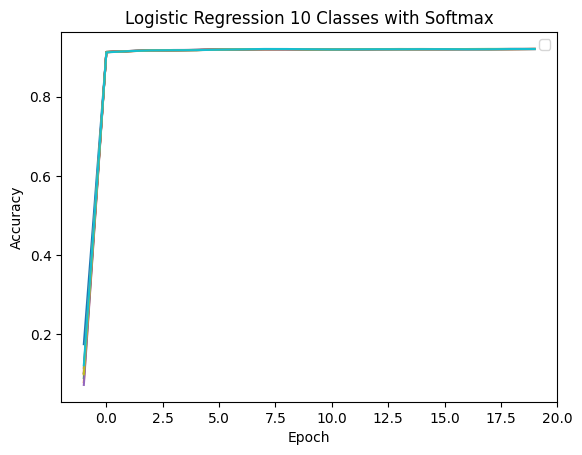

In [7]:
for i in range(10):
    plt.plot(np.arange(-1, n_epochs), accuracies[i])
plt.title("Logistic Regression 10 Classes with Softmax")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend() 

In [10]:
learning_rate = 1e-5

In [11]:
# SOFTMAX 2 CLASSES 

aucs = []
for i in range(10):
    model_aucs = []
    network = models.SoftmaxLogisticRegression(NUM_CLASSES_REDUCED)
    optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)
    _, auc = metric_utils.auc_softmax(test_loader_reduced, network) 
    model_aucs.append(auc)
    for epoch in range(n_epochs):
        _, _ = train.train_softmax(epoch, train_loader_reduced, network, optimizer, f'{FOLDERNAME}/softmax_results/reduced{i}/model{epoch}')
        _, auc = metric_utils.auc_softmax(test_loader_reduced, network)
        model_aucs.append(auc)
    aucs.append(model_aucs)
    np.save(f'{FOLDERNAME}/softmax_results/reduced{i}/aucs', model_aucs)


Test set: Avg. loss: 0.026535531533243527, AUC: 0.48226422727681384

Train Epoch: 0 [0/12665 (0%)]	Loss: 16.469240
Train Epoch: 0 [640/12665 (5%)]	Loss: 0.214239
Train Epoch: 0 [1280/12665 (10%)]	Loss: 0.266076
Train Epoch: 0 [1920/12665 (15%)]	Loss: 0.000743
Train Epoch: 0 [2560/12665 (20%)]	Loss: 0.113802
Train Epoch: 0 [3200/12665 (25%)]	Loss: 0.127210
Train Epoch: 0 [3840/12665 (30%)]	Loss: 0.319414
Train Epoch: 0 [4480/12665 (35%)]	Loss: 0.166642
Train Epoch: 0 [5120/12665 (40%)]	Loss: 0.000000
Train Epoch: 0 [5760/12665 (45%)]	Loss: 0.000000
Train Epoch: 0 [6400/12665 (51%)]	Loss: 0.547225
Train Epoch: 0 [7040/12665 (56%)]	Loss: 0.002019
Train Epoch: 0 [7680/12665 (61%)]	Loss: 0.316341
Train Epoch: 0 [8320/12665 (66%)]	Loss: 0.000006
Train Epoch: 0 [8960/12665 (71%)]	Loss: 0.000163
Train Epoch: 0 [9600/12665 (76%)]	Loss: 0.004819
Train Epoch: 0 [10240/12665 (81%)]	Loss: 0.000000
Train Epoch: 0 [10880/12665 (86%)]	Loss: 0.000000
Train Epoch: 0 [11520/12665 (91%)]	Loss: 0.000000
T

Train Epoch: 8 [7040/12665 (56%)]	Loss: 0.001371
Train Epoch: 8 [7680/12665 (61%)]	Loss: 0.000019
Train Epoch: 8 [8320/12665 (66%)]	Loss: 0.003018
Train Epoch: 8 [8960/12665 (71%)]	Loss: 0.000000
Train Epoch: 8 [9600/12665 (76%)]	Loss: 0.000000
Train Epoch: 8 [10240/12665 (81%)]	Loss: 0.000000
Train Epoch: 8 [10880/12665 (86%)]	Loss: 0.000000
Train Epoch: 8 [11520/12665 (91%)]	Loss: 0.000000
Train Epoch: 8 [12160/12665 (96%)]	Loss: 0.000000

Test set: Avg. loss: 1.4739651915487387e-05, AUC: 0.9980985345680122

Train Epoch: 9 [0/12665 (0%)]	Loss: 0.000002
Train Epoch: 9 [640/12665 (5%)]	Loss: 0.000000
Train Epoch: 9 [1280/12665 (10%)]	Loss: 0.000000
Train Epoch: 9 [1920/12665 (15%)]	Loss: 0.000000
Train Epoch: 9 [2560/12665 (20%)]	Loss: 0.043632
Train Epoch: 9 [3200/12665 (25%)]	Loss: 0.000000
Train Epoch: 9 [3840/12665 (30%)]	Loss: 0.000000
Train Epoch: 9 [4480/12665 (35%)]	Loss: 0.100051
Train Epoch: 9 [5120/12665 (40%)]	Loss: 0.000000
Train Epoch: 9 [5760/12665 (45%)]	Loss: 0.000000


Train Epoch: 16 [8320/12665 (66%)]	Loss: 0.001180
Train Epoch: 16 [8960/12665 (71%)]	Loss: 0.000000
Train Epoch: 16 [9600/12665 (76%)]	Loss: 0.000000
Train Epoch: 16 [10240/12665 (81%)]	Loss: 0.000000
Train Epoch: 16 [10880/12665 (86%)]	Loss: 0.000000
Train Epoch: 16 [11520/12665 (91%)]	Loss: 0.000000
Train Epoch: 16 [12160/12665 (96%)]	Loss: 0.000000

Test set: Avg. loss: 3.741200458496175e-05, AUC: 0.9980985345680122

Train Epoch: 17 [0/12665 (0%)]	Loss: 0.000000
Train Epoch: 17 [640/12665 (5%)]	Loss: 0.000000
Train Epoch: 17 [1280/12665 (10%)]	Loss: 0.000000
Train Epoch: 17 [1920/12665 (15%)]	Loss: 0.000000
Train Epoch: 17 [2560/12665 (20%)]	Loss: 0.096445
Train Epoch: 17 [3200/12665 (25%)]	Loss: 0.000000
Train Epoch: 17 [3840/12665 (30%)]	Loss: 0.000000
Train Epoch: 17 [4480/12665 (35%)]	Loss: 0.047744
Train Epoch: 17 [5120/12665 (40%)]	Loss: 0.000000
Train Epoch: 17 [5760/12665 (45%)]	Loss: 0.000000
Train Epoch: 17 [6400/12665 (51%)]	Loss: 0.009519
Train Epoch: 17 [7040/12665 (56%

Train Epoch: 4 [8960/12665 (71%)]	Loss: 0.000000
Train Epoch: 4 [9600/12665 (76%)]	Loss: 0.000000
Train Epoch: 4 [10240/12665 (81%)]	Loss: 0.000000
Train Epoch: 4 [10880/12665 (86%)]	Loss: 0.000000
Train Epoch: 4 [11520/12665 (91%)]	Loss: 0.305878
Train Epoch: 4 [12160/12665 (96%)]	Loss: 0.000000

Test set: Avg. loss: 4.5663416143462734e-05, AUC: 0.9981682100152836

Train Epoch: 5 [0/12665 (0%)]	Loss: 0.000622
Train Epoch: 5 [640/12665 (5%)]	Loss: 0.000000
Train Epoch: 5 [1280/12665 (10%)]	Loss: 0.000000
Train Epoch: 5 [1920/12665 (15%)]	Loss: 0.000000
Train Epoch: 5 [2560/12665 (20%)]	Loss: 0.017730
Train Epoch: 5 [3200/12665 (25%)]	Loss: 0.000173
Train Epoch: 5 [3840/12665 (30%)]	Loss: 0.000000
Train Epoch: 5 [4480/12665 (35%)]	Loss: 0.492968
Train Epoch: 5 [5120/12665 (40%)]	Loss: 0.000000
Train Epoch: 5 [5760/12665 (45%)]	Loss: 0.000000
Train Epoch: 5 [6400/12665 (51%)]	Loss: 0.000112
Train Epoch: 5 [7040/12665 (56%)]	Loss: 0.345166
Train Epoch: 5 [7680/12665 (61%)]	Loss: 0.000000


Train Epoch: 12 [7680/12665 (61%)]	Loss: 0.000000
Train Epoch: 12 [8320/12665 (66%)]	Loss: 0.000086
Train Epoch: 12 [8960/12665 (71%)]	Loss: 0.000000
Train Epoch: 12 [9600/12665 (76%)]	Loss: 0.000000
Train Epoch: 12 [10240/12665 (81%)]	Loss: 0.000000
Train Epoch: 12 [10880/12665 (86%)]	Loss: 0.000000
Train Epoch: 12 [11520/12665 (91%)]	Loss: 0.002769
Train Epoch: 12 [12160/12665 (96%)]	Loss: 0.000000

Test set: Avg. loss: 3.38919049991982e-05, AUC: 0.9977276813809224

Train Epoch: 13 [0/12665 (0%)]	Loss: 0.000000
Train Epoch: 13 [640/12665 (5%)]	Loss: 0.000000
Train Epoch: 13 [1280/12665 (10%)]	Loss: 0.000000
Train Epoch: 13 [1920/12665 (15%)]	Loss: 0.000000
Train Epoch: 13 [2560/12665 (20%)]	Loss: 0.000133
Train Epoch: 13 [3200/12665 (25%)]	Loss: 0.000023
Train Epoch: 13 [3840/12665 (30%)]	Loss: 0.000465
Train Epoch: 13 [4480/12665 (35%)]	Loss: 0.272782
Train Epoch: 13 [5120/12665 (40%)]	Loss: 0.000000
Train Epoch: 13 [5760/12665 (45%)]	Loss: 0.000000
Train Epoch: 13 [6400/12665 (51%)

Train Epoch: 0 [8960/12665 (71%)]	Loss: 0.000001
Train Epoch: 0 [9600/12665 (76%)]	Loss: 0.000009
Train Epoch: 0 [10240/12665 (81%)]	Loss: 0.000000
Train Epoch: 0 [10880/12665 (86%)]	Loss: 0.118990
Train Epoch: 0 [11520/12665 (91%)]	Loss: 0.549580
Train Epoch: 0 [12160/12665 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.00032346157387920586, AUC: 0.9948058077856694

Train Epoch: 1 [0/12665 (0%)]	Loss: 0.420865
Train Epoch: 1 [640/12665 (5%)]	Loss: 0.000000
Train Epoch: 1 [1280/12665 (10%)]	Loss: 0.000000
Train Epoch: 1 [1920/12665 (15%)]	Loss: 0.000000
Train Epoch: 1 [2560/12665 (20%)]	Loss: 0.000000
Train Epoch: 1 [3200/12665 (25%)]	Loss: 0.372748
Train Epoch: 1 [3840/12665 (30%)]	Loss: 0.000000
Train Epoch: 1 [4480/12665 (35%)]	Loss: 0.873277
Train Epoch: 1 [5120/12665 (40%)]	Loss: 0.000000
Train Epoch: 1 [5760/12665 (45%)]	Loss: 0.000000
Train Epoch: 1 [6400/12665 (51%)]	Loss: 0.145556
Train Epoch: 1 [7040/12665 (56%)]	Loss: 0.000000
Train Epoch: 1 [7680/12665 (61%)]	Loss: 0.000004


Train Epoch: 9 [7040/12665 (56%)]	Loss: 0.000000
Train Epoch: 9 [7680/12665 (61%)]	Loss: 0.000003
Train Epoch: 9 [8320/12665 (66%)]	Loss: 0.000004
Train Epoch: 9 [8960/12665 (71%)]	Loss: 0.000000
Train Epoch: 9 [9600/12665 (76%)]	Loss: 0.000000
Train Epoch: 9 [10240/12665 (81%)]	Loss: 0.000000
Train Epoch: 9 [10880/12665 (86%)]	Loss: 0.000000
Train Epoch: 9 [11520/12665 (91%)]	Loss: 0.003964
Train Epoch: 9 [12160/12665 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.00016865144895464535, AUC: 0.9967072732176571

Train Epoch: 10 [0/12665 (0%)]	Loss: 0.000000
Train Epoch: 10 [640/12665 (5%)]	Loss: 0.000000
Train Epoch: 10 [1280/12665 (10%)]	Loss: 0.000000
Train Epoch: 10 [1920/12665 (15%)]	Loss: 0.000000
Train Epoch: 10 [2560/12665 (20%)]	Loss: 0.000000
Train Epoch: 10 [3200/12665 (25%)]	Loss: 0.312724
Train Epoch: 10 [3840/12665 (30%)]	Loss: 0.000000
Train Epoch: 10 [4480/12665 (35%)]	Loss: 0.755582
Train Epoch: 10 [5120/12665 (40%)]	Loss: 0.000000
Train Epoch: 10 [5760/12665 (45%)]	Loss:


Test set: Avg. loss: 0.00015647587306956027, AUC: 0.9971478018520182

Train Epoch: 18 [0/12665 (0%)]	Loss: 0.000000
Train Epoch: 18 [640/12665 (5%)]	Loss: 0.000000
Train Epoch: 18 [1280/12665 (10%)]	Loss: 0.000000
Train Epoch: 18 [1920/12665 (15%)]	Loss: 0.000000
Train Epoch: 18 [2560/12665 (20%)]	Loss: 0.000000
Train Epoch: 18 [3200/12665 (25%)]	Loss: 0.241080
Train Epoch: 18 [3840/12665 (30%)]	Loss: 0.000000
Train Epoch: 18 [4480/12665 (35%)]	Loss: 0.615537
Train Epoch: 18 [5120/12665 (40%)]	Loss: 0.000000
Train Epoch: 18 [5760/12665 (45%)]	Loss: 0.000000
Train Epoch: 18 [6400/12665 (51%)]	Loss: 0.000000
Train Epoch: 18 [7040/12665 (56%)]	Loss: 0.000000
Train Epoch: 18 [7680/12665 (61%)]	Loss: 0.000010
Train Epoch: 18 [8320/12665 (66%)]	Loss: 0.000008
Train Epoch: 18 [8960/12665 (71%)]	Loss: 0.000000
Train Epoch: 18 [9600/12665 (76%)]	Loss: 0.000001
Train Epoch: 18 [10240/12665 (81%)]	Loss: 0.000000
Train Epoch: 18 [10880/12665 (86%)]	Loss: 0.000000
Train Epoch: 18 [11520/12665 (91%

Train Epoch: 6 [3840/12665 (30%)]	Loss: 0.000001
Train Epoch: 6 [4480/12665 (35%)]	Loss: 0.000000
Train Epoch: 6 [5120/12665 (40%)]	Loss: 0.000000
Train Epoch: 6 [5760/12665 (45%)]	Loss: 0.000000
Train Epoch: 6 [6400/12665 (51%)]	Loss: 0.089458
Train Epoch: 6 [7040/12665 (56%)]	Loss: 0.000000
Train Epoch: 6 [7680/12665 (61%)]	Loss: 0.000000
Train Epoch: 6 [8320/12665 (66%)]	Loss: 0.000000
Train Epoch: 6 [8960/12665 (71%)]	Loss: 0.000000
Train Epoch: 6 [9600/12665 (76%)]	Loss: 0.010503
Train Epoch: 6 [10240/12665 (81%)]	Loss: 0.000000
Train Epoch: 6 [10880/12665 (86%)]	Loss: 0.000000
Train Epoch: 6 [11520/12665 (91%)]	Loss: 0.000001
Train Epoch: 6 [12160/12665 (96%)]	Loss: 0.000000

Test set: Avg. loss: 4.290908258012001e-05, AUC: 0.9975883304863796

Train Epoch: 7 [0/12665 (0%)]	Loss: 0.000000
Train Epoch: 7 [640/12665 (5%)]	Loss: 0.000000
Train Epoch: 7 [1280/12665 (10%)]	Loss: 0.000000
Train Epoch: 7 [1920/12665 (15%)]	Loss: 0.000000
Train Epoch: 7 [2560/12665 (20%)]	Loss: 0.000752
T


Test set: Avg. loss: 7.916169580133812e-05, AUC: 0.9980288591207408

Train Epoch: 15 [0/12665 (0%)]	Loss: 0.000000
Train Epoch: 15 [640/12665 (5%)]	Loss: 0.000000
Train Epoch: 15 [1280/12665 (10%)]	Loss: 0.000006
Train Epoch: 15 [1920/12665 (15%)]	Loss: 0.000000
Train Epoch: 15 [2560/12665 (20%)]	Loss: 0.000000
Train Epoch: 15 [3200/12665 (25%)]	Loss: 0.102354
Train Epoch: 15 [3840/12665 (30%)]	Loss: 0.000000
Train Epoch: 15 [4480/12665 (35%)]	Loss: 0.000001
Train Epoch: 15 [5120/12665 (40%)]	Loss: 0.000000
Train Epoch: 15 [5760/12665 (45%)]	Loss: 0.000000
Train Epoch: 15 [6400/12665 (51%)]	Loss: 0.003801
Train Epoch: 15 [7040/12665 (56%)]	Loss: 0.000000
Train Epoch: 15 [7680/12665 (61%)]	Loss: 0.000000
Train Epoch: 15 [8320/12665 (66%)]	Loss: 0.000000
Train Epoch: 15 [8960/12665 (71%)]	Loss: 0.000000
Train Epoch: 15 [9600/12665 (76%)]	Loss: 0.002767
Train Epoch: 15 [10240/12665 (81%)]	Loss: 0.000000
Train Epoch: 15 [10880/12665 (86%)]	Loss: 0.000000
Train Epoch: 15 [11520/12665 (91%)

Train Epoch: 3 [3200/12665 (25%)]	Loss: 0.143188
Train Epoch: 3 [3840/12665 (30%)]	Loss: 0.000000
Train Epoch: 3 [4480/12665 (35%)]	Loss: 0.819919
Train Epoch: 3 [5120/12665 (40%)]	Loss: 0.000000
Train Epoch: 3 [5760/12665 (45%)]	Loss: 0.000000
Train Epoch: 3 [6400/12665 (51%)]	Loss: 0.037419
Train Epoch: 3 [7040/12665 (56%)]	Loss: 0.086439
Train Epoch: 3 [7680/12665 (61%)]	Loss: 0.000000
Train Epoch: 3 [8320/12665 (66%)]	Loss: 0.006089
Train Epoch: 3 [8960/12665 (71%)]	Loss: 0.000000
Train Epoch: 3 [9600/12665 (76%)]	Loss: 0.221530
Train Epoch: 3 [10240/12665 (81%)]	Loss: 0.000000
Train Epoch: 3 [10880/12665 (86%)]	Loss: 0.000000
Train Epoch: 3 [11520/12665 (91%)]	Loss: 0.000000
Train Epoch: 3 [12160/12665 (96%)]	Loss: 0.000002

Test set: Avg. loss: 0.00011753682531504484, AUC: 0.9966375977703855

Train Epoch: 4 [0/12665 (0%)]	Loss: 1.190835
Train Epoch: 4 [640/12665 (5%)]	Loss: 0.000000
Train Epoch: 4 [1280/12665 (10%)]	Loss: 0.000000
Train Epoch: 4 [1920/12665 (15%)]	Loss: 0.000000



Test set: Avg. loss: 0.00010288726962523768, AUC: 0.9980288591207408

Train Epoch: 12 [0/12665 (0%)]	Loss: 0.834070
Train Epoch: 12 [640/12665 (5%)]	Loss: 0.000000
Train Epoch: 12 [1280/12665 (10%)]	Loss: 0.000000
Train Epoch: 12 [1920/12665 (15%)]	Loss: 0.000000
Train Epoch: 12 [2560/12665 (20%)]	Loss: 0.000000
Train Epoch: 12 [3200/12665 (25%)]	Loss: 0.211007
Train Epoch: 12 [3840/12665 (30%)]	Loss: 0.000000
Train Epoch: 12 [4480/12665 (35%)]	Loss: 0.677673
Train Epoch: 12 [5120/12665 (40%)]	Loss: 0.000000
Train Epoch: 12 [5760/12665 (45%)]	Loss: 0.000000
Train Epoch: 12 [6400/12665 (51%)]	Loss: 0.000181
Train Epoch: 12 [7040/12665 (56%)]	Loss: 0.009681
Train Epoch: 12 [7680/12665 (61%)]	Loss: 0.000000
Train Epoch: 12 [8320/12665 (66%)]	Loss: 0.000030
Train Epoch: 12 [8960/12665 (71%)]	Loss: 0.000000
Train Epoch: 12 [9600/12665 (76%)]	Loss: 0.199841
Train Epoch: 12 [10240/12665 (81%)]	Loss: 0.000000
Train Epoch: 12 [10880/12665 (86%)]	Loss: 0.000000
Train Epoch: 12 [11520/12665 (91%

Train Epoch: 0 [2560/12665 (20%)]	Loss: 0.535285
Train Epoch: 0 [3200/12665 (25%)]	Loss: 0.400269
Train Epoch: 0 [3840/12665 (30%)]	Loss: 0.000061
Train Epoch: 0 [4480/12665 (35%)]	Loss: 0.774117
Train Epoch: 0 [5120/12665 (40%)]	Loss: 0.000000
Train Epoch: 0 [5760/12665 (45%)]	Loss: 0.000000
Train Epoch: 0 [6400/12665 (51%)]	Loss: 0.334385
Train Epoch: 0 [7040/12665 (56%)]	Loss: 0.070441
Train Epoch: 0 [7680/12665 (61%)]	Loss: 0.000000
Train Epoch: 0 [8320/12665 (66%)]	Loss: 0.001835
Train Epoch: 0 [8960/12665 (71%)]	Loss: 0.000000
Train Epoch: 0 [9600/12665 (76%)]	Loss: 0.000003
Train Epoch: 0 [10240/12665 (81%)]	Loss: 0.000000
Train Epoch: 0 [10880/12665 (86%)]	Loss: 0.000000
Train Epoch: 0 [11520/12665 (91%)]	Loss: 0.032874
Train Epoch: 0 [12160/12665 (96%)]	Loss: 0.000462

Test set: Avg. loss: 8.625514259293288e-05, AUC: 0.9970781264047468

Train Epoch: 1 [0/12665 (0%)]	Loss: 0.270575
Train Epoch: 1 [640/12665 (5%)]	Loss: 0.000000
Train Epoch: 1 [1280/12665 (10%)]	Loss: 0.000000
T


Test set: Avg. loss: 7.48078552092344e-05, AUC: 0.9980985345680122

Train Epoch: 9 [0/12665 (0%)]	Loss: 0.000013
Train Epoch: 9 [640/12665 (5%)]	Loss: 0.000000
Train Epoch: 9 [1280/12665 (10%)]	Loss: 0.000000
Train Epoch: 9 [1920/12665 (15%)]	Loss: 0.000000
Train Epoch: 9 [2560/12665 (20%)]	Loss: 0.000730
Train Epoch: 9 [3200/12665 (25%)]	Loss: 0.002286
Train Epoch: 9 [3840/12665 (30%)]	Loss: 0.000000
Train Epoch: 9 [4480/12665 (35%)]	Loss: 0.532129
Train Epoch: 9 [5120/12665 (40%)]	Loss: 0.000000
Train Epoch: 9 [5760/12665 (45%)]	Loss: 0.000000
Train Epoch: 9 [6400/12665 (51%)]	Loss: 0.000388
Train Epoch: 9 [7040/12665 (56%)]	Loss: 0.004096
Train Epoch: 9 [7680/12665 (61%)]	Loss: 0.000000
Train Epoch: 9 [8320/12665 (66%)]	Loss: 0.000000
Train Epoch: 9 [8960/12665 (71%)]	Loss: 0.000000
Train Epoch: 9 [9600/12665 (76%)]	Loss: 0.000000
Train Epoch: 9 [10240/12665 (81%)]	Loss: 0.000000
Train Epoch: 9 [10880/12665 (86%)]	Loss: 0.000000
Train Epoch: 9 [11520/12665 (91%)]	Loss: 0.000005
Tra

Train Epoch: 17 [12160/12665 (96%)]	Loss: 0.000000

Test set: Avg. loss: 9.33541448148927e-05, AUC: 0.9980985345680122

Train Epoch: 18 [0/12665 (0%)]	Loss: 0.000000
Train Epoch: 18 [640/12665 (5%)]	Loss: 0.000000
Train Epoch: 18 [1280/12665 (10%)]	Loss: 0.000000
Train Epoch: 18 [1920/12665 (15%)]	Loss: 0.000000
Train Epoch: 18 [2560/12665 (20%)]	Loss: 0.000116
Train Epoch: 18 [3200/12665 (25%)]	Loss: 0.002370
Train Epoch: 18 [3840/12665 (30%)]	Loss: 0.000000
Train Epoch: 18 [4480/12665 (35%)]	Loss: 0.381365
Train Epoch: 18 [5120/12665 (40%)]	Loss: 0.000000
Train Epoch: 18 [5760/12665 (45%)]	Loss: 0.000000
Train Epoch: 18 [6400/12665 (51%)]	Loss: 0.000000
Train Epoch: 18 [7040/12665 (56%)]	Loss: 0.000011
Train Epoch: 18 [7680/12665 (61%)]	Loss: 0.000000
Train Epoch: 18 [8320/12665 (66%)]	Loss: 0.000000
Train Epoch: 18 [8960/12665 (71%)]	Loss: 0.000000
Train Epoch: 18 [9600/12665 (76%)]	Loss: 0.000000
Train Epoch: 18 [10240/12665 (81%)]	Loss: 0.000000
Train Epoch: 18 [10880/12665 (86%)]


Test set: Avg. loss: 9.05938076634779e-05, AUC: 0.9967769486649285

Train Epoch: 6 [0/12665 (0%)]	Loss: 0.002678
Train Epoch: 6 [640/12665 (5%)]	Loss: 0.000000
Train Epoch: 6 [1280/12665 (10%)]	Loss: 0.000000
Train Epoch: 6 [1920/12665 (15%)]	Loss: 0.000000
Train Epoch: 6 [2560/12665 (20%)]	Loss: 0.000008
Train Epoch: 6 [3200/12665 (25%)]	Loss: 0.000099
Train Epoch: 6 [3840/12665 (30%)]	Loss: 0.060348
Train Epoch: 6 [4480/12665 (35%)]	Loss: 0.187808
Train Epoch: 6 [5120/12665 (40%)]	Loss: 0.000000
Train Epoch: 6 [5760/12665 (45%)]	Loss: 0.000000
Train Epoch: 6 [6400/12665 (51%)]	Loss: 0.005008
Train Epoch: 6 [7040/12665 (56%)]	Loss: 0.000000
Train Epoch: 6 [7680/12665 (61%)]	Loss: 0.000000
Train Epoch: 6 [8320/12665 (66%)]	Loss: 0.000001
Train Epoch: 6 [8960/12665 (71%)]	Loss: 0.000000
Train Epoch: 6 [9600/12665 (76%)]	Loss: 0.000000
Train Epoch: 6 [10240/12665 (81%)]	Loss: 0.000000
Train Epoch: 6 [10880/12665 (86%)]	Loss: 0.000000
Train Epoch: 6 [11520/12665 (91%)]	Loss: 0.118739
Tra

Train Epoch: 14 [7040/12665 (56%)]	Loss: 0.000000
Train Epoch: 14 [7680/12665 (61%)]	Loss: 0.000000
Train Epoch: 14 [8320/12665 (66%)]	Loss: 0.000000
Train Epoch: 14 [8960/12665 (71%)]	Loss: 0.000000
Train Epoch: 14 [9600/12665 (76%)]	Loss: 0.000000
Train Epoch: 14 [10240/12665 (81%)]	Loss: 0.000000
Train Epoch: 14 [10880/12665 (86%)]	Loss: 0.000000
Train Epoch: 14 [11520/12665 (91%)]	Loss: 0.000001
Train Epoch: 14 [12160/12665 (96%)]	Loss: 0.000000

Test set: Avg. loss: 2.5623307156598914e-05, AUC: 0.998608738649645

Train Epoch: 15 [0/12665 (0%)]	Loss: 0.000454
Train Epoch: 15 [640/12665 (5%)]	Loss: 0.000000
Train Epoch: 15 [1280/12665 (10%)]	Loss: 0.000000
Train Epoch: 15 [1920/12665 (15%)]	Loss: 0.000000
Train Epoch: 15 [2560/12665 (20%)]	Loss: 0.000000
Train Epoch: 15 [3200/12665 (25%)]	Loss: 0.000009
Train Epoch: 15 [3840/12665 (30%)]	Loss: 0.020562
Train Epoch: 15 [4480/12665 (35%)]	Loss: 0.041095
Train Epoch: 15 [5120/12665 (40%)]	Loss: 0.000000
Train Epoch: 15 [5760/12665 (45%

Train Epoch: 3 [640/12665 (5%)]	Loss: 0.000000
Train Epoch: 3 [1280/12665 (10%)]	Loss: 0.000000
Train Epoch: 3 [1920/12665 (15%)]	Loss: 0.110942
Train Epoch: 3 [2560/12665 (20%)]	Loss: 0.000000
Train Epoch: 3 [3200/12665 (25%)]	Loss: 0.425090
Train Epoch: 3 [3840/12665 (30%)]	Loss: 0.000000
Train Epoch: 3 [4480/12665 (35%)]	Loss: 0.851429
Train Epoch: 3 [5120/12665 (40%)]	Loss: 0.000000
Train Epoch: 3 [5760/12665 (45%)]	Loss: 0.000000
Train Epoch: 3 [6400/12665 (51%)]	Loss: 0.072597
Train Epoch: 3 [7040/12665 (56%)]	Loss: 0.036899
Train Epoch: 3 [7680/12665 (61%)]	Loss: 0.000000
Train Epoch: 3 [8320/12665 (66%)]	Loss: 0.026319
Train Epoch: 3 [8960/12665 (71%)]	Loss: 0.200982
Train Epoch: 3 [9600/12665 (76%)]	Loss: 0.000000
Train Epoch: 3 [10240/12665 (81%)]	Loss: 0.000000
Train Epoch: 3 [10880/12665 (86%)]	Loss: 0.000000
Train Epoch: 3 [11520/12665 (91%)]	Loss: 0.000000
Train Epoch: 3 [12160/12665 (96%)]	Loss: 0.000000

Test set: Avg. loss: 6.649147022304171e-05, AUC: 0.998608738649645

Train Epoch: 11 [11520/12665 (91%)]	Loss: 0.000000
Train Epoch: 11 [12160/12665 (96%)]	Loss: 0.000000

Test set: Avg. loss: 9.879142703915669e-05, AUC: 0.9989795918367347

Train Epoch: 12 [0/12665 (0%)]	Loss: 0.000000
Train Epoch: 12 [640/12665 (5%)]	Loss: 0.000000
Train Epoch: 12 [1280/12665 (10%)]	Loss: 0.000000
Train Epoch: 12 [1920/12665 (15%)]	Loss: 0.000046
Train Epoch: 12 [2560/12665 (20%)]	Loss: 0.000000
Train Epoch: 12 [3200/12665 (25%)]	Loss: 0.002295
Train Epoch: 12 [3840/12665 (30%)]	Loss: 0.000000
Train Epoch: 12 [4480/12665 (35%)]	Loss: 0.544397
Train Epoch: 12 [5120/12665 (40%)]	Loss: 0.000000
Train Epoch: 12 [5760/12665 (45%)]	Loss: 0.000000
Train Epoch: 12 [6400/12665 (51%)]	Loss: 0.000000
Train Epoch: 12 [7040/12665 (56%)]	Loss: 0.000478
Train Epoch: 12 [7680/12665 (61%)]	Loss: 0.000000
Train Epoch: 12 [8320/12665 (66%)]	Loss: 0.000000
Train Epoch: 12 [8960/12665 (71%)]	Loss: 0.000000
Train Epoch: 12 [9600/12665 (76%)]	Loss: 0.000000
Train Epoch: 12 [10240/12665 (81%)

Train Epoch: 0 [2560/12665 (20%)]	Loss: 0.507100
Train Epoch: 0 [3200/12665 (25%)]	Loss: 3.351130
Train Epoch: 0 [3840/12665 (30%)]	Loss: 0.520484
Train Epoch: 0 [4480/12665 (35%)]	Loss: 1.228883
Train Epoch: 0 [5120/12665 (40%)]	Loss: 0.393723
Train Epoch: 0 [5760/12665 (45%)]	Loss: 0.000000
Train Epoch: 0 [6400/12665 (51%)]	Loss: 1.229393
Train Epoch: 0 [7040/12665 (56%)]	Loss: 0.008139
Train Epoch: 0 [7680/12665 (61%)]	Loss: 0.000000
Train Epoch: 0 [8320/12665 (66%)]	Loss: 0.092143
Train Epoch: 0 [8960/12665 (71%)]	Loss: 0.000000
Train Epoch: 0 [9600/12665 (76%)]	Loss: 0.011217
Train Epoch: 0 [10240/12665 (81%)]	Loss: 0.000000
Train Epoch: 0 [10880/12665 (86%)]	Loss: 0.006366
Train Epoch: 0 [11520/12665 (91%)]	Loss: 0.000000
Train Epoch: 0 [12160/12665 (96%)]	Loss: 0.290603

Test set: Avg. loss: 0.00011036986403660431, AUC: 0.993785399622404

Train Epoch: 1 [0/12665 (0%)]	Loss: 0.602873
Train Epoch: 1 [640/12665 (5%)]	Loss: 0.000000
Train Epoch: 1 [1280/12665 (10%)]	Loss: 0.000000
T


Test set: Avg. loss: 2.5853767019822393e-05, AUC: 0.9975186550391082

Train Epoch: 9 [0/12665 (0%)]	Loss: 0.000000
Train Epoch: 9 [640/12665 (5%)]	Loss: 0.000000
Train Epoch: 9 [1280/12665 (10%)]	Loss: 0.000000
Train Epoch: 9 [1920/12665 (15%)]	Loss: 0.000000
Train Epoch: 9 [2560/12665 (20%)]	Loss: 0.000000
Train Epoch: 9 [3200/12665 (25%)]	Loss: 0.187707
Train Epoch: 9 [3840/12665 (30%)]	Loss: 0.000000
Train Epoch: 9 [4480/12665 (35%)]	Loss: 1.031101
Train Epoch: 9 [5120/12665 (40%)]	Loss: 0.000232
Train Epoch: 9 [5760/12665 (45%)]	Loss: 0.000000
Train Epoch: 9 [6400/12665 (51%)]	Loss: 0.000409
Train Epoch: 9 [7040/12665 (56%)]	Loss: 0.000000
Train Epoch: 9 [7680/12665 (61%)]	Loss: 0.000000
Train Epoch: 9 [8320/12665 (66%)]	Loss: 0.000000
Train Epoch: 9 [8960/12665 (71%)]	Loss: 0.000000
Train Epoch: 9 [9600/12665 (76%)]	Loss: 0.225807
Train Epoch: 9 [10240/12665 (81%)]	Loss: 0.000000
Train Epoch: 9 [10880/12665 (86%)]	Loss: 0.000000
Train Epoch: 9 [11520/12665 (91%)]	Loss: 0.000000
T


Test set: Avg. loss: 1.697505737019129e-05, AUC: 0.9980288591207408

Train Epoch: 18 [0/12665 (0%)]	Loss: 0.000000
Train Epoch: 18 [640/12665 (5%)]	Loss: 0.000000
Train Epoch: 18 [1280/12665 (10%)]	Loss: 0.000000
Train Epoch: 18 [1920/12665 (15%)]	Loss: 0.000000
Train Epoch: 18 [2560/12665 (20%)]	Loss: 0.000000
Train Epoch: 18 [3200/12665 (25%)]	Loss: 0.212039
Train Epoch: 18 [3840/12665 (30%)]	Loss: 0.000000
Train Epoch: 18 [4480/12665 (35%)]	Loss: 0.842987
Train Epoch: 18 [5120/12665 (40%)]	Loss: 0.000001
Train Epoch: 18 [5760/12665 (45%)]	Loss: 0.000000
Train Epoch: 18 [6400/12665 (51%)]	Loss: 0.000002
Train Epoch: 18 [7040/12665 (56%)]	Loss: 0.000000
Train Epoch: 18 [7680/12665 (61%)]	Loss: 0.000000
Train Epoch: 18 [8320/12665 (66%)]	Loss: 0.000000
Train Epoch: 18 [8960/12665 (71%)]	Loss: 0.000000
Train Epoch: 18 [9600/12665 (76%)]	Loss: 0.118171
Train Epoch: 18 [10240/12665 (81%)]	Loss: 0.000000
Train Epoch: 18 [10880/12665 (86%)]	Loss: 0.000000
Train Epoch: 18 [11520/12665 (91%)

Train Epoch: 6 [7680/12665 (61%)]	Loss: 0.000908
Train Epoch: 6 [8320/12665 (66%)]	Loss: 0.000000
Train Epoch: 6 [8960/12665 (71%)]	Loss: 0.000000
Train Epoch: 6 [9600/12665 (76%)]	Loss: 0.002612
Train Epoch: 6 [10240/12665 (81%)]	Loss: 0.000000
Train Epoch: 6 [10880/12665 (86%)]	Loss: 0.000000
Train Epoch: 6 [11520/12665 (91%)]	Loss: 0.000006
Train Epoch: 6 [12160/12665 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.0001658702566014299, AUC: 0.997658005933651

Train Epoch: 7 [0/12665 (0%)]	Loss: 0.239334
Train Epoch: 7 [640/12665 (5%)]	Loss: 0.000000
Train Epoch: 7 [1280/12665 (10%)]	Loss: 0.000000
Train Epoch: 7 [1920/12665 (15%)]	Loss: 0.003412
Train Epoch: 7 [2560/12665 (20%)]	Loss: 0.000000
Train Epoch: 7 [3200/12665 (25%)]	Loss: 0.315674
Train Epoch: 7 [3840/12665 (30%)]	Loss: 0.022177
Train Epoch: 7 [4480/12665 (35%)]	Loss: 0.389000
Train Epoch: 7 [5120/12665 (40%)]	Loss: 0.000000
Train Epoch: 7 [5760/12665 (45%)]	Loss: 0.000000
Train Epoch: 7 [6400/12665 (51%)]	Loss: 0.000000
Tr

Train Epoch: 15 [8320/12665 (66%)]	Loss: 0.000000
Train Epoch: 15 [8960/12665 (71%)]	Loss: 0.000000
Train Epoch: 15 [9600/12665 (76%)]	Loss: 0.000038
Train Epoch: 15 [10240/12665 (81%)]	Loss: 0.000000
Train Epoch: 15 [10880/12665 (86%)]	Loss: 0.000000
Train Epoch: 15 [11520/12665 (91%)]	Loss: 0.000001
Train Epoch: 15 [12160/12665 (96%)]	Loss: 0.000000

Test set: Avg. loss: 9.963516879113431e-05, AUC: 0.9980985345680122

Train Epoch: 16 [0/12665 (0%)]	Loss: 0.040583
Train Epoch: 16 [640/12665 (5%)]	Loss: 0.000000
Train Epoch: 16 [1280/12665 (10%)]	Loss: 0.000000
Train Epoch: 16 [1920/12665 (15%)]	Loss: 0.000107
Train Epoch: 16 [2560/12665 (20%)]	Loss: 0.000000
Train Epoch: 16 [3200/12665 (25%)]	Loss: 0.286440
Train Epoch: 16 [3840/12665 (30%)]	Loss: 0.006948
Train Epoch: 16 [4480/12665 (35%)]	Loss: 0.111105
Train Epoch: 16 [5120/12665 (40%)]	Loss: 0.000000
Train Epoch: 16 [5760/12665 (45%)]	Loss: 0.000000
Train Epoch: 16 [6400/12665 (51%)]	Loss: 0.000000
Train Epoch: 16 [7040/12665 (56%

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


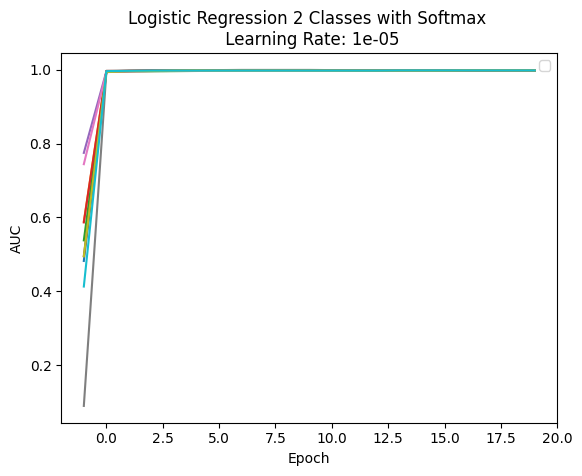

In [12]:
for i in range(10):
    plt.plot(np.arange(-1, n_epochs), aucs[i])
plt.title("Logistic Regression 2 Classes with Softmax \n Learning Rate: " + str(learning_rate))
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()

In [13]:
# SIGMOID 2 CLASSES 

aucs = []
for i in range(10):
    model_aucs = []
    network = models.SigmoidLogisticRegression(NUM_CLASSES_REDUCED)
    optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)
    _, auc = metric_utils.auc_sigmoid(test_loader_reduced, network) 
    model_aucs.append(auc)
    for epoch in range(n_epochs):
        _, _ = train.train_sigmoid(epoch, train_loader_reduced, network, optimizer, f'{FOLDERNAME}/sigmoid_results/reduced{i}/model{epoch}')
        _, auc = metric_utils.auc_sigmoid(test_loader_reduced, network)
        model_aucs.append(auc)
    aucs.append(model_aucs)
    np.save(f'{FOLDERNAME}/sigmoid_results/reduced{i}/aucs', model_aucs)


Test set: Avg. loss: 0.015344497103499465, AUC: 0.8605636968443764

Train Epoch: 0 [0/12665 (0%)]	Loss: 15.961370
Train Epoch: 0 [640/12665 (5%)]	Loss: 4.872602
Train Epoch: 0 [1280/12665 (10%)]	Loss: 0.482188
Train Epoch: 0 [1920/12665 (15%)]	Loss: 0.000001
Train Epoch: 0 [2560/12665 (20%)]	Loss: 0.752739
Train Epoch: 0 [3200/12665 (25%)]	Loss: 0.054315
Train Epoch: 0 [3840/12665 (30%)]	Loss: 0.753279
Train Epoch: 0 [4480/12665 (35%)]	Loss: 1.563211
Train Epoch: 0 [5120/12665 (40%)]	Loss: 0.200162
Train Epoch: 0 [5760/12665 (45%)]	Loss: 0.000053
Train Epoch: 0 [6400/12665 (51%)]	Loss: 2.291503
Train Epoch: 0 [7040/12665 (56%)]	Loss: 0.309942
Train Epoch: 0 [7680/12665 (61%)]	Loss: 0.456741
Train Epoch: 0 [8320/12665 (66%)]	Loss: 0.000342
Train Epoch: 0 [8960/12665 (71%)]	Loss: 0.135950
Train Epoch: 0 [9600/12665 (76%)]	Loss: 0.000000
Train Epoch: 0 [10240/12665 (81%)]	Loss: 0.000001
Train Epoch: 0 [10880/12665 (86%)]	Loss: 0.000000
Train Epoch: 0 [11520/12665 (91%)]	Loss: 0.149837
Tr


Test set: Avg. loss: 7.290376065756913e-05, AUC: 0.9994686685246785

Train Epoch: 8 [0/12665 (0%)]	Loss: 0.018933
Train Epoch: 8 [640/12665 (5%)]	Loss: 0.000000
Train Epoch: 8 [1280/12665 (10%)]	Loss: 0.000000
Train Epoch: 8 [1920/12665 (15%)]	Loss: 0.000000
Train Epoch: 8 [2560/12665 (20%)]	Loss: 0.000006
Train Epoch: 8 [3200/12665 (25%)]	Loss: 0.000000
Train Epoch: 8 [3840/12665 (30%)]	Loss: 0.292870
Train Epoch: 8 [4480/12665 (35%)]	Loss: 1.562500
Train Epoch: 8 [5120/12665 (40%)]	Loss: 0.000000
Train Epoch: 8 [5760/12665 (45%)]	Loss: 0.000000
Train Epoch: 8 [6400/12665 (51%)]	Loss: 1.811746
Train Epoch: 8 [7040/12665 (56%)]	Loss: 0.000020
Train Epoch: 8 [7680/12665 (61%)]	Loss: 0.192538
Train Epoch: 8 [8320/12665 (66%)]	Loss: 0.000000
Train Epoch: 8 [8960/12665 (71%)]	Loss: 0.000329
Train Epoch: 8 [9600/12665 (76%)]	Loss: 0.000000
Train Epoch: 8 [10240/12665 (81%)]	Loss: 0.000000
Train Epoch: 8 [10880/12665 (86%)]	Loss: 0.000000
Train Epoch: 8 [11520/12665 (91%)]	Loss: 0.000001
Tr


Test set: Avg. loss: 6.71195093842046e-05, AUC: 0.999477209385957

Train Epoch: 17 [0/12665 (0%)]	Loss: 0.000067
Train Epoch: 17 [640/12665 (5%)]	Loss: 0.000000
Train Epoch: 17 [1280/12665 (10%)]	Loss: 0.000001
Train Epoch: 17 [1920/12665 (15%)]	Loss: 0.000000
Train Epoch: 17 [2560/12665 (20%)]	Loss: 0.000000
Train Epoch: 17 [3200/12665 (25%)]	Loss: 0.000000
Train Epoch: 17 [3840/12665 (30%)]	Loss: 0.121965
Train Epoch: 17 [4480/12665 (35%)]	Loss: 1.562500
Train Epoch: 17 [5120/12665 (40%)]	Loss: 0.000000
Train Epoch: 17 [5760/12665 (45%)]	Loss: 0.000000
Train Epoch: 17 [6400/12665 (51%)]	Loss: 0.227492
Train Epoch: 17 [7040/12665 (56%)]	Loss: 0.000005
Train Epoch: 17 [7680/12665 (61%)]	Loss: 0.144204
Train Epoch: 17 [8320/12665 (66%)]	Loss: 0.000000
Train Epoch: 17 [8960/12665 (71%)]	Loss: 0.000072
Train Epoch: 17 [9600/12665 (76%)]	Loss: 0.000000
Train Epoch: 17 [10240/12665 (81%)]	Loss: 0.000000
Train Epoch: 17 [10880/12665 (86%)]	Loss: 0.000000
Train Epoch: 17 [11520/12665 (91%)]	


Test set: Avg. loss: 8.289864634650256e-05, AUC: 0.9994547334352244

Train Epoch: 6 [0/12665 (0%)]	Loss: 0.000000
Train Epoch: 6 [640/12665 (5%)]	Loss: 0.000000
Train Epoch: 6 [1280/12665 (10%)]	Loss: 0.000000
Train Epoch: 6 [1920/12665 (15%)]	Loss: 0.000000
Train Epoch: 6 [2560/12665 (20%)]	Loss: 0.002288
Train Epoch: 6 [3200/12665 (25%)]	Loss: 0.000000
Train Epoch: 6 [3840/12665 (30%)]	Loss: 0.000000
Train Epoch: 6 [4480/12665 (35%)]	Loss: 1.563069
Train Epoch: 6 [5120/12665 (40%)]	Loss: 0.000000
Train Epoch: 6 [5760/12665 (45%)]	Loss: 0.000000
Train Epoch: 6 [6400/12665 (51%)]	Loss: 0.000001
Train Epoch: 6 [7040/12665 (56%)]	Loss: 0.000000
Train Epoch: 6 [7680/12665 (61%)]	Loss: 0.000000
Train Epoch: 6 [8320/12665 (66%)]	Loss: 0.000000
Train Epoch: 6 [8960/12665 (71%)]	Loss: 0.000000
Train Epoch: 6 [9600/12665 (76%)]	Loss: 0.000051
Train Epoch: 6 [10240/12665 (81%)]	Loss: 0.000000
Train Epoch: 6 [10880/12665 (86%)]	Loss: 0.026765
Train Epoch: 6 [11520/12665 (91%)]	Loss: 0.000006
Tr


Test set: Avg. loss: 7.473639263188021e-05, AUC: 0.9994727141958105

Train Epoch: 15 [0/12665 (0%)]	Loss: 0.000000
Train Epoch: 15 [640/12665 (5%)]	Loss: 0.000000
Train Epoch: 15 [1280/12665 (10%)]	Loss: 0.000000
Train Epoch: 15 [1920/12665 (15%)]	Loss: 0.000000
Train Epoch: 15 [2560/12665 (20%)]	Loss: 0.000010
Train Epoch: 15 [3200/12665 (25%)]	Loss: 0.000001
Train Epoch: 15 [3840/12665 (30%)]	Loss: 0.000001
Train Epoch: 15 [4480/12665 (35%)]	Loss: 1.562606
Train Epoch: 15 [5120/12665 (40%)]	Loss: 0.000000
Train Epoch: 15 [5760/12665 (45%)]	Loss: 0.000000
Train Epoch: 15 [6400/12665 (51%)]	Loss: 0.000000
Train Epoch: 15 [7040/12665 (56%)]	Loss: 0.000000
Train Epoch: 15 [7680/12665 (61%)]	Loss: 0.000000
Train Epoch: 15 [8320/12665 (66%)]	Loss: 0.000000
Train Epoch: 15 [8960/12665 (71%)]	Loss: 0.000000
Train Epoch: 15 [9600/12665 (76%)]	Loss: 0.000000
Train Epoch: 15 [10240/12665 (81%)]	Loss: 0.000000
Train Epoch: 15 [10880/12665 (86%)]	Loss: 0.000049
Train Epoch: 15 [11520/12665 (91%)


Test set: Avg. loss: 0.0005198653144475698, AUC: 0.998904971680302

Train Epoch: 4 [0/12665 (0%)]	Loss: 0.294595
Train Epoch: 4 [640/12665 (5%)]	Loss: 0.000000
Train Epoch: 4 [1280/12665 (10%)]	Loss: 0.000000
Train Epoch: 4 [1920/12665 (15%)]	Loss: 0.000001
Train Epoch: 4 [2560/12665 (20%)]	Loss: 0.000330
Train Epoch: 4 [3200/12665 (25%)]	Loss: 0.000000
Train Epoch: 4 [3840/12665 (30%)]	Loss: 0.000000
Train Epoch: 4 [4480/12665 (35%)]	Loss: 1.562500
Train Epoch: 4 [5120/12665 (40%)]	Loss: 0.000000
Train Epoch: 4 [5760/12665 (45%)]	Loss: 0.000000
Train Epoch: 4 [6400/12665 (51%)]	Loss: 0.186591
Train Epoch: 4 [7040/12665 (56%)]	Loss: 0.000000
Train Epoch: 4 [7680/12665 (61%)]	Loss: 0.000000
Train Epoch: 4 [8320/12665 (66%)]	Loss: 0.102558
Train Epoch: 4 [8960/12665 (71%)]	Loss: 0.000000
Train Epoch: 4 [9600/12665 (76%)]	Loss: 0.000000
Train Epoch: 4 [10240/12665 (81%)]	Loss: 0.000000
Train Epoch: 4 [10880/12665 (86%)]	Loss: 0.001916
Train Epoch: 4 [11520/12665 (91%)]	Loss: 0.000000
Tra


Test set: Avg. loss: 0.00044063202173715504, AUC: 0.9994623752584735

Train Epoch: 12 [0/12665 (0%)]	Loss: 0.119883
Train Epoch: 12 [640/12665 (5%)]	Loss: 0.000000
Train Epoch: 12 [1280/12665 (10%)]	Loss: 0.000000
Train Epoch: 12 [1920/12665 (15%)]	Loss: 0.000000
Train Epoch: 12 [2560/12665 (20%)]	Loss: 0.000001
Train Epoch: 12 [3200/12665 (25%)]	Loss: 0.000000
Train Epoch: 12 [3840/12665 (30%)]	Loss: 0.000000
Train Epoch: 12 [4480/12665 (35%)]	Loss: 1.562500
Train Epoch: 12 [5120/12665 (40%)]	Loss: 0.000000
Train Epoch: 12 [5760/12665 (45%)]	Loss: 0.000000
Train Epoch: 12 [6400/12665 (51%)]	Loss: 0.021385
Train Epoch: 12 [7040/12665 (56%)]	Loss: 0.000000
Train Epoch: 12 [7680/12665 (61%)]	Loss: 0.000000
Train Epoch: 12 [8320/12665 (66%)]	Loss: 0.000370
Train Epoch: 12 [8960/12665 (71%)]	Loss: 0.000000
Train Epoch: 12 [9600/12665 (76%)]	Loss: 0.000000
Train Epoch: 12 [10240/12665 (81%)]	Loss: 0.000000
Train Epoch: 12 [10880/12665 (86%)]	Loss: 0.000037
Train Epoch: 12 [11520/12665 (91%


Test set: Avg. loss: 0.00043110054770119084, AUC: 0.9994713656387665


Test set: Avg. loss: 0.05699906044817985, AUC: 0.1438388923851479

Train Epoch: 0 [0/12665 (0%)]	Loss: 29.171236
Train Epoch: 0 [640/12665 (5%)]	Loss: 32.868839
Train Epoch: 0 [1280/12665 (10%)]	Loss: 3.385240
Train Epoch: 0 [1920/12665 (15%)]	Loss: 0.291515
Train Epoch: 0 [2560/12665 (20%)]	Loss: 2.310868
Train Epoch: 0 [3200/12665 (25%)]	Loss: 3.113532
Train Epoch: 0 [3840/12665 (30%)]	Loss: 0.444806
Train Epoch: 0 [4480/12665 (35%)]	Loss: 0.100119
Train Epoch: 0 [5120/12665 (40%)]	Loss: 0.343817
Train Epoch: 0 [5760/12665 (45%)]	Loss: 1.562500
Train Epoch: 0 [6400/12665 (51%)]	Loss: 0.247498
Train Epoch: 0 [7040/12665 (56%)]	Loss: 0.275874
Train Epoch: 0 [7680/12665 (61%)]	Loss: 0.129320
Train Epoch: 0 [8320/12665 (66%)]	Loss: 0.219943
Train Epoch: 0 [8960/12665 (71%)]	Loss: 1.664569
Train Epoch: 0 [9600/12665 (76%)]	Loss: 1.673724
Train Epoch: 0 [10240/12665 (81%)]	Loss: 0.000123
Train Epoch: 0 [10880/12665 (86


Test set: Avg. loss: 1.9469912798484015e-05, AUC: 0.9999910096197069

Train Epoch: 9 [0/12665 (0%)]	Loss: 0.000000
Train Epoch: 9 [640/12665 (5%)]	Loss: 0.000000
Train Epoch: 9 [1280/12665 (10%)]	Loss: 0.000000
Train Epoch: 9 [1920/12665 (15%)]	Loss: 0.000000
Train Epoch: 9 [2560/12665 (20%)]	Loss: 0.000003
Train Epoch: 9 [3200/12665 (25%)]	Loss: 0.000036
Train Epoch: 9 [3840/12665 (30%)]	Loss: 0.014168
Train Epoch: 9 [4480/12665 (35%)]	Loss: 0.158727
Train Epoch: 9 [5120/12665 (40%)]	Loss: 0.000000
Train Epoch: 9 [5760/12665 (45%)]	Loss: 0.000551
Train Epoch: 9 [6400/12665 (51%)]	Loss: 0.000000
Train Epoch: 9 [7040/12665 (56%)]	Loss: 0.000000
Train Epoch: 9 [7680/12665 (61%)]	Loss: 0.000000
Train Epoch: 9 [8320/12665 (66%)]	Loss: 0.000000
Train Epoch: 9 [8960/12665 (71%)]	Loss: 0.125017
Train Epoch: 9 [9600/12665 (76%)]	Loss: 0.000177
Train Epoch: 9 [10240/12665 (81%)]	Loss: 0.000000
Train Epoch: 9 [10880/12665 (86%)]	Loss: 0.000040
Train Epoch: 9 [11520/12665 (91%)]	Loss: 0.003281
T


Test set: Avg. loss: 1.616758692099064e-05, AUC: 0.9999928076957655

Train Epoch: 17 [0/12665 (0%)]	Loss: 0.000000
Train Epoch: 17 [640/12665 (5%)]	Loss: 0.000000
Train Epoch: 17 [1280/12665 (10%)]	Loss: 0.000000
Train Epoch: 17 [1920/12665 (15%)]	Loss: 0.000000
Train Epoch: 17 [2560/12665 (20%)]	Loss: 0.000000
Train Epoch: 17 [3200/12665 (25%)]	Loss: 0.000101
Train Epoch: 17 [3840/12665 (30%)]	Loss: 0.015839
Train Epoch: 17 [4480/12665 (35%)]	Loss: 0.104639
Train Epoch: 17 [5120/12665 (40%)]	Loss: 0.000000
Train Epoch: 17 [5760/12665 (45%)]	Loss: 0.000009
Train Epoch: 17 [6400/12665 (51%)]	Loss: 0.000000
Train Epoch: 17 [7040/12665 (56%)]	Loss: 0.000000
Train Epoch: 17 [7680/12665 (61%)]	Loss: 0.000000
Train Epoch: 17 [8320/12665 (66%)]	Loss: 0.000000
Train Epoch: 17 [8960/12665 (71%)]	Loss: 0.013769
Train Epoch: 17 [9600/12665 (76%)]	Loss: 0.000000
Train Epoch: 17 [10240/12665 (81%)]	Loss: 0.000000
Train Epoch: 17 [10880/12665 (86%)]	Loss: 0.000000
Train Epoch: 17 [11520/12665 (91%)


Test set: Avg. loss: 0.0004684233919103095, AUC: 0.9994605771824148

Train Epoch: 6 [0/12665 (0%)]	Loss: 0.194279
Train Epoch: 6 [640/12665 (5%)]	Loss: 0.000000
Train Epoch: 6 [1280/12665 (10%)]	Loss: 0.000000
Train Epoch: 6 [1920/12665 (15%)]	Loss: 0.000000
Train Epoch: 6 [2560/12665 (20%)]	Loss: 0.000346
Train Epoch: 6 [3200/12665 (25%)]	Loss: 0.112345
Train Epoch: 6 [3840/12665 (30%)]	Loss: 0.159068
Train Epoch: 6 [4480/12665 (35%)]	Loss: 1.562500
Train Epoch: 6 [5120/12665 (40%)]	Loss: 0.000000
Train Epoch: 6 [5760/12665 (45%)]	Loss: 0.000000
Train Epoch: 6 [6400/12665 (51%)]	Loss: 1.563048
Train Epoch: 6 [7040/12665 (56%)]	Loss: 0.094403
Train Epoch: 6 [7680/12665 (61%)]	Loss: 0.000000
Train Epoch: 6 [8320/12665 (66%)]	Loss: 0.000076
Train Epoch: 6 [8960/12665 (71%)]	Loss: 0.000000
Train Epoch: 6 [9600/12665 (76%)]	Loss: 0.000000
Train Epoch: 6 [10240/12665 (81%)]	Loss: 0.000000
Train Epoch: 6 [10880/12665 (86%)]	Loss: 0.323824
Train Epoch: 6 [11520/12665 (91%)]	Loss: 0.000000
Tr

Train Epoch: 14 [12160/12665 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.00045490664084294445, AUC: 0.9994794569810302

Train Epoch: 15 [0/12665 (0%)]	Loss: 0.000000
Train Epoch: 15 [640/12665 (5%)]	Loss: 0.000000
Train Epoch: 15 [1280/12665 (10%)]	Loss: 0.000000
Train Epoch: 15 [1920/12665 (15%)]	Loss: 0.000000
Train Epoch: 15 [2560/12665 (20%)]	Loss: 0.000000
Train Epoch: 15 [3200/12665 (25%)]	Loss: 0.080262
Train Epoch: 15 [3840/12665 (30%)]	Loss: 0.000372
Train Epoch: 15 [4480/12665 (35%)]	Loss: 1.562500
Train Epoch: 15 [5120/12665 (40%)]	Loss: 0.000000
Train Epoch: 15 [5760/12665 (45%)]	Loss: 0.000000
Train Epoch: 15 [6400/12665 (51%)]	Loss: 1.562500
Train Epoch: 15 [7040/12665 (56%)]	Loss: 0.024538
Train Epoch: 15 [7680/12665 (61%)]	Loss: 0.000000
Train Epoch: 15 [8320/12665 (66%)]	Loss: 0.000001
Train Epoch: 15 [8960/12665 (71%)]	Loss: 0.000000
Train Epoch: 15 [9600/12665 (76%)]	Loss: 0.000000
Train Epoch: 15 [10240/12665 (81%)]	Loss: 0.000000
Train Epoch: 15 [10880/12665 (86%

Train Epoch: 3 [2560/12665 (20%)]	Loss: 0.000000
Train Epoch: 3 [3200/12665 (25%)]	Loss: 0.000435
Train Epoch: 3 [3840/12665 (30%)]	Loss: 0.000000
Train Epoch: 3 [4480/12665 (35%)]	Loss: 1.564365
Train Epoch: 3 [5120/12665 (40%)]	Loss: 0.000009
Train Epoch: 3 [5760/12665 (45%)]	Loss: 0.000000
Train Epoch: 3 [6400/12665 (51%)]	Loss: 0.032025
Train Epoch: 3 [7040/12665 (56%)]	Loss: 0.000657
Train Epoch: 3 [7680/12665 (61%)]	Loss: 0.000176
Train Epoch: 3 [8320/12665 (66%)]	Loss: 0.000411
Train Epoch: 3 [8960/12665 (71%)]	Loss: 0.000004
Train Epoch: 3 [9600/12665 (76%)]	Loss: 0.000001
Train Epoch: 3 [10240/12665 (81%)]	Loss: 0.000000
Train Epoch: 3 [10880/12665 (86%)]	Loss: 0.000000
Train Epoch: 3 [11520/12665 (91%)]	Loss: 0.015986
Train Epoch: 3 [12160/12665 (96%)]	Loss: 0.000000

Test set: Avg. loss: 0.00012885172791937563, AUC: 0.998945428391621

Train Epoch: 4 [0/12665 (0%)]	Loss: 0.144340
Train Epoch: 4 [640/12665 (5%)]	Loss: 0.000000
Train Epoch: 4 [1280/12665 (10%)]	Loss: 0.000000
T


Test set: Avg. loss: 0.00010000181730603248, AUC: 0.9989741976085589

Train Epoch: 12 [0/12665 (0%)]	Loss: 0.000000
Train Epoch: 12 [640/12665 (5%)]	Loss: 0.000000
Train Epoch: 12 [1280/12665 (10%)]	Loss: 0.000000
Train Epoch: 12 [1920/12665 (15%)]	Loss: 0.000000
Train Epoch: 12 [2560/12665 (20%)]	Loss: 0.000000
Train Epoch: 12 [3200/12665 (25%)]	Loss: 0.040538
Train Epoch: 12 [3840/12665 (30%)]	Loss: 0.000000
Train Epoch: 12 [4480/12665 (35%)]	Loss: 1.562605
Train Epoch: 12 [5120/12665 (40%)]	Loss: 0.000000
Train Epoch: 12 [5760/12665 (45%)]	Loss: 0.000000
Train Epoch: 12 [6400/12665 (51%)]	Loss: 0.003730
Train Epoch: 12 [7040/12665 (56%)]	Loss: 0.000066
Train Epoch: 12 [7680/12665 (61%)]	Loss: 0.013261
Train Epoch: 12 [8320/12665 (66%)]	Loss: 0.004911
Train Epoch: 12 [8960/12665 (71%)]	Loss: 0.000000
Train Epoch: 12 [9600/12665 (76%)]	Loss: 0.000000
Train Epoch: 12 [10240/12665 (81%)]	Loss: 0.000000
Train Epoch: 12 [10880/12665 (86%)]	Loss: 0.000000
Train Epoch: 12 [11520/12665 (91%


Test set: Avg. loss: 9.902279972926197e-05, AUC: 0.9989750966465882


Test set: Avg. loss: 0.057410515679253475, AUC: 0.5727591477119481

Train Epoch: 0 [0/12665 (0%)]	Loss: 35.273285
Train Epoch: 0 [640/12665 (5%)]	Loss: 39.062523
Train Epoch: 0 [1280/12665 (10%)]	Loss: 14.434623
Train Epoch: 0 [1920/12665 (15%)]	Loss: 1.637579
Train Epoch: 0 [2560/12665 (20%)]	Loss: 1.888162
Train Epoch: 0 [3200/12665 (25%)]	Loss: 0.544643
Train Epoch: 0 [3840/12665 (30%)]	Loss: 0.036922
Train Epoch: 0 [4480/12665 (35%)]	Loss: 1.738176
Train Epoch: 0 [5120/12665 (40%)]	Loss: 0.000012
Train Epoch: 0 [5760/12665 (45%)]	Loss: 0.000009
Train Epoch: 0 [6400/12665 (51%)]	Loss: 3.560953
Train Epoch: 0 [7040/12665 (56%)]	Loss: 0.344809
Train Epoch: 0 [7680/12665 (61%)]	Loss: 0.000000
Train Epoch: 0 [8320/12665 (66%)]	Loss: 1.814332
Train Epoch: 0 [8960/12665 (71%)]	Loss: 0.005376
Train Epoch: 0 [9600/12665 (76%)]	Loss: 0.004472
Train Epoch: 0 [10240/12665 (81%)]	Loss: 0.068614
Train Epoch: 0 [10880/12665 (8


Test set: Avg. loss: 6.491098405427826e-05, AUC: 0.9994515868021219

Train Epoch: 9 [0/12665 (0%)]	Loss: 0.214296
Train Epoch: 9 [640/12665 (5%)]	Loss: 0.000000
Train Epoch: 9 [1280/12665 (10%)]	Loss: 0.000000
Train Epoch: 9 [1920/12665 (15%)]	Loss: 0.000000
Train Epoch: 9 [2560/12665 (20%)]	Loss: 0.000235
Train Epoch: 9 [3200/12665 (25%)]	Loss: 0.299893
Train Epoch: 9 [3840/12665 (30%)]	Loss: 0.000000
Train Epoch: 9 [4480/12665 (35%)]	Loss: 1.562500
Train Epoch: 9 [5120/12665 (40%)]	Loss: 0.000000
Train Epoch: 9 [5760/12665 (45%)]	Loss: 0.000000
Train Epoch: 9 [6400/12665 (51%)]	Loss: 1.562500
Train Epoch: 9 [7040/12665 (56%)]	Loss: 0.084242
Train Epoch: 9 [7680/12665 (61%)]	Loss: 0.000000
Train Epoch: 9 [8320/12665 (66%)]	Loss: 0.001015
Train Epoch: 9 [8960/12665 (71%)]	Loss: 0.000000
Train Epoch: 9 [9600/12665 (76%)]	Loss: 0.000000
Train Epoch: 9 [10240/12665 (81%)]	Loss: 0.000000
Train Epoch: 9 [10880/12665 (86%)]	Loss: 0.000000
Train Epoch: 9 [11520/12665 (91%)]	Loss: 0.000000
Tr


Test set: Avg. loss: 5.950150258913989e-05, AUC: 0.9994700170817226

Train Epoch: 18 [0/12665 (0%)]	Loss: 0.106458
Train Epoch: 18 [640/12665 (5%)]	Loss: 0.000000
Train Epoch: 18 [1280/12665 (10%)]	Loss: 0.000000
Train Epoch: 18 [1920/12665 (15%)]	Loss: 0.000000
Train Epoch: 18 [2560/12665 (20%)]	Loss: 0.000037
Train Epoch: 18 [3200/12665 (25%)]	Loss: 0.261143
Train Epoch: 18 [3840/12665 (30%)]	Loss: 0.000017
Train Epoch: 18 [4480/12665 (35%)]	Loss: 1.562500
Train Epoch: 18 [5120/12665 (40%)]	Loss: 0.000000
Train Epoch: 18 [5760/12665 (45%)]	Loss: 0.000000
Train Epoch: 18 [6400/12665 (51%)]	Loss: 1.562500
Train Epoch: 18 [7040/12665 (56%)]	Loss: 0.008821
Train Epoch: 18 [7680/12665 (61%)]	Loss: 0.000000
Train Epoch: 18 [8320/12665 (66%)]	Loss: 0.000031
Train Epoch: 18 [8960/12665 (71%)]	Loss: 0.000000
Train Epoch: 18 [9600/12665 (76%)]	Loss: 0.000000
Train Epoch: 18 [10240/12665 (81%)]	Loss: 0.000000
Train Epoch: 18 [10880/12665 (86%)]	Loss: 0.000000
Train Epoch: 18 [11520/12665 (91%)


Test set: Avg. loss: 2.5904698812198413e-05, AUC: 0.9999761754922233

Train Epoch: 7 [0/12665 (0%)]	Loss: 0.003933
Train Epoch: 7 [640/12665 (5%)]	Loss: 0.000000
Train Epoch: 7 [1280/12665 (10%)]	Loss: 0.000000
Train Epoch: 7 [1920/12665 (15%)]	Loss: 0.000000
Train Epoch: 7 [2560/12665 (20%)]	Loss: 0.000000
Train Epoch: 7 [3200/12665 (25%)]	Loss: 0.006851
Train Epoch: 7 [3840/12665 (30%)]	Loss: 0.000000
Train Epoch: 7 [4480/12665 (35%)]	Loss: 1.562500
Train Epoch: 7 [5120/12665 (40%)]	Loss: 0.000000
Train Epoch: 7 [5760/12665 (45%)]	Loss: 0.000000
Train Epoch: 7 [6400/12665 (51%)]	Loss: 0.147346
Train Epoch: 7 [7040/12665 (56%)]	Loss: 0.190997
Train Epoch: 7 [7680/12665 (61%)]	Loss: 0.000000
Train Epoch: 7 [8320/12665 (66%)]	Loss: 0.366798
Train Epoch: 7 [8960/12665 (71%)]	Loss: 0.117394
Train Epoch: 7 [9600/12665 (76%)]	Loss: 0.000000
Train Epoch: 7 [10240/12665 (81%)]	Loss: 0.000000
Train Epoch: 7 [10880/12665 (86%)]	Loss: 0.000000
Train Epoch: 7 [11520/12665 (91%)]	Loss: 0.000000
T


Test set: Avg. loss: 1.4009838813726502e-05, AUC: 0.9999878629866042

Train Epoch: 16 [0/12665 (0%)]	Loss: 0.001274
Train Epoch: 16 [640/12665 (5%)]	Loss: 0.000000
Train Epoch: 16 [1280/12665 (10%)]	Loss: 0.000000
Train Epoch: 16 [1920/12665 (15%)]	Loss: 0.000000
Train Epoch: 16 [2560/12665 (20%)]	Loss: 0.000000
Train Epoch: 16 [3200/12665 (25%)]	Loss: 0.000000
Train Epoch: 16 [3840/12665 (30%)]	Loss: 0.000000
Train Epoch: 16 [4480/12665 (35%)]	Loss: 1.562500
Train Epoch: 16 [5120/12665 (40%)]	Loss: 0.000000
Train Epoch: 16 [5760/12665 (45%)]	Loss: 0.000000
Train Epoch: 16 [6400/12665 (51%)]	Loss: 0.014679
Train Epoch: 16 [7040/12665 (56%)]	Loss: 0.198257
Train Epoch: 16 [7680/12665 (61%)]	Loss: 0.000000
Train Epoch: 16 [8320/12665 (66%)]	Loss: 0.196344
Train Epoch: 16 [8960/12665 (71%)]	Loss: 0.000963
Train Epoch: 16 [9600/12665 (76%)]	Loss: 0.000000
Train Epoch: 16 [10240/12665 (81%)]	Loss: 0.000000
Train Epoch: 16 [10880/12665 (86%)]	Loss: 0.000000
Train Epoch: 16 [11520/12665 (91%


Test set: Avg. loss: 5.3890579009657596e-05, AUC: 0.9994745122718691

Train Epoch: 5 [0/12665 (0%)]	Loss: 0.361006
Train Epoch: 5 [640/12665 (5%)]	Loss: 0.000000
Train Epoch: 5 [1280/12665 (10%)]	Loss: 0.000000
Train Epoch: 5 [1920/12665 (15%)]	Loss: 0.000000
Train Epoch: 5 [2560/12665 (20%)]	Loss: 0.000001
Train Epoch: 5 [3200/12665 (25%)]	Loss: 0.547287
Train Epoch: 5 [3840/12665 (30%)]	Loss: 0.000000
Train Epoch: 5 [4480/12665 (35%)]	Loss: 1.562500
Train Epoch: 5 [5120/12665 (40%)]	Loss: 0.000000
Train Epoch: 5 [5760/12665 (45%)]	Loss: 0.000000
Train Epoch: 5 [6400/12665 (51%)]	Loss: 0.163592
Train Epoch: 5 [7040/12665 (56%)]	Loss: 0.000001
Train Epoch: 5 [7680/12665 (61%)]	Loss: 0.000000
Train Epoch: 5 [8320/12665 (66%)]	Loss: 0.169901
Train Epoch: 5 [8960/12665 (71%)]	Loss: 0.000101
Train Epoch: 5 [9600/12665 (76%)]	Loss: 0.227287
Train Epoch: 5 [10240/12665 (81%)]	Loss: 0.000000
Train Epoch: 5 [10880/12665 (86%)]	Loss: 0.000001
Train Epoch: 5 [11520/12665 (91%)]	Loss: 0.000000
T

Train Epoch: 14 [4480/12665 (35%)]	Loss: 1.562500
Train Epoch: 14 [5120/12665 (40%)]	Loss: 0.000000
Train Epoch: 14 [5760/12665 (45%)]	Loss: 0.000000
Train Epoch: 14 [6400/12665 (51%)]	Loss: 0.146695
Train Epoch: 14 [7040/12665 (56%)]	Loss: 0.000000
Train Epoch: 14 [7680/12665 (61%)]	Loss: 0.000000
Train Epoch: 14 [8320/12665 (66%)]	Loss: 0.000001
Train Epoch: 14 [8960/12665 (71%)]	Loss: 0.000151
Train Epoch: 14 [9600/12665 (76%)]	Loss: 0.015291
Train Epoch: 14 [10240/12665 (81%)]	Loss: 0.000000
Train Epoch: 14 [10880/12665 (86%)]	Loss: 0.000006
Train Epoch: 14 [11520/12665 (91%)]	Loss: 0.000000
Train Epoch: 14 [12160/12665 (96%)]	Loss: 0.000000

Test set: Avg. loss: 1.0678540677466291e-05, AUC: 0.9999991009619706

Train Epoch: 15 [0/12665 (0%)]	Loss: 0.000198
Train Epoch: 15 [640/12665 (5%)]	Loss: 0.000000
Train Epoch: 15 [1280/12665 (10%)]	Loss: 0.000000
Train Epoch: 15 [1920/12665 (15%)]	Loss: 0.000000
Train Epoch: 15 [2560/12665 (20%)]	Loss: 0.000000
Train Epoch: 15 [3200/12665 (25


Test set: Avg. loss: 0.0005400164964351248, AUC: 0.9983974647127574

Train Epoch: 3 [0/12665 (0%)]	Loss: 0.475233
Train Epoch: 3 [640/12665 (5%)]	Loss: 0.000000
Train Epoch: 3 [1280/12665 (10%)]	Loss: 0.000000
Train Epoch: 3 [1920/12665 (15%)]	Loss: 0.000000
Train Epoch: 3 [2560/12665 (20%)]	Loss: 0.000031
Train Epoch: 3 [3200/12665 (25%)]	Loss: 0.000017
Train Epoch: 3 [3840/12665 (30%)]	Loss: 0.051391
Train Epoch: 3 [4480/12665 (35%)]	Loss: 1.562500
Train Epoch: 3 [5120/12665 (40%)]	Loss: 0.000000
Train Epoch: 3 [5760/12665 (45%)]	Loss: 0.000000
Train Epoch: 3 [6400/12665 (51%)]	Loss: 0.120861
Train Epoch: 3 [7040/12665 (56%)]	Loss: 0.000000
Train Epoch: 3 [7680/12665 (61%)]	Loss: 0.000000
Train Epoch: 3 [8320/12665 (66%)]	Loss: 0.000897
Train Epoch: 3 [8960/12665 (71%)]	Loss: 0.000604
Train Epoch: 3 [9600/12665 (76%)]	Loss: 0.112943
Train Epoch: 3 [10240/12665 (81%)]	Loss: 0.000000
Train Epoch: 3 [10880/12665 (86%)]	Loss: 0.406229
Train Epoch: 3 [11520/12665 (91%)]	Loss: 0.000471
Tr


Test set: Avg. loss: 0.00047926529889692933, AUC: 0.9989526206958553

Train Epoch: 12 [0/12665 (0%)]	Loss: 0.000000
Train Epoch: 12 [640/12665 (5%)]	Loss: 0.000000
Train Epoch: 12 [1280/12665 (10%)]	Loss: 0.000000
Train Epoch: 12 [1920/12665 (15%)]	Loss: 0.000000
Train Epoch: 12 [2560/12665 (20%)]	Loss: 0.000000
Train Epoch: 12 [3200/12665 (25%)]	Loss: 0.000000
Train Epoch: 12 [3840/12665 (30%)]	Loss: 0.000001
Train Epoch: 12 [4480/12665 (35%)]	Loss: 1.562500
Train Epoch: 12 [5120/12665 (40%)]	Loss: 0.000000
Train Epoch: 12 [5760/12665 (45%)]	Loss: 0.000000
Train Epoch: 12 [6400/12665 (51%)]	Loss: 0.000016
Train Epoch: 12 [7040/12665 (56%)]	Loss: 0.000000
Train Epoch: 12 [7680/12665 (61%)]	Loss: 0.000000
Train Epoch: 12 [8320/12665 (66%)]	Loss: 0.000083
Train Epoch: 12 [8960/12665 (71%)]	Loss: 0.000000
Train Epoch: 12 [9600/12665 (76%)]	Loss: 0.005816
Train Epoch: 12 [10240/12665 (81%)]	Loss: 0.000000
Train Epoch: 12 [10880/12665 (86%)]	Loss: 0.000065
Train Epoch: 12 [11520/12665 (91%


Test set: Avg. loss: 0.00047620258934743013, AUC: 0.9989652072282658



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


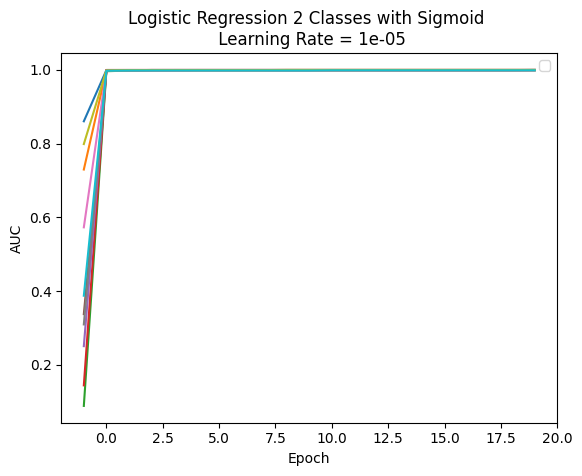

In [14]:
for i in range(10):
    plt.plot(np.arange(-1, n_epochs), aucs[i])
plt.title("Logistic Regression 2 Classes with Sigmoid \n Learning Rate = " + str(learning_rate))
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()

In [39]:
# SOFTMAX 2 CLASSES RATIO

learning_rate = 0.01

aucs = []
for i in range(10):
    model_aucs = []
    network = models.SoftmaxLogisticRegression(NUM_CLASSES_REDUCED)
    optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)
    _, auc = metric_utils.auc_softmax(test_loader_reduced, network) 
    model_aucs.append(auc)
    for epoch in range(n_epochs):
        _, _ = train.train_softmax(epoch, train_loader_reduced_ratio, network, optimizer, f'{FOLDERNAME}/softmax_results/reduced_ratio{i}/model{epoch}')
        _, auc = metric_utils.auc_softmax(test_loader_reduced, network)
        model_aucs.append(auc)
    aucs.append(model_aucs)
    np.save(f'{FOLDERNAME}/softmax_results/reduced_ratio{i}/aucs', model_aucs)


Test set: Avg. loss: 0.025478993883784513, AUC: 0.5221457262520737

Train Epoch: 0 [0/11769 (0%)]	Loss: 25.968010
Train Epoch: 0 [640/11769 (5%)]	Loss: 260.774628
Train Epoch: 0 [1280/11769 (11%)]	Loss: 0.000000
Train Epoch: 0 [1920/11769 (16%)]	Loss: 198.940979
Train Epoch: 0 [2560/11769 (22%)]	Loss: 0.000000
Train Epoch: 0 [3200/11769 (27%)]	Loss: 224.461517
Train Epoch: 0 [3840/11769 (33%)]	Loss: 31.625593
Train Epoch: 0 [4480/11769 (38%)]	Loss: 49.218143
Train Epoch: 0 [5120/11769 (43%)]	Loss: 137.298187
Train Epoch: 0 [5760/11769 (49%)]	Loss: 0.000000
Train Epoch: 0 [6400/11769 (54%)]	Loss: 89.951035
Train Epoch: 0 [7040/11769 (60%)]	Loss: 0.000000
Train Epoch: 0 [7680/11769 (65%)]	Loss: 65.523987
Train Epoch: 0 [8320/11769 (71%)]	Loss: 0.000000
Train Epoch: 0 [8960/11769 (76%)]	Loss: 80.084610
Train Epoch: 0 [9600/11769 (82%)]	Loss: 18.276176
Train Epoch: 0 [10240/11769 (87%)]	Loss: 76.939636
Train Epoch: 0 [10880/11769 (92%)]	Loss: 0.000000
Train Epoch: 0 [11520/11769 (98%)]	Lo


Test set: Avg. loss: 0.03784574731783344, AUC: 0.9864472099214224

Train Epoch: 9 [0/11769 (0%)]	Loss: 0.000000
Train Epoch: 9 [640/11769 (5%)]	Loss: 57.766510
Train Epoch: 9 [1280/11769 (11%)]	Loss: 57.807281
Train Epoch: 9 [1920/11769 (16%)]	Loss: 16.610270
Train Epoch: 9 [2560/11769 (22%)]	Loss: 0.000000
Train Epoch: 9 [3200/11769 (27%)]	Loss: 18.018967
Train Epoch: 9 [3840/11769 (33%)]	Loss: 35.816639
Train Epoch: 9 [4480/11769 (38%)]	Loss: 0.000000
Train Epoch: 9 [5120/11769 (43%)]	Loss: 147.515594
Train Epoch: 9 [5760/11769 (49%)]	Loss: 0.000000
Train Epoch: 9 [6400/11769 (54%)]	Loss: 0.000000
Train Epoch: 9 [7040/11769 (60%)]	Loss: 0.000000
Train Epoch: 9 [7680/11769 (65%)]	Loss: 14.611192
Train Epoch: 9 [8320/11769 (71%)]	Loss: 40.311134
Train Epoch: 9 [8960/11769 (76%)]	Loss: 14.195389
Train Epoch: 9 [9600/11769 (82%)]	Loss: 0.000000
Train Epoch: 9 [10240/11769 (87%)]	Loss: 4.889764
Train Epoch: 9 [10880/11769 (92%)]	Loss: 0.000000
Train Epoch: 9 [11520/11769 (98%)]	Loss: 0.0

Train Epoch: 17 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.029156683888247787, AUC: 0.9896730440299564

Train Epoch: 18 [0/11769 (0%)]	Loss: 0.000000
Train Epoch: 18 [640/11769 (5%)]	Loss: 25.179262
Train Epoch: 18 [1280/11769 (11%)]	Loss: 0.000000
Train Epoch: 18 [1920/11769 (16%)]	Loss: 0.000000
Train Epoch: 18 [2560/11769 (22%)]	Loss: 0.000000
Train Epoch: 18 [3200/11769 (27%)]	Loss: 17.484158
Train Epoch: 18 [3840/11769 (33%)]	Loss: 23.943163
Train Epoch: 18 [4480/11769 (38%)]	Loss: 0.000000
Train Epoch: 18 [5120/11769 (43%)]	Loss: 61.399792
Train Epoch: 18 [5760/11769 (49%)]	Loss: 1.195099
Train Epoch: 18 [6400/11769 (54%)]	Loss: 0.000000
Train Epoch: 18 [7040/11769 (60%)]	Loss: 0.000000
Train Epoch: 18 [7680/11769 (65%)]	Loss: 29.611258
Train Epoch: 18 [8320/11769 (71%)]	Loss: 18.871832
Train Epoch: 18 [8960/11769 (76%)]	Loss: 15.098868
Train Epoch: 18 [9600/11769 (82%)]	Loss: 0.000000
Train Epoch: 18 [10240/11769 (87%)]	Loss: 0.000000
Train Epoch: 18 [10880/11769

Train Epoch: 6 [7680/11769 (65%)]	Loss: 69.255653
Train Epoch: 6 [8320/11769 (71%)]	Loss: 39.502754
Train Epoch: 6 [8960/11769 (76%)]	Loss: 29.530972
Train Epoch: 6 [9600/11769 (82%)]	Loss: 10.403588
Train Epoch: 6 [10240/11769 (87%)]	Loss: 42.345436
Train Epoch: 6 [10880/11769 (92%)]	Loss: 0.000000
Train Epoch: 6 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.02737932817289301, AUC: 0.9906911644296595

Train Epoch: 7 [0/11769 (0%)]	Loss: 0.000000
Train Epoch: 7 [640/11769 (5%)]	Loss: 44.056625
Train Epoch: 7 [1280/11769 (11%)]	Loss: 13.769156
Train Epoch: 7 [1920/11769 (16%)]	Loss: 22.306164
Train Epoch: 7 [2560/11769 (22%)]	Loss: 0.000000
Train Epoch: 7 [3200/11769 (27%)]	Loss: 74.218102
Train Epoch: 7 [3840/11769 (33%)]	Loss: 76.162819
Train Epoch: 7 [4480/11769 (38%)]	Loss: 0.000000
Train Epoch: 7 [5120/11769 (43%)]	Loss: 63.900883
Train Epoch: 7 [5760/11769 (49%)]	Loss: 0.000000
Train Epoch: 7 [6400/11769 (54%)]	Loss: 0.000000
Train Epoch: 7 [7040/11769 (60%)]	Loss: 0.

Train Epoch: 15 [7680/11769 (65%)]	Loss: 1.392683
Train Epoch: 15 [8320/11769 (71%)]	Loss: 11.000424
Train Epoch: 15 [8960/11769 (76%)]	Loss: 0.000000
Train Epoch: 15 [9600/11769 (82%)]	Loss: 0.000000
Train Epoch: 15 [10240/11769 (87%)]	Loss: 0.000000
Train Epoch: 15 [10880/11769 (92%)]	Loss: 0.000000
Train Epoch: 15 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.03129085003712656, AUC: 0.9876282295850785

Train Epoch: 16 [0/11769 (0%)]	Loss: 0.000000
Train Epoch: 16 [640/11769 (5%)]	Loss: 11.458727
Train Epoch: 16 [1280/11769 (11%)]	Loss: 2.353765
Train Epoch: 16 [1920/11769 (16%)]	Loss: 1.378420
Train Epoch: 16 [2560/11769 (22%)]	Loss: 0.000000
Train Epoch: 16 [3200/11769 (27%)]	Loss: 51.690483
Train Epoch: 16 [3840/11769 (33%)]	Loss: 33.716690
Train Epoch: 16 [4480/11769 (38%)]	Loss: 0.000000
Train Epoch: 16 [5120/11769 (43%)]	Loss: 72.056442
Train Epoch: 16 [5760/11769 (49%)]	Loss: 0.000000
Train Epoch: 16 [6400/11769 (54%)]	Loss: 0.000000
Train Epoch: 16 [7040/11769 (6

Train Epoch: 4 [3200/11769 (27%)]	Loss: 82.258499
Train Epoch: 4 [3840/11769 (33%)]	Loss: 43.128090
Train Epoch: 4 [4480/11769 (38%)]	Loss: 0.000000
Train Epoch: 4 [5120/11769 (43%)]	Loss: 138.723068
Train Epoch: 4 [5760/11769 (49%)]	Loss: 24.534843
Train Epoch: 4 [6400/11769 (54%)]	Loss: 0.000000
Train Epoch: 4 [7040/11769 (60%)]	Loss: 0.000000
Train Epoch: 4 [7680/11769 (65%)]	Loss: 45.132103
Train Epoch: 4 [8320/11769 (71%)]	Loss: 47.028778
Train Epoch: 4 [8960/11769 (76%)]	Loss: 1.002629
Train Epoch: 4 [9600/11769 (82%)]	Loss: 0.000000
Train Epoch: 4 [10240/11769 (87%)]	Loss: 0.000000
Train Epoch: 4 [10880/11769 (92%)]	Loss: 0.000000
Train Epoch: 4 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.06216966242030047, AUC: 0.9702590955661392

Train Epoch: 5 [0/11769 (0%)]	Loss: 2.975122
Train Epoch: 5 [640/11769 (5%)]	Loss: 66.068153
Train Epoch: 5 [1280/11769 (11%)]	Loss: 14.838264
Train Epoch: 5 [1920/11769 (16%)]	Loss: 83.458290
Train Epoch: 5 [2560/11769 (22%)]	Loss: 0.0

Train Epoch: 13 [1280/11769 (11%)]	Loss: 0.000000
Train Epoch: 13 [1920/11769 (16%)]	Loss: 8.095853
Train Epoch: 13 [2560/11769 (22%)]	Loss: 0.000000
Train Epoch: 13 [3200/11769 (27%)]	Loss: 83.023758
Train Epoch: 13 [3840/11769 (33%)]	Loss: 25.162506
Train Epoch: 13 [4480/11769 (38%)]	Loss: 0.000000
Train Epoch: 13 [5120/11769 (43%)]	Loss: 77.173447
Train Epoch: 13 [5760/11769 (49%)]	Loss: 14.099213
Train Epoch: 13 [6400/11769 (54%)]	Loss: 0.000000
Train Epoch: 13 [7040/11769 (60%)]	Loss: 0.000000
Train Epoch: 13 [7680/11769 (65%)]	Loss: 14.039543
Train Epoch: 13 [8320/11769 (71%)]	Loss: 0.000000
Train Epoch: 13 [8960/11769 (76%)]	Loss: 27.613628
Train Epoch: 13 [9600/11769 (82%)]	Loss: 50.441582
Train Epoch: 13 [10240/11769 (87%)]	Loss: 0.000000
Train Epoch: 13 [10880/11769 (92%)]	Loss: 0.000000
Train Epoch: 13 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.027336863010319616, AUC: 0.9896644703844851

Train Epoch: 14 [0/11769 (0%)]	Loss: 0.000000
Train Epoch: 14 [640/1176


Test set: Avg. loss: 0.06289244191740363, AUC: 0.9676494922258468

Train Epoch: 2 [0/11769 (0%)]	Loss: 0.000000
Train Epoch: 2 [640/11769 (5%)]	Loss: 69.952309
Train Epoch: 2 [1280/11769 (11%)]	Loss: 0.000000
Train Epoch: 2 [1920/11769 (16%)]	Loss: 74.896515
Train Epoch: 2 [2560/11769 (22%)]	Loss: 0.000000
Train Epoch: 2 [3200/11769 (27%)]	Loss: 64.678886
Train Epoch: 2 [3840/11769 (33%)]	Loss: 73.339958
Train Epoch: 2 [4480/11769 (38%)]	Loss: 0.000000
Train Epoch: 2 [5120/11769 (43%)]	Loss: 108.677338
Train Epoch: 2 [5760/11769 (49%)]	Loss: 10.069032
Train Epoch: 2 [6400/11769 (54%)]	Loss: 0.000000
Train Epoch: 2 [7040/11769 (60%)]	Loss: 0.000000
Train Epoch: 2 [7680/11769 (65%)]	Loss: 72.516800
Train Epoch: 2 [8320/11769 (71%)]	Loss: 0.000000
Train Epoch: 2 [8960/11769 (76%)]	Loss: 34.795795
Train Epoch: 2 [9600/11769 (82%)]	Loss: 0.000000
Train Epoch: 2 [10240/11769 (87%)]	Loss: 5.691931
Train Epoch: 2 [10880/11769 (92%)]	Loss: 28.714441
Train Epoch: 2 [11520/11769 (98%)]	Loss: 0.0

Train Epoch: 11 [2560/11769 (22%)]	Loss: 0.000000
Train Epoch: 11 [3200/11769 (27%)]	Loss: 66.701981
Train Epoch: 11 [3840/11769 (33%)]	Loss: 21.912064
Train Epoch: 11 [4480/11769 (38%)]	Loss: 0.000000
Train Epoch: 11 [5120/11769 (43%)]	Loss: 78.547333
Train Epoch: 11 [5760/11769 (49%)]	Loss: 20.003448
Train Epoch: 11 [6400/11769 (54%)]	Loss: 0.000000
Train Epoch: 11 [7040/11769 (60%)]	Loss: 0.000000
Train Epoch: 11 [7680/11769 (65%)]	Loss: 0.000000
Train Epoch: 11 [8320/11769 (71%)]	Loss: 0.000000
Train Epoch: 11 [8960/11769 (76%)]	Loss: 2.497228
Train Epoch: 11 [9600/11769 (82%)]	Loss: 0.000000
Train Epoch: 11 [10240/11769 (87%)]	Loss: 0.000000
Train Epoch: 11 [10880/11769 (92%)]	Loss: 0.000000
Train Epoch: 11 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.027206157305225822, AUC: 0.9901778174070724

Train Epoch: 12 [0/11769 (0%)]	Loss: 0.000000
Train Epoch: 12 [640/11769 (5%)]	Loss: 0.000000
Train Epoch: 12 [1280/11769 (11%)]	Loss: 0.000000
Train Epoch: 12 [1920/11769 (1

Train Epoch: 0 [5760/11769 (49%)]	Loss: 0.000000
Train Epoch: 0 [6400/11769 (54%)]	Loss: 60.140350
Train Epoch: 0 [7040/11769 (60%)]	Loss: 0.000000
Train Epoch: 0 [7680/11769 (65%)]	Loss: 90.418442
Train Epoch: 0 [8320/11769 (71%)]	Loss: 0.000000
Train Epoch: 0 [8960/11769 (76%)]	Loss: 88.494049
Train Epoch: 0 [9600/11769 (82%)]	Loss: 33.952812
Train Epoch: 0 [10240/11769 (87%)]	Loss: 29.181768
Train Epoch: 0 [10880/11769 (92%)]	Loss: 4.162059
Train Epoch: 0 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.0677647452423538, AUC: 0.9702590955661392

Train Epoch: 1 [0/11769 (0%)]	Loss: 5.975793
Train Epoch: 1 [640/11769 (5%)]	Loss: 105.786575
Train Epoch: 1 [1280/11769 (11%)]	Loss: 0.000000
Train Epoch: 1 [1920/11769 (16%)]	Loss: 156.872757
Train Epoch: 1 [2560/11769 (22%)]	Loss: 0.000000
Train Epoch: 1 [3200/11769 (27%)]	Loss: 117.961685
Train Epoch: 1 [3840/11769 (33%)]	Loss: 72.179512
Train Epoch: 1 [4480/11769 (38%)]	Loss: 0.000000
Train Epoch: 1 [5120/11769 (43%)]	Loss: 12

Train Epoch: 9 [3840/11769 (33%)]	Loss: 50.843826
Train Epoch: 9 [4480/11769 (38%)]	Loss: 0.000000
Train Epoch: 9 [5120/11769 (43%)]	Loss: 89.922005
Train Epoch: 9 [5760/11769 (49%)]	Loss: 0.000000
Train Epoch: 9 [6400/11769 (54%)]	Loss: 2.890764
Train Epoch: 9 [7040/11769 (60%)]	Loss: 0.000000
Train Epoch: 9 [7680/11769 (65%)]	Loss: 28.773962
Train Epoch: 9 [8320/11769 (71%)]	Loss: 10.060526
Train Epoch: 9 [8960/11769 (76%)]	Loss: 0.000000
Train Epoch: 9 [9600/11769 (82%)]	Loss: 24.738537
Train Epoch: 9 [10240/11769 (87%)]	Loss: 0.000000
Train Epoch: 9 [10880/11769 (92%)]	Loss: 8.518134
Train Epoch: 9 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.03083109806289831, AUC: 0.9901863910525436

Train Epoch: 10 [0/11769 (0%)]	Loss: 0.000000
Train Epoch: 10 [640/11769 (5%)]	Loss: 54.247112
Train Epoch: 10 [1280/11769 (11%)]	Loss: 0.000000
Train Epoch: 10 [1920/11769 (16%)]	Loss: 0.000000
Train Epoch: 10 [2560/11769 (22%)]	Loss: 0.000000
Train Epoch: 10 [3200/11769 (27%)]	Loss: 7

Train Epoch: 18 [8960/11769 (76%)]	Loss: 22.498726
Train Epoch: 18 [9600/11769 (82%)]	Loss: 0.000000
Train Epoch: 18 [10240/11769 (87%)]	Loss: 0.000000
Train Epoch: 18 [10880/11769 (92%)]	Loss: 0.000000
Train Epoch: 18 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.029045979181925457, AUC: 0.9880386928620115

Train Epoch: 19 [0/11769 (0%)]	Loss: 0.000000
Train Epoch: 19 [640/11769 (5%)]	Loss: 54.217159
Train Epoch: 19 [1280/11769 (11%)]	Loss: 4.528282
Train Epoch: 19 [1920/11769 (16%)]	Loss: 2.711624
Train Epoch: 19 [2560/11769 (22%)]	Loss: 0.000000
Train Epoch: 19 [3200/11769 (27%)]	Loss: 44.809402
Train Epoch: 19 [3840/11769 (33%)]	Loss: 23.482620
Train Epoch: 19 [4480/11769 (38%)]	Loss: 0.000000
Train Epoch: 19 [5120/11769 (43%)]	Loss: 36.740250
Train Epoch: 19 [5760/11769 (49%)]	Loss: 0.000000
Train Epoch: 19 [6400/11769 (54%)]	Loss: 0.000000
Train Epoch: 19 [7040/11769 (60%)]	Loss: 0.000000
Train Epoch: 19 [7680/11769 (65%)]	Loss: 0.243365
Train Epoch: 19 [8320/11769 (

Train Epoch: 7 [8960/11769 (76%)]	Loss: 26.873095
Train Epoch: 7 [9600/11769 (82%)]	Loss: 0.000000
Train Epoch: 7 [10240/11769 (87%)]	Loss: 0.000000
Train Epoch: 7 [10880/11769 (92%)]	Loss: 0.000000
Train Epoch: 7 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.029919393314337878, AUC: 0.9922226318519501

Train Epoch: 8 [0/11769 (0%)]	Loss: 0.000000
Train Epoch: 8 [640/11769 (5%)]	Loss: 19.063644
Train Epoch: 8 [1280/11769 (11%)]	Loss: 4.867657
Train Epoch: 8 [1920/11769 (16%)]	Loss: 37.565300
Train Epoch: 8 [2560/11769 (22%)]	Loss: 0.000000
Train Epoch: 8 [3200/11769 (27%)]	Loss: 56.780640
Train Epoch: 8 [3840/11769 (33%)]	Loss: 29.399372
Train Epoch: 8 [4480/11769 (38%)]	Loss: 0.000000
Train Epoch: 8 [5120/11769 (43%)]	Loss: 112.103622
Train Epoch: 8 [5760/11769 (49%)]	Loss: 22.415920
Train Epoch: 8 [6400/11769 (54%)]	Loss: 0.000000
Train Epoch: 8 [7040/11769 (60%)]	Loss: 0.000000
Train Epoch: 8 [7680/11769 (65%)]	Loss: 7.445803
Train Epoch: 8 [8320/11769 (71%)]	Loss: 1.33

Train Epoch: 16 [8320/11769 (71%)]	Loss: 4.815019
Train Epoch: 16 [8960/11769 (76%)]	Loss: 18.018444
Train Epoch: 16 [9600/11769 (82%)]	Loss: 9.439825
Train Epoch: 16 [10240/11769 (87%)]	Loss: 0.000000
Train Epoch: 16 [10880/11769 (92%)]	Loss: 0.000000
Train Epoch: 16 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.024620017649964517, AUC: 0.9906997380751308

Train Epoch: 17 [0/11769 (0%)]	Loss: 0.000000
Train Epoch: 17 [640/11769 (5%)]	Loss: 44.941833
Train Epoch: 17 [1280/11769 (11%)]	Loss: 0.000000
Train Epoch: 17 [1920/11769 (16%)]	Loss: 11.653801
Train Epoch: 17 [2560/11769 (22%)]	Loss: 0.000000
Train Epoch: 17 [3200/11769 (27%)]	Loss: 19.524841
Train Epoch: 17 [3840/11769 (33%)]	Loss: 15.077803
Train Epoch: 17 [4480/11769 (38%)]	Loss: 0.000000
Train Epoch: 17 [5120/11769 (43%)]	Loss: 62.353191
Train Epoch: 17 [5760/11769 (49%)]	Loss: 0.000000
Train Epoch: 17 [6400/11769 (54%)]	Loss: 6.342168
Train Epoch: 17 [7040/11769 (60%)]	Loss: 0.000000
Train Epoch: 17 [7680/11769 

Train Epoch: 5 [7680/11769 (65%)]	Loss: 20.445232
Train Epoch: 5 [8320/11769 (71%)]	Loss: 24.310978
Train Epoch: 5 [8960/11769 (76%)]	Loss: 43.179470
Train Epoch: 5 [9600/11769 (82%)]	Loss: 13.424629
Train Epoch: 5 [10240/11769 (87%)]	Loss: 0.000000
Train Epoch: 5 [10880/11769 (92%)]	Loss: 4.031893
Train Epoch: 5 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.054268903120210696, AUC: 0.9728686989064315

Train Epoch: 6 [0/11769 (0%)]	Loss: 2.754110
Train Epoch: 6 [640/11769 (5%)]	Loss: 54.525864
Train Epoch: 6 [1280/11769 (11%)]	Loss: 0.000000
Train Epoch: 6 [1920/11769 (16%)]	Loss: 57.031246
Train Epoch: 6 [2560/11769 (22%)]	Loss: 0.000000
Train Epoch: 6 [3200/11769 (27%)]	Loss: 77.055176
Train Epoch: 6 [3840/11769 (33%)]	Loss: 47.219894
Train Epoch: 6 [4480/11769 (38%)]	Loss: 0.000000
Train Epoch: 6 [5120/11769 (43%)]	Loss: 104.887276
Train Epoch: 6 [5760/11769 (49%)]	Loss: 0.000000
Train Epoch: 6 [6400/11769 (54%)]	Loss: 0.000000
Train Epoch: 6 [7040/11769 (60%)]	Loss: 0.

Train Epoch: 14 [1920/11769 (16%)]	Loss: 0.000000
Train Epoch: 14 [2560/11769 (22%)]	Loss: 0.000000
Train Epoch: 14 [3200/11769 (27%)]	Loss: 17.348545
Train Epoch: 14 [3840/11769 (33%)]	Loss: 7.833214
Train Epoch: 14 [4480/11769 (38%)]	Loss: 0.000000
Train Epoch: 14 [5120/11769 (43%)]	Loss: 53.915604
Train Epoch: 14 [5760/11769 (49%)]	Loss: 0.000000
Train Epoch: 14 [6400/11769 (54%)]	Loss: 11.377028
Train Epoch: 14 [7040/11769 (60%)]	Loss: 0.000000
Train Epoch: 14 [7680/11769 (65%)]	Loss: 8.027610
Train Epoch: 14 [8320/11769 (71%)]	Loss: 35.295643
Train Epoch: 14 [8960/11769 (76%)]	Loss: 32.332253
Train Epoch: 14 [9600/11769 (82%)]	Loss: 0.000000
Train Epoch: 14 [10240/11769 (87%)]	Loss: 0.000000
Train Epoch: 14 [10880/11769 (92%)]	Loss: 0.000000
Train Epoch: 14 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.028723412665767944, AUC: 0.9869862778804234

Train Epoch: 15 [0/11769 (0%)]	Loss: 0.000000
Train Epoch: 15 [640/11769 (5%)]	Loss: 30.130653
Train Epoch: 15 [1280/11769 

Train Epoch: 3 [1920/11769 (16%)]	Loss: 99.382187
Train Epoch: 3 [2560/11769 (22%)]	Loss: 0.000000
Train Epoch: 3 [3200/11769 (27%)]	Loss: 78.612488
Train Epoch: 3 [3840/11769 (33%)]	Loss: 90.946854
Train Epoch: 3 [4480/11769 (38%)]	Loss: 0.000000
Train Epoch: 3 [5120/11769 (43%)]	Loss: 208.602158
Train Epoch: 3 [5760/11769 (49%)]	Loss: 4.848192
Train Epoch: 3 [6400/11769 (54%)]	Loss: 0.000000
Train Epoch: 3 [7040/11769 (60%)]	Loss: 2.759324
Train Epoch: 3 [7680/11769 (65%)]	Loss: 62.467072
Train Epoch: 3 [8320/11769 (71%)]	Loss: 42.121674
Train Epoch: 3 [8960/11769 (76%)]	Loss: 12.400891
Train Epoch: 3 [9600/11769 (82%)]	Loss: 0.000000
Train Epoch: 3 [10240/11769 (87%)]	Loss: 40.145981
Train Epoch: 3 [10880/11769 (92%)]	Loss: 0.000000
Train Epoch: 3 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.03210147912951483, AUC: 0.9875510667758377

Train Epoch: 4 [0/11769 (0%)]	Loss: 0.000000
Train Epoch: 4 [640/11769 (5%)]	Loss: 50.231453
Train Epoch: 4 [1280/11769 (11%)]	Loss: 0.0

Train Epoch: 12 [3200/11769 (27%)]	Loss: 10.123163
Train Epoch: 12 [3840/11769 (33%)]	Loss: 25.970219
Train Epoch: 12 [4480/11769 (38%)]	Loss: 0.000000
Train Epoch: 12 [5120/11769 (43%)]	Loss: 79.985352
Train Epoch: 12 [5760/11769 (49%)]	Loss: 10.955863
Train Epoch: 12 [6400/11769 (54%)]	Loss: 16.167358
Train Epoch: 12 [7040/11769 (60%)]	Loss: 0.000000
Train Epoch: 12 [7680/11769 (65%)]	Loss: 7.665472
Train Epoch: 12 [8320/11769 (71%)]	Loss: 8.550629
Train Epoch: 12 [8960/11769 (76%)]	Loss: 25.796112
Train Epoch: 12 [9600/11769 (82%)]	Loss: 0.000000
Train Epoch: 12 [10240/11769 (87%)]	Loss: 0.000000
Train Epoch: 12 [10880/11769 (92%)]	Loss: 0.000000
Train Epoch: 12 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.024798394236752213, AUC: 0.9896644703844851

Train Epoch: 13 [0/11769 (0%)]	Loss: 0.000000
Train Epoch: 13 [640/11769 (5%)]	Loss: 15.728851
Train Epoch: 13 [1280/11769 (11%)]	Loss: 11.769369
Train Epoch: 13 [1920/11769 (16%)]	Loss: 12.328224
Train Epoch: 13 [2560/117

Train Epoch: 1 [8320/11769 (71%)]	Loss: 6.474329
Train Epoch: 1 [8960/11769 (76%)]	Loss: 46.567337
Train Epoch: 1 [9600/11769 (82%)]	Loss: 0.000000
Train Epoch: 1 [10240/11769 (87%)]	Loss: 12.573530
Train Epoch: 1 [10880/11769 (92%)]	Loss: 4.266821
Train Epoch: 1 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.04519131662435907, AUC: 0.9807146562182507

Train Epoch: 2 [0/11769 (0%)]	Loss: 0.000000
Train Epoch: 2 [640/11769 (5%)]	Loss: 110.218063
Train Epoch: 2 [1280/11769 (11%)]	Loss: 25.539997
Train Epoch: 2 [1920/11769 (16%)]	Loss: 78.680832
Train Epoch: 2 [2560/11769 (22%)]	Loss: 0.000000
Train Epoch: 2 [3200/11769 (27%)]	Loss: 65.412560
Train Epoch: 2 [3840/11769 (33%)]	Loss: 71.459442
Train Epoch: 2 [4480/11769 (38%)]	Loss: 0.000000
Train Epoch: 2 [5120/11769 (43%)]	Loss: 103.697586
Train Epoch: 2 [5760/11769 (49%)]	Loss: 29.745569
Train Epoch: 2 [6400/11769 (54%)]	Loss: 0.000000
Train Epoch: 2 [7040/11769 (60%)]	Loss: 0.000000
Train Epoch: 2 [7680/11769 (65%)]	Loss: 65

Train Epoch: 10 [7680/11769 (65%)]	Loss: 23.868603
Train Epoch: 10 [8320/11769 (71%)]	Loss: 31.798717
Train Epoch: 10 [8960/11769 (76%)]	Loss: 0.000000
Train Epoch: 10 [9600/11769 (82%)]	Loss: 0.460948
Train Epoch: 10 [10240/11769 (87%)]	Loss: 0.000000
Train Epoch: 10 [10880/11769 (92%)]	Loss: 4.479139
Train Epoch: 10 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.03658154687032443, AUC: 0.9848728742717759

Train Epoch: 11 [0/11769 (0%)]	Loss: 2.643864
Train Epoch: 11 [640/11769 (5%)]	Loss: 32.370399
Train Epoch: 11 [1280/11769 (11%)]	Loss: 1.633171
Train Epoch: 11 [1920/11769 (16%)]	Loss: 2.528409
Train Epoch: 11 [2560/11769 (22%)]	Loss: 0.000000
Train Epoch: 11 [3200/11769 (27%)]	Loss: 94.018646
Train Epoch: 11 [3840/11769 (33%)]	Loss: 49.983788
Train Epoch: 11 [4480/11769 (38%)]	Loss: 0.000000
Train Epoch: 11 [5120/11769 (43%)]	Loss: 64.211411
Train Epoch: 11 [5760/11769 (49%)]	Loss: 7.199081
Train Epoch: 11 [6400/11769 (54%)]	Loss: 15.179497
Train Epoch: 11 [7040/11769 

Train Epoch: 19 [1920/11769 (16%)]	Loss: 43.266811
Train Epoch: 19 [2560/11769 (22%)]	Loss: 0.000000
Train Epoch: 19 [3200/11769 (27%)]	Loss: 0.000000
Train Epoch: 19 [3840/11769 (33%)]	Loss: 16.050123
Train Epoch: 19 [4480/11769 (38%)]	Loss: 0.000000
Train Epoch: 19 [5120/11769 (43%)]	Loss: 60.881039
Train Epoch: 19 [5760/11769 (49%)]	Loss: 0.000000
Train Epoch: 19 [6400/11769 (54%)]	Loss: 0.000000
Train Epoch: 19 [7040/11769 (60%)]	Loss: 0.000000
Train Epoch: 19 [7680/11769 (65%)]	Loss: 0.000000
Train Epoch: 19 [8320/11769 (71%)]	Loss: 3.127587
Train Epoch: 19 [8960/11769 (76%)]	Loss: 0.000000
Train Epoch: 19 [9600/11769 (82%)]	Loss: 0.000000
Train Epoch: 19 [10240/11769 (87%)]	Loss: 0.000000
Train Epoch: 19 [10880/11769 (92%)]	Loss: 0.000000
Train Epoch: 19 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.027108971870217016, AUC: 0.9875253458394242


Test set: Avg. loss: 0.04139430478492879, AUC: 0.4375142001003116

Train Epoch: 0 [0/11769 (0%)]	Loss: 27.485346
Train Epoch

Train Epoch: 8 [640/11769 (5%)]	Loss: 5.195057
Train Epoch: 8 [1280/11769 (11%)]	Loss: 11.945915
Train Epoch: 8 [1920/11769 (16%)]	Loss: 15.599474
Train Epoch: 8 [2560/11769 (22%)]	Loss: 7.920140
Train Epoch: 8 [3200/11769 (27%)]	Loss: 58.677700
Train Epoch: 8 [3840/11769 (33%)]	Loss: 45.945351
Train Epoch: 8 [4480/11769 (38%)]	Loss: 0.000000
Train Epoch: 8 [5120/11769 (43%)]	Loss: 139.225464
Train Epoch: 8 [5760/11769 (49%)]	Loss: 10.525585
Train Epoch: 8 [6400/11769 (54%)]	Loss: 0.000000
Train Epoch: 8 [7040/11769 (60%)]	Loss: 0.000000
Train Epoch: 8 [7680/11769 (65%)]	Loss: 0.000000
Train Epoch: 8 [8320/11769 (71%)]	Loss: 13.069405
Train Epoch: 8 [8960/11769 (76%)]	Loss: 16.097038
Train Epoch: 8 [9600/11769 (82%)]	Loss: 3.206610
Train Epoch: 8 [10240/11769 (87%)]	Loss: 0.000000
Train Epoch: 8 [10880/11769 (92%)]	Loss: 0.000000
Train Epoch: 8 [11520/11769 (98%)]	Loss: 0.000000

Test set: Avg. loss: 0.027278660247044534, AUC: 0.9896130285116579

Train Epoch: 9 [0/11769 (0%)]	Loss: 0.0


Test set: Avg. loss: 0.0239341846410779, AUC: 0.9901435228251876

Train Epoch: 17 [0/11769 (0%)]	Loss: 0.000000
Train Epoch: 17 [640/11769 (5%)]	Loss: 51.473370
Train Epoch: 17 [1280/11769 (11%)]	Loss: 6.405732
Train Epoch: 17 [1920/11769 (16%)]	Loss: 15.115616
Train Epoch: 17 [2560/11769 (22%)]	Loss: 0.000000
Train Epoch: 17 [3200/11769 (27%)]	Loss: 13.203485
Train Epoch: 17 [3840/11769 (33%)]	Loss: 3.301392
Train Epoch: 17 [4480/11769 (38%)]	Loss: 0.000000
Train Epoch: 17 [5120/11769 (43%)]	Loss: 35.043076
Train Epoch: 17 [5760/11769 (49%)]	Loss: 0.000000
Train Epoch: 17 [6400/11769 (54%)]	Loss: 0.000000
Train Epoch: 17 [7040/11769 (60%)]	Loss: 0.000000
Train Epoch: 17 [7680/11769 (65%)]	Loss: 0.000000
Train Epoch: 17 [8320/11769 (71%)]	Loss: 0.000000
Train Epoch: 17 [8960/11769 (76%)]	Loss: 2.706277
Train Epoch: 17 [9600/11769 (82%)]	Loss: 0.000000
Train Epoch: 17 [10240/11769 (87%)]	Loss: 0.000000
Train Epoch: 17 [10880/11769 (92%)]	Loss: 0.000000
Train Epoch: 17 [11520/11769 (98%

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


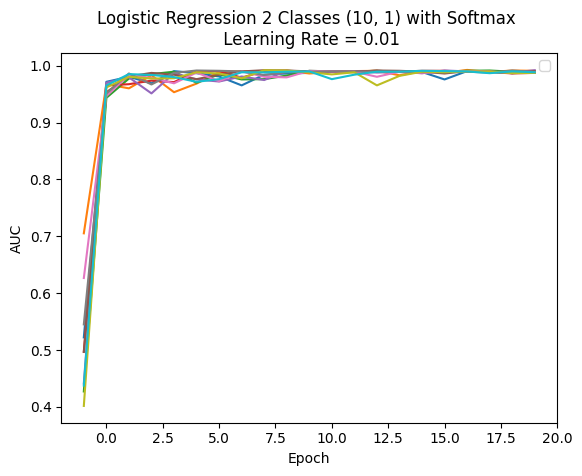

In [40]:
for i in range(10):
    plt.plot(np.arange(-1, n_epochs), aucs[i])
plt.title("Logistic Regression 2 Classes " + str(ratio) + " with Softmax \n Learning Rate = " + str(learning_rate))
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()

In [47]:
# SIGMOID 2 CLASSES RATIO - Retrain w/ (0,1)

aucs = []
for i in range(10):
    model_aucs = []
    network = models.SigmoidLogisticRegression(NUM_CLASSES_REDUCED)
    optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)
    _, auc = metric_utils.auc_sigmoid(test_loader_reduced, network) 
    model_aucs.append(auc)
    for epoch in range(n_epochs):
        _, _ = train.train_sigmoid(epoch, train_loader_reduced_ratio, network, optimizer, f'{FOLDERNAME}/sigmoid_results/reduced_ratio{i}/model{epoch}')
        _, auc = metric_utils.auc_sigmoid(test_loader_reduced, network)
        model_aucs.append(auc)
    aucs.append(model_aucs)
    np.save(f'{FOLDERNAME}/sigmoid_results/reduced_ratio{i}/aucs', model_aucs)


Test set: Avg. loss: 0.029561371536728758, AUC: 0.5446772665503509

Train Epoch: 0 [0/6509 (0%)]	Loss: 56.938568
Train Epoch: 0 [640/6509 (10%)]	Loss: 0.000000
Train Epoch: 0 [1280/6509 (20%)]	Loss: 0.000000
Train Epoch: 0 [1920/6509 (29%)]	Loss: 0.000000
Train Epoch: 0 [2560/6509 (39%)]	Loss: 0.000000
Train Epoch: 0 [3200/6509 (49%)]	Loss: 0.000000
Train Epoch: 0 [3840/6509 (59%)]	Loss: 0.000000
Train Epoch: 0 [4480/6509 (69%)]	Loss: 0.000000
Train Epoch: 0 [5120/6509 (78%)]	Loss: 0.000000
Train Epoch: 0 [5760/6509 (88%)]	Loss: 0.000000
Train Epoch: 0 [6400/6509 (98%)]	Loss: 100.000000

Test set: Avg. loss: 0.05215125547926372, AUC: 0.5

Train Epoch: 1 [0/6509 (0%)]	Loss: 0.000000
Train Epoch: 1 [640/6509 (10%)]	Loss: 0.000000
Train Epoch: 1 [1280/6509 (20%)]	Loss: 0.000000
Train Epoch: 1 [1920/6509 (29%)]	Loss: 0.000000
Train Epoch: 1 [2560/6509 (39%)]	Loss: 0.000000
Train Epoch: 1 [3200/6509 (49%)]	Loss: 0.000000
Train Epoch: 1 [3840/6509 (59%)]	Loss: 0.000000
Train Epoch: 1 [4480/


Test set: Avg. loss: 0.05215125547926372, AUC: 0.5

Train Epoch: 15 [0/6509 (0%)]	Loss: 0.000000
Train Epoch: 15 [640/6509 (10%)]	Loss: 0.000000
Train Epoch: 15 [1280/6509 (20%)]	Loss: 0.000000
Train Epoch: 15 [1920/6509 (29%)]	Loss: 0.000000
Train Epoch: 15 [2560/6509 (39%)]	Loss: 0.000000
Train Epoch: 15 [3200/6509 (49%)]	Loss: 0.000000
Train Epoch: 15 [3840/6509 (59%)]	Loss: 0.000000
Train Epoch: 15 [4480/6509 (69%)]	Loss: 0.000000
Train Epoch: 15 [5120/6509 (78%)]	Loss: 0.000000
Train Epoch: 15 [5760/6509 (88%)]	Loss: 0.000000
Train Epoch: 15 [6400/6509 (98%)]	Loss: 100.000000

Test set: Avg. loss: 0.05215125547926372, AUC: 0.5

Train Epoch: 16 [0/6509 (0%)]	Loss: 0.000000
Train Epoch: 16 [640/6509 (10%)]	Loss: 0.000000
Train Epoch: 16 [1280/6509 (20%)]	Loss: 0.000000
Train Epoch: 16 [1920/6509 (29%)]	Loss: 0.000000
Train Epoch: 16 [2560/6509 (39%)]	Loss: 0.000000
Train Epoch: 16 [3200/6509 (49%)]	Loss: 0.000000
Train Epoch: 16 [3840/6509 (59%)]	Loss: 0.000000
Train Epoch: 16 [448

Train Epoch: 11 [640/6509 (10%)]	Loss: 0.000000
Train Epoch: 11 [1280/6509 (20%)]	Loss: 0.000000
Train Epoch: 11 [1920/6509 (29%)]	Loss: 0.000000
Train Epoch: 11 [2560/6509 (39%)]	Loss: 0.000000
Train Epoch: 11 [3200/6509 (49%)]	Loss: 0.000000
Train Epoch: 11 [3840/6509 (59%)]	Loss: 0.000000
Train Epoch: 11 [4480/6509 (69%)]	Loss: 0.000000
Train Epoch: 11 [5120/6509 (78%)]	Loss: 0.000000
Train Epoch: 11 [5760/6509 (88%)]	Loss: 0.000000
Train Epoch: 11 [6400/6509 (98%)]	Loss: 100.000000

Test set: Avg. loss: 0.05215125547926372, AUC: 0.5

Train Epoch: 12 [0/6509 (0%)]	Loss: 0.000000
Train Epoch: 12 [640/6509 (10%)]	Loss: 0.000000
Train Epoch: 12 [1280/6509 (20%)]	Loss: 0.000000
Train Epoch: 12 [1920/6509 (29%)]	Loss: 0.000000
Train Epoch: 12 [2560/6509 (39%)]	Loss: 0.000000
Train Epoch: 12 [3200/6509 (49%)]	Loss: 0.000000
Train Epoch: 12 [3840/6509 (59%)]	Loss: 0.000000
Train Epoch: 12 [4480/6509 (69%)]	Loss: 0.000000
Train Epoch: 12 [5120/6509 (78%)]	Loss: 0.000000
Train Epoch: 12 [576

Train Epoch: 5 [0/6509 (0%)]	Loss: 0.000000
Train Epoch: 5 [640/6509 (10%)]	Loss: 0.000000
Train Epoch: 5 [1280/6509 (20%)]	Loss: 0.000000
Train Epoch: 5 [1920/6509 (29%)]	Loss: 0.000000
Train Epoch: 5 [2560/6509 (39%)]	Loss: 0.000000
Train Epoch: 5 [3200/6509 (49%)]	Loss: 0.000000
Train Epoch: 5 [3840/6509 (59%)]	Loss: 0.000000
Train Epoch: 5 [4480/6509 (69%)]	Loss: 0.000000
Train Epoch: 5 [5120/6509 (78%)]	Loss: 0.000000
Train Epoch: 5 [5760/6509 (88%)]	Loss: 0.000000
Train Epoch: 5 [6400/6509 (98%)]	Loss: 100.000000

Test set: Avg. loss: 0.05215125547926372, AUC: 0.5

Train Epoch: 6 [0/6509 (0%)]	Loss: 0.000000
Train Epoch: 6 [640/6509 (10%)]	Loss: 0.000000
Train Epoch: 6 [1280/6509 (20%)]	Loss: 0.000000
Train Epoch: 6 [1920/6509 (29%)]	Loss: 0.000000
Train Epoch: 6 [2560/6509 (39%)]	Loss: 0.000000
Train Epoch: 6 [3200/6509 (49%)]	Loss: 0.000000
Train Epoch: 6 [3840/6509 (59%)]	Loss: 0.000000
Train Epoch: 6 [4480/6509 (69%)]	Loss: 0.000000
Train Epoch: 6 [5120/6509 (78%)]	Loss: 0.00

Train Epoch: 1 [2560/6509 (39%)]	Loss: 0.000000
Train Epoch: 1 [3200/6509 (49%)]	Loss: 0.000000
Train Epoch: 1 [3840/6509 (59%)]	Loss: 0.000000
Train Epoch: 1 [4480/6509 (69%)]	Loss: 0.000000
Train Epoch: 1 [5120/6509 (78%)]	Loss: 0.000000
Train Epoch: 1 [5760/6509 (88%)]	Loss: 0.000000
Train Epoch: 1 [6400/6509 (98%)]	Loss: 100.000000

Test set: Avg. loss: 0.05215125547926372, AUC: 0.5

Train Epoch: 2 [0/6509 (0%)]	Loss: 0.000000
Train Epoch: 2 [640/6509 (10%)]	Loss: 0.000000
Train Epoch: 2 [1280/6509 (20%)]	Loss: 0.000000
Train Epoch: 2 [1920/6509 (29%)]	Loss: 0.000000
Train Epoch: 2 [2560/6509 (39%)]	Loss: 0.000000
Train Epoch: 2 [3200/6509 (49%)]	Loss: 0.000000
Train Epoch: 2 [3840/6509 (59%)]	Loss: 0.000000
Train Epoch: 2 [4480/6509 (69%)]	Loss: 0.000000
Train Epoch: 2 [5120/6509 (78%)]	Loss: 0.000000
Train Epoch: 2 [5760/6509 (88%)]	Loss: 0.000000
Train Epoch: 2 [6400/6509 (98%)]	Loss: 100.000000

Test set: Avg. loss: 0.05215125547926372, AUC: 0.5

Train Epoch: 3 [0/6509 (0%)]	Lo


Test set: Avg. loss: 0.05215125547926372, AUC: 0.5

Train Epoch: 16 [0/6509 (0%)]	Loss: 0.000000
Train Epoch: 16 [640/6509 (10%)]	Loss: 0.000000
Train Epoch: 16 [1280/6509 (20%)]	Loss: 0.000000
Train Epoch: 16 [1920/6509 (29%)]	Loss: 0.000000
Train Epoch: 16 [2560/6509 (39%)]	Loss: 0.000000
Train Epoch: 16 [3200/6509 (49%)]	Loss: 0.000000
Train Epoch: 16 [3840/6509 (59%)]	Loss: 0.000000
Train Epoch: 16 [4480/6509 (69%)]	Loss: 0.000000
Train Epoch: 16 [5120/6509 (78%)]	Loss: 0.000000
Train Epoch: 16 [5760/6509 (88%)]	Loss: 0.000000
Train Epoch: 16 [6400/6509 (98%)]	Loss: 100.000000

Test set: Avg. loss: 0.05215125547926372, AUC: 0.5

Train Epoch: 17 [0/6509 (0%)]	Loss: 0.000000
Train Epoch: 17 [640/6509 (10%)]	Loss: 0.000000
Train Epoch: 17 [1280/6509 (20%)]	Loss: 0.000000
Train Epoch: 17 [1920/6509 (29%)]	Loss: 0.000000
Train Epoch: 17 [2560/6509 (39%)]	Loss: 0.000000
Train Epoch: 17 [3200/6509 (49%)]	Loss: 0.000000
Train Epoch: 17 [3840/6509 (59%)]	Loss: 0.000000
Train Epoch: 17 [448


Test set: Avg. loss: 0.05215125547926372, AUC: 0.5

Train Epoch: 10 [0/6509 (0%)]	Loss: 0.000000
Train Epoch: 10 [640/6509 (10%)]	Loss: 0.000000
Train Epoch: 10 [1280/6509 (20%)]	Loss: 0.000000
Train Epoch: 10 [1920/6509 (29%)]	Loss: 0.000000
Train Epoch: 10 [2560/6509 (39%)]	Loss: 0.000000
Train Epoch: 10 [3200/6509 (49%)]	Loss: 0.000000
Train Epoch: 10 [3840/6509 (59%)]	Loss: 0.000000
Train Epoch: 10 [4480/6509 (69%)]	Loss: 0.000000
Train Epoch: 10 [5120/6509 (78%)]	Loss: 0.000000
Train Epoch: 10 [5760/6509 (88%)]	Loss: 0.000000
Train Epoch: 10 [6400/6509 (98%)]	Loss: 100.000000

Test set: Avg. loss: 0.05215125547926372, AUC: 0.5

Train Epoch: 11 [0/6509 (0%)]	Loss: 0.000000
Train Epoch: 11 [640/6509 (10%)]	Loss: 0.000000
Train Epoch: 11 [1280/6509 (20%)]	Loss: 0.000000
Train Epoch: 11 [1920/6509 (29%)]	Loss: 0.000000
Train Epoch: 11 [2560/6509 (39%)]	Loss: 0.000000
Train Epoch: 11 [3200/6509 (49%)]	Loss: 0.000000
Train Epoch: 11 [3840/6509 (59%)]	Loss: 0.000000
Train Epoch: 11 [448

Train Epoch: 6 [640/6509 (10%)]	Loss: 0.000000
Train Epoch: 6 [1280/6509 (20%)]	Loss: 0.000000
Train Epoch: 6 [1920/6509 (29%)]	Loss: 0.000000
Train Epoch: 6 [2560/6509 (39%)]	Loss: 0.000000
Train Epoch: 6 [3200/6509 (49%)]	Loss: 0.000000
Train Epoch: 6 [3840/6509 (59%)]	Loss: 0.000000
Train Epoch: 6 [4480/6509 (69%)]	Loss: 0.000000
Train Epoch: 6 [5120/6509 (78%)]	Loss: 0.000000
Train Epoch: 6 [5760/6509 (88%)]	Loss: 0.000000
Train Epoch: 6 [6400/6509 (98%)]	Loss: 100.000000

Test set: Avg. loss: 0.05215125547926372, AUC: 0.5

Train Epoch: 7 [0/6509 (0%)]	Loss: 0.000000
Train Epoch: 7 [640/6509 (10%)]	Loss: 0.000000
Train Epoch: 7 [1280/6509 (20%)]	Loss: 0.000000
Train Epoch: 7 [1920/6509 (29%)]	Loss: 0.000000
Train Epoch: 7 [2560/6509 (39%)]	Loss: 0.000000
Train Epoch: 7 [3200/6509 (49%)]	Loss: 0.000000
Train Epoch: 7 [3840/6509 (59%)]	Loss: 0.000000
Train Epoch: 7 [4480/6509 (69%)]	Loss: 0.000000
Train Epoch: 7 [5120/6509 (78%)]	Loss: 0.000000
Train Epoch: 7 [5760/6509 (88%)]	Loss: 

Train Epoch: 0 [2560/6509 (39%)]	Loss: 0.000000
Train Epoch: 0 [3200/6509 (49%)]	Loss: 0.000000
Train Epoch: 0 [3840/6509 (59%)]	Loss: 0.000000
Train Epoch: 0 [4480/6509 (69%)]	Loss: 0.000000
Train Epoch: 0 [5120/6509 (78%)]	Loss: 0.000000
Train Epoch: 0 [5760/6509 (88%)]	Loss: 0.000000
Train Epoch: 0 [6400/6509 (98%)]	Loss: 100.000000

Test set: Avg. loss: 0.05215125547926372, AUC: 0.5

Train Epoch: 1 [0/6509 (0%)]	Loss: 0.000000
Train Epoch: 1 [640/6509 (10%)]	Loss: 0.000000
Train Epoch: 1 [1280/6509 (20%)]	Loss: 0.000000
Train Epoch: 1 [1920/6509 (29%)]	Loss: 0.000000
Train Epoch: 1 [2560/6509 (39%)]	Loss: 0.000000
Train Epoch: 1 [3200/6509 (49%)]	Loss: 0.000000
Train Epoch: 1 [3840/6509 (59%)]	Loss: 0.000000
Train Epoch: 1 [4480/6509 (69%)]	Loss: 0.000000
Train Epoch: 1 [5120/6509 (78%)]	Loss: 0.000000
Train Epoch: 1 [5760/6509 (88%)]	Loss: 0.000000
Train Epoch: 1 [6400/6509 (98%)]	Loss: 100.000000

Test set: Avg. loss: 0.05215125547926372, AUC: 0.5

Train Epoch: 2 [0/6509 (0%)]	Lo


Test set: Avg. loss: 0.05215125547926372, AUC: 0.5

Train Epoch: 15 [0/6509 (0%)]	Loss: 0.000000
Train Epoch: 15 [640/6509 (10%)]	Loss: 0.000000
Train Epoch: 15 [1280/6509 (20%)]	Loss: 0.000000
Train Epoch: 15 [1920/6509 (29%)]	Loss: 0.000000
Train Epoch: 15 [2560/6509 (39%)]	Loss: 0.000000
Train Epoch: 15 [3200/6509 (49%)]	Loss: 0.000000
Train Epoch: 15 [3840/6509 (59%)]	Loss: 0.000000
Train Epoch: 15 [4480/6509 (69%)]	Loss: 0.000000
Train Epoch: 15 [5120/6509 (78%)]	Loss: 0.000000
Train Epoch: 15 [5760/6509 (88%)]	Loss: 0.000000
Train Epoch: 15 [6400/6509 (98%)]	Loss: 100.000000

Test set: Avg. loss: 0.05215125547926372, AUC: 0.5

Train Epoch: 16 [0/6509 (0%)]	Loss: 0.000000
Train Epoch: 16 [640/6509 (10%)]	Loss: 0.000000
Train Epoch: 16 [1280/6509 (20%)]	Loss: 0.000000
Train Epoch: 16 [1920/6509 (29%)]	Loss: 0.000000
Train Epoch: 16 [2560/6509 (39%)]	Loss: 0.000000
Train Epoch: 16 [3200/6509 (49%)]	Loss: 0.000000
Train Epoch: 16 [3840/6509 (59%)]	Loss: 0.000000
Train Epoch: 16 [448

Train Epoch: 11 [4480/6509 (69%)]	Loss: 0.000000
Train Epoch: 11 [5120/6509 (78%)]	Loss: 0.000000
Train Epoch: 11 [5760/6509 (88%)]	Loss: 0.000000
Train Epoch: 11 [6400/6509 (98%)]	Loss: 100.000000

Test set: Avg. loss: 0.05215125547926372, AUC: 0.5

Train Epoch: 12 [0/6509 (0%)]	Loss: 0.000000
Train Epoch: 12 [640/6509 (10%)]	Loss: 0.000000
Train Epoch: 12 [1280/6509 (20%)]	Loss: 0.000000
Train Epoch: 12 [1920/6509 (29%)]	Loss: 0.000000
Train Epoch: 12 [2560/6509 (39%)]	Loss: 0.000000
Train Epoch: 12 [3200/6509 (49%)]	Loss: 0.000000
Train Epoch: 12 [3840/6509 (59%)]	Loss: 0.000000
Train Epoch: 12 [4480/6509 (69%)]	Loss: 0.000000
Train Epoch: 12 [5120/6509 (78%)]	Loss: 0.000000
Train Epoch: 12 [5760/6509 (88%)]	Loss: 0.000000
Train Epoch: 12 [6400/6509 (98%)]	Loss: 100.000000

Test set: Avg. loss: 0.05215125547926372, AUC: 0.5

Train Epoch: 13 [0/6509 (0%)]	Loss: 0.000000
Train Epoch: 13 [640/6509 (10%)]	Loss: 0.000000
Train Epoch: 13 [1280/6509 (20%)]	Loss: 0.000000
Train Epoch: 13 [1


Test set: Avg. loss: 0.05215125547926372, AUC: 0.5

Train Epoch: 6 [0/6509 (0%)]	Loss: 0.000000
Train Epoch: 6 [640/6509 (10%)]	Loss: 0.000000
Train Epoch: 6 [1280/6509 (20%)]	Loss: 0.000000
Train Epoch: 6 [1920/6509 (29%)]	Loss: 0.000000
Train Epoch: 6 [2560/6509 (39%)]	Loss: 0.000000
Train Epoch: 6 [3200/6509 (49%)]	Loss: 0.000000
Train Epoch: 6 [3840/6509 (59%)]	Loss: 0.000000
Train Epoch: 6 [4480/6509 (69%)]	Loss: 0.000000
Train Epoch: 6 [5120/6509 (78%)]	Loss: 0.000000
Train Epoch: 6 [5760/6509 (88%)]	Loss: 0.000000
Train Epoch: 6 [6400/6509 (98%)]	Loss: 100.000000

Test set: Avg. loss: 0.05215125547926372, AUC: 0.5

Train Epoch: 7 [0/6509 (0%)]	Loss: 0.000000
Train Epoch: 7 [640/6509 (10%)]	Loss: 0.000000
Train Epoch: 7 [1280/6509 (20%)]	Loss: 0.000000
Train Epoch: 7 [1920/6509 (29%)]	Loss: 0.000000
Train Epoch: 7 [2560/6509 (39%)]	Loss: 0.000000
Train Epoch: 7 [3200/6509 (49%)]	Loss: 0.000000
Train Epoch: 7 [3840/6509 (59%)]	Loss: 0.000000
Train Epoch: 7 [4480/6509 (69%)]	Loss:

Train Epoch: 0 [2560/6509 (39%)]	Loss: 0.000000
Train Epoch: 0 [3200/6509 (49%)]	Loss: 0.000000
Train Epoch: 0 [3840/6509 (59%)]	Loss: 0.000000
Train Epoch: 0 [4480/6509 (69%)]	Loss: 0.000000
Train Epoch: 0 [5120/6509 (78%)]	Loss: 0.000000
Train Epoch: 0 [5760/6509 (88%)]	Loss: 0.000000
Train Epoch: 0 [6400/6509 (98%)]	Loss: 100.000000

Test set: Avg. loss: 0.05215125547926372, AUC: 0.5

Train Epoch: 1 [0/6509 (0%)]	Loss: 0.000000
Train Epoch: 1 [640/6509 (10%)]	Loss: 0.000000
Train Epoch: 1 [1280/6509 (20%)]	Loss: 0.000000
Train Epoch: 1 [1920/6509 (29%)]	Loss: 0.000000
Train Epoch: 1 [2560/6509 (39%)]	Loss: 0.000000
Train Epoch: 1 [3200/6509 (49%)]	Loss: 0.000000
Train Epoch: 1 [3840/6509 (59%)]	Loss: 0.000000
Train Epoch: 1 [4480/6509 (69%)]	Loss: 0.000000
Train Epoch: 1 [5120/6509 (78%)]	Loss: 0.000000
Train Epoch: 1 [5760/6509 (88%)]	Loss: 0.000000
Train Epoch: 1 [6400/6509 (98%)]	Loss: 100.000000

Test set: Avg. loss: 0.05215125547926372, AUC: 0.5

Train Epoch: 2 [0/6509 (0%)]	Lo


Test set: Avg. loss: 0.05215125547926372, AUC: 0.5

Train Epoch: 15 [0/6509 (0%)]	Loss: 0.000000
Train Epoch: 15 [640/6509 (10%)]	Loss: 0.000000
Train Epoch: 15 [1280/6509 (20%)]	Loss: 0.000000
Train Epoch: 15 [1920/6509 (29%)]	Loss: 0.000000
Train Epoch: 15 [2560/6509 (39%)]	Loss: 0.000000
Train Epoch: 15 [3200/6509 (49%)]	Loss: 0.000000
Train Epoch: 15 [3840/6509 (59%)]	Loss: 0.000000
Train Epoch: 15 [4480/6509 (69%)]	Loss: 0.000000
Train Epoch: 15 [5120/6509 (78%)]	Loss: 0.000000
Train Epoch: 15 [5760/6509 (88%)]	Loss: 0.000000
Train Epoch: 15 [6400/6509 (98%)]	Loss: 100.000000

Test set: Avg. loss: 0.05215125547926372, AUC: 0.5

Train Epoch: 16 [0/6509 (0%)]	Loss: 0.000000
Train Epoch: 16 [640/6509 (10%)]	Loss: 0.000000
Train Epoch: 16 [1280/6509 (20%)]	Loss: 0.000000
Train Epoch: 16 [1920/6509 (29%)]	Loss: 0.000000
Train Epoch: 16 [2560/6509 (39%)]	Loss: 0.000000
Train Epoch: 16 [3200/6509 (49%)]	Loss: 0.000000
Train Epoch: 16 [3840/6509 (59%)]	Loss: 0.000000
Train Epoch: 16 [448

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


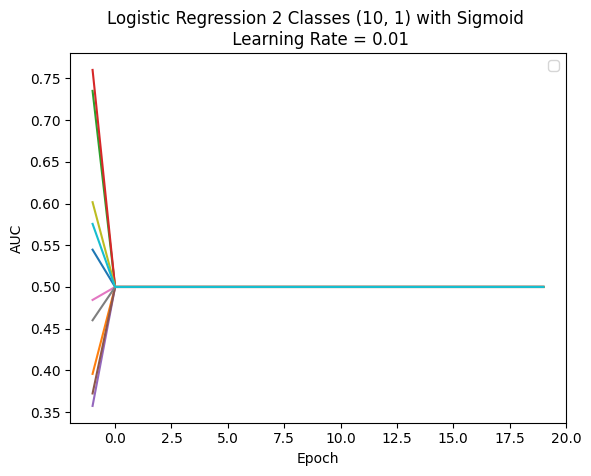

In [48]:
for i in range(10):
    plt.plot(np.arange(-1, n_epochs), aucs[i])
plt.title("Logistic Regression 2 Classes " + str(ratio) + " with Sigmoid \n Learning Rate = " + str(learning_rate))
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()